In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')
df

OPC   RHA   GWP   CWP   Sand     CG   WC   Age  Compressive
0    100.0   0.0   0.0   0.0  100.0  100.0  0.5   7.0         17.2
1    100.0   0.0   0.0   0.0  100.0  100.0  0.5   7.0         18.1
2    100.0   0.0   0.0   0.0  100.0  100.0  0.5   7.0         19.8
3     95.0   5.0   0.0   0.0  100.0  100.0  0.6   7.0         13.2
4     90.0  10.0   0.0   0.0  100.0  100.0  0.6   7.0         12.6
..     ...   ...   ...   ...    ...    ...  ...   ...          ...
493   70.0  10.0   5.0  15.0  100.0  100.0  0.7  90.0         11.8
494   70.0  10.0   5.0  15.0  100.0  100.0  0.7  90.0         11.6
495   70.0  15.0  10.0   5.0  100.0  100.0  0.7  90.0         13.8
496   70.0  15.0  10.0   5.0  100.0  100.0  0.7  90.0         13.6
497   70.0   5.0  20.0   5.0  100.0  100.0  0.7  90.0         10.1

[498 rows x 9 columns]

###### Normal Approach

In [3]:
df_opc_gwp_cwp = df.drop('RHA', axis=1)
df_opc_gwp_cwp

OPC   GWP   CWP   Sand     CG   WC   Age  Compressive
0    100.0   0.0   0.0  100.0  100.0  0.5   7.0         17.2
1    100.0   0.0   0.0  100.0  100.0  0.5   7.0         18.1
2    100.0   0.0   0.0  100.0  100.0  0.5   7.0         19.8
3     95.0   0.0   0.0  100.0  100.0  0.6   7.0         13.2
4     90.0   0.0   0.0  100.0  100.0  0.6   7.0         12.6
..     ...   ...   ...    ...    ...  ...   ...          ...
493   70.0   5.0  15.0  100.0  100.0  0.7  90.0         11.8
494   70.0   5.0  15.0  100.0  100.0  0.7  90.0         11.6
495   70.0  10.0   5.0  100.0  100.0  0.7  90.0         13.8
496   70.0  10.0   5.0  100.0  100.0  0.7  90.0         13.6
497   70.0  20.0   5.0  100.0  100.0  0.7  90.0         10.1

[498 rows x 8 columns]

In [5]:
df_opc_gwp_cwp.to_excel('opc-gwp-cwp.xlsx', index=False)

<ipython-input-5-09a2514e683e>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.2.9' currently installed).
  df_opc_gwp_cwp.to_excel('opc-gwp-cwp.xlsx', index=False)


In [9]:
df_opc_gwp_cwp['OPC'].value_counts()

70.0     200
80.0     101
100.0     84
90.0      47
75.0      24
95.0      22
85.0      20
Name: OPC, dtype: int64

In [10]:
df_opc_gwp_cwp['Compressive'].value_counts()

11.60    9
18.00    8
19.80    8
12.00    7
18.80    7
        ..
18.50    1
13.05    1
11.75    1
20.70    1
6.00     1
Name: Compressive, Length: 169, dtype: int64

In [5]:
df_opc_gwp_cwp.describe()

OPC         GWP         CWP   Sand     CG          WC  \
count  498.000000  498.000000  498.000000  498.0  498.0  498.000000   
mean    80.923695    5.893574    6.495984  100.0  100.0    0.628112   
std     11.341161    7.856530    8.081637    0.0    0.0    0.073521   
min     70.000000    0.000000    0.000000  100.0  100.0    0.500000   
25%     70.000000    0.000000    0.000000  100.0  100.0    0.600000   
50%     80.000000    0.000000    5.000000  100.0  100.0    0.600000   
75%     90.000000   10.000000   10.000000  100.0  100.0    0.700000   
max    100.000000   30.000000   30.000000  100.0  100.0    0.700000   

              Age  Compressive  
count  498.000000   498.000000  
mean    46.110442    13.953153  
std     31.326891     4.138713  
min      7.000000     4.000000  
25%     28.000000    10.700000  
50%     56.000000    13.675000  
75%     90.000000    17.500000  
max     90.000000    24.000000

In [6]:
df_opc_gwp_cwp.corr()

OPC       GWP       CWP  Sand  CG        WC       Age  \
OPC          1.000000 -0.450188 -0.467880   NaN NaN -0.948187 -0.011218   
GWP         -0.450188  1.000000 -0.155776   NaN NaN  0.431907  0.031563   
CWP         -0.467880 -0.155776  1.000000   NaN NaN  0.437033 -0.044961   
Sand              NaN       NaN       NaN   NaN NaN       NaN       NaN   
CG                NaN       NaN       NaN   NaN NaN       NaN       NaN   
WC          -0.948187  0.431907  0.437033   NaN NaN  1.000000  0.011142   
Age         -0.011218  0.031563 -0.044961   NaN NaN  0.011142  1.000000   
Compressive  0.740693 -0.262131 -0.284989   NaN NaN -0.724089  0.446843   

             Compressive  
OPC             0.740693  
GWP            -0.262131  
CWP            -0.284989  
Sand                 NaN  
CG                   NaN  
WC             -0.724089  
Age             0.446843  
Compressive     1.000000

###### Visualization

In [4]:
plt.style.use('fivethirtyeight')

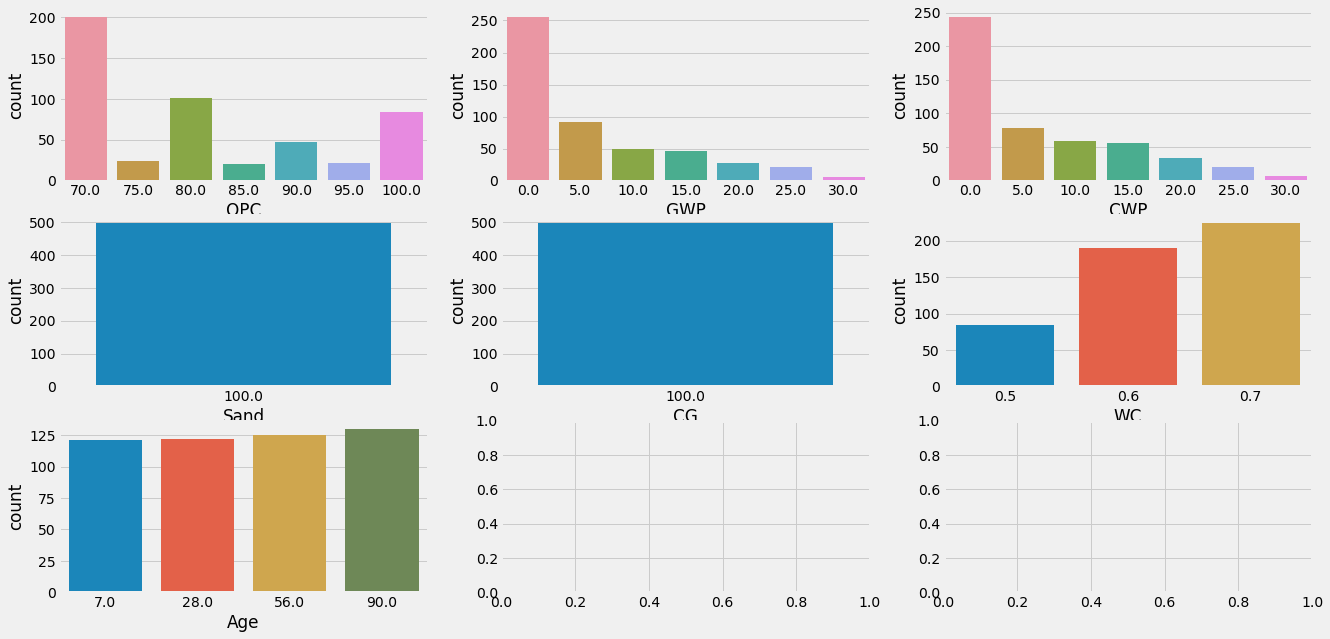

<Figure size 432x288 with 0 Axes>

In [5]:
# plot for categorical features
cat_columns = df_opc_gwp_cwp.columns[:-1]
nCols=3   # The number of columns that you want
nRows=int(np.ceil(len(cat_columns)/nCols))   # The number of corresponding rows 

fig,axes = plt.subplots(nRows, nCols, figsize=(20,10))
for ind,col in enumerate(cat_columns):
    sns.countplot(x=col,data=df_opc_gwp_cwp,ax=axes.flatten()[ind])
plt.show()
plt.savefig('categorical_plot_opc_gwp_cwp.jpg');

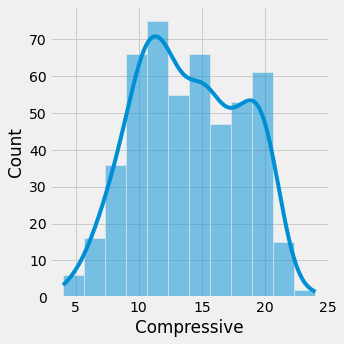

In [6]:
# continuous plot
sns.displot(df_opc_gwp_cwp, x='Compressive', kde=True)
plt.savefig('continuous_opc_gwp_cwp.jpg');

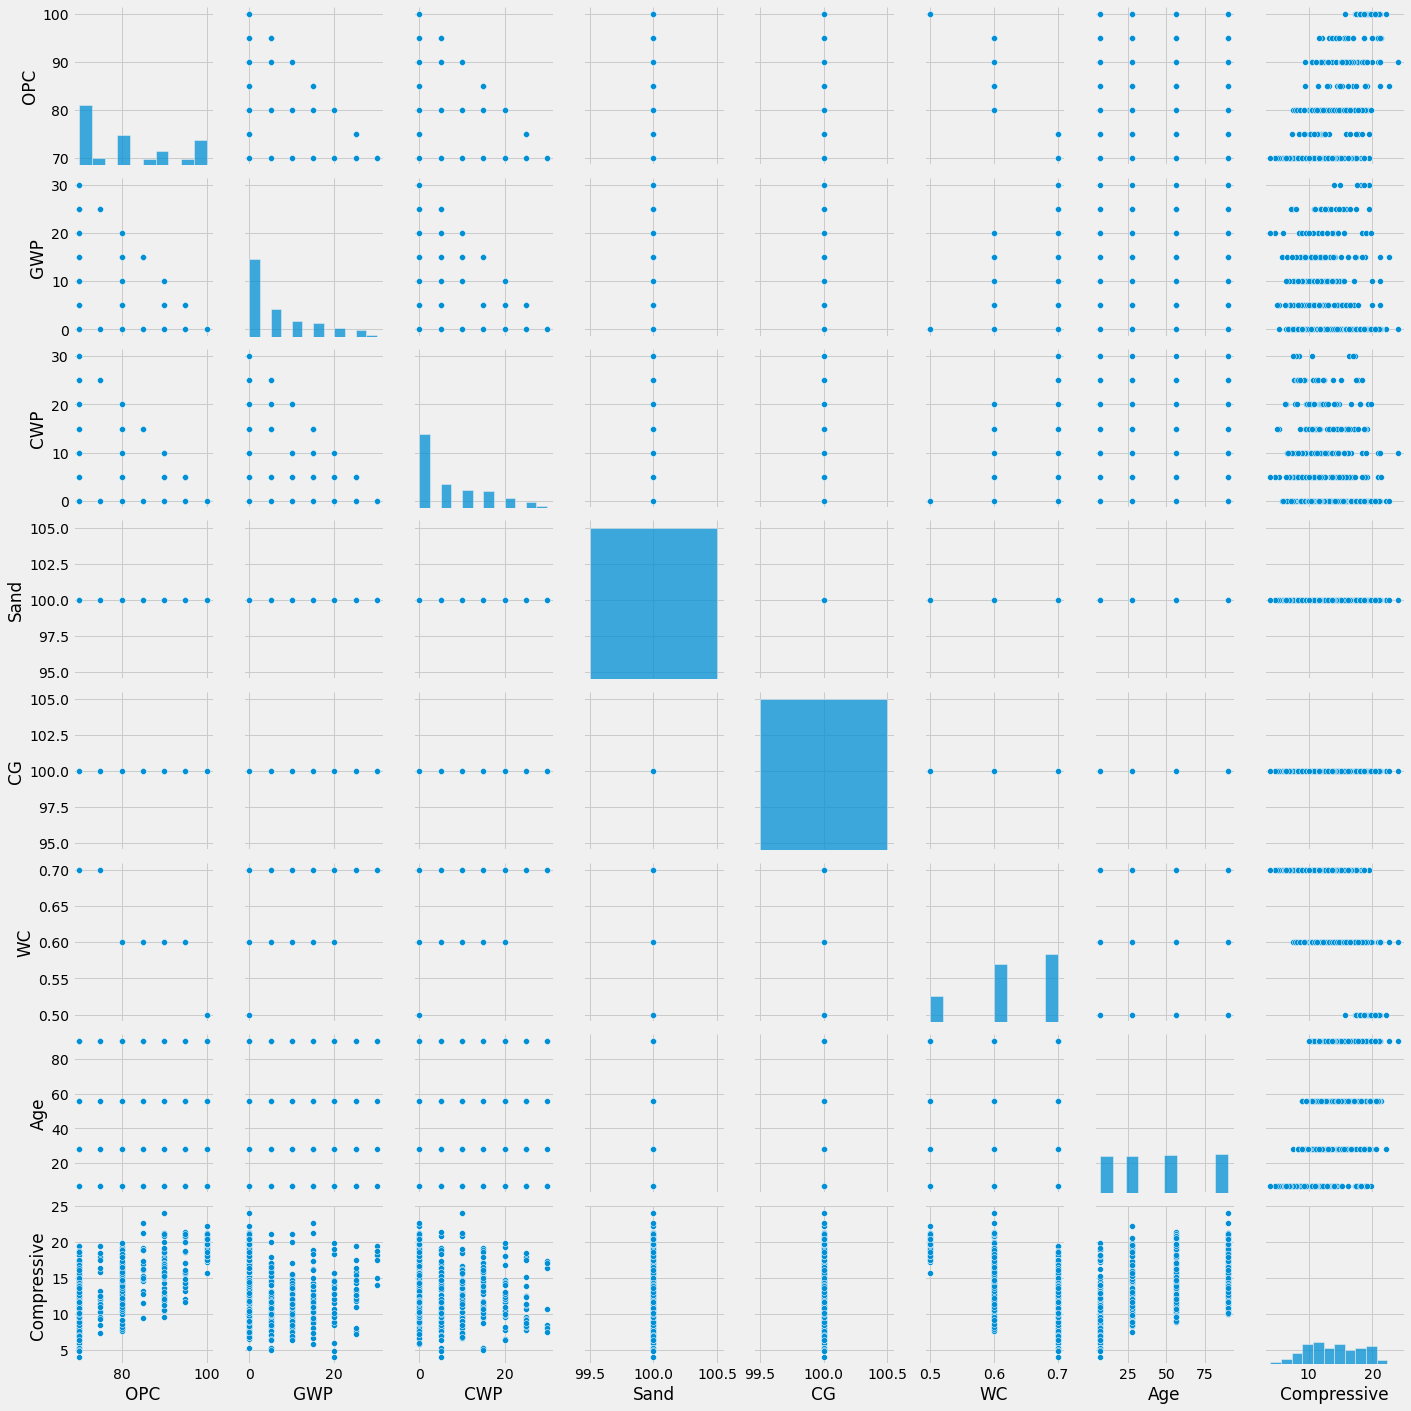

In [11]:
# pair plot of all the features
sns.pairplot(df_opc_gwp_cwp)
plt.savefig('pairplot_opc_gwp_cwp.jpg')

###### Feature Selection

In [7]:
from sklearn.model_selection import train_test_split
X_opc_gwp_cwp = df_opc_gwp_cwp.drop('Compressive', axis=1)
y_opc_gwp_cwp = df_opc_gwp_cwp['Compressive']
X_train, X_test, y_train, y_test = train_test_split(X_opc_gwp_cwp, y_opc_gwp_cwp, test_size=0.3, random_state=42)

In [8]:
constant_columns=['Sand', 'CG']
X_train.drop(constant_columns, axis=1, inplace=True)
X_test.drop(constant_columns, axis=1, inplace=True) 

In [14]:
from sklearn.feature_selection import mutual_info_regression
MI_reg_clf = mutual_info_regression(X_train, y_train)
MI_reg_clf_series = pd.Series(MI_reg_clf, index=X_train.columns)
MI_reg_clf_series.sort_values(ascending=False, inplace=True)

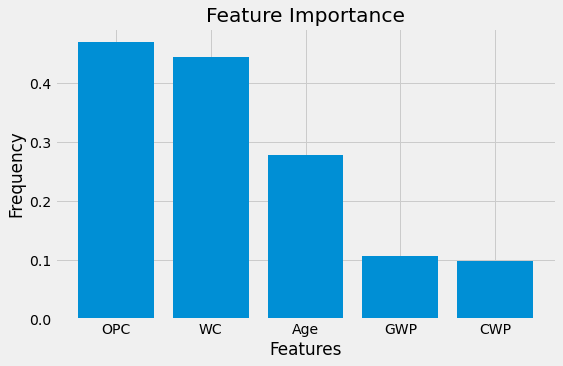

In [15]:
# The order in which the features are relevant for the prediction of the compressive strength
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 5))
plt.bar(x=MI_reg_clf_series.index, height = MI_reg_clf_series.values)
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.title('Feature Importance')
plt.savefig('featureimportance_opc_gwp_cwp.jpg');

###### Decision Tree 

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

###### Parameter Optimization

In [18]:
import optuna
def objective(trial):
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10, step=1)
    max_depth = trial.suggest_int('max_depth',3, 10, step=1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10, step=1)
    #max_leaf_nodes = trial.suggest_int('max_leaf_nodes', )
    max_features = trial.suggest_categorical('max_features', ["auto", "sqrt", "log2"])
    model = DecisionTreeRegressor(random_state=42, min_samples_split=min_samples_split, max_depth=max_depth, min_samples_leaf=
                                 min_samples_leaf, max_features=max_features)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error = mean_squared_error(y_test, pred)
    return error
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5000)

[I 2023-01-10 20:46:52,560] A new study created in memory with name: no-name-16b23eac-02a8-401b-8791-d92892594bed
[I 2023-01-10 20:46:52,577] Trial 0 finished with value: 3.010779597396698 and parameters: {'min_samples_split': 10, 'max_depth': 6, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 0 with value: 3.010779597396698.
[I 2023-01-10 20:46:52,587] Trial 1 finished with value: 3.8721583955590724 and parameters: {'min_samples_split': 5, 'max_depth': 3, 'min_samples_leaf': 7, 'max_features': 'auto'}. Best is trial 0 with value: 3.010779597396698.
[I 2023-01-10 20:46:52,600] Trial 2 finished with value: 3.720277432671525 and parameters: {'min_samples_split': 4, 'max_depth': 5, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 3.010779597396698.
[I 2023-01-10 20:46:52,612] Trial 3 finished with value: 3.551705837914394 and parameters: {'min_samples_split': 3, 'max_depth': 5, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 0 with v

[I 2023-01-10 20:46:53,689] Trial 34 finished with value: 1.6944765907923374 and parameters: {'min_samples_split': 7, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 15 with value: 1.6160993083849295.
[I 2023-01-10 20:46:53,722] Trial 35 finished with value: 1.9342267571140384 and parameters: {'min_samples_split': 4, 'max_depth': 9, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 15 with value: 1.6160993083849295.
[I 2023-01-10 20:46:53,760] Trial 36 finished with value: 2.0792523374079375 and parameters: {'min_samples_split': 3, 'max_depth': 10, 'min_samples_leaf': 7, 'max_features': 'auto'}. Best is trial 15 with value: 1.6160993083849295.
[I 2023-01-10 20:46:53,808] Trial 37 finished with value: 3.551705837914394 and parameters: {'min_samples_split': 6, 'max_depth': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 15 with value: 1.6160993083849295.
[I 2023-01-10 20:46:53,869] Trial 38 finished with value: 3.0509274880116184

[I 2023-01-10 20:46:55,473] Trial 68 finished with value: 1.7193274776764054 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:46:55,541] Trial 69 finished with value: 1.8835889042584797 and parameters: {'min_samples_split': 4, 'max_depth': 6, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:46:55,601] Trial 70 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:46:55,651] Trial 71 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:46:55,702] Trial 72 finished with value: 1.6035610035701147

[I 2023-01-10 20:46:57,093] Trial 102 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:46:57,139] Trial 103 finished with value: 1.6881443693108553 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:46:57,186] Trial 104 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:46:57,233] Trial 105 finished with value: 1.7898707906071516 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:46:57,307] Trial 106 finished with value: 1.71932747767

[I 2023-01-10 20:46:58,659] Trial 136 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:46:58,700] Trial 137 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:46:58,738] Trial 138 finished with value: 1.8459728217723277 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:46:58,773] Trial 139 finished with value: 1.7491130946839557 and parameters: {'min_samples_split': 4, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:46:58,809] Trial 140 finished with value: 4.37151898175

[I 2023-01-10 20:47:00,114] Trial 170 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:00,162] Trial 171 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:00,208] Trial 172 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:00,253] Trial 173 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:00,296] Trial 174 finished with value: 2.65804031634

[I 2023-01-10 20:47:01,829] Trial 204 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:01,882] Trial 205 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:01,934] Trial 206 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:01,979] Trial 207 finished with value: 4.371518981750876 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:02,027] Trial 208 finished with value: 1.603561003570

[I 2023-01-10 20:47:03,675] Trial 238 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:03,742] Trial 239 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:03,786] Trial 240 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:03,827] Trial 241 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:03,870] Trial 242 finished with value: 1.60356100357

[I 2023-01-10 20:47:05,602] Trial 272 finished with value: 2.696445990607682 and parameters: {'min_samples_split': 5, 'max_depth': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:05,668] Trial 273 finished with value: 1.6881443693108553 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:05,724] Trial 274 finished with value: 4.371518981750876 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:05,790] Trial 275 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:05,847] Trial 276 finished with value: 1.6035610035701

[I 2023-01-10 20:47:07,596] Trial 306 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:07,641] Trial 307 finished with value: 1.6223097891284 and parameters: {'min_samples_split': 5, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:07,688] Trial 308 finished with value: 1.8168180062167725 and parameters: {'min_samples_split': 6, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:07,733] Trial 309 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:07,781] Trial 310 finished with value: 1.60356100357011

[I 2023-01-10 20:47:09,550] Trial 340 finished with value: 1.7193274776764054 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:09,602] Trial 341 finished with value: 4.371518981750876 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:09,648] Trial 342 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:09,705] Trial 343 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:09,760] Trial 344 finished with value: 4.371518981750

[I 2023-01-10 20:47:11,410] Trial 374 finished with value: 1.6223097891284 and parameters: {'min_samples_split': 5, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:11,458] Trial 375 finished with value: 1.7349462276764052 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:11,507] Trial 376 finished with value: 1.6881443693108553 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:11,552] Trial 377 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:11,599] Trial 378 finished with value: 1.60356100357011

[I 2023-01-10 20:47:13,243] Trial 408 finished with value: 1.6824696787553 and parameters: {'min_samples_split': 7, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:13,294] Trial 409 finished with value: 3.022734958679312 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:13,355] Trial 410 finished with value: 1.7349462276764052 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:13,412] Trial 411 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:13,498] Trial 412 finished with value: 4.371518981750876

[I 2023-01-10 20:47:15,626] Trial 442 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:15,703] Trial 443 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:15,780] Trial 444 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:15,843] Trial 445 finished with value: 1.6160993083849295 and parameters: {'min_samples_split': 6, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:15,902] Trial 446 finished with value: 1.84597282177

[I 2023-01-10 20:47:18,052] Trial 476 finished with value: 4.371518981750876 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:18,103] Trial 477 finished with value: 2.019876864510931 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 4, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:18,162] Trial 478 finished with value: 1.6881443693108553 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:18,219] Trial 479 finished with value: 2.87508171550529 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:18,276] Trial 480 finished with value: 1.603561003570114

[I 2023-01-10 20:47:20,757] Trial 510 finished with value: 1.6160993083849295 and parameters: {'min_samples_split': 6, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:20,861] Trial 511 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:20,965] Trial 512 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:21,099] Trial 513 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 58 with value: 1.6035610035701147.
[I 2023-01-10 20:47:21,195] Trial 514 finished with value: 1.60356100357

[I 2023-01-10 20:47:24,168] Trial 544 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:24,247] Trial 545 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:24,332] Trial 546 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:24,420] Trial 547 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:24,480] Trial 548 finished with value: 1.5956321

[I 2023-01-10 20:47:27,147] Trial 578 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:27,265] Trial 579 finished with value: 2.538559804184652 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:27,382] Trial 580 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:27,503] Trial 581 finished with value: 2.614267015875538 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:27,656] Trial 582 finished with value: 1.696707206

[I 2023-01-10 20:47:31,317] Trial 612 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:31,436] Trial 613 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:31,563] Trial 614 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:31,705] Trial 615 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:31,937] Trial 616 finished with value: 1.7054071

[I 2023-01-10 20:47:36,206] Trial 646 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:36,351] Trial 647 finished with value: 2.7287165933526154 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:36,462] Trial 648 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:36,589] Trial 649 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:36,756] Trial 650 finished with value: 1.5956321

[I 2023-01-10 20:47:40,270] Trial 680 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:40,339] Trial 681 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:40,402] Trial 682 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:40,506] Trial 683 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:40,613] Trial 684 finished with value: 1.5956321

[I 2023-01-10 20:47:42,724] Trial 714 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:42,787] Trial 715 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:42,864] Trial 716 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:42,949] Trial 717 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:43,034] Trial 718 finished with value: 2.5385598

[I 2023-01-10 20:47:45,070] Trial 748 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:45,133] Trial 749 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:45,224] Trial 750 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:45,367] Trial 751 finished with value: 1.6980821752688016 and parameters: {'min_samples_split': 9, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:45,448] Trial 752 finished with value: 1.5956321

[I 2023-01-10 20:47:48,494] Trial 782 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:48,640] Trial 783 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:48,742] Trial 784 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:48,835] Trial 785 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:48,932] Trial 786 finished with value: 1.5956321

[I 2023-01-10 20:47:51,552] Trial 816 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:51,620] Trial 817 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:51,689] Trial 818 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:51,758] Trial 819 finished with value: 1.7054071317209927 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:51,825] Trial 820 finished with value: 1.5956321

[I 2023-01-10 20:47:54,097] Trial 850 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:54,179] Trial 851 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:54,256] Trial 852 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:54,329] Trial 853 finished with value: 1.9342267571140384 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:54,409] Trial 854 finished with value: 1.5956321

[I 2023-01-10 20:47:57,290] Trial 884 finished with value: 1.7491130946839557 and parameters: {'min_samples_split': 4, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:57,368] Trial 885 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:57,455] Trial 886 finished with value: 1.7054071317209927 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:57,542] Trial 887 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:47:57,734] Trial 888 finished with value: 2.5385598

[I 2023-01-10 20:48:01,815] Trial 918 finished with value: 2.9928308000675514 and parameters: {'min_samples_split': 3, 'max_depth': 4, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:01,948] Trial 919 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:02,063] Trial 920 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:02,203] Trial 921 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:02,314] Trial 922 finished with value: 1.6967072

[I 2023-01-10 20:48:05,532] Trial 952 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:05,606] Trial 953 finished with value: 2.538559804184652 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:05,681] Trial 954 finished with value: 1.7054071317209927 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:05,757] Trial 955 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:05,834] Trial 956 finished with value: 1.59563213

[I 2023-01-10 20:48:08,184] Trial 986 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:08,283] Trial 987 finished with value: 2.000511946815458 and parameters: {'min_samples_split': 4, 'max_depth': 9, 'min_samples_leaf': 4, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:08,359] Trial 988 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:08,434] Trial 989 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:08,508] Trial 990 finished with value: 1.69670720

[I 2023-01-10 20:48:10,942] Trial 1020 finished with value: 2.3936444235938232 and parameters: {'min_samples_split': 8, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:11,021] Trial 1021 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:11,100] Trial 1022 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:11,194] Trial 1023 finished with value: 1.7054071317209927 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:11,310] Trial 1024 finished with value: 1.59

[I 2023-01-10 20:48:14,591] Trial 1054 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 4, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:14,715] Trial 1055 finished with value: 2.185781254815955 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 6, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:14,803] Trial 1056 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:14,903] Trial 1057 finished with value: 1.6980821752688016 and parameters: {'min_samples_split': 9, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:15,012] Trial 1058 finished with value: 1.595

[I 2023-01-10 20:48:18,331] Trial 1088 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:18,435] Trial 1089 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:18,529] Trial 1090 finished with value: 2.538559804184652 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:18,617] Trial 1091 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:18,720] Trial 1092 finished with value: 1.705

[I 2023-01-10 20:48:21,883] Trial 1122 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:21,975] Trial 1123 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:22,073] Trial 1124 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:22,168] Trial 1125 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:22,270] Trial 1126 finished with value: 1.69

[I 2023-01-10 20:48:25,059] Trial 1156 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:25,160] Trial 1157 finished with value: 2.538559804184652 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:25,254] Trial 1158 finished with value: 1.7054071317209927 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:25,351] Trial 1159 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:25,471] Trial 1160 finished with value: 1.749

[I 2023-01-10 20:48:29,188] Trial 1190 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:29,390] Trial 1191 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:29,566] Trial 1192 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:29,742] Trial 1193 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:30,024] Trial 1194 finished with value: 1.69

[I 2023-01-10 20:48:34,867] Trial 1224 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:34,975] Trial 1225 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:35,076] Trial 1226 finished with value: 1.7054071317209927 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:35,179] Trial 1227 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:35,307] Trial 1228 finished with value: 1.69

[I 2023-01-10 20:48:40,460] Trial 1258 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:40,555] Trial 1259 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:40,645] Trial 1260 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:40,749] Trial 1261 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:40,889] Trial 1262 finished with value: 2.10

[I 2023-01-10 20:48:43,883] Trial 1292 finished with value: 1.7491130946839557 and parameters: {'min_samples_split': 4, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:43,979] Trial 1293 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:44,093] Trial 1294 finished with value: 2.000511946815458 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 4, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:44,186] Trial 1295 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:44,274] Trial 1296 finished with value: 1.696

[I 2023-01-10 20:48:47,941] Trial 1326 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:48,049] Trial 1327 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:48,169] Trial 1328 finished with value: 2.9472919133352566 and parameters: {'min_samples_split': 9, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:48,287] Trial 1329 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:48,407] Trial 1330 finished with value: 1.59

[I 2023-01-10 20:48:51,789] Trial 1360 finished with value: 1.7240685939432152 and parameters: {'min_samples_split': 7, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:51,914] Trial 1361 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:52,058] Trial 1362 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:52,188] Trial 1363 finished with value: 2.0100191590599352 and parameters: {'min_samples_split': 4, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:52,282] Trial 1364 finished with value: 1.6

[I 2023-01-10 20:48:56,199] Trial 1394 finished with value: 2.465239177578454 and parameters: {'min_samples_split': 3, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:56,297] Trial 1395 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:56,397] Trial 1396 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:56,513] Trial 1397 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:48:56,637] Trial 1398 finished with value: 1.59

[I 2023-01-10 20:49:00,260] Trial 1428 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:00,359] Trial 1429 finished with value: 1.7054071317209927 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:00,466] Trial 1430 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:00,566] Trial 1431 finished with value: 1.7491130946839557 and parameters: {'min_samples_split': 4, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:00,688] Trial 1432 finished with value: 1.59

[I 2023-01-10 20:49:04,171] Trial 1462 finished with value: 2.000511946815458 and parameters: {'min_samples_split': 3, 'max_depth': 10, 'min_samples_leaf': 4, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:04,272] Trial 1463 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:04,384] Trial 1464 finished with value: 3.8721583955590724 and parameters: {'min_samples_split': 3, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:04,491] Trial 1465 finished with value: 2.1959289139021507 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 5, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:04,586] Trial 1466 finished with value: 1.59

[I 2023-01-10 20:49:08,790] Trial 1496 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:08,988] Trial 1497 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:09,187] Trial 1498 finished with value: 1.669097970851319 and parameters: {'min_samples_split': 4, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:09,399] Trial 1499 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:09,612] Trial 1500 finished with value: 1.59

[I 2023-01-10 20:49:14,539] Trial 1530 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:14,654] Trial 1531 finished with value: 2.57457204731107 and parameters: {'min_samples_split': 9, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:14,771] Trial 1532 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:14,877] Trial 1533 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:14,982] Trial 1534 finished with value: 1.705

[I 2023-01-10 20:49:18,780] Trial 1564 finished with value: 1.7491130946839557 and parameters: {'min_samples_split': 4, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:19,099] Trial 1565 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:19,209] Trial 1566 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:19,317] Trial 1567 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:19,421] Trial 1568 finished with value: 1.69

[I 2023-01-10 20:49:22,925] Trial 1598 finished with value: 2.6580403163496777 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:23,030] Trial 1599 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:23,139] Trial 1600 finished with value: 1.6144912791283998 and parameters: {'min_samples_split': 6, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:23,246] Trial 1601 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:23,348] Trial 1602 finished with value: 1.6

[I 2023-01-10 20:49:27,592] Trial 1632 finished with value: 1.7491130946839557 and parameters: {'min_samples_split': 4, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:27,732] Trial 1633 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:27,869] Trial 1634 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:27,990] Trial 1635 finished with value: 1.6324678643698372 and parameters: {'min_samples_split': 3, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:28,139] Trial 1636 finished with value: 2.5

[I 2023-01-10 20:49:31,993] Trial 1666 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:32,105] Trial 1667 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:32,456] Trial 1668 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:32,570] Trial 1669 finished with value: 1.6324678643698372 and parameters: {'min_samples_split': 3, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:32,678] Trial 1670 finished with value: 2.1

[I 2023-01-10 20:49:36,694] Trial 1700 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:36,809] Trial 1701 finished with value: 1.7491130946839557 and parameters: {'min_samples_split': 4, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:36,956] Trial 1702 finished with value: 2.10129053509924 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:37,086] Trial 1703 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:37,224] Trial 1704 finished with value: 1.5956

[I 2023-01-10 20:49:41,442] Trial 1734 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:41,558] Trial 1735 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:41,672] Trial 1736 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:41,787] Trial 1737 finished with value: 1.7240685939432152 and parameters: {'min_samples_split': 7, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:41,933] Trial 1738 finished with value: 1.74

[I 2023-01-10 20:49:45,836] Trial 1768 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:45,953] Trial 1769 finished with value: 2.538559804184652 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:46,299] Trial 1770 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:46,416] Trial 1771 finished with value: 2.0792523374079375 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 7, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:46,528] Trial 1772 finished with value: 1.705

[I 2023-01-10 20:49:50,348] Trial 1802 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:50,464] Trial 1803 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:50,607] Trial 1804 finished with value: 2.6580403163496777 and parameters: {'min_samples_split': 7, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:50,736] Trial 1805 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:50,865] Trial 1806 finished with value: 1.5

[I 2023-01-10 20:49:54,947] Trial 1836 finished with value: 2.2197267449442895 and parameters: {'min_samples_split': 4, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:55,065] Trial 1837 finished with value: 2.9928308000675514 and parameters: {'min_samples_split': 2, 'max_depth': 4, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:55,189] Trial 1838 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:55,304] Trial 1839 finished with value: 1.8530138076967846 and parameters: {'min_samples_split': 10, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:55,432] Trial 1840 finished with value: 2.5

[I 2023-01-10 20:49:59,767] Trial 1870 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:49:59,895] Trial 1871 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:00,041] Trial 1872 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:00,208] Trial 1873 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:00,332] Trial 1874 finished with value: 1.74

[I 2023-01-10 20:50:05,660] Trial 1904 finished with value: 2.2197267449442895 and parameters: {'min_samples_split': 4, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:05,977] Trial 1905 finished with value: 1.6144912791283998 and parameters: {'min_samples_split': 6, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:06,220] Trial 1906 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:06,418] Trial 1907 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:06,705] Trial 1908 finished with value: 1.70

[I 2023-01-10 20:50:14,093] Trial 1938 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:14,458] Trial 1939 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:14,579] Trial 1940 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:14,717] Trial 1941 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:14,846] Trial 1942 finished with value: 1.74

[I 2023-01-10 20:50:19,467] Trial 1972 finished with value: 2.538559804184652 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:19,592] Trial 1973 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:19,998] Trial 1974 finished with value: 1.7491130946839557 and parameters: {'min_samples_split': 4, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:20,163] Trial 1975 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:20,399] Trial 1976 finished with value: 1.595

[I 2023-01-10 20:50:28,416] Trial 2006 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:28,580] Trial 2007 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:28,811] Trial 2008 finished with value: 2.6580403163496777 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:29,280] Trial 2009 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:29,444] Trial 2010 finished with value: 1.6

[I 2023-01-10 20:50:35,931] Trial 2040 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:36,146] Trial 2041 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:36,383] Trial 2042 finished with value: 1.7054071317209927 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:36,821] Trial 2043 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:37,011] Trial 2044 finished with value: 1.59

[I 2023-01-10 20:50:44,394] Trial 2074 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:44,625] Trial 2075 finished with value: 1.6144912791283998 and parameters: {'min_samples_split': 6, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:44,838] Trial 2076 finished with value: 2.538559804184652 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:45,351] Trial 2077 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:45,579] Trial 2078 finished with value: 2.797

[I 2023-01-10 20:50:53,624] Trial 2108 finished with value: 1.6298522720886326 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:53,847] Trial 2109 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:54,055] Trial 2110 finished with value: 1.6324678643698372 and parameters: {'min_samples_split': 3, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:54,265] Trial 2111 finished with value: 1.7054071317209927 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:50:54,468] Trial 2112 finished with value: 1.5

[I 2023-01-10 20:51:00,798] Trial 2142 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:00,939] Trial 2143 finished with value: 2.538559804184652 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:01,088] Trial 2144 finished with value: 1.6298522720886326 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:01,265] Trial 2145 finished with value: 1.6324678643698372 and parameters: {'min_samples_split': 3, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:01,433] Trial 2146 finished with value: 1.74

[I 2023-01-10 20:51:07,308] Trial 2176 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:07,465] Trial 2177 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 4, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:07,679] Trial 2178 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:07,856] Trial 2179 finished with value: 1.7818880047134429 and parameters: {'min_samples_split': 7, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:08,024] Trial 2180 finished with value: 1.59

[I 2023-01-10 20:51:14,101] Trial 2210 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:14,408] Trial 2211 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:14,827] Trial 2212 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:15,624] Trial 2213 finished with value: 2.538559804184652 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:15,898] Trial 2214 finished with value: 2.185

[I 2023-01-10 20:51:25,990] Trial 2244 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:26,229] Trial 2245 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:26,916] Trial 2246 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:27,252] Trial 2247 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:27,494] Trial 2248 finished with value: 1.59

[I 2023-01-10 20:51:36,869] Trial 2278 finished with value: 2.9472919133352566 and parameters: {'min_samples_split': 9, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:37,019] Trial 2279 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:37,169] Trial 2280 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:37,328] Trial 2281 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:37,499] Trial 2282 finished with value: 1.59

[I 2023-01-10 20:51:43,251] Trial 2312 finished with value: 1.6324678643698372 and parameters: {'min_samples_split': 3, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:43,404] Trial 2313 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:43,601] Trial 2314 finished with value: 1.7022771182251502 and parameters: {'min_samples_split': 7, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:43,847] Trial 2315 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:44,065] Trial 2316 finished with value: 1.5

[I 2023-01-10 20:51:49,340] Trial 2346 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:49,489] Trial 2347 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:49,640] Trial 2348 finished with value: 1.6324678643698372 and parameters: {'min_samples_split': 3, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:49,784] Trial 2349 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:49,927] Trial 2350 finished with value: 1.5

[I 2023-01-10 20:51:55,144] Trial 2380 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:55,296] Trial 2381 finished with value: 1.6298522720886326 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:55,436] Trial 2382 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:55,593] Trial 2383 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:51:55,967] Trial 2384 finished with value: 2.95

[I 2023-01-10 20:52:01,036] Trial 2414 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:01,186] Trial 2415 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:01,541] Trial 2416 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:01,687] Trial 2417 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:01,831] Trial 2418 finished with value: 1.59

[I 2023-01-10 20:52:07,158] Trial 2448 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 4, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:07,329] Trial 2449 finished with value: 2.000511946815458 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 4, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:07,481] Trial 2450 finished with value: 3.8721583955590724 and parameters: {'min_samples_split': 3, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:07,626] Trial 2451 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:07,776] Trial 2452 finished with value: 2.538

[I 2023-01-10 20:52:13,374] Trial 2482 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:13,527] Trial 2483 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:13,740] Trial 2484 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:13,921] Trial 2485 finished with value: 2.187202473707097 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 8, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:14,341] Trial 2486 finished with value: 1.595

[I 2023-01-10 20:52:19,886] Trial 2516 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:20,292] Trial 2517 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:20,454] Trial 2518 finished with value: 1.8530138076967846 and parameters: {'min_samples_split': 10, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:20,659] Trial 2519 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:20,826] Trial 2520 finished with value: 2.5

[I 2023-01-10 20:52:26,455] Trial 2550 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:26,618] Trial 2551 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:26,780] Trial 2552 finished with value: 1.7332595310365035 and parameters: {'min_samples_split': 2, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:26,990] Trial 2553 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:27,159] Trial 2554 finished with value: 1.5

[I 2023-01-10 20:52:33,951] Trial 2584 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:34,136] Trial 2585 finished with value: 1.6324678643698372 and parameters: {'min_samples_split': 3, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:34,310] Trial 2586 finished with value: 2.538559804184652 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:34,479] Trial 2587 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:34,637] Trial 2588 finished with value: 1.69

[I 2023-01-10 20:52:41,037] Trial 2618 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:41,261] Trial 2619 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:41,489] Trial 2620 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:41,708] Trial 2621 finished with value: 1.7054071317209927 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:41,901] Trial 2622 finished with value: 1.59

[I 2023-01-10 20:52:48,057] Trial 2652 finished with value: 2.475975350683883 and parameters: {'min_samples_split': 3, 'max_depth': 5, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:48,227] Trial 2653 finished with value: 1.7491130946839557 and parameters: {'min_samples_split': 4, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:48,385] Trial 2654 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:48,762] Trial 2655 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:48,918] Trial 2656 finished with value: 1.595

[I 2023-01-10 20:52:54,831] Trial 2686 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:54,996] Trial 2687 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:55,157] Trial 2688 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:55,556] Trial 2689 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:52:55,714] Trial 2690 finished with value: 2.53

[I 2023-01-10 20:53:01,565] Trial 2720 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:53:01,733] Trial 2721 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:53:01,927] Trial 2722 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:53:02,316] Trial 2723 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:53:02,481] Trial 2724 finished with value: 2.07

[I 2023-01-10 20:53:10,345] Trial 2754 finished with value: 1.6324678643698372 and parameters: {'min_samples_split': 3, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:53:10,661] Trial 2755 finished with value: 2.538559804184652 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:53:10,977] Trial 2756 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:53:11,654] Trial 2757 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:53:11,929] Trial 2758 finished with value: 1.65

[I 2023-01-10 20:53:19,265] Trial 2788 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:53:19,455] Trial 2789 finished with value: 1.6324678643698372 and parameters: {'min_samples_split': 3, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:53:19,628] Trial 2790 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:53:19,820] Trial 2791 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:53:20,022] Trial 2792 finished with value: 1.5

[I 2023-01-10 20:53:26,807] Trial 2822 finished with value: 2.538559804184652 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:53:26,979] Trial 2823 finished with value: 1.6504481054219662 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:53:27,161] Trial 2824 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:53:27,351] Trial 2825 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:53:27,517] Trial 2826 finished with value: 1.595

[I 2023-01-10 20:53:35,421] Trial 2856 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:53:35,784] Trial 2857 finished with value: 1.6298522720886326 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:53:36,121] Trial 2858 finished with value: 2.1959289139021507 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 5, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:53:36,479] Trial 2859 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:53:36,698] Trial 2860 finished with value: 1.69

[I 2023-01-10 20:53:45,359] Trial 2890 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:53:45,855] Trial 2891 finished with value: 2.7287165933526154 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:53:46,125] Trial 2892 finished with value: 1.6298522720886326 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:53:46,365] Trial 2893 finished with value: 6.104467068021106 and parameters: {'min_samples_split': 3, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:53:46,577] Trial 2894 finished with value: 1.705

[I 2023-01-10 20:53:53,844] Trial 2924 finished with value: 2.6580403163496777 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:53:54,285] Trial 2925 finished with value: 1.7054071317209927 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:53:54,481] Trial 2926 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:53:54,685] Trial 2927 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:53:54,903] Trial 2928 finished with value: 1.5

[I 2023-01-10 20:54:02,572] Trial 2958 finished with value: 2.538559804184652 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:54:02,811] Trial 2959 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:54:03,023] Trial 2960 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:54:03,543] Trial 2961 finished with value: 1.7054071317209927 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:54:03,735] Trial 2962 finished with value: 2.000

[I 2023-01-10 20:54:10,832] Trial 2992 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:54:11,026] Trial 2993 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:54:11,211] Trial 2994 finished with value: 1.7841129006661338 and parameters: {'min_samples_split': 7, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:54:11,614] Trial 2995 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:54:11,798] Trial 2996 finished with value: 1.5

[I 2023-01-10 20:54:18,477] Trial 3026 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:54:18,657] Trial 3027 finished with value: 1.6324678643698372 and parameters: {'min_samples_split': 3, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:54:19,056] Trial 3028 finished with value: 2.475975350683883 and parameters: {'min_samples_split': 3, 'max_depth': 5, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:54:19,246] Trial 3029 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:54:19,452] Trial 3030 finished with value: 1.59

[I 2023-01-10 20:54:28,580] Trial 3060 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:54:28,855] Trial 3061 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:54:29,156] Trial 3062 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:54:29,713] Trial 3063 finished with value: 1.6298522720886326 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:54:30,011] Trial 3064 finished with value: 1.59

[I 2023-01-10 20:54:39,902] Trial 3094 finished with value: 1.7240685939432152 and parameters: {'min_samples_split': 7, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:54:40,104] Trial 3095 finished with value: 1.6144912791283998 and parameters: {'min_samples_split': 6, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:54:40,379] Trial 3096 finished with value: 1.7331462276764054 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:54:40,630] Trial 3097 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:54:40,830] Trial 3098 finished with value: 1.69

[I 2023-01-10 20:54:48,712] Trial 3128 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:54:49,415] Trial 3129 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:54:49,707] Trial 3130 finished with value: 1.7491130946839557 and parameters: {'min_samples_split': 4, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:54:49,934] Trial 3131 finished with value: 2.538559804184652 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:54:50,129] Trial 3132 finished with value: 1.629

[I 2023-01-10 20:54:57,429] Trial 3162 finished with value: 1.6298522720886326 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:54:57,622] Trial 3163 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:54:57,814] Trial 3164 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:54:58,239] Trial 3165 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:54:58,427] Trial 3166 finished with value: 1.74

[I 2023-01-10 20:55:06,388] Trial 3196 finished with value: 2.10129053509924 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:55:06,648] Trial 3197 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:55:06,860] Trial 3198 finished with value: 2.000511946815458 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 4, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:55:07,079] Trial 3199 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:55:07,300] Trial 3200 finished with value: 2.53855

[I 2023-01-10 20:55:16,479] Trial 3230 finished with value: 1.6324678643698372 and parameters: {'min_samples_split': 3, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:55:16,963] Trial 3231 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:55:17,185] Trial 3232 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:55:17,401] Trial 3233 finished with value: 2.185781254815955 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 6, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:55:17,628] Trial 3234 finished with value: 1.59

[I 2023-01-10 20:55:25,878] Trial 3264 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:55:26,079] Trial 3265 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:55:26,278] Trial 3266 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:55:26,509] Trial 3267 finished with value: 1.6324678643698372 and parameters: {'min_samples_split': 3, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:55:26,714] Trial 3268 finished with value: 2.5

[I 2023-01-10 20:55:34,781] Trial 3298 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:55:35,398] Trial 3299 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:55:35,760] Trial 3300 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:55:36,000] Trial 3301 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:55:36,210] Trial 3302 finished with value: 1.70

[I 2023-01-10 20:55:43,914] Trial 3332 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:55:44,214] Trial 3333 finished with value: 1.9342267571140384 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:55:44,430] Trial 3334 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 20:55:44,850] Trial 3335 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:39:22,688] Trial 3336 finished with value: 1.59

[I 2023-01-10 21:39:33,084] Trial 3366 finished with value: 1.6980821752688016 and parameters: {'min_samples_split': 9, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:39:33,318] Trial 3367 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:39:33,582] Trial 3368 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:39:33,902] Trial 3369 finished with value: 2.5120541440861976 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:39:34,457] Trial 3370 finished with value: 1.70

[I 2023-01-10 21:39:45,828] Trial 3400 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:39:46,041] Trial 3401 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:39:46,275] Trial 3402 finished with value: 1.7054071317209927 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:39:46,485] Trial 3403 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:39:46,699] Trial 3404 finished with value: 2.18

[I 2023-01-10 21:39:55,937] Trial 3434 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:39:56,376] Trial 3435 finished with value: 2.538559804184652 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:39:56,575] Trial 3436 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:39:56,788] Trial 3437 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:39:57,023] Trial 3438 finished with value: 1.705

[I 2023-01-10 21:40:05,081] Trial 3468 finished with value: 1.7491130946839557 and parameters: {'min_samples_split': 4, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:40:05,382] Trial 3469 finished with value: 1.7054071317209927 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:40:06,009] Trial 3470 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:40:06,383] Trial 3471 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:40:06,767] Trial 3472 finished with value: 1.63

[I 2023-01-10 21:40:18,242] Trial 3502 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:40:18,854] Trial 3503 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:40:19,113] Trial 3504 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:40:19,401] Trial 3505 finished with value: 2.7287165933526154 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:40:20,027] Trial 3506 finished with value: 1.70

[I 2023-01-10 21:40:30,150] Trial 3536 finished with value: 2.9928308000675514 and parameters: {'min_samples_split': 3, 'max_depth': 4, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:40:30,451] Trial 3537 finished with value: 1.7491130946839557 and parameters: {'min_samples_split': 4, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:40:30,996] Trial 3538 finished with value: 2.1959289139021507 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 5, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:40:31,274] Trial 3539 finished with value: 1.8530138076967846 and parameters: {'min_samples_split': 10, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:40:31,545] Trial 3540 finished with value: 1.6

[I 2023-01-10 21:40:43,051] Trial 3570 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:40:43,326] Trial 3571 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:40:43,600] Trial 3572 finished with value: 1.8835889042584797 and parameters: {'min_samples_split': 3, 'max_depth': 6, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:40:44,147] Trial 3573 finished with value: 2.538559804184652 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:40:44,441] Trial 3574 finished with value: 1.696

[I 2023-01-10 21:40:54,353] Trial 3604 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:40:54,586] Trial 3605 finished with value: 1.7054071317209927 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:40:54,851] Trial 3606 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:40:55,076] Trial 3607 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:40:55,519] Trial 3608 finished with value: 1.59

[I 2023-01-10 21:41:04,536] Trial 3638 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:41:04,998] Trial 3639 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:41:05,231] Trial 3640 finished with value: 1.6298522720886326 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:41:05,506] Trial 3641 finished with value: 1.7491130946839557 and parameters: {'min_samples_split': 4, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:41:05,738] Trial 3642 finished with value: 1.59

[I 2023-01-10 21:41:15,176] Trial 3672 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:41:15,411] Trial 3673 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:41:15,875] Trial 3674 finished with value: 1.7054071317209927 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:41:16,132] Trial 3675 finished with value: 2.538559804184652 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:41:16,368] Trial 3676 finished with value: 1.595

[I 2023-01-10 21:41:26,271] Trial 3706 finished with value: 1.6324678643698372 and parameters: {'min_samples_split': 3, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:41:26,501] Trial 3707 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 4, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:41:26,736] Trial 3708 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:41:27,232] Trial 3709 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:41:27,470] Trial 3710 finished with value: 1.5

[I 2023-01-10 21:41:36,955] Trial 3740 finished with value: 2.0792523374079375 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 7, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:41:37,186] Trial 3741 finished with value: 1.7054071317209927 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:41:37,419] Trial 3742 finished with value: 2.538559804184652 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:41:37,686] Trial 3743 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:41:37,927] Trial 3744 finished with value: 1.595

[I 2023-01-10 21:41:47,362] Trial 3774 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:41:47,592] Trial 3775 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:41:48,062] Trial 3776 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:41:48,334] Trial 3777 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:41:48,579] Trial 3778 finished with value: 1.63

[I 2023-01-10 21:41:57,935] Trial 3808 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:41:58,198] Trial 3809 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:41:58,444] Trial 3810 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:41:58,930] Trial 3811 finished with value: 2.538559804184652 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:41:59,186] Trial 3812 finished with value: 1.595

[I 2023-01-10 21:42:08,506] Trial 3842 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:42:08,994] Trial 3843 finished with value: 1.6298522720886326 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:42:09,244] Trial 3844 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:42:09,501] Trial 3845 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:42:09,766] Trial 3846 finished with value: 2.00

[I 2023-01-10 21:42:19,477] Trial 3876 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:42:19,724] Trial 3877 finished with value: 2.538559804184652 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:42:20,203] Trial 3878 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:42:20,459] Trial 3879 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:42:20,704] Trial 3880 finished with value: 1.595

[I 2023-01-10 21:42:30,374] Trial 3910 finished with value: 1.6324678643698372 and parameters: {'min_samples_split': 3, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:42:30,636] Trial 3911 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:42:30,900] Trial 3912 finished with value: 1.7491130946839557 and parameters: {'min_samples_split': 4, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:42:31,380] Trial 3913 finished with value: 1.7240685939432152 and parameters: {'min_samples_split': 7, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:42:31,625] Trial 3914 finished with value: 1.5

[I 2023-01-10 21:42:41,291] Trial 3944 finished with value: 1.7054071317209927 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:42:41,552] Trial 3945 finished with value: 1.6298522720886326 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:42:41,825] Trial 3946 finished with value: 1.6324678643698372 and parameters: {'min_samples_split': 3, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:42:42,068] Trial 3947 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:42:42,547] Trial 3948 finished with value: 1.6

[I 2023-01-10 21:42:52,592] Trial 3978 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:42:52,859] Trial 3979 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:42:53,355] Trial 3980 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:42:53,601] Trial 3981 finished with value: 1.7491130946839557 and parameters: {'min_samples_split': 4, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:42:53,874] Trial 3982 finished with value: 3.05

[I 2023-01-10 21:43:03,823] Trial 4012 finished with value: 2.220453984541576 and parameters: {'min_samples_split': 3, 'max_depth': 6, 'min_samples_leaf': 8, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:43:04,103] Trial 4013 finished with value: 1.7054071317209927 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:43:04,355] Trial 4014 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:43:04,608] Trial 4015 finished with value: 1.7240685939432152 and parameters: {'min_samples_split': 7, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:43:05,104] Trial 4016 finished with value: 1.595

[I 2023-01-10 21:43:14,767] Trial 4046 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:43:15,038] Trial 4047 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:43:15,295] Trial 4048 finished with value: 2.614267015875538 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:43:15,802] Trial 4049 finished with value: 1.7331462276764054 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:43:16,063] Trial 4050 finished with value: 2.000

[I 2023-01-10 21:43:25,979] Trial 4080 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:43:26,502] Trial 4081 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:43:26,767] Trial 4082 finished with value: 1.7054071317209927 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:43:27,030] Trial 4083 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:43:27,301] Trial 4084 finished with value: 1.59

[I 2023-01-10 21:43:37,500] Trial 4114 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:43:37,766] Trial 4115 finished with value: 1.7491130946839557 and parameters: {'min_samples_split': 4, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:43:38,043] Trial 4116 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:43:38,557] Trial 4117 finished with value: 1.7331462276764054 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:43:38,834] Trial 4118 finished with value: 2.53

[I 2023-01-10 21:43:48,863] Trial 4148 finished with value: 1.6324678643698372 and parameters: {'min_samples_split': 3, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:43:49,120] Trial 4149 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:43:49,631] Trial 4150 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:43:49,925] Trial 4151 finished with value: 1.7054071317209927 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:43:50,176] Trial 4152 finished with value: 2.6

[I 2023-01-10 21:44:00,507] Trial 4182 finished with value: 1.7477263276441886 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:44:00,770] Trial 4183 finished with value: 2.538559804184652 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:44:01,047] Trial 4184 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:44:01,592] Trial 4185 finished with value: 2.0792523374079375 and parameters: {'min_samples_split': 4, 'max_depth': 10, 'min_samples_leaf': 7, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:44:01,864] Trial 4186 finished with value: 1.59

[I 2023-01-10 21:44:12,365] Trial 4216 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:44:12,631] Trial 4217 finished with value: 1.6298522720886326 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:44:12,921] Trial 4218 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:44:13,444] Trial 4219 finished with value: 3.8721583955590724 and parameters: {'min_samples_split': 3, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:44:13,720] Trial 4220 finished with value: 1.59

[I 2023-01-10 21:44:24,410] Trial 4250 finished with value: 2.000511946815458 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 4, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:44:24,700] Trial 4251 finished with value: 2.187202473707097 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 8, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:44:24,998] Trial 4252 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:44:25,488] Trial 4253 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:44:25,771] Trial 4254 finished with value: 1.7491

[I 2023-01-10 21:44:37,508] Trial 4284 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:44:37,789] Trial 4285 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:44:38,052] Trial 4286 finished with value: 1.7240685939432152 and parameters: {'min_samples_split': 7, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:44:38,316] Trial 4287 finished with value: 1.7054071317209927 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:44:38,853] Trial 4288 finished with value: 2.53

[I 2023-01-10 21:44:49,467] Trial 4318 finished with value: 1.6144912791283998 and parameters: {'min_samples_split': 6, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:44:49,741] Trial 4319 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:44:50,029] Trial 4320 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:44:50,313] Trial 4321 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:44:50,833] Trial 4322 finished with value: 2.79

[I 2023-01-10 21:45:01,507] Trial 4352 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:45:01,787] Trial 4353 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:45:02,070] Trial 4354 finished with value: 2.538559804184652 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:45:02,583] Trial 4355 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:45:02,872] Trial 4356 finished with value: 1.595

[I 2023-01-10 21:45:13,653] Trial 4386 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:45:13,960] Trial 4387 finished with value: 1.6324678643698372 and parameters: {'min_samples_split': 3, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:45:14,236] Trial 4388 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:45:14,754] Trial 4389 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:45:15,065] Trial 4390 finished with value: 3.8

[I 2023-01-10 21:45:26,005] Trial 4420 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:45:26,521] Trial 4421 finished with value: 2.538559804184652 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:45:26,813] Trial 4422 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:45:27,098] Trial 4423 finished with value: 1.7054071317209927 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:45:27,622] Trial 4424 finished with value: 1.632

[I 2023-01-10 21:45:39,019] Trial 4454 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:45:39,337] Trial 4455 finished with value: 2.185781254815955 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 6, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:45:39,622] Trial 4456 finished with value: 1.7898707906071516 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:45:40,136] Trial 4457 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:45:40,452] Trial 4458 finished with value: 1.595

[I 2023-01-10 21:45:51,627] Trial 4488 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:45:51,939] Trial 4489 finished with value: 2.538559804184652 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:45:52,488] Trial 4490 finished with value: 2.019876864510931 and parameters: {'min_samples_split': 6, 'max_depth': 8, 'min_samples_leaf': 4, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:45:52,773] Trial 4491 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:45:53,093] Trial 4492 finished with value: 1.5956

[I 2023-01-10 21:46:04,656] Trial 4522 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:46:05,244] Trial 4523 finished with value: 1.6298522720886326 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:46:05,539] Trial 4524 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:46:05,852] Trial 4525 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:46:06,407] Trial 4526 finished with value: 1.93

[I 2023-01-10 21:46:18,454] Trial 4556 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:46:18,763] Trial 4557 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:46:19,102] Trial 4558 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:46:19,645] Trial 4559 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:46:19,957] Trial 4560 finished with value: 1.59

[I 2023-01-10 21:46:31,409] Trial 4590 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:46:31,708] Trial 4591 finished with value: 2.000511946815458 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 4, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:46:32,228] Trial 4592 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:46:32,538] Trial 4593 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:46:32,850] Trial 4594 finished with value: 2.465

[I 2023-01-10 21:46:46,814] Trial 4624 finished with value: 1.6298522720886326 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:46:47,265] Trial 4625 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:46:48,030] Trial 4626 finished with value: 2.187202473707097 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 8, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:46:48,474] Trial 4627 finished with value: 1.7054071317209927 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:46:48,948] Trial 4628 finished with value: 1.595

[I 2023-01-10 21:47:01,475] Trial 4658 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:47:01,803] Trial 4659 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:47:02,328] Trial 4660 finished with value: 1.7491130946839557 and parameters: {'min_samples_split': 4, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:47:02,653] Trial 4661 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:47:02,950] Trial 4662 finished with value: 2.86

[I 2023-01-10 21:47:14,782] Trial 4692 finished with value: 1.7491130946839557 and parameters: {'min_samples_split': 4, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:47:15,311] Trial 4693 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:47:15,625] Trial 4694 finished with value: 1.7054071317209927 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:47:15,923] Trial 4695 finished with value: 1.6298522720886326 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:47:16,461] Trial 4696 finished with value: 1.59

[I 2023-01-10 21:47:28,638] Trial 4726 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:47:28,982] Trial 4727 finished with value: 1.7240685939432152 and parameters: {'min_samples_split': 7, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:47:29,327] Trial 4728 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:47:29,922] Trial 4729 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:47:30,281] Trial 4730 finished with value: 1.62

[I 2023-01-10 21:47:42,169] Trial 4760 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:47:42,495] Trial 4761 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:47:43,024] Trial 4762 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:47:43,319] Trial 4763 finished with value: 1.6504481054219662 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:47:43,638] Trial 4764 finished with value: 1.69

[I 2023-01-10 21:47:55,553] Trial 4794 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:47:56,092] Trial 4795 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:47:56,426] Trial 4796 finished with value: 2.538559804184652 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:47:56,730] Trial 4797 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:47:57,258] Trial 4798 finished with value: 1.595

[I 2023-01-10 21:48:09,125] Trial 4828 finished with value: 1.7491130946839557 and parameters: {'min_samples_split': 4, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:48:09,463] Trial 4829 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:48:10,028] Trial 4830 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:48:10,362] Trial 4831 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:48:10,691] Trial 4832 finished with value: 1.69

[I 2023-01-10 21:48:22,569] Trial 4862 finished with value: 1.6967072069288536 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:48:23,152] Trial 4863 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:48:23,457] Trial 4864 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:48:23,767] Trial 4865 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:48:24,342] Trial 4866 finished with value: 1.59

[I 2023-01-10 21:48:36,433] Trial 4896 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:48:36,748] Trial 4897 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:48:37,301] Trial 4898 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:48:37,605] Trial 4899 finished with value: 2.538559804184652 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:48:37,932] Trial 4900 finished with value: 1.595

[I 2023-01-10 21:48:50,774] Trial 4930 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:48:51,131] Trial 4931 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:48:51,738] Trial 4932 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:48:52,123] Trial 4933 finished with value: 1.6504481054219662 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:48:52,731] Trial 4934 finished with value: 1.69

[I 2023-01-10 21:49:05,440] Trial 4964 finished with value: 1.6298522720886326 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:49:06,069] Trial 4965 finished with value: 2.2197267449442895 and parameters: {'min_samples_split': 4, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:49:06,414] Trial 4966 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:49:07,027] Trial 4967 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:49:07,333] Trial 4968 finished with value: 1.59

[I 2023-01-10 21:49:29,082] Trial 4998 finished with value: 1.7054071317209927 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.
[I 2023-01-10 21:49:29,670] Trial 4999 finished with value: 1.5956321317209927 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 522 with value: 1.5956321317209927.


In [10]:
dtree = DecisionTreeRegressor(min_samples_split= 3, max_depth = 9, min_samples_leaf = 1, max_features = 'auto',
                             random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, max_features='auto', min_samples_split=3,
                      random_state=42)

In [11]:
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
accuracy = r2_score(y_test, dtree_pred)
MSE = mean_squared_error(y_test, dtree_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, dtree_pred)
print('R^2 score: {}%'.format(np.round(accuracy*100, 2)))
print('MSE: {}'.format(np.round(MSE, 2)))
print('RMSE: {}'.format(np.round(RMSE, 2)))
print('MAE: {}'.format(np.round(MAE, 2)))
print('Test score {}%'.format(np.round(dtree.score(X_test, y_test)*100, 2)))
print('Train score {}%'.format(np.round(dtree.score(X_train, y_train)*100, 2)))

R^2 score: 90.79%
MSE: 1.6
RMSE: 1.26
MAE: 0.98
Test score 90.79%
Train score 96.98%


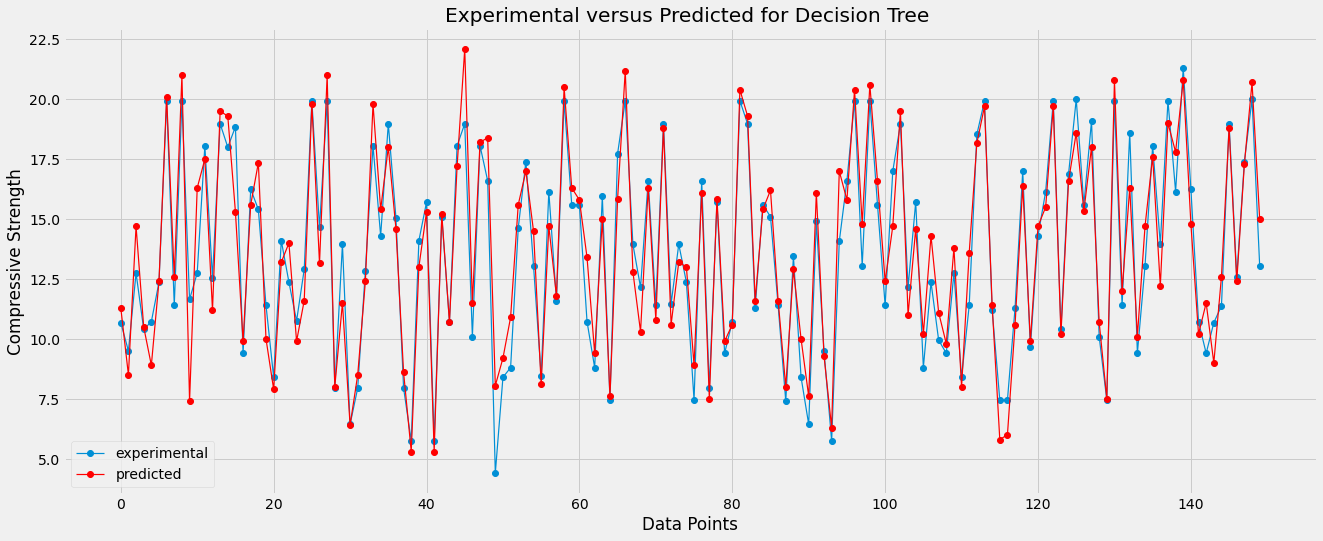

In [19]:
plt.figure(figsize=(20, 8))
plt.plot(np.arange(len(dtree_pred)), dtree_pred, marker='o', linewidth=1.2)
plt.plot(np.arange(len(y_test)), y_test, marker='o', linewidth=1.2, color='red')
plt.title('Experimental versus Predicted for Decision Tree ')
plt.xlabel('Data Points')
plt.ylabel('Compressive Strength')
plt.legend(['experimental', 'predicted'])
plt.savefig('opc_gwp_cwp_dtree_experimental_predicted.jpg');

In [20]:
# the residual between the actual value and the predicted value
dtree_residual = dtree_pred-y_test

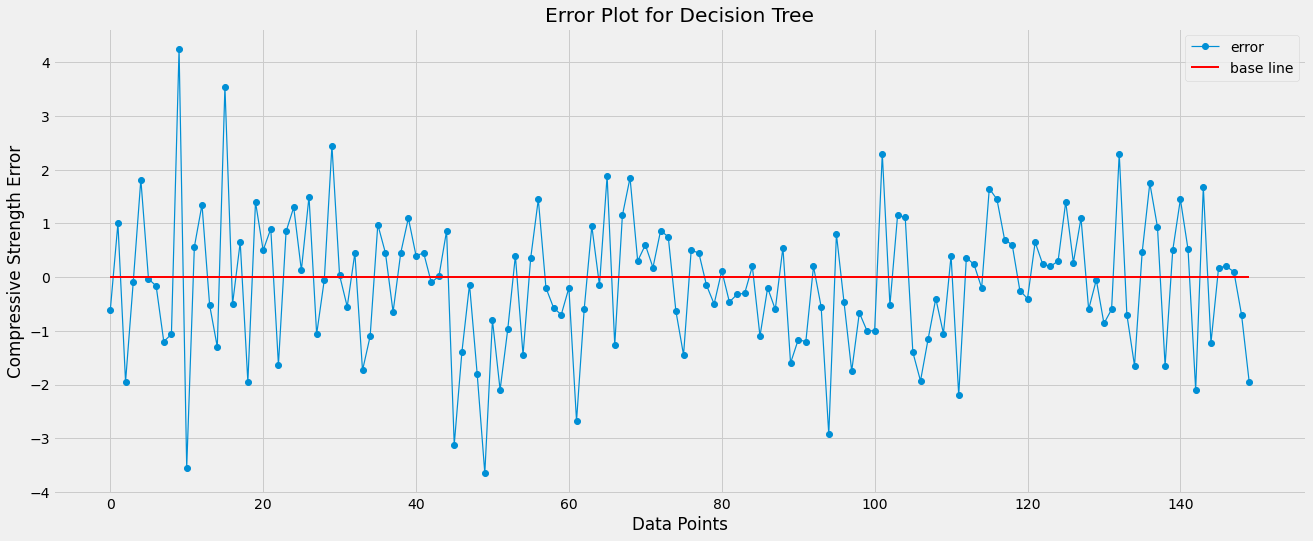

In [21]:
plt.figure(figsize=(20, 8))
plt.plot(np.arange(len(dtree_residual)), dtree_residual, marker='o', linewidth=1.2)
plt.plot(np.zeros(len(dtree_residual)), color='red', linewidth=2)
plt.title('Error Plot for Decision Tree')
plt.xlabel('Data Points')
plt.ylabel('Compressive Strength Error')
plt.legend(['error', 'base line'])
plt.savefig('opc_gwp_cwp_dtree_error_analysis.jpg');

###### SVR

In [36]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [42]:
import optuna
def objective(trial):
    epsilon = trial.suggest_float('epsilon', 0.1, 10, step=0.1)
    C = trial.suggest_int('C',1, 201, step=2)
    degree = trial.suggest_int('degree', 1, 20, step=1)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    gamma = trial.suggest_categorical('gamma', ['auto', 'scale'])
    svr_model = SVR(kernel=kernel, degree=degree, gamma=gamma, C=C, epsilon=epsilon)
    svr_model.fit(X_train_scaled, y_train)
    svr_pred = svr_model.predict(X_test_scaled)
    error = mean_squared_error(y_test, svr_pred)
    return error
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5000)

[I 2023-01-10 23:02:09,947] A new study created in memory with name: no-name-89f236ba-9e32-4dc0-98c1-be9546e56db0
[I 2023-01-10 23:02:10,426] Trial 0 finished with value: 15.377563824258583 and parameters: {'epsilon': 9.4, 'C': 155, 'degree': 18, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 0 with value: 15.377563824258583.
[I 2023-01-10 23:02:10,454] Trial 1 finished with value: 398.2353882059372 and parameters: {'epsilon': 5.1, 'C': 69, 'degree': 13, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 0 with value: 15.377563824258583.
[I 2023-01-10 23:02:10,465] Trial 2 finished with value: 13.75788340929251 and parameters: {'epsilon': 7.4, 'C': 185, 'degree': 9, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 2 with value: 13.75788340929251.
[I 2023-01-10 23:02:10,563] Trial 3 finished with value: 2094928.8088663495 and parameters: {'epsilon': 1.0, 'C': 99, 'degree': 18, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 2 with value: 13.75788340929251.
[I 2023-01-10 23:02:10,

[I 2023-01-10 23:02:12,646] Trial 35 finished with value: 1.9668008271545607 and parameters: {'epsilon': 1.4000000000000001, 'C': 83, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 22 with value: 1.769786733954126.
[I 2023-01-10 23:02:12,724] Trial 36 finished with value: 10.018129893134542 and parameters: {'epsilon': 3.5000000000000004, 'C': 111, 'degree': 4, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 22 with value: 1.769786733954126.
[I 2023-01-10 23:02:12,813] Trial 37 finished with value: 1.8625320446042675 and parameters: {'epsilon': 0.9, 'C': 73, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 22 with value: 1.769786733954126.
[I 2023-01-10 23:02:12,845] Trial 38 finished with value: 7.88193108578765 and parameters: {'epsilon': 6.8, 'C': 137, 'degree': 6, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 22 with value: 1.769786733954126.
[I 2023-01-10 23:02:12,904] Trial 39 finished with value: 419925.7381302609 and parameters: {'epsilon'

[I 2023-01-10 23:02:16,177] Trial 70 finished with value: 1.7528779704565673 and parameters: {'epsilon': 0.9, 'C': 167, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 62 with value: 1.7165024302206893.
[I 2023-01-10 23:02:16,319] Trial 71 finished with value: 1.7198798678908793 and parameters: {'epsilon': 0.30000000000000004, 'C': 145, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 62 with value: 1.7165024302206893.
[I 2023-01-10 23:02:16,405] Trial 72 finished with value: 1.7966986698985588 and parameters: {'epsilon': 1.0, 'C': 169, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 62 with value: 1.7165024302206893.
[I 2023-01-10 23:02:16,541] Trial 73 finished with value: 1.7198798678908793 and parameters: {'epsilon': 0.30000000000000004, 'C': 145, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 62 with value: 1.7165024302206893.
[I 2023-01-10 23:02:16,690] Trial 74 finished with value: 1.7211380415066044 and parameters: {'ep

[I 2023-01-10 23:02:20,210] Trial 105 finished with value: 1.678045299761404 and parameters: {'epsilon': 0.7000000000000001, 'C': 151, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 105 with value: 1.678045299761404.
[I 2023-01-10 23:02:20,314] Trial 106 finished with value: 1.678045299761404 and parameters: {'epsilon': 0.7000000000000001, 'C': 151, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 105 with value: 1.678045299761404.
[I 2023-01-10 23:02:20,383] Trial 107 finished with value: 2.053484692091339 and parameters: {'epsilon': 1.4000000000000001, 'C': 137, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 105 with value: 1.678045299761404.
[I 2023-01-10 23:02:20,419] Trial 108 finished with value: 14.431919046053117 and parameters: {'epsilon': 8.5, 'C': 151, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 105 with value: 1.678045299761404.
[I 2023-01-10 23:02:20,525] Trial 109 finished with value: 1.6600742938729096 and par

[I 2023-01-10 23:02:24,665] Trial 140 finished with value: 1.7926505544786877 and parameters: {'epsilon': 1.0, 'C': 185, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 133 with value: 1.6121321127004653.
[I 2023-01-10 23:02:24,777] Trial 141 finished with value: 1.6619399734894187 and parameters: {'epsilon': 0.6, 'C': 179, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 133 with value: 1.6121321127004653.
[I 2023-01-10 23:02:24,818] Trial 142 finished with value: 4.706302103266971 and parameters: {'epsilon': 3.9000000000000004, 'C': 181, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 133 with value: 1.6121321127004653.
[I 2023-01-10 23:02:24,935] Trial 143 finished with value: 1.6518122112617877 and parameters: {'epsilon': 0.6, 'C': 191, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 133 with value: 1.6121321127004653.
[I 2023-01-10 23:02:25,060] Trial 144 finished with value: 1.6887539442870976 and parameters: {'epsilon': 0.5,

[I 2023-01-10 23:02:29,129] Trial 175 finished with value: 1.848260644248956 and parameters: {'epsilon': 1.1, 'C': 189, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:02:29,342] Trial 176 finished with value: 1.6897752299136013 and parameters: {'epsilon': 0.4, 'C': 197, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:02:29,399] Trial 177 finished with value: 16.56766514460156 and parameters: {'epsilon': 9.6, 'C': 193, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:02:29,540] Trial 178 finished with value: 1.645529520872069 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:02:29,612] Trial 179 finished with value: 2.175959180889486 and parameters: {'epsilon': 1.6, 'C': 197, 'degree

[I 2023-01-10 23:02:34,487] Trial 210 finished with value: 1.9731603146279177 and parameters: {'epsilon': 1.3000000000000003, 'C': 199, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:02:34,590] Trial 211 finished with value: 1.645529520872069 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:02:34,690] Trial 212 finished with value: 1.71038242250758 and parameters: {'epsilon': 0.9, 'C': 197, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:02:34,796] Trial 213 finished with value: 1.6390814097443793 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:02:34,883] Trial 214 finished with value: 6.997345198648448 and parameters: {'epsilon': 4.8, 'C

[I 2023-01-10 23:02:39,198] Trial 245 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:02:39,321] Trial 246 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:02:39,387] Trial 247 finished with value: 1179412.1054741098 and parameters: {'epsilon': 0.2, 'C': 193, 'degree': 1, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:02:39,514] Trial 248 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:02:39,628] Trial 249 finished with value: 1.65412977703328

[I 2023-01-10 23:02:44,008] Trial 280 finished with value: 1.855629859421146 and parameters: {'epsilon': 1.2000000000000002, 'C': 197, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:02:44,057] Trial 281 finished with value: 14.678812685926806 and parameters: {'epsilon': 8.6, 'C': 193, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:02:44,184] Trial 282 finished with value: 1.610183224141169 and parameters: {'epsilon': 0.7000000000000001, 'C': 197, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:02:44,322] Trial 283 finished with value: 1.7198496698101986 and parameters: {'epsilon': 0.1, 'C': 197, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:02:44,434] Trial 284 finished with value: 1.7095769036498074 and parameters: {'

[I 2023-01-10 23:02:48,909] Trial 315 finished with value: 3.7541313629963966 and parameters: {'epsilon': 0.1, 'C': 201, 'degree': 3, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:02:49,059] Trial 316 finished with value: 1.6911913818975506 and parameters: {'epsilon': 0.5, 'C': 193, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:02:49,153] Trial 317 finished with value: 1.7948451715464864 and parameters: {'epsilon': 1.0, 'C': 197, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:02:49,204] Trial 318 finished with value: 6.257972163429069 and parameters: {'epsilon': 4.5, 'C': 201, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:02:49,320] Trial 319 finished with value: 1.6199212887073433 and parameters: {'epsilon': 0.70000000000000

[I 2023-01-10 23:02:53,140] Trial 350 finished with value: 7.83480915717718 and parameters: {'epsilon': 5.2, 'C': 189, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:02:53,255] Trial 351 finished with value: 1.7095769036498074 and parameters: {'epsilon': 0.9, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:02:53,397] Trial 352 finished with value: 1.6911913818975506 and parameters: {'epsilon': 0.5, 'C': 193, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:02:53,504] Trial 353 finished with value: 1.9734442046991945 and parameters: {'epsilon': 1.3000000000000003, 'C': 197, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:02:53,622] Trial 354 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.700

[I 2023-01-10 23:02:57,578] Trial 385 finished with value: 1.6441194627942741 and parameters: {'epsilon': 0.6, 'C': 197, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:02:57,710] Trial 386 finished with value: 1.6953365741613626 and parameters: {'epsilon': 0.4, 'C': 189, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:02:57,802] Trial 387 finished with value: 2.152276527841639 and parameters: {'epsilon': 1.5000000000000002, 'C': 193, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:02:58,176] Trial 388 finished with value: 3.670155909073952 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 4, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:02:58,314] Trial 389 finished with value: 1.8497452837767379 and parameters: {'epsilon': 1

[I 2023-01-10 23:03:02,995] Trial 420 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:03,072] Trial 421 finished with value: 1083991.9446010257 and parameters: {'epsilon': 0.1, 'C': 185, 'degree': 4, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:03,620] Trial 422 finished with value: 4.002640264267064 and parameters: {'epsilon': 1.0, 'C': 197, 'degree': 3, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:03,764] Trial 423 finished with value: 1.6549250945115839 and parameters: {'epsilon': 0.8, 'C': 191, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:03,908] Trial 424 finished with value: 1.6875802867959604 and parameters: {'epsilon': 0.4, 'C': 201, 

[I 2023-01-10 23:03:07,636] Trial 455 finished with value: 1.7148505059525967 and parameters: {'epsilon': 0.30000000000000004, 'C': 197, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:07,756] Trial 456 finished with value: 1.66892125370003 and parameters: {'epsilon': 0.8, 'C': 183, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:07,842] Trial 457 finished with value: 2.147489124262003 and parameters: {'epsilon': 1.5000000000000002, 'C': 201, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:08,034] Trial 458 finished with value: 1.6927203125730859 and parameters: {'epsilon': 0.5, 'C': 189, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:08,154] Trial 459 finished with value: 1.6121321127004653 and parameters: {'

[I 2023-01-10 23:03:13,006] Trial 490 finished with value: 1.6580626313216018 and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:13,146] Trial 491 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:13,219] Trial 492 finished with value: 12.300678569998718 and parameters: {'epsilon': 8.3, 'C': 195, 'degree': 1, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:13,362] Trial 493 finished with value: 1.849442052994347 and parameters: {'epsilon': 1.1, 'C': 201, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:13,509] Trial 494 finished with value: 1.6922375819741236 and parameters: {'epsilon': 0.4, 'C': 193, 'deg

[I 2023-01-10 23:03:17,337] Trial 525 finished with value: 1.7148711153428007 and parameters: {'epsilon': 0.30000000000000004, 'C': 193, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:17,486] Trial 526 finished with value: 1.8497452837767379 and parameters: {'epsilon': 1.1, 'C': 197, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:17,648] Trial 527 finished with value: 1.6922151893453758 and parameters: {'epsilon': 0.5, 'C': 191, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:17,769] Trial 528 finished with value: 1.7095769036498074 and parameters: {'epsilon': 0.9, 'C': 201, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:17,912] Trial 529 finished with value: 1.6441194627942741 and parameters: {'epsilon': 0.

[I 2023-01-10 23:03:22,465] Trial 560 finished with value: 1.7209124100062991 and parameters: {'epsilon': 0.1, 'C': 191, 'degree': 3, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:22,586] Trial 561 finished with value: 1.645529520872069 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:23,024] Trial 562 finished with value: 3.7214374590254793 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 2, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:23,145] Trial 563 finished with value: 1.8485047966890162 and parameters: {'epsilon': 1.1, 'C': 183, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:23,270] Trial 564 finished with value: 1.7209606853997468 and parameters: {'epsilon': 0.9, 'C': 187, 

[I 2023-01-10 23:03:28,281] Trial 595 finished with value: 1.7095769036498074 and parameters: {'epsilon': 0.9, 'C': 201, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:28,418] Trial 596 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:28,499] Trial 597 finished with value: 1227734.3583158532 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 2, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:28,599] Trial 598 finished with value: 2.147489124262003 and parameters: {'epsilon': 1.5000000000000002, 'C': 201, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:28,764] Trial 599 finished with value: 1.7148505059525967 and paramete

[I 2023-01-10 23:03:33,060] Trial 630 finished with value: 1.712456734496346 and parameters: {'epsilon': 0.9, 'C': 193, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:33,214] Trial 631 finished with value: 1.6887539442870976 and parameters: {'epsilon': 0.5, 'C': 197, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:33,420] Trial 632 finished with value: 1.6948490552849584 and parameters: {'epsilon': 0.2, 'C': 201, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:33,568] Trial 633 finished with value: 1.6121321127004653 and parameters: {'epsilon': 0.7000000000000001, 'C': 195, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:33,662] Trial 634 finished with value: 2.177030632167147 and parameters: {'epsilon': 1.6,

[I 2023-01-10 23:03:38,770] Trial 665 finished with value: 3.7541889093832554 and parameters: {'epsilon': 0.1, 'C': 197, 'degree': 1, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:38,945] Trial 666 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:39,077] Trial 667 finished with value: 1.645529520872069 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:39,236] Trial 668 finished with value: 1.7144513036993339 and parameters: {'epsilon': 0.30000000000000004, 'C': 185, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:39,332] Trial 669 finished with value: 1253571.6842172518 and parameters: {'epsilon': 4.6

[I 2023-01-10 23:03:44,034] Trial 700 finished with value: 1.71038242250758 and parameters: {'epsilon': 0.9, 'C': 197, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:44,221] Trial 701 finished with value: 1.6819455644715497 and parameters: {'epsilon': 0.7000000000000001, 'C': 149, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:44,347] Trial 702 finished with value: 1.851051191490524 and parameters: {'epsilon': 1.2000000000000002, 'C': 201, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:44,524] Trial 703 finished with value: 1.6911913818975506 and parameters: {'epsilon': 0.5, 'C': 193, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:44,652] Trial 704 finished with value: 1.645529520872069 and parameters: {'ep

[I 2023-01-10 23:03:49,558] Trial 735 finished with value: 1.7124552165170053 and parameters: {'epsilon': 0.30000000000000004, 'C': 201, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:49,710] Trial 736 finished with value: 1.6441194627942741 and parameters: {'epsilon': 0.6, 'C': 197, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:49,836] Trial 737 finished with value: 1.792811312335543 and parameters: {'epsilon': 1.0, 'C': 191, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:50,626] Trial 738 finished with value: 5.2923061445745585 and parameters: {'epsilon': 0.8, 'C': 195, 'degree': 5, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:50,807] Trial 739 finished with value: 1.6875802867959604 and parameters: {'epsilon': 0.

[I 2023-01-10 23:03:55,546] Trial 770 finished with value: 1.6907662751455068 and parameters: {'epsilon': 0.4, 'C': 195, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:55,692] Trial 771 finished with value: 1.657403859330306 and parameters: {'epsilon': 0.6, 'C': 185, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:55,780] Trial 772 finished with value: 4.706302103266971 and parameters: {'epsilon': 3.9000000000000004, 'C': 201, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:55,947] Trial 773 finished with value: 1.9734046058579975 and parameters: {'epsilon': 1.3000000000000003, 'C': 191, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:03:56,101] Trial 774 finished with value: 1.645529520872069 and parameters: {'

[I 2023-01-10 23:04:01,094] Trial 805 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:01,553] Trial 806 finished with value: 3.7052460301414407 and parameters: {'epsilon': 0.5, 'C': 193, 'degree': 1, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:01,698] Trial 807 finished with value: 1.7948451715464864 and parameters: {'epsilon': 1.0, 'C': 197, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:01,846] Trial 808 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:02,012] Trial 809 finished with value: 1.7195279674893755 and parameters: {'epsilon': 0

[I 2023-01-10 23:04:07,613] Trial 840 finished with value: 1.7384165052205318 and parameters: {'epsilon': 0.30000000000000004, 'C': 79, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:07,741] Trial 841 finished with value: 1.870471685756869 and parameters: {'epsilon': 1.2000000000000002, 'C': 163, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:07,844] Trial 842 finished with value: 1304957.174690787 and parameters: {'epsilon': 1.0, 'C': 195, 'degree': 4, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:08,007] Trial 843 finished with value: 1.6871376767705135 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:08,148] Trial 844 finished with value: 1.645529520872069 and parameters:

[I 2023-01-10 23:04:12,864] Trial 875 finished with value: 13.478942746292304 and parameters: {'epsilon': 8.1, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:13,076] Trial 876 finished with value: 1.6922151893453758 and parameters: {'epsilon': 0.5, 'C': 191, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:13,230] Trial 877 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:13,377] Trial 878 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:13,640] Trial 879 finished with value: 1.7196408559405159 and parameters: 

[I 2023-01-10 23:04:20,121] Trial 910 finished with value: 3.721136163062104 and parameters: {'epsilon': 0.4, 'C': 197, 'degree': 1, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:20,288] Trial 911 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:20,451] Trial 912 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:20,662] Trial 913 finished with value: 1.7148711153428007 and parameters: {'epsilon': 0.30000000000000004, 'C': 193, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:20,787] Trial 914 finished with value: 2.478839841806277 a

[I 2023-01-10 23:04:26,082] Trial 945 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:26,247] Trial 946 finished with value: 1.645529520872069 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:26,418] Trial 947 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:26,587] Trial 948 finished with value: 1.8487060919542584 and parameters: {'epsilon': 1.1, 'C': 195, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:26,780] Trial 949 finished with value: 1.7148505059525967 and parameters: {'epsilon': 0.300

[I 2023-01-10 23:04:32,813] Trial 980 finished with value: 1.7095769036498074 and parameters: {'epsilon': 0.9, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:32,966] Trial 981 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:33,141] Trial 982 finished with value: 1.6897752299136013 and parameters: {'epsilon': 0.4, 'C': 197, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:33,278] Trial 983 finished with value: 1.859243520899336 and parameters: {'epsilon': 1.2000000000000002, 'C': 193, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:33,532] Trial 984 finished with value: 1.71038242250758 and parameters: {'e

[I 2023-01-10 23:04:39,795] Trial 1015 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:40,106] Trial 1016 finished with value: 1.696606272283858 and parameters: {'epsilon': 0.2, 'C': 197, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:40,310] Trial 1017 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:40,543] Trial 1018 finished with value: 1.8479188188644238 and parameters: {'epsilon': 1.1, 'C': 191, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:40,748] Trial 1019 finished with value: 1.71038242250758 and parameters: {'epsilon': 0

[I 2023-01-10 23:04:47,402] Trial 1050 finished with value: 10.100438881903255 and parameters: {'epsilon': 6.5, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:47,604] Trial 1051 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:47,777] Trial 1052 finished with value: 1.7846905480644395 and parameters: {'epsilon': 0.8, 'C': 111, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:48,182] Trial 1053 finished with value: 3.6566087445863613 and parameters: {'epsilon': 1.1, 'C': 193, 'degree': 1, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:48,394] Trial 1054 finished with value: 1.6897752299136013 and parameters: {'epsil

[I 2023-01-10 23:04:53,678] Trial 1085 finished with value: 11.322255941163682 and parameters: {'epsilon': 1.4000000000000001, 'C': 191, 'degree': 2, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:53,850] Trial 1086 finished with value: 1.71038242250758 and parameters: {'epsilon': 0.9, 'C': 197, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:54,053] Trial 1087 finished with value: 1.6922375819741236 and parameters: {'epsilon': 0.4, 'C': 193, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:54,148] Trial 1088 finished with value: 6.257972163429069 and parameters: {'epsilon': 4.5, 'C': 197, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:54,321] Trial 1089 finished with value: 1.636874593043897 and parameters: {'epsilon': 0

[I 2023-01-10 23:04:59,853] Trial 1120 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:04:59,946] Trial 1121 finished with value: 5.243059356722089 and parameters: {'epsilon': 4.1, 'C': 189, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:00,170] Trial 1122 finished with value: 1.7198694713498184 and parameters: {'epsilon': 0.1, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:00,364] Trial 1123 finished with value: 1.6887539442870976 and parameters: {'epsilon': 0.5, 'C': 197, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:00,484] Trial 1124 finished with value: 2.152276527841639 and parameters: {'epsilon':

[I 2023-01-10 23:05:05,919] Trial 1155 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:06,112] Trial 1156 finished with value: 1.6911913818975506 and parameters: {'epsilon': 0.5, 'C': 193, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:06,311] Trial 1157 finished with value: 1.7198496698101986 and parameters: {'epsilon': 0.1, 'C': 197, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:06,413] Trial 1158 finished with value: 11.843370348191472 and parameters: {'epsilon': 7.4, 'C': 201, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:06,663] Trial 1159 finished with value: 3.68180917078622 and parameters: {'epsilon':

[I 2023-01-10 23:05:12,511] Trial 1190 finished with value: 1.6953365741613626 and parameters: {'epsilon': 0.4, 'C': 189, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:12,614] Trial 1191 finished with value: 12.520752944740144 and parameters: {'epsilon': 7.7, 'C': 195, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:12,784] Trial 1192 finished with value: 1.645529520872069 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:12,980] Trial 1193 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:13,176] Trial 1194 finished with value: 1.7195279674893755 and parameters: {'epsilon':

[I 2023-01-10 23:05:18,641] Trial 1225 finished with value: 1.7120570623310187 and parameters: {'epsilon': 0.30000000000000004, 'C': 125, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:18,824] Trial 1226 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:19,351] Trial 1227 finished with value: 3.6720549092019685 and parameters: {'epsilon': 0.9, 'C': 187, 'degree': 1, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:19,552] Trial 1228 finished with value: 1.7196408559405159 and parameters: {'epsilon': 0.1, 'C': 195, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:19,715] Trial 1229 finished with value: 1.9734046058579975 and parameters: {'epsil

[I 2023-01-10 23:05:25,102] Trial 1260 finished with value: 1.6871376767705135 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:25,229] Trial 1261 finished with value: 1.9433061887883702 and parameters: {'epsilon': 0.7000000000000001, 'C': 27, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:25,425] Trial 1262 finished with value: 1.712049471754646 and parameters: {'epsilon': 0.2, 'C': 161, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:25,577] Trial 1263 finished with value: 1.796345041378272 and parameters: {'epsilon': 1.0, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:25,760] Trial 1264 finished with value: 1.7576780012583149 and parameters: {'epsilon': 0

[I 2023-01-10 23:05:31,253] Trial 1295 finished with value: 1.796345041378272 and parameters: {'epsilon': 1.0, 'C': 201, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:31,376] Trial 1296 finished with value: 3.91704781673622 and parameters: {'epsilon': 3.0000000000000004, 'C': 193, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:31,544] Trial 1297 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:31,940] Trial 1298 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:32,468] Trial 1299 finished with value: 3.754318802322326 

[I 2023-01-10 23:05:38,263] Trial 1330 finished with value: 1.7095769036498074 and parameters: {'epsilon': 0.9, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:38,438] Trial 1331 finished with value: 1.610183224141169 and parameters: {'epsilon': 0.7000000000000001, 'C': 197, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:38,571] Trial 1332 finished with value: 1278439.5377743812 and parameters: {'epsilon': 1.2000000000000002, 'C': 193, 'degree': 2, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:38,777] Trial 1333 finished with value: 1.6958945853948926 and parameters: {'epsilon': 0.4, 'C': 187, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:38,963] Trial 1334 finished with value: 1.636874593043897 and param

[I 2023-01-10 23:05:45,411] Trial 1365 finished with value: 1.6922375819741236 and parameters: {'epsilon': 0.4, 'C': 193, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:45,596] Trial 1366 finished with value: 1.6441194627942741 and parameters: {'epsilon': 0.6, 'C': 197, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:45,754] Trial 1367 finished with value: 1.7948451715464864 and parameters: {'epsilon': 1.0, 'C': 197, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:45,965] Trial 1368 finished with value: 1.6911913818975506 and parameters: {'epsilon': 0.5, 'C': 193, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:46,152] Trial 1369 finished with value: 1.9734442046991945 and parameters: {'epsilon': 1.30000000000

[I 2023-01-10 23:05:52,634] Trial 1400 finished with value: 1.71038242250758 and parameters: {'epsilon': 0.9, 'C': 197, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:53,043] Trial 1401 finished with value: 11.87431233214963 and parameters: {'epsilon': 0.4, 'C': 189, 'degree': 4, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:53,219] Trial 1402 finished with value: 1.973416906751576 and parameters: {'epsilon': 1.3000000000000003, 'C': 195, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:53,345] Trial 1403 finished with value: 2.8584599397999138 and parameters: {'epsilon': 2.3000000000000003, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:53,566] Trial 1404 finished with value: 1.6887539442870976 and parameter

[I 2023-01-10 23:05:59,623] Trial 1435 finished with value: 2.139307828902522 and parameters: {'epsilon': 0.5, 'C': 9, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:05:59,814] Trial 1436 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:00,024] Trial 1437 finished with value: 1.7180296340255135 and parameters: {'epsilon': 0.9, 'C': 189, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:00,209] Trial 1438 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:00,393] Trial 1439 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.

[I 2023-01-10 23:06:07,352] Trial 1470 finished with value: 3.6747844681954365 and parameters: {'epsilon': 1.3000000000000003, 'C': 193, 'degree': 1, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:07,582] Trial 1471 finished with value: 1.7198496698101986 and parameters: {'epsilon': 0.1, 'C': 197, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:07,755] Trial 1472 finished with value: 1.7095769036498074 and parameters: {'epsilon': 0.9, 'C': 201, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:07,961] Trial 1473 finished with value: 1.6887539442870976 and parameters: {'epsilon': 0.5, 'C': 197, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:08,400] Trial 1474 finished with value: 3.887748783652175 and parameters: {'epsil

[I 2023-01-10 23:06:14,639] Trial 1505 finished with value: 1.6390814097443793 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:14,851] Trial 1506 finished with value: 1.848260644248956 and parameters: {'epsilon': 1.1, 'C': 189, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:15,035] Trial 1507 finished with value: 1.6996755691962244 and parameters: {'epsilon': 0.7000000000000001, 'C': 143, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:15,167] Trial 1508 finished with value: 2.795042025123986 and parameters: {'epsilon': 0.6, 'C': 1, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:15,312] Trial 1509 finished with value: 2.147489124262003 and parameters: {'epsilon': 1.5

[I 2023-01-10 23:06:21,595] Trial 1540 finished with value: 3.7287954098915503 and parameters: {'epsilon': 0.30000000000000004, 'C': 193, 'degree': 1, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:21,781] Trial 1541 finished with value: 1.645529520872069 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:21,964] Trial 1542 finished with value: 1.7948451715464864 and parameters: {'epsilon': 1.0, 'C': 197, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:22,100] Trial 1543 finished with value: 9.934388747248079 and parameters: {'epsilon': 6.4, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:22,310] Trial 1544 finished with value: 1.636874593043897 and parameters: {'epsilon

[I 2023-01-10 23:06:29,666] Trial 1575 finished with value: 5.243059356722089 and parameters: {'epsilon': 4.1, 'C': 201, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:29,838] Trial 1576 finished with value: 1331965.177347641 and parameters: {'epsilon': 1.3000000000000003, 'C': 197, 'degree': 15, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:30,072] Trial 1577 finished with value: 1.6887539442870976 and parameters: {'epsilon': 0.5, 'C': 197, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:30,263] Trial 1578 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:30,450] Trial 1579 finished with value: 1.8483591966557007 and para

[I 2023-01-10 23:06:37,237] Trial 1610 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:37,429] Trial 1611 finished with value: 2.1509954687702506 and parameters: {'epsilon': 1.5000000000000002, 'C': 189, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:37,596] Trial 1612 finished with value: 1.7948451715464864 and parameters: {'epsilon': 1.0, 'C': 197, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:37,839] Trial 1613 finished with value: 1.6973852494660215 and parameters: {'epsilon': 0.2, 'C': 195, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:38,052] Trial 1614 finished with value: 1.6871376767705135 and parame

[I 2023-01-10 23:06:45,378] Trial 1645 finished with value: 1.8487060919542584 and parameters: {'epsilon': 1.1, 'C': 195, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:45,530] Trial 1646 finished with value: 52410.26650906359 and parameters: {'epsilon': 0.5, 'C': 39, 'degree': 7, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:45,692] Trial 1647 finished with value: 1.82431231611433 and parameters: {'epsilon': 0.9, 'C': 89, 'degree': 3, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:45,943] Trial 1648 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:46,168] Trial 1649 finished with value: 1.7198496698101986 and parameters: {'epsilon': 0.1, 'C': 197,

[I 2023-01-10 23:06:52,884] Trial 1680 finished with value: 1.6887539442870976 and parameters: {'epsilon': 0.5, 'C': 197, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:53,081] Trial 1681 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:53,288] Trial 1682 finished with value: 1.712456734496346 and parameters: {'epsilon': 0.9, 'C': 193, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:53,465] Trial 1683 finished with value: 1.9734442046991945 and parameters: {'epsilon': 1.3000000000000003, 'C': 197, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:06:53,707] Trial 1684 finished with value: 1.6948490552849584 and parame

[I 2023-01-10 23:07:00,833] Trial 1715 finished with value: 1.7948451715464864 and parameters: {'epsilon': 1.0, 'C': 197, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:01,063] Trial 1716 finished with value: 11.399500896120262 and parameters: {'epsilon': 0.4, 'C': 197, 'degree': 2, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:01,252] Trial 1717 finished with value: 1.7095769036498074 and parameters: {'epsilon': 0.9, 'C': 201, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:01,455] Trial 1718 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:01,610] Trial 1719 finished with value: 2.330154885619781 and parameters: {'epsilon': 1.90000000000

[I 2023-01-10 23:07:08,750] Trial 1750 finished with value: 1.6953365741613626 and parameters: {'epsilon': 0.4, 'C': 189, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:08,985] Trial 1751 finished with value: 1.7198496698101986 and parameters: {'epsilon': 0.1, 'C': 197, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:09,137] Trial 1752 finished with value: 13.000146982988017 and parameters: {'epsilon': 7.9, 'C': 193, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:09,363] Trial 1753 finished with value: 1.6390814097443793 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:09,794] Trial 1754 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201

[I 2023-01-10 23:07:16,844] Trial 1785 finished with value: 3.656493681173114 and parameters: {'epsilon': 1.1, 'C': 195, 'degree': 1, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:17,279] Trial 1786 finished with value: 1.6887539442870976 and parameters: {'epsilon': 0.5, 'C': 197, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:17,430] Trial 1787 finished with value: 1.9796554311972197 and parameters: {'epsilon': 0.9, 'C': 25, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:17,667] Trial 1788 finished with value: 1.7145698643129625 and parameters: {'epsilon': 0.30000000000000004, 'C': 191, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:17,914] Trial 1789 finished with value: 1.636874593043897 and parameters: {'epsilo

[I 2023-01-10 23:07:25,434] Trial 1820 finished with value: 1.6249092103436227 and parameters: {'epsilon': 0.7000000000000001, 'C': 185, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:25,651] Trial 1821 finished with value: 1.8497452837767379 and parameters: {'epsilon': 1.1, 'C': 197, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:25,787] Trial 1822 finished with value: 4.4584676778969925 and parameters: {'epsilon': 3.8000000000000003, 'C': 197, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:25,996] Trial 1823 finished with value: 1.712456734496346 and parameters: {'epsilon': 0.9, 'C': 193, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:26,200] Trial 1824 finished with value: 1.6062973077898646 and paramet

[I 2023-01-10 23:07:33,704] Trial 1855 finished with value: 1.7141416550052035 and parameters: {'epsilon': 0.30000000000000004, 'C': 189, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:33,909] Trial 1856 finished with value: 1.973416906751576 and parameters: {'epsilon': 1.3000000000000003, 'C': 195, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:34,229] Trial 1857 finished with value: 3.774922113545533 and parameters: {'epsilon': 1.8000000000000003, 'C': 193, 'degree': 1, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:34,414] Trial 1858 finished with value: 1.7948451715464864 and parameters: {'epsilon': 1.0, 'C': 197, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:34,627] Trial 1859 finished with value: 1.606297307

[I 2023-01-10 23:07:42,164] Trial 1890 finished with value: 1.6953365741613626 and parameters: {'epsilon': 0.4, 'C': 189, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:42,358] Trial 1891 finished with value: 1.971937779175073 and parameters: {'epsilon': 1.3000000000000003, 'C': 165, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:42,550] Trial 1892 finished with value: 1386321.7269042055 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 13, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:42,799] Trial 1893 finished with value: 1.6900153282366983 and parameters: {'epsilon': 0.5, 'C': 195, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:43,211] Trial 1894 finished with value: 1.7926737362510838 and parameters: {'epsi

[I 2023-01-10 23:07:50,467] Trial 1925 finished with value: 1.7926737362510838 and parameters: {'epsilon': 1.0, 'C': 193, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:50,709] Trial 1926 finished with value: 1.7198496698101986 and parameters: {'epsilon': 0.1, 'C': 197, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:50,937] Trial 1927 finished with value: 1.6907662751455068 and parameters: {'epsilon': 0.4, 'C': 195, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:51,176] Trial 1928 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:51,610] Trial 1929 finished with value: 3.728834491801796 and parameters: {'epsilon':

[I 2023-01-10 23:07:58,941] Trial 1960 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:59,135] Trial 1961 finished with value: 1.742301766447814 and parameters: {'epsilon': 0.7000000000000001, 'C': 127, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:59,299] Trial 1962 finished with value: 1124649.3363529716 and parameters: {'epsilon': 1.4000000000000001, 'C': 181, 'degree': 4, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:59,535] Trial 1963 finished with value: 1.7195279674893755 and parameters: {'epsilon': 0.1, 'C': 193, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:07:59,780] Trial 1964 finished with value: 1.6062973077898646 and param

[I 2023-01-10 23:08:07,596] Trial 1995 finished with value: 1.6887539442870976 and parameters: {'epsilon': 0.5, 'C': 197, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:08:07,830] Trial 1996 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:08:08,046] Trial 1997 finished with value: 1.796345041378272 and parameters: {'epsilon': 1.0, 'C': 201, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:08:08,300] Trial 1998 finished with value: 1.6497110582109342 and parameters: {'epsilon': 0.6, 'C': 193, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:08:08,516] Trial 1999 finished with value: 1.645529520872069 and parameters: {'epsilon':

[I 2023-01-10 23:08:17,346] Trial 2030 finished with value: 1.6907662751455068 and parameters: {'epsilon': 0.4, 'C': 195, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:08:17,530] Trial 2031 finished with value: 2.0620212207088096 and parameters: {'epsilon': 1.4000000000000001, 'C': 197, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:08:17,772] Trial 2032 finished with value: 2113.29097909127 and parameters: {'epsilon': 1.0, 'C': 185, 'degree': 12, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:08:18,052] Trial 2033 finished with value: 1.6911913818975506 and parameters: {'epsilon': 0.5, 'C': 193, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:08:18,443] Trial 2034 finished with value: 1131026.2035162544 and parameters: {'epsilon'

[I 2023-01-10 23:08:25,975] Trial 2065 finished with value: 1.859243520899336 and parameters: {'epsilon': 1.2000000000000002, 'C': 193, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:08:26,164] Trial 2066 finished with value: 1.7990473283971065 and parameters: {'epsilon': 0.9, 'C': 139, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:08:26,416] Trial 2067 finished with value: 1.6887539442870976 and parameters: {'epsilon': 0.5, 'C': 197, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:08:26,604] Trial 2068 finished with value: 2.1509954687702506 and parameters: {'epsilon': 1.5000000000000002, 'C': 189, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:08:26,804] Trial 2069 finished with value: 1.796345041378272 and parameter

[I 2023-01-10 23:08:35,102] Trial 2100 finished with value: 3.6772537562565026 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 10, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:08:35,335] Trial 2101 finished with value: 1.7195279674893755 and parameters: {'epsilon': 0.1, 'C': 193, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:08:35,573] Trial 2102 finished with value: 1.8497452837767379 and parameters: {'epsilon': 1.1, 'C': 197, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:08:35,851] Trial 2103 finished with value: 445.21805740997314 and parameters: {'epsilon': 0.4, 'C': 189, 'degree': 10, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:08:36,096] Trial 2104 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000

[I 2023-01-10 23:08:44,110] Trial 2135 finished with value: 1.7196408559405159 and parameters: {'epsilon': 0.1, 'C': 195, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:08:44,330] Trial 2136 finished with value: 1.71038242250758 and parameters: {'epsilon': 0.9, 'C': 197, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:08:44,589] Trial 2137 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:08:44,854] Trial 2138 finished with value: 1.7148711153428007 and parameters: {'epsilon': 0.30000000000000004, 'C': 193, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:08:45,079] Trial 2139 finished with value: 1.8684235433526548 and parame

[I 2023-01-10 23:08:53,620] Trial 2170 finished with value: 1.7095769036498074 and parameters: {'epsilon': 0.9, 'C': 201, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:08:53,820] Trial 2171 finished with value: 2.8606591063043383 and parameters: {'epsilon': 2.3000000000000003, 'C': 197, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:08:54,049] Trial 2172 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:08:54,590] Trial 2173 finished with value: 3.7052460301414407 and parameters: {'epsilon': 0.5, 'C': 193, 'degree': 8, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:08:54,808] Trial 2174 finished with value: 1.7926300468722571 and pa

[I 2023-01-10 23:09:03,032] Trial 2205 finished with value: 1.973424765141806 and parameters: {'epsilon': 1.3000000000000003, 'C': 193, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:09:03,208] Trial 2206 finished with value: 1179322.8928749457 and parameters: {'epsilon': 0.30000000000000004, 'C': 197, 'degree': 1, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:09:03,445] Trial 2207 finished with value: 1.8479188188644238 and parameters: {'epsilon': 1.1, 'C': 191, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:09:03,672] Trial 2208 finished with value: 1.6390814097443793 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:09:03,951] Trial 2209 finished with value: 1.6887539442870976 and pa

[I 2023-01-10 23:09:12,319] Trial 2240 finished with value: 1.8497452837767379 and parameters: {'epsilon': 1.1, 'C': 197, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:09:12,560] Trial 2241 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:09:12,789] Trial 2242 finished with value: 1.71038242250758 and parameters: {'epsilon': 0.9, 'C': 197, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:09:13,020] Trial 2243 finished with value: 1.610183224141169 and parameters: {'epsilon': 0.7000000000000001, 'C': 197, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:09:13,261] Trial 2244 finished with value: 1.6603787218870003 and parameters: {'epsilon': 0

[I 2023-01-10 23:09:22,186] Trial 2275 finished with value: 1.7148711153428007 and parameters: {'epsilon': 0.30000000000000004, 'C': 193, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:09:22,376] Trial 2276 finished with value: 1149529.0917157524 and parameters: {'epsilon': 1.2000000000000002, 'C': 183, 'degree': 2, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:09:22,645] Trial 2277 finished with value: 1.6887539442870976 and parameters: {'epsilon': 0.5, 'C': 197, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:09:22,908] Trial 2278 finished with value: 1.7926300468722571 and parameters: {'epsilon': 1.0, 'C': 189, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:09:23,131] Trial 2279 finished with value: 1.7375068592209937 and pa

[I 2023-01-10 23:09:31,852] Trial 2310 finished with value: 1.8497452837767379 and parameters: {'epsilon': 1.1, 'C': 197, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:09:32,098] Trial 2311 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:09:32,385] Trial 2312 finished with value: 1.6991270297048382 and parameters: {'epsilon': 0.2, 'C': 191, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:09:32,617] Trial 2313 finished with value: 1.6390814097443793 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:09:32,868] Trial 2314 finished with value: 1.657403859330306 and parameters: {'epsilon': 0.6, 'C': 185,

[I 2023-01-10 23:09:41,824] Trial 2345 finished with value: 1.7148711153428007 and parameters: {'epsilon': 0.30000000000000004, 'C': 193, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:09:42,064] Trial 2346 finished with value: 1.7948451715464864 and parameters: {'epsilon': 1.0, 'C': 197, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:09:42,310] Trial 2347 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:09:42,734] Trial 2348 finished with value: 20.310302377420957 and parameters: {'epsilon': 1.1, 'C': 189, 'degree': 7, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:09:42,998] Trial 2349 finished with value: 1.6922375819741236 and parameters: {'epsi

[I 2023-01-10 23:09:51,697] Trial 2380 finished with value: 1.7528779704565673 and parameters: {'epsilon': 0.9, 'C': 167, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:09:51,949] Trial 2381 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:09:52,225] Trial 2382 finished with value: 1.7124552165170053 and parameters: {'epsilon': 0.30000000000000004, 'C': 201, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:09:52,459] Trial 2383 finished with value: 1.645529520872069 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:09:52,676] Trial 2384 finished with value: 2.152276527841639 and parameters: {'epsilon': 

[I 2023-01-10 23:10:01,567] Trial 2415 finished with value: 1.7110086770301063 and parameters: {'epsilon': 0.9, 'C': 195, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:10:01,758] Trial 2416 finished with value: 2.9232393827528766 and parameters: {'epsilon': 2.4000000000000004, 'C': 197, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:10:02,003] Trial 2417 finished with value: 3.6770871589893157 and parameters: {'epsilon': 0.6, 'C': 189, 'degree': 1, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:10:02,323] Trial 2418 finished with value: 1.7124552165170053 and parameters: {'epsilon': 0.30000000000000004, 'C': 201, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:10:02,502] Trial 2419 finished with value: 4.978689764372088 and parame

[I 2023-01-10 23:10:11,424] Trial 2450 finished with value: 1.87466320175471 and parameters: {'epsilon': 1.0, 'C': 79, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:10:11,763] Trial 2451 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:10:12,066] Trial 2452 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:10:12,590] Trial 2453 finished with value: 1.8613732184054568 and parameters: {'epsilon': 1.2000000000000002, 'C': 191, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:10:12,943] Trial 2454 finished with value: 1.6897752299136013 and parameters

[I 2023-01-10 23:10:22,700] Trial 2485 finished with value: 1.712456734496346 and parameters: {'epsilon': 0.9, 'C': 193, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:10:23,184] Trial 2486 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:10:23,498] Trial 2487 finished with value: 1.7148505059525967 and parameters: {'epsilon': 0.30000000000000004, 'C': 197, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:10:23,744] Trial 2488 finished with value: 1.9733832521815244 and parameters: {'epsilon': 1.3000000000000003, 'C': 189, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:10:24,034] Trial 2489 finished with value: 11.24319142386

[I 2023-01-10 23:10:33,000] Trial 2520 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:10:33,288] Trial 2521 finished with value: 1.7445783145140157 and parameters: {'epsilon': 0.2, 'C': 139, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:10:33,521] Trial 2522 finished with value: 1.71038242250758 and parameters: {'epsilon': 0.9, 'C': 197, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:10:33,794] Trial 2523 finished with value: 1.6932472367573554 and parameters: {'epsilon': 0.5, 'C': 187, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:10:34,072] Trial 2524 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000

[I 2023-01-10 23:10:43,594] Trial 2555 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:10:44,049] Trial 2556 finished with value: 3.674803438265073 and parameters: {'epsilon': 1.3000000000000003, 'C': 195, 'degree': 1, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:10:44,296] Trial 2557 finished with value: 1.71038242250758 and parameters: {'epsilon': 0.9, 'C': 197, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:10:44,825] Trial 2558 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:10:45,138] Trial 2559 finished with value: 1.6991270297048382 and parame

[I 2023-01-10 23:10:56,916] Trial 2590 finished with value: 57.22510403305387 and parameters: {'epsilon': 0.30000000000000004, 'C': 197, 'degree': 8, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:10:57,156] Trial 2591 finished with value: 2.316921831813193 and parameters: {'epsilon': 0.8, 'C': 5, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:10:57,348] Trial 2592 finished with value: 6.7798971698273 and parameters: {'epsilon': 4.7, 'C': 193, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:10:57,857] Trial 2593 finished with value: 1.9734442046991945 and parameters: {'epsilon': 1.3000000000000003, 'C': 197, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:10:58,125] Trial 2594 finished with value: 1.636874593043897 and parameters: {

[I 2023-01-10 23:11:08,789] Trial 2625 finished with value: 1.6887539442870976 and parameters: {'epsilon': 0.5, 'C': 197, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:11:09,132] Trial 2626 finished with value: 1.7222953347410248 and parameters: {'epsilon': 0.1, 'C': 189, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:11:09,461] Trial 2627 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:11:09,826] Trial 2628 finished with value: 2.152276527841639 and parameters: {'epsilon': 1.5000000000000002, 'C': 193, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:11:10,513] Trial 2629 finished with value: 3.721431445545142 and parameters: {'epsilon':

[I 2023-01-10 23:11:19,893] Trial 2660 finished with value: 13320.001577928213 and parameters: {'epsilon': 0.30000000000000004, 'C': 197, 'degree': 13, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:11:20,158] Trial 2661 finished with value: 1.849442052994347 and parameters: {'epsilon': 1.1, 'C': 201, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:11:20,435] Trial 2662 finished with value: 1.7180296340255135 and parameters: {'epsilon': 0.9, 'C': 189, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:11:20,696] Trial 2663 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:11:21,204] Trial 2664 finished with value: 1.6911913818975506 and pa

[I 2023-01-10 23:11:30,194] Trial 2695 finished with value: 1.7148711153428007 and parameters: {'epsilon': 0.30000000000000004, 'C': 193, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:11:30,642] Trial 2696 finished with value: 1.859243520899336 and parameters: {'epsilon': 1.2000000000000002, 'C': 193, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:11:30,937] Trial 2697 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:11:31,209] Trial 2698 finished with value: 2.4378005874862696 and parameters: {'epsilon': 1.9000000000000001, 'C': 197, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:11:31,517] Trial 2699 finished with value:

[I 2023-01-10 23:11:41,606] Trial 2730 finished with value: 1.7165024302206893 and parameters: {'epsilon': 0.30000000000000004, 'C': 135, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:11:41,884] Trial 2731 finished with value: 1.7926737362510838 and parameters: {'epsilon': 1.0, 'C': 193, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:11:42,140] Trial 2732 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:11:42,400] Trial 2733 finished with value: 1.645529520872069 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:11:42,681] Trial 2734 finished with value: 1.6897752299136013 and para

[I 2023-01-10 23:11:52,482] Trial 2765 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:11:52,676] Trial 2766 finished with value: 9.616772209361676 and parameters: {'epsilon': 6.2, 'C': 181, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:11:52,931] Trial 2767 finished with value: 1.7943649237086452 and parameters: {'epsilon': 0.9, 'C': 143, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:11:53,432] Trial 2768 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:11:53,716] Trial 2769 finished with value: 1.6497110582109342 and parameters: {'epsilon'

[I 2023-01-10 23:12:03,848] Trial 2800 finished with value: 1.8497452837767379 and parameters: {'epsilon': 1.1, 'C': 197, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:12:04,161] Trial 2801 finished with value: 1.6911913818975506 and parameters: {'epsilon': 0.5, 'C': 193, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:12:04,416] Trial 2802 finished with value: 1.645529520872069 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:12:04,944] Trial 2803 finished with value: 1.7222953347410248 and parameters: {'epsilon': 0.1, 'C': 189, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:12:05,661] Trial 2804 finished with value: 4.002640264267064 and parameters: {'epsilon': 1.0, 'C': 197,

[I 2023-01-10 23:12:15,555] Trial 2835 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:12:15,811] Trial 2836 finished with value: 4.293184134568631 and parameters: {'epsilon': 3.7, 'C': 195, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:12:16,283] Trial 2837 finished with value: 1.9734442046991945 and parameters: {'epsilon': 1.3000000000000003, 'C': 197, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:12:16,541] Trial 2838 finished with value: 1.6390814097443793 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:12:16,778] Trial 2839 finished with value: 1.7990208688028257 and parameters: {'epsilon':

[I 2023-01-10 23:12:27,083] Trial 2870 finished with value: 1.7095769036498074 and parameters: {'epsilon': 0.9, 'C': 201, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:12:27,578] Trial 2871 finished with value: 3.726731950833064 and parameters: {'epsilon': 1.6, 'C': 187, 'degree': 2, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:12:27,877] Trial 2872 finished with value: 1.7148711153428007 and parameters: {'epsilon': 0.30000000000000004, 'C': 193, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:12:28,166] Trial 2873 finished with value: 1.6887539442870976 and parameters: {'epsilon': 0.5, 'C': 197, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:12:28,432] Trial 2874 finished with value: 1.6062973077898646 and parameters: {'eps

[I 2023-01-10 23:12:38,621] Trial 2905 finished with value: 1.7924364150156733 and parameters: {'epsilon': 1.0, 'C': 187, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:12:38,899] Trial 2906 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:12:39,179] Trial 2907 finished with value: 1.6441194627942741 and parameters: {'epsilon': 0.6, 'C': 197, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:12:39,514] Trial 2908 finished with value: 1.7148711153428007 and parameters: {'epsilon': 0.30000000000000004, 'C': 193, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:12:40,047] Trial 2909 finished with value: 1.610183224141169 and parame

[I 2023-01-10 23:12:50,275] Trial 2940 finished with value: 1.8497452837767379 and parameters: {'epsilon': 1.1, 'C': 197, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:12:50,520] Trial 2941 finished with value: 2.0608952457141134 and parameters: {'epsilon': 1.4000000000000001, 'C': 191, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:12:51,020] Trial 2942 finished with value: 1.6658038556492325 and parameters: {'epsilon': 0.6, 'C': 173, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:12:51,320] Trial 2943 finished with value: 1.7095769036498074 and parameters: {'epsilon': 0.9, 'C': 201, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:12:51,617] Trial 2944 finished with value: 1.6871376767705135 and parameters: {'epsil

[I 2023-01-10 23:13:03,083] Trial 2975 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:13:03,332] Trial 2976 finished with value: 1.8742975122295567 and parameters: {'epsilon': 1.2000000000000002, 'C': 155, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:13:03,606] Trial 2977 finished with value: 3.6424826833865214 and parameters: {'epsilon': 1.0, 'C': 193, 'degree': 1, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:13:03,914] Trial 2978 finished with value: 1.7148505059525967 and parameters: {'epsilon': 0.30000000000000004, 'C': 197, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:13:04,242] Trial 2979 finished with value: 1.63687459304

[I 2023-01-10 23:13:14,749] Trial 3010 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:13:15,014] Trial 3011 finished with value: 1.7926737362510838 and parameters: {'epsilon': 1.0, 'C': 193, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:13:15,295] Trial 3012 finished with value: 1.6390814097443793 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:13:15,842] Trial 3013 finished with value: 1.6907662751455068 and parameters: {'epsilon': 0.4, 'C': 195, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:13:16,125] Trial 3014 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201

[I 2023-01-10 23:13:26,741] Trial 3045 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:13:27,043] Trial 3046 finished with value: 1.6907662751455068 and parameters: {'epsilon': 0.4, 'C': 195, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:13:27,480] Trial 3047 finished with value: 14.678812685926806 and parameters: {'epsilon': 8.6, 'C': 197, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:13:27,779] Trial 3048 finished with value: 1.6390814097443793 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:13:28,013] Trial 3049 finished with value: 1278354.0491001883 and parameters: {'epsilon': 1.0, 'C': 19

[I 2023-01-10 23:13:39,368] Trial 3080 finished with value: 1.7124552165170053 and parameters: {'epsilon': 0.30000000000000004, 'C': 201, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:13:39,878] Trial 3081 finished with value: 1.8486936546283985 and parameters: {'epsilon': 1.1, 'C': 185, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:13:40,147] Trial 3082 finished with value: 1.73202373438928 and parameters: {'epsilon': 0.8, 'C': 139, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:13:40,487] Trial 3083 finished with value: 1.6887539442870976 and parameters: {'epsilon': 0.5, 'C': 197, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:13:40,790] Trial 3084 finished with value: 1.9733832521815244 and parameters: {'epsilon'

[I 2023-01-10 23:13:52,156] Trial 3115 finished with value: 3.6747844681954365 and parameters: {'epsilon': 1.3000000000000003, 'C': 193, 'degree': 2, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:13:52,496] Trial 3116 finished with value: 1.6887539442870976 and parameters: {'epsilon': 0.5, 'C': 197, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:13:52,782] Trial 3117 finished with value: 1.6390814097443793 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:13:53,088] Trial 3118 finished with value: 1924.1849938539096 and parameters: {'epsilon': 1.1, 'C': 195, 'degree': 12, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:13:53,627] Trial 3119 finished with value: 1.6953365741613626 and parameters: {'e

[I 2023-01-10 23:14:04,460] Trial 3150 finished with value: 1.6897752299136013 and parameters: {'epsilon': 0.4, 'C': 197, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:14:04,720] Trial 3151 finished with value: 2.175959180889486 and parameters: {'epsilon': 1.6, 'C': 197, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:14:05,024] Trial 3152 finished with value: 1.7095769036498074 and parameters: {'epsilon': 0.9, 'C': 201, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:14:05,517] Trial 3153 finished with value: 2.061214268341986 and parameters: {'epsilon': 1.4000000000000001, 'C': 193, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:14:05,866] Trial 3154 finished with value: 1.7002510551040122 and parameters: {'epsilon':

[I 2023-01-10 23:14:16,785] Trial 3185 finished with value: 1.6390814097443793 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:14:17,335] Trial 3186 finished with value: 1.8479188188644238 and parameters: {'epsilon': 1.1, 'C': 191, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:14:17,844] Trial 3187 finished with value: 3.677270538912695 and parameters: {'epsilon': 0.6, 'C': 197, 'degree': 16, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:14:18,331] Trial 3188 finished with value: 3.906955598233988 and parameters: {'epsilon': 1.0, 'C': 129, 'degree': 3, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:14:18,617] Trial 3189 finished with value: 1.6390814097443793 and parameters: {'epsilon': 0.8, 'C':

[I 2023-01-10 23:14:29,792] Trial 3220 finished with value: 1.698260441712193 and parameters: {'epsilon': 0.2, 'C': 193, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:14:30,092] Trial 3221 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:14:30,380] Trial 3222 finished with value: 1.71038242250758 and parameters: {'epsilon': 0.9, 'C': 197, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:14:30,697] Trial 3223 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:14:31,247] Trial 3224 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0

[I 2023-01-10 23:14:42,196] Trial 3255 finished with value: 1.8486936546283985 and parameters: {'epsilon': 1.1, 'C': 185, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:14:42,680] Trial 3256 finished with value: 12.06359247513383 and parameters: {'epsilon': 7.5, 'C': 193, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:14:43,244] Trial 3257 finished with value: 3.7051703027232477 and parameters: {'epsilon': 0.5, 'C': 197, 'degree': 5, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:14:43,614] Trial 3258 finished with value: 1.696606272283858 and parameters: {'epsilon': 0.2, 'C': 197, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:14:43,909] Trial 3259 finished with value: 1.6390814097443793 and parameters: {'epsilon': 0.8, 'C': 20

[I 2023-01-10 23:14:55,639] Trial 3290 finished with value: 1278354.0491001883 and parameters: {'epsilon': 1.0, 'C': 193, 'degree': 11, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:14:55,930] Trial 3291 finished with value: 1.71038242250758 and parameters: {'epsilon': 0.9, 'C': 197, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:14:56,254] Trial 3292 finished with value: 1.6887539442870976 and parameters: {'epsilon': 0.5, 'C': 197, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:14:56,592] Trial 3293 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:14:57,122] Trial 3294 finished with value: 1.6390814097443793 and parameters: {'ep

[I 2023-01-10 23:15:08,562] Trial 3325 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:15:08,849] Trial 3326 finished with value: 1.8694121573246052 and parameters: {'epsilon': 0.1, 'C': 47, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:15:09,156] Trial 3327 finished with value: 1.696320464009709 and parameters: {'epsilon': 0.4, 'C': 185, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:15:09,683] Trial 3328 finished with value: 1.9733832521815244 and parameters: {'epsilon': 1.3000000000000003, 'C': 189, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:15:09,986] Trial 3329 finished with value: 1.6390814097443793 and paramete

[I 2023-01-10 23:15:22,220] Trial 3360 finished with value: 1.6497110582109342 and parameters: {'epsilon': 0.6, 'C': 193, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:15:22,790] Trial 3361 finished with value: 25601547.258904167 and parameters: {'epsilon': 1.0, 'C': 185, 'degree': 20, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:15:23,185] Trial 3362 finished with value: 1.7148505059525967 and parameters: {'epsilon': 0.30000000000000004, 'C': 197, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:15:23,505] Trial 3363 finished with value: 2.061214268341986 and parameters: {'epsilon': 1.4000000000000001, 'C': 193, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:15:23,841] Trial 3364 finished with value: 1.6062973077898646 and p

[I 2023-01-10 23:15:35,508] Trial 3395 finished with value: 1.9734442046991945 and parameters: {'epsilon': 1.3000000000000003, 'C': 197, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:15:35,805] Trial 3396 finished with value: 1.712456734496346 and parameters: {'epsilon': 0.9, 'C': 193, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:15:36,371] Trial 3397 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:15:36,663] Trial 3398 finished with value: 1.7577567963988459 and parameters: {'epsilon': 0.6, 'C': 95, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:15:37,019] Trial 3399 finished with value: 1.7148505059525967 and parame

[I 2023-01-10 23:15:48,984] Trial 3430 finished with value: 1.6390814097443793 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:15:49,313] Trial 3431 finished with value: 1.7302358431686609 and parameters: {'epsilon': 0.1, 'C': 151, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:15:49,608] Trial 3432 finished with value: 1.71038242250758 and parameters: {'epsilon': 0.9, 'C': 197, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:15:49,916] Trial 3433 finished with value: 1.8794109506461314 and parameters: {'epsilon': 1.1, 'C': 83, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:15:50,757] Trial 3434 finished with value: 112.08513479238056 and parameters: {'epsilon': 0.4, 'C': 195,

[I 2023-01-10 23:16:03,157] Trial 3465 finished with value: 1.712456734496346 and parameters: {'epsilon': 0.9, 'C': 193, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:16:03,738] Trial 3466 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:16:03,995] Trial 3467 finished with value: 9.466130011559532 and parameters: {'epsilon': 6.1, 'C': 201, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:16:04,298] Trial 3468 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:16:04,852] Trial 3469 finished with value: 1.645529520872069 and parameters: {'epsilon':

[I 2023-01-10 23:16:19,112] Trial 3500 finished with value: 2.0622070692805567 and parameters: {'epsilon': 1.4000000000000001, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:16:19,622] Trial 3501 finished with value: 3.642566447865317 and parameters: {'epsilon': 1.0, 'C': 189, 'degree': 2, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:16:20,042] Trial 3502 finished with value: 1.6900153282366983 and parameters: {'epsilon': 0.5, 'C': 195, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:16:20,708] Trial 3503 finished with value: 1.696606272283858 and parameters: {'epsilon': 0.2, 'C': 197, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:16:21,085] Trial 3504 finished with value: 1.6390814097443793 and parameters: {'epsil

[I 2023-01-10 23:16:34,479] Trial 3535 finished with value: 1.7926505544786877 and parameters: {'epsilon': 1.0, 'C': 185, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:16:34,778] Trial 3536 finished with value: 1131844.0990336654 and parameters: {'epsilon': 0.5, 'C': 193, 'degree': 6, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:16:35,373] Trial 3537 finished with value: 1.696606272283858 and parameters: {'epsilon': 0.2, 'C': 197, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:16:35,727] Trial 3538 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:16:36,044] Trial 3539 finished with value: 1.792811312335543 and parameters: {'epsilon': 1.0, 'C': 

[I 2023-01-10 23:16:49,261] Trial 3570 finished with value: 1.6887539442870976 and parameters: {'epsilon': 0.5, 'C': 197, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:16:49,777] Trial 3571 finished with value: 7.83480915717718 and parameters: {'epsilon': 5.2, 'C': 193, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:16:50,085] Trial 3572 finished with value: 1.6390814097443793 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:16:50,650] Trial 3573 finished with value: 1.8487060919542584 and parameters: {'epsilon': 1.1, 'C': 195, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:16:51,049] Trial 3574 finished with value: 44236919.296516985 and parameters: {'epsilon': 0.1, 'C': 197

[I 2023-01-10 23:17:04,067] Trial 3605 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:17:04,402] Trial 3606 finished with value: 1.6441194627942741 and parameters: {'epsilon': 0.6, 'C': 197, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:17:04,919] Trial 3607 finished with value: 1179322.8928749457 and parameters: {'epsilon': 0.30000000000000004, 'C': 197, 'degree': 17, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:17:05,234] Trial 3608 finished with value: 1.6390814097443793 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:17:05,578] Trial 3609 finished with value: 1.8486936546283985 and

[I 2023-01-10 23:17:19,102] Trial 3640 finished with value: 1.71038242250758 and parameters: {'epsilon': 0.9, 'C': 197, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:17:19,454] Trial 3641 finished with value: 1.8479188188644238 and parameters: {'epsilon': 1.1, 'C': 191, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:17:19,813] Trial 3642 finished with value: 1.6900153282366983 and parameters: {'epsilon': 0.5, 'C': 195, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:17:20,698] Trial 3643 finished with value: 3.670155909073952 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 10, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:17:21,147] Trial 3644 finished with value: 1.6897752299136013 and parameters: {'epsilon': 0.4, 'C':

[I 2023-01-10 23:17:35,042] Trial 3675 finished with value: 1.7924364150156733 and parameters: {'epsilon': 1.0, 'C': 187, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:17:35,380] Trial 3676 finished with value: 1.71038242250758 and parameters: {'epsilon': 0.9, 'C': 197, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:17:35,948] Trial 3677 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:17:36,227] Trial 3678 finished with value: 1131864.2297796716 and parameters: {'epsilon': 0.30000000000000004, 'C': 193, 'degree': 3, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:17:36,587] Trial 3679 finished with value: 1.6062973077898646 and parameters: {'epsi

[I 2023-01-10 23:17:53,080] Trial 3710 finished with value: 1.6441194627942741 and parameters: {'epsilon': 0.6, 'C': 197, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:17:53,457] Trial 3711 finished with value: 1.7002510551040122 and parameters: {'epsilon': 0.2, 'C': 189, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:17:53,804] Trial 3712 finished with value: 1.973424765141806 and parameters: {'epsilon': 1.3000000000000003, 'C': 193, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:17:54,372] Trial 3713 finished with value: 1.7095769036498074 and parameters: {'epsilon': 0.9, 'C': 201, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:17:54,759] Trial 3714 finished with value: 1.6871376767705135 and parameters: {'epsilon

[I 2023-01-10 23:18:07,770] Trial 3745 finished with value: 1.849442052994347 and parameters: {'epsilon': 1.1, 'C': 201, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:18:08,644] Trial 3746 finished with value: 110.32286437401412 and parameters: {'epsilon': 0.4, 'C': 189, 'degree': 9, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:18:08,959] Trial 3747 finished with value: 1.71038242250758 and parameters: {'epsilon': 0.9, 'C': 197, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:18:09,313] Trial 3748 finished with value: 1.6911913818975506 and parameters: {'epsilon': 0.5, 'C': 193, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:18:09,878] Trial 3749 finished with value: 1.7948451715464864 and parameters: {'epsilon': 1.0, 'C': 197

[I 2023-01-10 23:18:22,783] Trial 3780 finished with value: 1.7148711153428007 and parameters: {'epsilon': 0.30000000000000004, 'C': 193, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:18:23,382] Trial 3781 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:18:23,649] Trial 3782 finished with value: 12.757691513623792 and parameters: {'epsilon': 7.8, 'C': 201, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:18:24,001] Trial 3783 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:18:24,610] Trial 3784 finished with value: 1.6887539442870976 and param

[I 2023-01-10 23:18:38,461] Trial 3815 finished with value: 1.7302400454456732 and parameters: {'epsilon': 0.9, 'C': 181, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:18:38,821] Trial 3816 finished with value: 1.7190513601778312 and parameters: {'epsilon': 0.30000000000000004, 'C': 143, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:18:39,419] Trial 3817 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:18:39,867] Trial 3818 finished with value: 75.49984622203044 and parameters: {'epsilon': 1.1, 'C': 191, 'degree': 8, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:18:40,150] Trial 3819 finished with value: 350979.25021909556 and parameters: {'epsilo

[I 2023-01-10 23:18:53,624] Trial 3850 finished with value: 1.859243520899336 and parameters: {'epsilon': 1.2000000000000002, 'C': 193, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:18:54,230] Trial 3851 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:18:54,557] Trial 3852 finished with value: 1.645529520872069 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:18:54,909] Trial 3853 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:18:55,263] Trial 3854 finished with value: 1.6390814097443793 and parameters: {'epsilon': 

[I 2023-01-10 23:19:08,721] Trial 3885 finished with value: 3.671883213030986 and parameters: {'epsilon': 0.9, 'C': 189, 'degree': 13, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:19:09,313] Trial 3886 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:19:09,628] Trial 3887 finished with value: 1.855629859421146 and parameters: {'epsilon': 1.2000000000000002, 'C': 197, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:19:10,024] Trial 3888 finished with value: 1.6871376767705135 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:19:10,629] Trial 3889 finished with value: 1.7148711153428007 and par

[I 2023-01-10 23:19:23,973] Trial 3920 finished with value: 1278525.1415029785 and parameters: {'epsilon': 1.4000000000000001, 'C': 193, 'degree': 8, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:19:24,557] Trial 3921 finished with value: 1.6871376767705135 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:19:24,906] Trial 3922 finished with value: 1.6390814097443793 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:19:25,244] Trial 3923 finished with value: 1.7934098504702851 and parameters: {'epsilon': 1.0, 'C': 195, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:19:25,859] Trial 3924 finished with value: 1.7148505059525967 and parameters: {'e

[I 2023-01-10 23:19:39,705] Trial 3955 finished with value: 1.848260644248956 and parameters: {'epsilon': 1.1, 'C': 189, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:19:40,014] Trial 3956 finished with value: 8.757956467437037 and parameters: {'epsilon': 5.7, 'C': 197, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:19:40,348] Trial 3957 finished with value: 1.7095769036498074 and parameters: {'epsilon': 0.9, 'C': 201, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:19:40,969] Trial 3958 finished with value: 1.6441194627942741 and parameters: {'epsilon': 0.6, 'C': 197, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:19:41,343] Trial 3959 finished with value: 1.7195279674893755 and parameters: {'epsilon': 0.1, 'C': 193,

[I 2023-01-10 23:19:56,723] Trial 3990 finished with value: 1.696606272283858 and parameters: {'epsilon': 0.2, 'C': 197, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:19:57,093] Trial 3991 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:19:57,460] Trial 3992 finished with value: 1.6390814097443793 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:19:58,020] Trial 3993 finished with value: 1278439.5377743812 and parameters: {'epsilon': 1.2000000000000002, 'C': 193, 'degree': 11, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:19:58,397] Trial 3994 finished with value: 1.6897752299136013 and 

[I 2023-01-10 23:20:12,466] Trial 4025 finished with value: 1.792811312335543 and parameters: {'epsilon': 1.0, 'C': 191, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:20:13,047] Trial 4026 finished with value: 1.855629859421146 and parameters: {'epsilon': 1.2000000000000002, 'C': 197, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:20:13,436] Trial 4027 finished with value: 1.6887539442870976 and parameters: {'epsilon': 0.5, 'C': 197, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:20:13,814] Trial 4028 finished with value: 1.7095769036498074 and parameters: {'epsilon': 0.9, 'C': 201, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:20:14,426] Trial 4029 finished with value: 1.6911913818975506 and parameters: {'epsilon':

[I 2023-01-10 23:20:29,126] Trial 4060 finished with value: 12.77952451892813 and parameters: {'epsilon': 0.30000000000000004, 'C': 193, 'degree': 7, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:20:29,705] Trial 4061 finished with value: 1.7948451715464864 and parameters: {'epsilon': 1.0, 'C': 197, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:20:30,024] Trial 4062 finished with value: 6.7798971698273 and parameters: {'epsilon': 4.7, 'C': 201, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:20:30,405] Trial 4063 finished with value: 1.6199212887073433 and parameters: {'epsilon': 0.7000000000000001, 'C': 189, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:20:30,975] Trial 4064 finished with value: 1131844.0990336654 and paramete

[I 2023-01-10 23:20:45,355] Trial 4095 finished with value: 1.8479188188644238 and parameters: {'epsilon': 1.1, 'C': 191, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:20:45,987] Trial 4096 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:20:46,334] Trial 4097 finished with value: 1.6488141300735113 and parameters: {'epsilon': 0.8, 'C': 195, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:20:46,716] Trial 4098 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:20:47,303] Trial 4099 finished with value: 1.9734442046991945 and parameters: {'epsilon': 1.300000000

[I 2023-01-10 23:21:01,256] Trial 4130 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:21:01,855] Trial 4131 finished with value: 1.6390814097443793 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:21:02,328] Trial 4132 finished with value: 75.1704671970418 and parameters: {'epsilon': 1.2000000000000002, 'C': 189, 'degree': 8, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:21:02,743] Trial 4133 finished with value: 1.6907662751455068 and parameters: {'epsilon': 0.4, 'C': 195, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:21:03,267] Trial 4134 finished with value: 17.412735333333337 and param

[I 2023-01-10 23:21:17,483] Trial 4165 finished with value: 1.6907662751455068 and parameters: {'epsilon': 0.4, 'C': 195, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:21:17,834] Trial 4166 finished with value: 1.7926300468722571 and parameters: {'epsilon': 1.0, 'C': 189, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:21:18,171] Trial 4167 finished with value: 2.0620212207088096 and parameters: {'epsilon': 1.4000000000000001, 'C': 197, 'degree': 18, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:21:18,863] Trial 4168 finished with value: 1.698260441712193 and parameters: {'epsilon': 0.2, 'C': 193, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:21:19,232] Trial 4169 finished with value: 1.636874593043897 and parameters: {'epsil

[I 2023-01-10 23:21:34,362] Trial 4200 finished with value: 1.7110086770301063 and parameters: {'epsilon': 0.9, 'C': 195, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:21:34,986] Trial 4201 finished with value: 3.681823883572757 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 12, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:21:35,596] Trial 4202 finished with value: 3.7210698302946668 and parameters: {'epsilon': 0.4, 'C': 193, 'degree': 1, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:21:36,005] Trial 4203 finished with value: 1.8497452837767379 and parameters: {'epsilon': 1.1, 'C': 197, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:21:36,410] Trial 4204 finished with value: 1.7124552165170053 and parameters: {'eps

[I 2023-01-10 23:21:51,274] Trial 4235 finished with value: 1.6390814097443793 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:21:51,680] Trial 4236 finished with value: 1.6897752299136013 and parameters: {'epsilon': 0.4, 'C': 197, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:21:52,297] Trial 4237 finished with value: 1.8497452837767379 and parameters: {'epsilon': 1.1, 'C': 197, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:21:52,685] Trial 4238 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:21:53,023] Trial 4239 finished with value: 1.7647081857734475 and parameters: {'epsilon': 0.8, 'C': 1

[I 2023-01-10 23:22:07,838] Trial 4270 finished with value: 1.855629859421146 and parameters: {'epsilon': 1.2000000000000002, 'C': 197, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:22:08,234] Trial 4271 finished with value: 1.7145698643129625 and parameters: {'epsilon': 0.30000000000000004, 'C': 191, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:22:08,618] Trial 4272 finished with value: 1.71038242250758 and parameters: {'epsilon': 0.9, 'C': 197, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:22:09,236] Trial 4273 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:22:09,659] Trial 4274 finished with value: 1.719527967489

[I 2023-01-10 23:22:24,521] Trial 4305 finished with value: 1.9734442046991945 and parameters: {'epsilon': 1.3000000000000003, 'C': 197, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:22:25,119] Trial 4306 finished with value: 1.6390814097443793 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:22:25,462] Trial 4307 finished with value: 1131864.2297796716 and parameters: {'epsilon': 0.30000000000000004, 'C': 193, 'degree': 11, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:22:26,058] Trial 4308 finished with value: 1.7948451715464864 and parameters: {'epsilon': 1.0, 'C': 197, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:22:26,462] Trial 4309 finished with value: 1.6911913818975506 and 

[I 2023-01-10 23:22:41,384] Trial 4340 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:22:42,037] Trial 4341 finished with value: 1.6922375819741236 and parameters: {'epsilon': 0.4, 'C': 193, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:22:42,399] Trial 4342 finished with value: 1.9734442046991945 and parameters: {'epsilon': 1.3000000000000003, 'C': 197, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:22:42,757] Trial 4343 finished with value: 2.2948376983854573 and parameters: {'epsilon': 1.7000000000000002, 'C': 201, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:22:43,318] Trial 4344 finished with value: 2.305088865

[I 2023-01-10 23:22:58,227] Trial 4375 finished with value: 1.6887539442870976 and parameters: {'epsilon': 0.5, 'C': 197, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:22:58,913] Trial 4376 finished with value: 1.6390814097443793 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:22:59,287] Trial 4377 finished with value: 1.8480039328292328 and parameters: {'epsilon': 1.1, 'C': 193, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:22:59,707] Trial 4378 finished with value: 1.6897752299136013 and parameters: {'epsilon': 0.4, 'C': 197, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:23:00,390] Trial 4379 finished with value: 1.698260441712193 and parameters: {'epsilon': 0.2, 'C': 19

[I 2023-01-10 23:23:16,423] Trial 4410 finished with value: 1.8480039328292328 and parameters: {'epsilon': 1.1, 'C': 193, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:23:16,827] Trial 4411 finished with value: 1.7180296340255135 and parameters: {'epsilon': 0.9, 'C': 189, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:23:17,457] Trial 4412 finished with value: 1.6441194627942741 and parameters: {'epsilon': 0.6, 'C': 197, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:23:17,883] Trial 4413 finished with value: 1.7148505059525967 and parameters: {'epsilon': 0.30000000000000004, 'C': 197, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:23:18,508] Trial 4414 finished with value: 1.8480039328292328 and parameters: {'epsi

[I 2023-01-10 23:23:33,989] Trial 4445 finished with value: 1.742344395882837 and parameters: {'epsilon': 0.9, 'C': 173, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:23:34,659] Trial 4446 finished with value: 1108.1467150714263 and parameters: {'epsilon': 0.2, 'C': 133, 'degree': 11, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:23:35,059] Trial 4447 finished with value: 1.645529520872069 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:23:35,721] Trial 4448 finished with value: 1.6922375819741236 and parameters: {'epsilon': 0.4, 'C': 193, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:23:36,134] Trial 4449 finished with value: 1.7948451715464864 and parameters: {'epsilon': 1.0, 'C': 

[I 2023-01-10 23:23:51,473] Trial 4480 finished with value: 10.272598391073007 and parameters: {'epsilon': 6.6, 'C': 197, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:23:51,891] Trial 4481 finished with value: 1.6911913818975506 and parameters: {'epsilon': 0.5, 'C': 193, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:23:52,516] Trial 4482 finished with value: 1.6390814097443793 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:23:52,844] Trial 4483 finished with value: 10.633570384816272 and parameters: {'epsilon': 6.8, 'C': 197, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:23:53,253] Trial 4484 finished with value: 1.7196408559405159 and parameters: {'epsilon': 0.1, 'C': 1

[I 2023-01-10 23:24:09,209] Trial 4515 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:24:10,838] Trial 4516 finished with value: 98.43129060936324 and parameters: {'epsilon': 0.1, 'C': 193, 'degree': 9, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:24:11,487] Trial 4517 finished with value: 1.6953365741613626 and parameters: {'epsilon': 0.4, 'C': 189, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:24:12,400] Trial 4518 finished with value: 1.8497452837767379 and parameters: {'epsilon': 1.1, 'C': 197, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:24:12,913] Trial 4519 finished with value: 1.6390814097443793 and parameters: {'epsilon': 0.8, 'C': 2

[I 2023-01-10 23:24:29,732] Trial 4550 finished with value: 1.6907662751455068 and parameters: {'epsilon': 0.4, 'C': 195, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:24:30,167] Trial 4551 finished with value: 1.6580626313216018 and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:24:30,810] Trial 4552 finished with value: 1.6887539442870976 and parameters: {'epsilon': 0.5, 'C': 197, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:24:31,185] Trial 4553 finished with value: 1.851051191490524 and parameters: {'epsilon': 1.2000000000000002, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:24:31,610] Trial 4554 finished with value: 1.610183224141169 and parameters: {'epsilon':

[I 2023-01-10 23:24:47,413] Trial 4585 finished with value: 3.67207450589876 and parameters: {'epsilon': 0.9, 'C': 201, 'degree': 12, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:24:47,836] Trial 4586 finished with value: 1.7148711153428007 and parameters: {'epsilon': 0.30000000000000004, 'C': 193, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:24:48,278] Trial 4587 finished with value: 1.6887539442870976 and parameters: {'epsilon': 0.5, 'C': 197, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:24:49,066] Trial 4588 finished with value: 132.24633620799557 and parameters: {'epsilon': 0.9, 'C': 193, 'degree': 9, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:24:49,467] Trial 4589 finished with value: 1.6062973077898646 and parameters: {'ep

[I 2023-01-10 23:25:04,989] Trial 4620 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:25:05,589] Trial 4621 finished with value: 2.145825783655555 and parameters: {'epsilon': 1.5000000000000002, 'C': 181, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:25:06,032] Trial 4622 finished with value: 1.6907662751455068 and parameters: {'epsilon': 0.4, 'C': 195, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:25:06,694] Trial 4623 finished with value: 1.7948451715464864 and parameters: {'epsilon': 1.0, 'C': 197, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:25:07,096] Trial 4624 finished with value: 1.7948451715464864 and param

[I 2023-01-10 23:25:23,087] Trial 4655 finished with value: 1.6805612764739168 and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:25:23,511] Trial 4656 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:25:24,110] Trial 4657 finished with value: 2.9254231467332277 and parameters: {'epsilon': 2.4000000000000004, 'C': 189, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:25:24,698] Trial 4658 finished with value: 3.6566087445863613 and parameters: {'epsilon': 1.1, 'C': 193, 'degree': 9, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:25:25,083] Trial 4659 finished with value: 1.71038242250758 and parameters: {'epsil

[I 2023-01-10 23:25:42,322] Trial 4690 finished with value: 1.6390814097443793 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:25:42,926] Trial 4691 finished with value: 1179322.8928749457 and parameters: {'epsilon': 0.30000000000000004, 'C': 197, 'degree': 1, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:25:43,300] Trial 4692 finished with value: 2.175070145977414 and parameters: {'epsilon': 1.6, 'C': 201, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:25:43,729] Trial 4693 finished with value: 1.6497110582109342 and parameters: {'epsilon': 0.6, 'C': 193, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:25:44,362] Trial 4694 finished with value: 1.7095769036498074 and parameters: {'e

[I 2023-01-10 23:26:00,577] Trial 4725 finished with value: 1.6390814097443793 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:26:00,963] Trial 4726 finished with value: 1.7948451715464864 and parameters: {'epsilon': 1.0, 'C': 197, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:26:01,642] Trial 4727 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:26:02,043] Trial 4728 finished with value: 1.645529520872069 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:26:02,481] Trial 4729 finished with value: 1.6953365741613626 and parameters: {'epsilon': 0.4, 'C': 18

[I 2023-01-10 23:26:19,702] Trial 4760 finished with value: 35.474632285273 and parameters: {'epsilon': 0.1, 'C': 195, 'degree': 8, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:26:20,346] Trial 4761 finished with value: 1.645529520872069 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:26:20,720] Trial 4762 finished with value: 1130336.1954866163 and parameters: {'epsilon': 0.4, 'C': 189, 'degree': 2, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:26:21,381] Trial 4763 finished with value: 1.8497452837767379 and parameters: {'epsilon': 1.1, 'C': 197, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:26:21,821] Trial 4764 finished with value: 1.6603787218870003 and parameters: {'epsilon': 0.6, 'C': 1

[I 2023-01-10 23:26:38,285] Trial 4795 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:26:38,707] Trial 4796 finished with value: 1.6390814097443793 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:26:39,361] Trial 4797 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:26:39,742] Trial 4798 finished with value: 1.9559941286701052 and parameters: {'epsilon': 1.1, 'C': 45, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:26:40,355] Trial 4799 finished with value: 2.4333431695027525 and parameters: {'epsilon'

[I 2023-01-10 23:26:56,791] Trial 4830 finished with value: 1.610183224141169 and parameters: {'epsilon': 0.7000000000000001, 'C': 197, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:26:57,220] Trial 4831 finished with value: 1.7095769036498074 and parameters: {'epsilon': 0.9, 'C': 201, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:26:57,668] Trial 4832 finished with value: 1.7195279674893755 and parameters: {'epsilon': 0.1, 'C': 193, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:26:58,326] Trial 4833 finished with value: 761.8985459417497 and parameters: {'epsilon': 1.4000000000000001, 'C': 189, 'degree': 11, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:26:58,777] Trial 4834 finished with value: 1.6887539442870976 and para

[I 2023-01-10 23:27:15,077] Trial 4865 finished with value: 1.7233980583851827 and parameters: {'epsilon': 0.30000000000000004, 'C': 151, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:27:15,675] Trial 4866 finished with value: 13.954997332502144 and parameters: {'epsilon': 8.3, 'C': 197, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:27:16,112] Trial 4867 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:27:16,516] Trial 4868 finished with value: 1.712456734496346 and parameters: {'epsilon': 0.9, 'C': 193, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:27:17,221] Trial 4869 finished with value: 1.6887539442870976 and par

[I 2023-01-10 23:27:34,216] Trial 4900 finished with value: 1.6518815278428314 and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:27:35,504] Trial 4901 finished with value: 4.4296418994452935 and parameters: {'epsilon': 0.1, 'C': 195, 'degree': 3, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:27:35,911] Trial 4902 finished with value: 1.9734442046991945 and parameters: {'epsilon': 1.3000000000000003, 'C': 197, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:27:36,548] Trial 4903 finished with value: 1.7095769036498074 and parameters: {'epsilon': 0.9, 'C': 201, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:27:37,013] Trial 4904 finished with value: 1.6911913818975506 and parameters: {'eps

[I 2023-01-10 23:27:54,574] Trial 4935 finished with value: 1.6907662751455068 and parameters: {'epsilon': 0.4, 'C': 195, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:27:55,025] Trial 4936 finished with value: 1.71038242250758 and parameters: {'epsilon': 0.9, 'C': 197, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:27:55,480] Trial 4937 finished with value: 1.636874593043897 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:27:56,152] Trial 4938 finished with value: 1.645529520872069 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:27:56,600] Trial 4939 finished with value: 1.8480039328292328 and parameters: {'epsilon': 1.1, 'C': 19

[I 2023-01-10 23:28:14,510] Trial 4970 finished with value: 1.796345041378272 and parameters: {'epsilon': 1.0, 'C': 201, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:28:15,158] Trial 4971 finished with value: 3.681823883572757 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 13, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:28:15,825] Trial 4972 finished with value: 1.8574139141755468 and parameters: {'epsilon': 1.2000000000000002, 'C': 195, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:28:16,250] Trial 4973 finished with value: 1.6062973077898646 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 164 with value: 1.6062973077898646.
[I 2023-01-10 23:28:17,510] Trial 4974 finished with value: 57.22510403

In [38]:
svr_model = SVR(epsilon=0.7000000000000001, C = 201, degree = 4, kernel='rbf', gamma = 'auto')
svr_model.fit(X_train_scaled, y_train)

SVR(C=201, degree=4, epsilon=0.7000000000000001, gamma='auto')

In [39]:
svr_model_pred = svr_model.predict(X_test_scaled)
accuracy = r2_score(y_test, svr_model_pred)
MSE = mean_squared_error(y_test, svr_model_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, svr_model_pred)
print('R^2 score: {}%'.format(np.round(accuracy*100, 2)))
print('MSE: {}'.format(np.round(MSE, 2)))
print('RMSE: {}'.format(np.round(RMSE, 2)))
print('MAE: {}'.format(np.round(MAE, 2)))
print('Test score: {}%'.format(np.round(svr_model.score(X_test_scaled, y_test)*100, 2)))
print('Train score: {}%'.format(np.round(svr_model.score(X_train_scaled, y_train)*100, 2)))

R^2 score: 90.73%
MSE: 1.61
RMSE: 1.27
MAE: 0.95
Test score: 90.73%
Train score: 93.72%


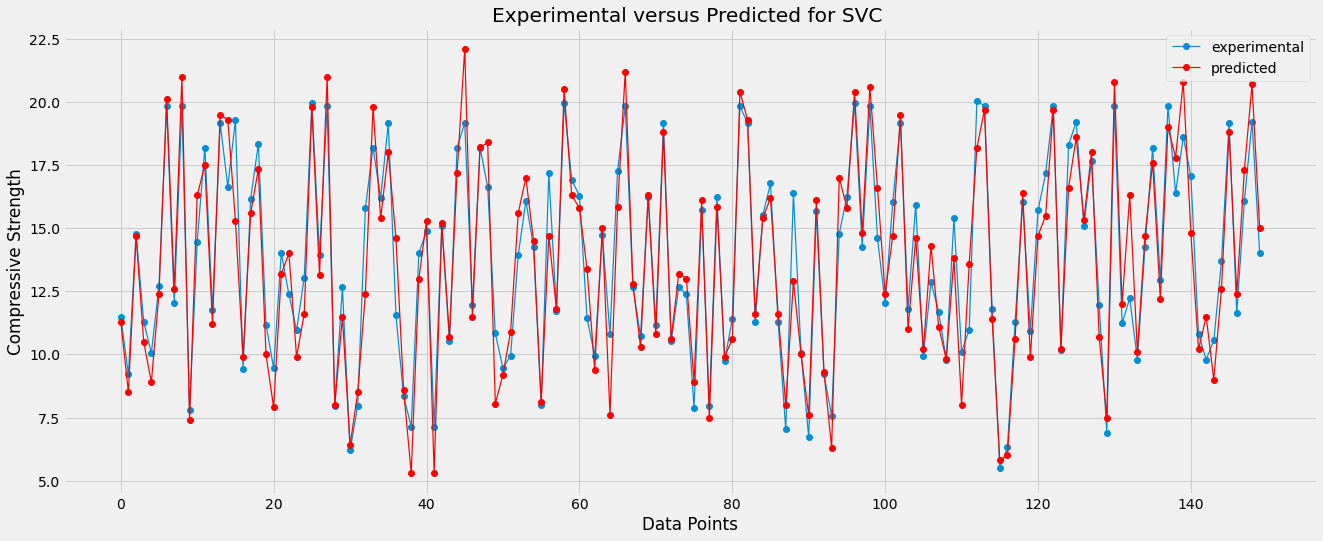

In [26]:
plt.figure(figsize=(20, 8))
plt.plot(np.arange(len(svr_model_pred)), svr_model_pred, marker='o', linewidth=1.2)
plt.plot(np.arange(len(y_test)), y_test, marker='o', linewidth=1.2, color='red')
plt.title('Experimental versus Predicted for SVC ')
plt.xlabel('Data Points')
plt.ylabel('Compressive Strength')
plt.legend(['experimental', 'predicted'])
plt.savefig('opc_gwp_cwp_svc_experimental_predicted.jpg');

In [27]:
# the residual between the actual value and the predicted value
svc_residual = svr_model_pred-y_test

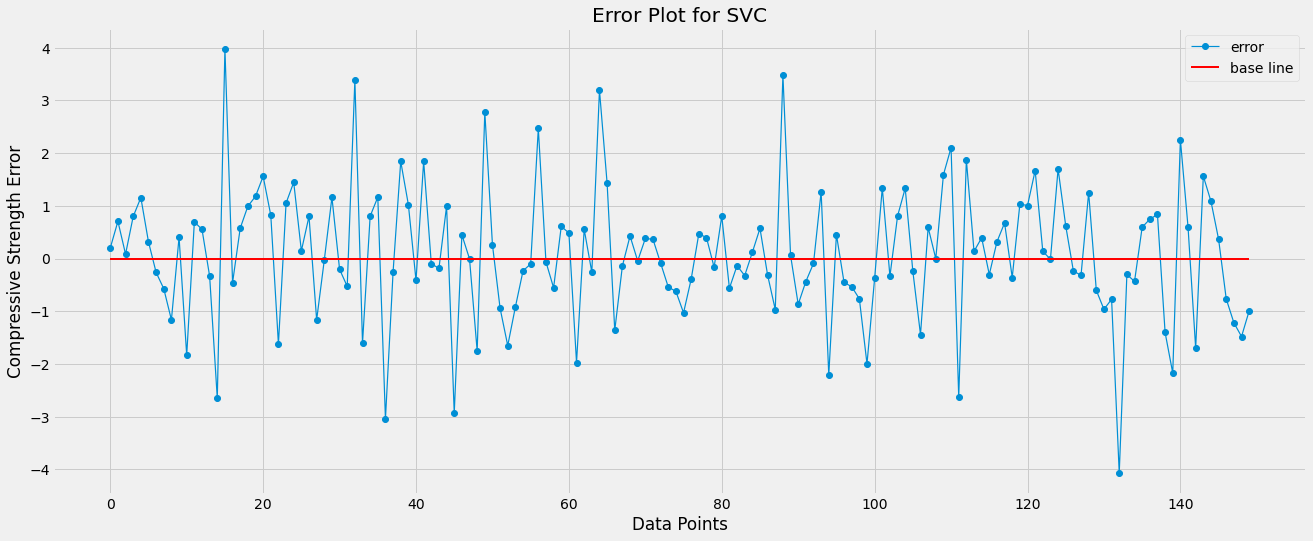

In [28]:
plt.figure(figsize=(20, 8))
plt.plot(np.arange(len(svc_residual)), svc_residual, marker='o', linewidth=1.2)
plt.plot(np.zeros(len(svc_residual)), color='red', linewidth=2)
plt.title('Error Plot for SVC')
plt.xlabel('Data Points')
plt.ylabel('Compressive Strength Error')
plt.legend(['error', 'base line'])
plt.savefig('opc_gwp_cwp_svc_error_analysis.jpg');

#### Encoding Technique

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
X = df_opc_gwp_cwp.drop('Compressive', axis=1)
y = df_opc_gwp_cwp['Compressive']

In [38]:
df_opc_gwp_cwp_encode = df_opc_gwp_cwp.copy()

In [39]:
for feature in X.columns:
    lbl_encoder = {}
    lbl_encoder[feature] = LabelEncoder()
    df_opc_gwp_cwp_encode[feature] = lbl_encoder[feature].fit_transform(df_opc_gwp_cwp_encode[feature])

In [40]:
df_opc_gwp_cwp_encode

OPC  GWP  CWP  Sand  CG  WC  Age  Compressive
0      6    0    0     0   0   0    0         17.2
1      6    0    0     0   0   0    0         18.1
2      6    0    0     0   0   0    0         19.8
3      5    0    0     0   0   1    0         13.2
4      4    0    0     0   0   1    0         12.6
..   ...  ...  ...   ...  ..  ..  ...          ...
493    0    1    3     0   0   2    3         11.8
494    0    1    3     0   0   2    3         11.6
495    0    2    1     0   0   2    3         13.8
496    0    2    1     0   0   2    3         13.6
497    0    4    1     0   0   2    3         10.1

[498 rows x 8 columns]

In [41]:
X_encoded = df_opc_gwp_cwp_encode.drop('Compressive', axis=1)
y_encoded = df_opc_gwp_cwp_encode['Compressive']

In [42]:
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, 
                                                                                    test_size=0.3, random_state=42)

In [43]:
X_train_encoded.drop(constant_columns, axis=1, inplace=True)
X_test_encoded.drop(constant_columns, axis=1, inplace=True)

###### Decision Tree

In [25]:
import optuna
def objective(trial):
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10, step=1)
    max_depth = trial.suggest_int('max_depth',3, 10, step=1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10, step=1)
    #max_leaf_nodes = trial.suggest_int('max_leaf_nodes', )
    max_features = trial.suggest_categorical('max_features', ["auto", "sqrt", "log2"])
    encoded_dtree = DecisionTreeRegressor(random_state=42, min_samples_split=min_samples_split, max_depth=max_depth, 
                                          min_samples_leaf=min_samples_leaf, max_features=max_features)
    encoded_dtree.fit(X_train_encoded, y_train_encoded)
    encoded_dtree_pred = encoded_dtree.predict(X_test_encoded)
    error = mean_squared_error(y_test, encoded_dtree_pred)
    return error
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5000)

[I 2023-01-11 11:16:06,519] A new study created in memory with name: no-name-c263a746-9f0e-43ac-9674-5b8e38bdce50
[I 2023-01-11 11:16:06,534] Trial 0 finished with value: 3.0509274880116184 and parameters: {'min_samples_split': 3, 'max_depth': 6, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 0 with value: 3.0509274880116184.
[I 2023-01-11 11:16:06,547] Trial 1 finished with value: 2.5827908894142473 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 1 with value: 2.5827908894142473.
[I 2023-01-11 11:16:06,560] Trial 2 finished with value: 3.022734958679312 and parameters: {'min_samples_split': 10, 'max_depth': 8, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 1 with value: 2.5827908894142473.
[I 2023-01-11 11:16:06,573] Trial 3 finished with value: 2.0792523374079375 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 7, 'max_features': 'auto'}. Best is trial 3 w

[I 2023-01-11 11:16:07,689] Trial 34 finished with value: 1.940483097993983 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:07,735] Trial 35 finished with value: 1.8459728217723277 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:07,770] Trial 36 finished with value: 3.0516072443891953 and parameters: {'min_samples_split': 6, 'max_depth': 6, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:07,812] Trial 37 finished with value: 2.6580403163496777 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 10, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:07,867] Trial 38 finished with value: 2.7976078516563665

[I 2023-01-11 11:16:09,412] Trial 68 finished with value: 2.1959289139021507 and parameters: {'min_samples_split': 6, 'max_depth': 9, 'min_samples_leaf': 5, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:09,454] Trial 69 finished with value: 1.864040505401391 and parameters: {'min_samples_split': 7, 'max_depth': 8, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:09,503] Trial 70 finished with value: 2.2017617116403674 and parameters: {'min_samples_split': 6, 'max_depth': 7, 'min_samples_leaf': 6, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:09,546] Trial 71 finished with value: 1.6223097891284 and parameters: {'min_samples_split': 5, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:09,593] Trial 72 finished with value: 1.7054071317209927 and

[I 2023-01-11 11:16:11,010] Trial 102 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:11,063] Trial 103 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:11,098] Trial 104 finished with value: 1.840488483999467 and parameters: {'min_samples_split': 7, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:11,137] Trial 105 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:11,173] Trial 106 finished with value: 1.60829328

[I 2023-01-11 11:16:12,255] Trial 136 finished with value: 1.6745355858513187 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:12,307] Trial 137 finished with value: 1.6255889700770012 and parameters: {'min_samples_split': 6, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:12,343] Trial 138 finished with value: 1.9169310765920595 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:12,380] Trial 139 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:12,417] Trial 140 finished with value: 1.65880351

[I 2023-01-11 11:16:13,824] Trial 170 finished with value: 3.0179870734489804 and parameters: {'min_samples_split': 6, 'max_depth': 5, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:13,862] Trial 171 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:13,899] Trial 172 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:13,943] Trial 173 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:14,001] Trial 174 finished with value: 1.60829328

[I 2023-01-11 11:16:15,350] Trial 204 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:15,392] Trial 205 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:15,441] Trial 206 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:15,479] Trial 207 finished with value: 2.552089967392219 and parameters: {'min_samples_split': 10, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:15,516] Trial 208 finished with value: 1.6082932

[I 2023-01-11 11:16:16,892] Trial 238 finished with value: 2.9928308000675514 and parameters: {'min_samples_split': 6, 'max_depth': 4, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:16,942] Trial 239 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:16,993] Trial 240 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:17,034] Trial 241 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:17,071] Trial 242 finished with value: 1.97643600

[I 2023-01-11 11:16:18,689] Trial 272 finished with value: 2.6718107511505376 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:18,757] Trial 273 finished with value: 2.6580403163496777 and parameters: {'min_samples_split': 7, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:18,807] Trial 274 finished with value: 1.6160993083849295 and parameters: {'min_samples_split': 6, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:18,868] Trial 275 finished with value: 1.9313932377636391 and parameters: {'min_samples_split': 5, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:18,932] Trial 276 finished with value: 1.91693107

[I 2023-01-11 11:16:20,877] Trial 306 finished with value: 1.9169310765920595 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:20,932] Trial 307 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:20,999] Trial 308 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:21,065] Trial 309 finished with value: 2.9822895403472796 and parameters: {'min_samples_split': 7, 'max_depth': 4, 'min_samples_leaf': 9, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:21,128] Trial 310 finished with value: 1.60829328

[I 2023-01-11 11:16:23,052] Trial 340 finished with value: 2.000511946815458 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 4, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:23,114] Trial 341 finished with value: 1.6281062204219663 and parameters: {'min_samples_split': 6, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:23,161] Trial 342 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:23,221] Trial 343 finished with value: 2.6718107511505376 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:23,283] Trial 344 finished with value: 1.916931076

[I 2023-01-11 11:16:24,957] Trial 374 finished with value: 1.9169310765920595 and parameters: {'min_samples_split': 5, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:24,999] Trial 375 finished with value: 1.6969639407266024 and parameters: {'min_samples_split': 8, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:25,044] Trial 376 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:25,087] Trial 377 finished with value: 2.7976078516563665 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 9, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:25,134] Trial 378 finished with value: 1.6255889

[I 2023-01-11 11:16:26,523] Trial 408 finished with value: 2.6718107511505376 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:26,571] Trial 409 finished with value: 1.6255889700770012 and parameters: {'min_samples_split': 6, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:26,636] Trial 410 finished with value: 1.6745355858513187 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:26,682] Trial 411 finished with value: 2.6718107511505376 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:26,725] Trial 412 finished with value: 1.60829328

[I 2023-01-11 11:16:28,461] Trial 442 finished with value: 1.6255889700770012 and parameters: {'min_samples_split': 6, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:28,507] Trial 443 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:28,557] Trial 444 finished with value: 1.6849814377031707 and parameters: {'min_samples_split': 7, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:28,602] Trial 445 finished with value: 1.6745355858513187 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:28,650] Trial 446 finished with value: 1.91693107

[I 2023-01-11 11:16:30,303] Trial 476 finished with value: 2.6580403163496777 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 10, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:30,359] Trial 477 finished with value: 2.417649880541416 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:30,408] Trial 478 finished with value: 2.6718107511505376 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:30,463] Trial 479 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:30,512] Trial 480 finished with value: 1.9169310

[I 2023-01-11 11:16:32,267] Trial 510 finished with value: 1.6588035125179852 and parameters: {'min_samples_split': 5, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:32,328] Trial 511 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:32,380] Trial 512 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:32,431] Trial 513 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:32,487] Trial 514 finished with value: 1.6082932

[I 2023-01-11 11:16:34,174] Trial 544 finished with value: 1.764387366345461 and parameters: {'min_samples_split': 9, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:34,241] Trial 545 finished with value: 1.6588035125179852 and parameters: {'min_samples_split': 5, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:34,296] Trial 546 finished with value: 2.607405336184551 and parameters: {'min_samples_split': 6, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:34,353] Trial 547 finished with value: 1.6849814377031707 and parameters: {'min_samples_split': 7, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:34,407] Trial 548 finished with value: 1.6690979708

[I 2023-01-11 11:16:36,252] Trial 578 finished with value: 1.7022771182251502 and parameters: {'min_samples_split': 7, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:36,309] Trial 579 finished with value: 1.9169310765920595 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:36,360] Trial 580 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:36,425] Trial 581 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:36,479] Trial 582 finished with value: 1.60829328

[I 2023-01-11 11:16:38,170] Trial 612 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:38,228] Trial 613 finished with value: 2.0792523374079375 and parameters: {'min_samples_split': 5, 'max_depth': 10, 'min_samples_leaf': 7, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:38,297] Trial 614 finished with value: 2.187202473707097 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 8, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:38,365] Trial 615 finished with value: 1.9169310765920595 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:38,426] Trial 616 finished with value: 1.60829328

[I 2023-01-11 11:16:40,331] Trial 646 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:40,391] Trial 647 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:40,466] Trial 648 finished with value: 1.6745355858513187 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:40,528] Trial 649 finished with value: 1.6588035125179852 and parameters: {'min_samples_split': 5, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:40,582] Trial 650 finished with value: 1.6082932

[I 2023-01-11 11:16:42,514] Trial 680 finished with value: 1.9169310765920595 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:42,647] Trial 681 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:42,743] Trial 682 finished with value: 1.6255889700770012 and parameters: {'min_samples_split': 6, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:42,827] Trial 683 finished with value: 1.6746955217772448 and parameters: {'min_samples_split': 5, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:42,908] Trial 684 finished with value: 1.60829328

[I 2023-01-11 11:16:45,033] Trial 714 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:45,092] Trial 715 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:45,150] Trial 716 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:45,210] Trial 717 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:45,275] Trial 718 finished with value: 1.9169310

[I 2023-01-11 11:16:47,277] Trial 748 finished with value: 2.417649880541416 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:47,348] Trial 749 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:47,415] Trial 750 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:47,475] Trial 751 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:47,538] Trial 752 finished with value: 1.60829328

[I 2023-01-11 11:16:49,859] Trial 782 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:49,944] Trial 783 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:50,038] Trial 784 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:50,106] Trial 785 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:50,169] Trial 786 finished with value: 1.9169310

[I 2023-01-11 11:16:52,431] Trial 816 finished with value: 2.5416161772005252 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:52,500] Trial 817 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:52,576] Trial 818 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:52,699] Trial 819 finished with value: 1.848976290440111 and parameters: {'min_samples_split': 10, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:52,768] Trial 820 finished with value: 1.6690979

[I 2023-01-11 11:16:55,170] Trial 850 finished with value: 1.6255889700770012 and parameters: {'min_samples_split': 6, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:55,281] Trial 851 finished with value: 1.6745355858513187 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:55,374] Trial 852 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:55,444] Trial 853 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:55,757] Trial 854 finished with value: 1.60829328

[I 2023-01-11 11:16:58,064] Trial 884 finished with value: 1.6255889700770012 and parameters: {'min_samples_split': 6, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:58,134] Trial 885 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:58,199] Trial 886 finished with value: 1.6745355858513187 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:58,275] Trial 887 finished with value: 1.6849814377031707 and parameters: {'min_samples_split': 7, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:16:58,347] Trial 888 finished with value: 1.60829328

[I 2023-01-11 11:17:01,167] Trial 918 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:01,271] Trial 919 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:01,385] Trial 920 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:01,479] Trial 921 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:01,550] Trial 922 finished with value: 1.6255889

[I 2023-01-11 11:17:04,133] Trial 952 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:04,207] Trial 953 finished with value: 1.6849814377031707 and parameters: {'min_samples_split': 7, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:04,278] Trial 954 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:04,352] Trial 955 finished with value: 1.6255889700770012 and parameters: {'min_samples_split': 6, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:04,431] Trial 956 finished with value: 3.87215839

[I 2023-01-11 11:17:07,034] Trial 986 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:07,144] Trial 987 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:07,231] Trial 988 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:07,316] Trial 989 finished with value: 2.7082283687050888 and parameters: {'min_samples_split': 7, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:07,399] Trial 990 finished with value: 1.6082932

[I 2023-01-11 11:17:10,036] Trial 1020 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:10,123] Trial 1021 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:10,207] Trial 1022 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:10,283] Trial 1023 finished with value: 1.6255889700770012 and parameters: {'min_samples_split': 6, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:10,379] Trial 1024 finished with value: 1.674

[I 2023-01-11 11:17:13,026] Trial 1054 finished with value: 1.6745355858513187 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:13,116] Trial 1055 finished with value: 2.6718107511505376 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:13,232] Trial 1056 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:13,370] Trial 1057 finished with value: 1.6588035125179852 and parameters: {'min_samples_split': 5, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:13,504] Trial 1058 finished with value: 2.19

[I 2023-01-11 11:17:17,777] Trial 1088 finished with value: 2.7976078516563665 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 9, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:17,917] Trial 1089 finished with value: 1.6745355858513187 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:18,032] Trial 1090 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:18,161] Trial 1091 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:18,284] Trial 1092 finished with value: 1.60

[I 2023-01-11 11:17:21,658] Trial 1122 finished with value: 1.9169310765920595 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:21,754] Trial 1123 finished with value: 1.6745355858513187 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:21,851] Trial 1124 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:21,952] Trial 1125 finished with value: 2.77600016387475 and parameters: {'min_samples_split': 5, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:22,031] Trial 1126 finished with value: 1.6255

[I 2023-01-11 11:17:25,118] Trial 1156 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:25,239] Trial 1157 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:25,360] Trial 1158 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:25,493] Trial 1159 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:25,593] Trial 1160 finished with value: 1.60

[I 2023-01-11 11:17:28,286] Trial 1190 finished with value: 1.8168180062167725 and parameters: {'min_samples_split': 6, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:28,371] Trial 1191 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:28,452] Trial 1192 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:28,536] Trial 1193 finished with value: 2.417649880541416 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:28,639] Trial 1194 finished with value: 1.6082

[I 2023-01-11 11:17:31,675] Trial 1224 finished with value: 1.840488483999467 and parameters: {'min_samples_split': 7, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:31,767] Trial 1225 finished with value: 2.9928308000675514 and parameters: {'min_samples_split': 6, 'max_depth': 4, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:31,862] Trial 1226 finished with value: 1.6588035125179852 and parameters: {'min_samples_split': 5, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:31,944] Trial 1227 finished with value: 1.6745355858513187 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:32,025] Trial 1228 finished with value: 1.6082

[I 2023-01-11 11:17:34,900] Trial 1258 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:35,007] Trial 1259 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:35,097] Trial 1260 finished with value: 2.9556320643887335 and parameters: {'min_samples_split': 4, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:35,195] Trial 1261 finished with value: 1.6881443693108553 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:35,285] Trial 1262 finished with value: 1.608

[I 2023-01-11 11:17:39,104] Trial 1292 finished with value: 1.6255889700770012 and parameters: {'min_samples_split': 6, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:39,217] Trial 1293 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:39,323] Trial 1294 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:39,426] Trial 1295 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:39,517] Trial 1296 finished with value: 1.608

[I 2023-01-11 11:17:42,424] Trial 1326 finished with value: 2.000511946815458 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 4, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:42,518] Trial 1327 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:42,604] Trial 1328 finished with value: 2.6718107511505376 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:42,688] Trial 1329 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:42,775] Trial 1330 finished with value: 1.784

[I 2023-01-11 11:17:45,722] Trial 1360 finished with value: 2.660891029101323 and parameters: {'min_samples_split': 6, 'max_depth': 5, 'min_samples_leaf': 5, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:45,808] Trial 1361 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:45,896] Trial 1362 finished with value: 1.6745355858513187 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:45,994] Trial 1363 finished with value: 1.7282167298186282 and parameters: {'min_samples_split': 9, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:46,081] Trial 1364 finished with value: 2.6718

[I 2023-01-11 11:17:49,248] Trial 1394 finished with value: 1.9169310765920595 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:49,376] Trial 1395 finished with value: 1.6745355858513187 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:49,503] Trial 1396 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:49,626] Trial 1397 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:49,741] Trial 1398 finished with value: 1.60

[I 2023-01-11 11:17:53,410] Trial 1428 finished with value: 1.6745355858513187 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:53,566] Trial 1429 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:53,726] Trial 1430 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:53,855] Trial 1431 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:54,019] Trial 1432 finished with value: 2.19

[I 2023-01-11 11:17:57,614] Trial 1462 finished with value: 1.6281062204219663 and parameters: {'min_samples_split': 6, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:57,714] Trial 1463 finished with value: 1.6745355858513187 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:57,817] Trial 1464 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:57,914] Trial 1465 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:17:58,007] Trial 1466 finished with value: 1.608

[I 2023-01-11 11:18:01,575] Trial 1496 finished with value: 1.8359568951056617 and parameters: {'min_samples_split': 7, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:01,676] Trial 1497 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:01,771] Trial 1498 finished with value: 2.417649880541416 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:01,867] Trial 1499 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:01,962] Trial 1500 finished with value: 1.6082

[I 2023-01-11 11:18:05,543] Trial 1530 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:05,645] Trial 1531 finished with value: 1.6849814377031707 and parameters: {'min_samples_split': 7, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:05,742] Trial 1532 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:05,857] Trial 1533 finished with value: 1.9169310765920595 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:05,959] Trial 1534 finished with value: 1.66

[I 2023-01-11 11:18:09,438] Trial 1564 finished with value: 2.1959289139021507 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 5, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:09,552] Trial 1565 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:09,668] Trial 1566 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:09,784] Trial 1567 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:09,897] Trial 1568 finished with value: 2.41

[I 2023-01-11 11:18:13,558] Trial 1598 finished with value: 1.9342267571140384 and parameters: {'min_samples_split': 6, 'max_depth': 9, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:13,662] Trial 1599 finished with value: 1.6849814377031707 and parameters: {'min_samples_split': 7, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:13,765] Trial 1600 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:13,883] Trial 1601 finished with value: 2.0792523374079375 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 7, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:13,989] Trial 1602 finished with value: 1.608

[I 2023-01-11 11:18:18,238] Trial 1632 finished with value: 1.6745355858513187 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:18,352] Trial 1633 finished with value: 2.185781254815955 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 6, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:18,472] Trial 1634 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:18,589] Trial 1635 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:18,698] Trial 1636 finished with value: 2.671

[I 2023-01-11 11:18:23,791] Trial 1666 finished with value: 1.6588035125179852 and parameters: {'min_samples_split': 5, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:23,988] Trial 1667 finished with value: 2.1959289139021507 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 5, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:24,201] Trial 1668 finished with value: 1.6849814377031707 and parameters: {'min_samples_split': 7, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:24,458] Trial 1669 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:24,691] Trial 1670 finished with value: 1.81

[I 2023-01-11 11:18:30,924] Trial 1700 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:31,082] Trial 1701 finished with value: 2.6718107511505376 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:31,273] Trial 1702 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:31,509] Trial 1703 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:31,662] Trial 1704 finished with value: 1.60

[I 2023-01-11 11:18:37,452] Trial 1734 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:37,584] Trial 1735 finished with value: 1.6281062204219663 and parameters: {'min_samples_split': 6, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:37,720] Trial 1736 finished with value: 1.6255889700770012 and parameters: {'min_samples_split': 6, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:37,846] Trial 1737 finished with value: 1.6849814377031707 and parameters: {'min_samples_split': 7, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:38,004] Trial 1738 finished with value: 1.9169

[I 2023-01-11 11:18:45,416] Trial 1768 finished with value: 1.6849814377031707 and parameters: {'min_samples_split': 7, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:45,702] Trial 1769 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:45,913] Trial 1770 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:46,040] Trial 1771 finished with value: 1.68291274859552 and parameters: {'min_samples_split': 5, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:46,300] Trial 1772 finished with value: 1.60829

[I 2023-01-11 11:18:51,180] Trial 1802 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:51,356] Trial 1803 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:51,672] Trial 1804 finished with value: 1.8168180062167725 and parameters: {'min_samples_split': 6, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:51,863] Trial 1805 finished with value: 2.0792523374079375 and parameters: {'min_samples_split': 5, 'max_depth': 10, 'min_samples_leaf': 7, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:52,063] Trial 1806 finished with value: 2.955

[I 2023-01-11 11:18:57,817] Trial 1836 finished with value: 1.6588035125179852 and parameters: {'min_samples_split': 5, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:58,264] Trial 1837 finished with value: 1.6745355858513187 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:58,587] Trial 1838 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:58,846] Trial 1839 finished with value: 1.7022771182251502 and parameters: {'min_samples_split': 7, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:18:59,122] Trial 1840 finished with value: 1.608

[I 2023-01-11 11:19:05,496] Trial 1870 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:05,633] Trial 1871 finished with value: 3.8721583955590724 and parameters: {'min_samples_split': 6, 'max_depth': 3, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:05,792] Trial 1872 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:05,933] Trial 1873 finished with value: 3.0532838421560133 and parameters: {'min_samples_split': 6, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:06,102] Trial 1874 finished with value: 1.6588

[I 2023-01-11 11:19:11,893] Trial 1904 finished with value: 2.000511946815458 and parameters: {'min_samples_split': 7, 'max_depth': 10, 'min_samples_leaf': 4, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:12,112] Trial 1905 finished with value: 1.6745355858513187 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:12,303] Trial 1906 finished with value: 1.6255889700770012 and parameters: {'min_samples_split': 6, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:12,500] Trial 1907 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:12,648] Trial 1908 finished with value: 2.1872

[I 2023-01-11 11:19:18,408] Trial 1938 finished with value: 2.6718107511505376 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:18,574] Trial 1939 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:18,891] Trial 1940 finished with value: 1.9313932377636391 and parameters: {'min_samples_split': 5, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:19,081] Trial 1941 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:19,288] Trial 1942 finished with value: 1.60

[I 2023-01-11 11:19:24,330] Trial 1972 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:24,466] Trial 1973 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:24,632] Trial 1974 finished with value: 1.995574890285488 and parameters: {'min_samples_split': 7, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:24,770] Trial 1975 finished with value: 1.9342267571140384 and parameters: {'min_samples_split': 6, 'max_depth': 9, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:24,910] Trial 1976 finished with value: 1.60829

[I 2023-01-11 11:19:29,805] Trial 2006 finished with value: 1.9169310765920595 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:29,970] Trial 2007 finished with value: 2.6718107511505376 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:30,111] Trial 2008 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:30,376] Trial 2009 finished with value: 1.6588035125179852 and parameters: {'min_samples_split': 5, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:30,518] Trial 2010 finished with value: 1.67

[I 2023-01-11 11:19:35,206] Trial 2040 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:35,368] Trial 2041 finished with value: 2.6580403163496777 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 10, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:35,507] Trial 2042 finished with value: 1.6849814377031707 and parameters: {'min_samples_split': 7, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:35,652] Trial 2043 finished with value: 1.9169310765920595 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:35,789] Trial 2044 finished with value: 1.6

[I 2023-01-11 11:19:40,683] Trial 2074 finished with value: 1.9169310765920595 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:40,827] Trial 2075 finished with value: 2.6718107511505376 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:40,973] Trial 2076 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:41,114] Trial 2077 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:41,271] Trial 2078 finished with value: 1.60

[I 2023-01-11 11:19:46,357] Trial 2108 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:46,502] Trial 2109 finished with value: 2.185781254815955 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 6, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:46,770] Trial 2110 finished with value: 1.7841129006661338 and parameters: {'min_samples_split': 7, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:46,915] Trial 2111 finished with value: 3.8721583955590724 and parameters: {'min_samples_split': 6, 'max_depth': 3, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:47,078] Trial 2112 finished with value: 1.6255

[I 2023-01-11 11:19:52,343] Trial 2142 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:52,499] Trial 2143 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:52,652] Trial 2144 finished with value: 2.000511946815458 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 4, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:52,798] Trial 2145 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:53,070] Trial 2146 finished with value: 1.608

[I 2023-01-11 11:19:58,503] Trial 2176 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:58,653] Trial 2177 finished with value: 1.9764360013965996 and parameters: {'min_samples_split': 6, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:58,822] Trial 2178 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:58,971] Trial 2179 finished with value: 1.9342267571140384 and parameters: {'min_samples_split': 6, 'max_depth': 9, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:19:59,119] Trial 2180 finished with value: 1.6588

[I 2023-01-11 11:20:04,957] Trial 2210 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:05,217] Trial 2211 finished with value: 1.6849814377031707 and parameters: {'min_samples_split': 7, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:05,623] Trial 2212 finished with value: 1.8168180062167725 and parameters: {'min_samples_split': 6, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:05,821] Trial 2213 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:06,042] Trial 2214 finished with value: 1.608

[I 2023-01-11 11:20:11,810] Trial 2244 finished with value: 2.6718107511505376 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:11,963] Trial 2245 finished with value: 1.6745355858513187 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:12,113] Trial 2246 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:12,272] Trial 2247 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:12,584] Trial 2248 finished with value: 1.60

[I 2023-01-11 11:20:18,142] Trial 2278 finished with value: 1.9169310765920595 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:18,303] Trial 2279 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:18,455] Trial 2280 finished with value: 1.6745355858513187 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:18,610] Trial 2281 finished with value: 1.6588035125179852 and parameters: {'min_samples_split': 5, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:18,768] Trial 2282 finished with value: 1.60

[I 2023-01-11 11:20:24,422] Trial 2312 finished with value: 3.8721583955590724 and parameters: {'min_samples_split': 6, 'max_depth': 3, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:24,702] Trial 2313 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:24,861] Trial 2314 finished with value: 1.6745355858513187 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:25,019] Trial 2315 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:25,180] Trial 2316 finished with value: 2.671

[I 2023-01-11 11:20:30,754] Trial 2346 finished with value: 2.7976078516563665 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 9, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:30,915] Trial 2347 finished with value: 1.6255889700770012 and parameters: {'min_samples_split': 6, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:31,088] Trial 2348 finished with value: 1.6588035125179852 and parameters: {'min_samples_split': 5, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:31,249] Trial 2349 finished with value: 1.6849814377031707 and parameters: {'min_samples_split': 7, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:31,550] Trial 2350 finished with value: 1.916

[I 2023-01-11 11:20:37,737] Trial 2380 finished with value: 2.6718107511505376 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:37,903] Trial 2381 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:38,066] Trial 2382 finished with value: 1.6281062204219663 and parameters: {'min_samples_split': 6, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:38,255] Trial 2383 finished with value: 1.9169310765920595 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:38,421] Trial 2384 finished with value: 1.658

[I 2023-01-11 11:20:44,781] Trial 2414 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:44,931] Trial 2415 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:45,234] Trial 2416 finished with value: 2.0792523374079375 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 7, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:45,444] Trial 2417 finished with value: 1.6849814377031707 and parameters: {'min_samples_split': 7, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:45,591] Trial 2418 finished with value: 1.69

[I 2023-01-11 11:20:51,025] Trial 2448 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:51,182] Trial 2449 finished with value: 1.8168180062167725 and parameters: {'min_samples_split': 6, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:51,357] Trial 2450 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:51,629] Trial 2451 finished with value: 1.8831483622466112 and parameters: {'min_samples_split': 10, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:51,780] Trial 2452 finished with value: 1.78

[I 2023-01-11 11:20:58,213] Trial 2482 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:58,426] Trial 2483 finished with value: 1.9169310765920595 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:58,750] Trial 2484 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:58,921] Trial 2485 finished with value: 1.6849814377031707 and parameters: {'min_samples_split': 7, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:20:59,083] Trial 2486 finished with value: 2.67

[I 2023-01-11 11:21:05,712] Trial 2516 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:21:06,042] Trial 2517 finished with value: 1.9169310765920595 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:21:06,220] Trial 2518 finished with value: 1.6082932895550226 and parameters: {'min_samples_split': 6, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:21:06,383] Trial 2519 finished with value: 1.669097970851319 and parameters: {'min_samples_split': 3, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:21:06,538] Trial 2520 finished with value: 1.608

[I 2023-01-11 11:21:12,613] Trial 2550 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:21:12,970] Trial 2551 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:21:13,146] Trial 2552 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:21:13,417] Trial 2553 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:21:13,692] Trial 2554 finished with value: 1.603561

[I 2023-01-11 11:21:23,516] Trial 2584 finished with value: 4.371518981750876 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:21:23,768] Trial 2585 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:21:24,145] Trial 2586 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:21:24,353] Trial 2587 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:21:24,508] Trial 2588 finished with value: 1.6035610

[I 2023-01-11 11:21:31,550] Trial 2618 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:21:31,765] Trial 2619 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:21:32,071] Trial 2620 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:21:32,251] Trial 2621 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:21:32,442] Trial 2622 finished with value: 1.603561

[I 2023-01-11 11:21:39,026] Trial 2652 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:21:39,254] Trial 2653 finished with value: 4.371518981750876 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:21:39,467] Trial 2654 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:21:39,766] Trial 2655 finished with value: 4.371518981750876 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:21:39,944] Trial 2656 finished with value: 1.60356100

[I 2023-01-11 11:21:46,594] Trial 2686 finished with value: 1.7898707906071516 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:21:46,775] Trial 2687 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:21:46,963] Trial 2688 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:21:47,311] Trial 2689 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:21:47,483] Trial 2690 finished with value: 1.603561

[I 2023-01-11 11:21:54,240] Trial 2720 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:21:54,457] Trial 2721 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:21:54,676] Trial 2722 finished with value: 4.371518981750876 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:21:55,051] Trial 2723 finished with value: 1.7898707906071516 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:21:55,254] Trial 2724 finished with value: 1.6035610

[I 2023-01-11 11:22:03,426] Trial 2754 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:22:03,870] Trial 2755 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:22:04,159] Trial 2756 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:22:04,421] Trial 2757 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:22:04,646] Trial 2758 finished with value: 1.603561

[I 2023-01-11 11:22:12,203] Trial 2788 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:22:12,424] Trial 2789 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:22:12,624] Trial 2790 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:22:12,954] Trial 2791 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:22:13,157] Trial 2792 finished with value: 1.603561

[I 2023-01-11 11:22:20,419] Trial 2822 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:22:20,607] Trial 2823 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:22:20,951] Trial 2824 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:22:21,169] Trial 2825 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:22:21,372] Trial 2826 finished with value: 4.371518

[I 2023-01-11 11:22:28,530] Trial 2856 finished with value: 1.7193274776764054 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:22:28,717] Trial 2857 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:22:28,921] Trial 2858 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:22:29,139] Trial 2859 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:22:29,358] Trial 2860 finished with value: 1.603561

[I 2023-01-11 11:22:36,876] Trial 2890 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:22:37,110] Trial 2891 finished with value: 2.87508171550529 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:22:37,298] Trial 2892 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:22:37,673] Trial 2893 finished with value: 1.7193274776764054 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:22:37,891] Trial 2894 finished with value: 1.60356100

[I 2023-01-11 11:22:45,657] Trial 2924 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:22:45,876] Trial 2925 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:22:46,251] Trial 2926 finished with value: 1.7898707906071516 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:22:46,469] Trial 2927 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:22:46,672] Trial 2928 finished with value: 1.603561

[I 2023-01-11 11:22:54,063] Trial 2958 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:22:54,391] Trial 2959 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:22:54,594] Trial 2960 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:22:54,813] Trial 2961 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:22:55,032] Trial 2962 finished with value: 1.603561

[I 2023-01-11 11:23:02,813] Trial 2992 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:23:03,078] Trial 2993 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:23:03,375] Trial 2994 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:23:03,563] Trial 2995 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:23:03,891] Trial 2996 finished with value: 1.789870

[I 2023-01-11 11:23:11,863] Trial 3026 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:23:12,075] Trial 3027 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:23:12,328] Trial 3028 finished with value: 4.371518981750876 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:23:12,635] Trial 3029 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:23:13,086] Trial 3030 finished with value: 1.6035610

[I 2023-01-11 11:23:23,272] Trial 3060 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:23:23,553] Trial 3061 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:23:23,872] Trial 3062 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:23:24,237] Trial 3063 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:23:24,565] Trial 3064 finished with value: 1.603561

[I 2023-01-11 11:23:32,469] Trial 3094 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:23:32,822] Trial 3095 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:23:33,088] Trial 3096 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:23:33,338] Trial 3097 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:23:33,541] Trial 3098 finished with value: 1.719327

[I 2023-01-11 11:23:41,541] Trial 3128 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:23:41,759] Trial 3129 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:23:41,978] Trial 3130 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:23:42,369] Trial 3131 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:23:42,619] Trial 3132 finished with value: 4.371518

[I 2023-01-11 11:23:50,896] Trial 3162 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:23:51,162] Trial 3163 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:23:51,404] Trial 3164 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:23:51,650] Trial 3165 finished with value: 1.7898707906071516 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:23:52,026] Trial 3166 finished with value: 1.603561

[I 2023-01-11 11:24:00,384] Trial 3196 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:24:00,650] Trial 3197 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:24:00,900] Trial 3198 finished with value: 2.87508171550529 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:24:01,322] Trial 3199 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:24:01,544] Trial 3200 finished with value: 1.60356100

[I 2023-01-11 11:24:09,892] Trial 3230 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:24:10,126] Trial 3231 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:24:10,376] Trial 3232 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:24:10,767] Trial 3233 finished with value: 1.7349462276764052 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:24:10,986] Trial 3234 finished with value: 1.603561

[I 2023-01-11 11:24:19,360] Trial 3264 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:24:19,751] Trial 3265 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:24:19,985] Trial 3266 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:24:20,235] Trial 3267 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:24:20,678] Trial 3268 finished with value: 1.603561

[I 2023-01-11 11:24:29,349] Trial 3298 finished with value: 1.7193274776764054 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:24:29,583] Trial 3299 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:24:29,802] Trial 3300 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:24:30,177] Trial 3301 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:24:30,458] Trial 3302 finished with value: 1.603561

[I 2023-01-11 11:24:39,020] Trial 3332 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:24:39,255] Trial 3333 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:24:39,630] Trial 3334 finished with value: 4.371518981750876 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:24:39,895] Trial 3335 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:24:40,145] Trial 3336 finished with value: 1.6035610

[I 2023-01-11 11:24:48,708] Trial 3366 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:24:49,051] Trial 3367 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:24:49,349] Trial 3368 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:24:49,615] Trial 3369 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:24:49,990] Trial 3370 finished with value: 1.603561

[I 2023-01-11 11:24:58,870] Trial 3400 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:24:59,198] Trial 3401 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:24:59,463] Trial 3402 finished with value: 2.6580403163496777 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 10, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:24:59,823] Trial 3403 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:25:00,073] Trial 3404 finished with value: 1.60356

[I 2023-01-11 11:25:08,838] Trial 3434 finished with value: 2.0792523374079375 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 7, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:25:09,057] Trial 3435 finished with value: 1.7898707906071516 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:25:09,421] Trial 3436 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:25:09,671] Trial 3437 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:25:09,937] Trial 3438 finished with value: 1.603561

[I 2023-01-11 11:25:19,849] Trial 3468 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:25:20,255] Trial 3469 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:25:20,474] Trial 3470 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:25:20,708] Trial 3471 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:25:21,099] Trial 3472 finished with value: 1.789870

[I 2023-01-11 11:25:30,333] Trial 3502 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:25:30,600] Trial 3503 finished with value: 2.185781254815955 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 6, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:25:31,031] Trial 3504 finished with value: 1.6504481054219662 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:25:31,298] Trial 3505 finished with value: 4.371518981750876 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:25:31,665] Trial 3506 finished with value: 1.60356100

[I 2023-01-11 11:25:40,754] Trial 3536 finished with value: 1.6298522720886326 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:25:41,113] Trial 3537 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:25:41,394] Trial 3538 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:25:41,769] Trial 3539 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:25:42,019] Trial 3540 finished with value: 1.603561

[I 2023-01-11 11:25:50,919] Trial 3570 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:25:51,138] Trial 3571 finished with value: 1.7193274776764054 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:25:51,482] Trial 3572 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:25:51,701] Trial 3573 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:25:51,904] Trial 3574 finished with value: 4.371518

[I 2023-01-11 11:26:00,038] Trial 3604 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:26:00,406] Trial 3605 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:26:00,652] Trial 3606 finished with value: 1.7349462276764052 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:26:00,885] Trial 3607 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:26:01,276] Trial 3608 finished with value: 1.603561

[I 2023-01-11 11:26:09,447] Trial 3638 finished with value: 4.371518981750876 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:26:09,681] Trial 3639 finished with value: 2.6214853832480016 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:26:09,901] Trial 3640 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:26:10,279] Trial 3641 finished with value: 1.7898707906071516 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:26:10,510] Trial 3642 finished with value: 1.6035610

[I 2023-01-11 11:26:20,521] Trial 3672 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:26:20,742] Trial 3673 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:26:21,094] Trial 3674 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:26:21,359] Trial 3675 finished with value: 1.7898707906071516 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:26:21,577] Trial 3676 finished with value: 1.603561

[I 2023-01-11 11:26:30,854] Trial 3706 finished with value: 1.7898707906071516 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:26:31,216] Trial 3707 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:26:31,445] Trial 3708 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:26:31,686] Trial 3709 finished with value: 2.185781254815955 and parameters: {'min_samples_split': 5, 'max_depth': 9, 'min_samples_leaf': 6, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:26:32,060] Trial 3710 finished with value: 1.6035610

[I 2023-01-11 11:26:41,498] Trial 3740 finished with value: 1.7193274776764054 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:26:41,949] Trial 3741 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:26:42,296] Trial 3742 finished with value: 1.7898707906071516 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:26:42,791] Trial 3743 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:26:43,123] Trial 3744 finished with value: 1.603561

[I 2023-01-11 11:26:52,920] Trial 3774 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:26:53,193] Trial 3775 finished with value: 1.7193274776764054 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:26:53,459] Trial 3776 finished with value: 1.6223097891284 and parameters: {'min_samples_split': 5, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:26:53,859] Trial 3777 finished with value: 1.7898707906071516 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:26:54,143] Trial 3778 finished with value: 1.603561003

[I 2023-01-11 11:27:03,551] Trial 3808 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:27:03,781] Trial 3809 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:27:04,174] Trial 3810 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:27:04,431] Trial 3811 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:27:04,815] Trial 3812 finished with value: 1.603561

[I 2023-01-11 11:27:14,320] Trial 3842 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:27:14,756] Trial 3843 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:27:15,102] Trial 3844 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:27:15,482] Trial 3845 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:27:16,120] Trial 3846 finished with value: 1.603561

[I 2023-01-11 11:27:26,262] Trial 3876 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:27:26,560] Trial 3877 finished with value: 2.524390395223818 and parameters: {'min_samples_split': 5, 'max_depth': 5, 'min_samples_leaf': 8, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:27:26,824] Trial 3878 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:27:27,233] Trial 3879 finished with value: 4.371518981750876 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:27:27,478] Trial 3880 finished with value: 1.60356100

[I 2023-01-11 11:27:36,847] Trial 3910 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:27:37,088] Trial 3911 finished with value: 1.7898707906071516 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:27:37,484] Trial 3912 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:27:37,721] Trial 3913 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:27:37,960] Trial 3914 finished with value: 1.603561

[I 2023-01-11 11:27:47,424] Trial 3944 finished with value: 1.7898707906071516 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:27:47,813] Trial 3945 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:27:48,062] Trial 3946 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:27:48,311] Trial 3947 finished with value: 4.371518981750876 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:27:48,689] Trial 3948 finished with value: 1.6035610

[I 2023-01-11 11:27:58,223] Trial 3978 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:27:58,626] Trial 3979 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:27:58,876] Trial 3980 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:27:59,263] Trial 3981 finished with value: 1.7898707906071516 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:27:59,541] Trial 3982 finished with value: 1.603561

[I 2023-01-11 11:28:08,838] Trial 4012 finished with value: 4.371518981750876 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:28:09,088] Trial 4013 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:28:09,447] Trial 4014 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:28:09,666] Trial 4015 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:28:09,900] Trial 4016 finished with value: 1.6035610

[I 2023-01-11 11:28:18,573] Trial 4046 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:28:18,808] Trial 4047 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:28:19,152] Trial 4048 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:28:19,402] Trial 4049 finished with value: 1.6223097891284 and parameters: {'min_samples_split': 5, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:28:19,761] Trial 4050 finished with value: 3.078594636

[I 2023-01-11 11:28:28,401] Trial 4080 finished with value: 1.6223097891284 and parameters: {'min_samples_split': 5, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:28:28,776] Trial 4081 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:28:29,011] Trial 4082 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:28:29,370] Trial 4083 finished with value: 1.6298522720886326 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:28:29,589] Trial 4084 finished with value: 1.719327477

[I 2023-01-11 11:28:38,401] Trial 4114 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:28:38,636] Trial 4115 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:28:38,870] Trial 4116 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:28:39,229] Trial 4117 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:28:39,479] Trial 4118 finished with value: 2.875081

[I 2023-01-11 11:28:48,276] Trial 4148 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:28:48,510] Trial 4149 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:28:48,885] Trial 4150 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:28:49,120] Trial 4151 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:28:49,479] Trial 4152 finished with value: 1.603561

[I 2023-01-11 11:28:58,976] Trial 4182 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:28:59,382] Trial 4183 finished with value: 2.6214853832480016 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:28:59,617] Trial 4184 finished with value: 4.371518981750876 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:28:59,976] Trial 4185 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:29:00,226] Trial 4186 finished with value: 2.4759753

[I 2023-01-11 11:29:09,838] Trial 4216 finished with value: 2.185781254815955 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 6, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:29:10,079] Trial 4217 finished with value: 2.0792523374079375 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 7, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:29:10,454] Trial 4218 finished with value: 2.187202473707097 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 8, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:29:10,694] Trial 4219 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:29:10,938] Trial 4220 finished with value: 1.60356100

[I 2023-01-11 11:29:21,630] Trial 4250 finished with value: 4.371518981750876 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:29:21,882] Trial 4251 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:29:22,379] Trial 4252 finished with value: 1.7898707906071516 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:29:22,638] Trial 4253 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:29:23,109] Trial 4254 finished with value: 2.0792523

[I 2023-01-11 11:29:33,330] Trial 4284 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:29:33,728] Trial 4285 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:29:33,981] Trial 4286 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:29:34,378] Trial 4287 finished with value: 1.7898707906071516 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:29:34,638] Trial 4288 finished with value: 2.195928

[I 2023-01-11 11:29:44,475] Trial 4318 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:29:44,729] Trial 4319 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:29:45,121] Trial 4320 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:29:45,412] Trial 4321 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:29:45,813] Trial 4322 finished with value: 1.603561

[I 2023-01-11 11:29:55,410] Trial 4352 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:29:55,824] Trial 4353 finished with value: 1.7898707906071516 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:29:56,129] Trial 4354 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:29:56,422] Trial 4355 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:29:56,899] Trial 4356 finished with value: 1.603561

[I 2023-01-11 11:30:08,698] Trial 4386 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:30:09,074] Trial 4387 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:30:09,348] Trial 4388 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:30:09,738] Trial 4389 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:30:10,004] Trial 4390 finished with value: 1.603561

[I 2023-01-11 11:30:20,403] Trial 4420 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:30:20,653] Trial 4421 finished with value: 4.371518981750876 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:30:21,028] Trial 4422 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:30:21,310] Trial 4423 finished with value: 2.6580403163496777 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 10, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:30:21,685] Trial 4424 finished with value: 1.603561

[I 2023-01-11 11:30:31,615] Trial 4454 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:30:32,149] Trial 4455 finished with value: 1.6223097891284 and parameters: {'min_samples_split': 5, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:30:32,522] Trial 4456 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:30:32,951] Trial 4457 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:30:33,211] Trial 4458 finished with value: 1.789870790

[I 2023-01-11 11:30:44,438] Trial 4488 finished with value: 1.7193274776764054 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:30:44,698] Trial 4489 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:30:45,096] Trial 4490 finished with value: 1.6223097891284 and parameters: {'min_samples_split': 5, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:30:45,362] Trial 4491 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:30:45,753] Trial 4492 finished with value: 4.371518981

[I 2023-01-11 11:30:56,559] Trial 4522 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:30:56,964] Trial 4523 finished with value: 1.6223097891284 and parameters: {'min_samples_split': 5, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:30:57,255] Trial 4524 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:30:57,678] Trial 4525 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:30:57,953] Trial 4526 finished with value: 1.603561003

[I 2023-01-11 11:31:08,757] Trial 4556 finished with value: 2.0901477222420977 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:31:09,162] Trial 4557 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:31:09,430] Trial 4558 finished with value: 1.6223097891284 and parameters: {'min_samples_split': 5, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:31:09,835] Trial 4559 finished with value: 2.0792523374079375 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 7, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:31:10,137] Trial 4560 finished with value: 1.603561003

[I 2023-01-11 11:31:25,987] Trial 4590 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:31:26,311] Trial 4591 finished with value: 1.7898707906071516 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:31:26,757] Trial 4592 finished with value: 2.6580403163496777 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 10, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:31:27,043] Trial 4593 finished with value: 2.7976078516563665 and parameters: {'min_samples_split': 5, 'max_depth': 9, 'min_samples_leaf': 9, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:31:27,479] Trial 4594 finished with value: 1.60356

[I 2023-01-11 11:31:39,202] Trial 4624 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:31:39,608] Trial 4625 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:31:39,873] Trial 4626 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:31:40,279] Trial 4627 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:31:40,551] Trial 4628 finished with value: 1.719327

[I 2023-01-11 11:31:52,236] Trial 4658 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:31:52,610] Trial 4659 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:31:53,144] Trial 4660 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:31:53,497] Trial 4661 finished with value: 4.371518981750876 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:31:53,984] Trial 4662 finished with value: 1.6035610

[I 2023-01-11 11:32:07,043] Trial 4692 finished with value: 1.7898707906071516 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:32:07,524] Trial 4693 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:32:07,830] Trial 4694 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:32:08,299] Trial 4695 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:32:08,642] Trial 4696 finished with value: 1.603561

[I 2023-01-11 11:32:21,044] Trial 4726 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:32:21,399] Trial 4727 finished with value: 2.0901477222420977 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:32:21,866] Trial 4728 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:32:22,183] Trial 4729 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:32:22,645] Trial 4730 finished with value: 1.789870

[I 2023-01-11 11:32:34,934] Trial 4760 finished with value: 2.019876864510931 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 4, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:32:35,385] Trial 4761 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:32:35,711] Trial 4762 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:32:36,178] Trial 4763 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:32:36,489] Trial 4764 finished with value: 1.7898707

[I 2023-01-11 11:32:49,714] Trial 4794 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:32:50,047] Trial 4795 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:32:50,522] Trial 4796 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:32:51,037] Trial 4797 finished with value: 2.87508171550529 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:32:51,503] Trial 4798 finished with value: 1.60356100

[I 2023-01-11 11:33:03,884] Trial 4828 finished with value: 1.7193274776764054 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:33:04,199] Trial 4829 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:33:04,669] Trial 4830 finished with value: 1.6298522720886326 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:33:04,983] Trial 4831 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:33:05,450] Trial 4832 finished with value: 1.603561

[I 2023-01-11 11:33:20,710] Trial 4862 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:33:21,366] Trial 4863 finished with value: 1.6223097891284 and parameters: {'min_samples_split': 5, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:33:21,874] Trial 4864 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:33:22,542] Trial 4865 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:33:23,053] Trial 4866 finished with value: 1.603561003

[I 2023-01-11 11:33:34,750] Trial 4896 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:33:35,198] Trial 4897 finished with value: 1.7349462276764052 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:33:35,490] Trial 4898 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:33:35,912] Trial 4899 finished with value: 4.371518981750876 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:33:36,234] Trial 4900 finished with value: 1.6035610

[I 2023-01-11 11:33:50,515] Trial 4930 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:33:50,794] Trial 4931 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:33:51,243] Trial 4932 finished with value: 1.7193274776764054 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:33:51,548] Trial 4933 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:33:51,958] Trial 4934 finished with value: 1.789870

[I 2023-01-11 11:34:03,303] Trial 4964 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:34:03,728] Trial 4965 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:34:04,068] Trial 4966 finished with value: 2.87508171550529 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:34:04,518] Trial 4967 finished with value: 1.7193274776764054 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:34:04,838] Trial 4968 finished with value: 1.69956031

[I 2023-01-11 11:34:18,681] Trial 4998 finished with value: 1.6035610035701147 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.
[I 2023-01-11 11:34:19,122] Trial 4999 finished with value: 2.1959289139021507 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 5, 'max_features': 'auto'}. Best is trial 33 with value: 1.6035610035701147.


In [26]:
encoded_dtree = DecisionTreeRegressor(min_samples_split= 5, max_depth = 8, min_samples_leaf = 1, max_features = 'auto',
                             random_state=42)
encoded_dtree.fit(X_train_encoded, y_train_encoded)

DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_split=5,
                      random_state=42)

In [27]:
encoded_dtree_pred = encoded_dtree.predict(X_test_encoded)
accuracy = r2_score(y_test_encoded, encoded_dtree_pred)
MSE = mean_squared_error(y_test_encoded, encoded_dtree_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test_encoded, encoded_dtree_pred)
print('R^2 score: {}%'.format(np.round(accuracy*100, 2)))
print('MSE: {}'.format(np.round(MSE, 2)))
print('RMSE: {}'.format(np.round(RMSE, 2)))
print('MAE: {}'.format(np.round(MAE)))
print('Test score {}%'.format(np.round(encoded_dtree.score(X_test_encoded, y_test_encoded)*100, 2)))
print('Train score {}%'.format(np.round(encoded_dtree.score(X_train_encoded, y_train_encoded)*100, 2)))

R^2 score: 90.75%
MSE: 1.6
RMSE: 1.27
MAE: 1.0
Test score 90.75%
Train score 95.15%


###### SVR

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled_encoded = scaler.fit_transform(X_train_encoded)
X_test_scaled_encoded = scaler.fit_transform(X_test_encoded)

In [29]:
import optuna
def objective(trial):
    epsilon = trial.suggest_float('epsilon', 0.1, 10, step=0.1)
    C = trial.suggest_int('C',1, 201, step=2)
    degree = trial.suggest_int('degree', 1, 20, step=1)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    gamma = trial.suggest_categorical('gamma', ['auto', 'scale'])
    encoded_svr_model = SVR(kernel=kernel, degree=degree, gamma=gamma, C=C, epsilon=epsilon)
    encoded_svr_model.fit(X_train_scaled_encoded, y_train_encoded)
    encoded_svr_pred = encoded_svr_model.predict(X_test_scaled_encoded)
    error = mean_squared_error(y_test_encoded, encoded_svr_pred)
    return error
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5000)

[I 2023-01-11 11:37:32,873] A new study created in memory with name: no-name-c31c3b0f-8167-41ad-9942-48e51724a8fe
[I 2023-01-11 11:37:32,934] Trial 0 finished with value: 421786.4281657961 and parameters: {'epsilon': 6.3, 'C': 115, 'degree': 14, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 0 with value: 421786.4281657961.
[I 2023-01-11 11:37:32,941] Trial 1 finished with value: 16.164737148468983 and parameters: {'epsilon': 9.4, 'C': 31, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 1 with value: 16.164737148468983.
[I 2023-01-11 11:37:32,966] Trial 2 finished with value: 3.3491379444246214 and parameters: {'epsilon': 0.9, 'C': 3, 'degree': 18, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 2 with value: 3.3491379444246214.
[I 2023-01-11 11:37:32,996] Trial 3 finished with value: 1285113.4979122286 and parameters: {'epsilon': 4.1, 'C': 199, 'degree': 8, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 2 with value: 3.3491379444246214.
[I 2023-01-11

[I 2023-01-11 11:37:35,825] Trial 35 finished with value: 2.5896811060403504 and parameters: {'epsilon': 2.1, 'C': 163, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 11 with value: 1.5857762861285656.
[I 2023-01-11 11:37:36,143] Trial 36 finished with value: 3.392102817999388 and parameters: {'epsilon': 0.8, 'C': 187, 'degree': 9, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 11 with value: 1.5857762861285656.
[I 2023-01-11 11:37:36,197] Trial 37 finished with value: 1.948047913469032 and parameters: {'epsilon': 1.4000000000000001, 'C': 141, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 11 with value: 1.5857762861285656.
[I 2023-01-11 11:37:36,277] Trial 38 finished with value: 627.8081061807737 and parameters: {'epsilon': 2.4000000000000004, 'C': 119, 'degree': 11, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 11 with value: 1.5857762861285656.
[I 2023-01-11 11:37:36,327] Trial 39 finished with value: 35.15908229989106 and parameters: {'epsi

[I 2023-01-11 11:37:39,615] Trial 70 finished with value: 13.795176499358131 and parameters: {'epsilon': 9.0, 'C': 153, 'degree': 15, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 62 with value: 1.5279453010537878.
[I 2023-01-11 11:37:39,770] Trial 71 finished with value: 1.6740277636082992 and parameters: {'epsilon': 0.8, 'C': 159, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 62 with value: 1.5279453010537878.
[I 2023-01-11 11:37:39,954] Trial 72 finished with value: 1.575639628777799 and parameters: {'epsilon': 0.4, 'C': 157, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 62 with value: 1.5279453010537878.
[I 2023-01-11 11:37:40,134] Trial 73 finished with value: 1.5254982718390735 and parameters: {'epsilon': 0.5, 'C': 185, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 73 with value: 1.5254982718390735.
[I 2023-01-11 11:37:40,227] Trial 74 finished with value: 1.6888866885148892 and parameters: {'epsilon': 0.9, 'C': 185, '

[I 2023-01-11 11:37:43,679] Trial 105 finished with value: 1.5471062679554504 and parameters: {'epsilon': 0.6, 'C': 183, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 73 with value: 1.5254982718390735.
[I 2023-01-11 11:37:43,740] Trial 106 finished with value: 2.175393464026617 and parameters: {'epsilon': 1.7000000000000002, 'C': 189, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 73 with value: 1.5254982718390735.
[I 2023-01-11 11:37:43,829] Trial 107 finished with value: 1.5471062679554504 and parameters: {'epsilon': 0.6, 'C': 183, 'degree': 18, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 73 with value: 1.5254982718390735.
[I 2023-01-11 11:37:43,992] Trial 108 finished with value: 3.3589969222920484 and parameters: {'epsilon': 1.4000000000000001, 'C': 183, 'degree': 20, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 73 with value: 1.5254982718390735.
[I 2023-01-11 11:37:44,144] Trial 109 finished with value: 9407421.891095033 and paramet

[I 2023-01-11 11:37:48,440] Trial 140 finished with value: 1.611479843642821 and parameters: {'epsilon': 0.8, 'C': 195, 'degree': 17, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:37:48,566] Trial 141 finished with value: 1.5243728617054244 and parameters: {'epsilon': 0.5, 'C': 187, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:37:48,710] Trial 142 finished with value: 1.5243728617054244 and parameters: {'epsilon': 0.5, 'C': 187, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:37:48,893] Trial 143 finished with value: 1.5684914053396153 and parameters: {'epsilon': 0.4, 'C': 179, 'degree': 18, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:37:49,086] Trial 144 finished with value: 1.5556523137819989 and parameters: {'epsilon': 0.300000000

[I 2023-01-11 11:37:53,648] Trial 175 finished with value: 1487005.2513351347 and parameters: {'epsilon': 0.7000000000000001, 'C': 39, 'degree': 19, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:37:53,803] Trial 176 finished with value: 1.5545896965451709 and parameters: {'epsilon': 0.30000000000000004, 'C': 189, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:37:53,949] Trial 177 finished with value: 1.5870311216771704 and parameters: {'epsilon': 0.1, 'C': 193, 'degree': 17, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:37:54,009] Trial 178 finished with value: 1268195.1703840813 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 20, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:37:54,121] Trial 179 finished with value: 1.7739932564152505 and

[I 2023-01-11 11:37:58,224] Trial 210 finished with value: 8270134.889857949 and parameters: {'epsilon': 1.0, 'C': 191, 'degree': 19, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:37:58,361] Trial 211 finished with value: 1.52180690054525 and parameters: {'epsilon': 0.5, 'C': 193, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:37:58,510] Trial 212 finished with value: 1.5541987384172866 and parameters: {'epsilon': 0.30000000000000004, 'C': 195, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:37:58,646] Trial 213 finished with value: 1.5227702973261983 and parameters: {'epsilon': 0.5, 'C': 191, 'degree': 18, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:37:58,746] Trial 214 finished with value: 1.5433798855232481 and parameters: {'epsilo

[I 2023-01-11 11:38:02,756] Trial 245 finished with value: 1.5853478586752507 and parameters: {'epsilon': 0.7000000000000001, 'C': 193, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:02,897] Trial 246 finished with value: 1.5198469697214962 and parameters: {'epsilon': 0.5, 'C': 197, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:02,991] Trial 247 finished with value: 1.6679079173819944 and parameters: {'epsilon': 0.9, 'C': 197, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:03,162] Trial 248 finished with value: 1.5585773575809798 and parameters: {'epsilon': 0.30000000000000004, 'C': 201, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:03,274] Trial 249 finished with value: 1.541881618371633 and param

[I 2023-01-11 11:38:08,052] Trial 280 finished with value: 430142.8980855845 and parameters: {'epsilon': 0.1, 'C': 117, 'degree': 17, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:08,177] Trial 281 finished with value: 1.52180690054525 and parameters: {'epsilon': 0.5, 'C': 193, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:08,318] Trial 282 finished with value: 1.5585773575809798 and parameters: {'epsilon': 0.30000000000000004, 'C': 201, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:08,412] Trial 283 finished with value: 1.611479843642821 and parameters: {'epsilon': 0.8, 'C': 195, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:08,458] Trial 284 finished with value: 10.487904818076185 and parameters: {'epsi

[I 2023-01-11 11:38:14,121] Trial 315 finished with value: 1.6856166321013524 and parameters: {'epsilon': 0.7000000000000001, 'C': 67, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:14,251] Trial 316 finished with value: 1.5902405896466796 and parameters: {'epsilon': 0.2, 'C': 201, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:14,400] Trial 317 finished with value: 1.5236849483192976 and parameters: {'epsilon': 0.5, 'C': 189, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:14,487] Trial 318 finished with value: 1.6712352943612896 and parameters: {'epsilon': 0.9, 'C': 195, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:14,671] Trial 319 finished with value: 1.5601308794506175 and parameters: {'epsilo

[I 2023-01-11 11:38:19,103] Trial 350 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 18, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:19,174] Trial 351 finished with value: 4.6489453797500255 and parameters: {'epsilon': 4.3999999999999995, 'C': 201, 'degree': 20, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:19,314] Trial 352 finished with value: 1.5891419276837335 and parameters: {'epsilon': 0.1, 'C': 201, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:19,424] Trial 353 finished with value: 7970584.652977719 and parameters: {'epsilon': 1.1, 'C': 197, 'degree': 19, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:19,611] Trial 354 finished with value: 1.557489345343398 and parameters: {'eps

[I 2023-01-11 11:38:23,378] Trial 385 finished with value: 1.585456127676639 and parameters: {'epsilon': 0.1, 'C': 187, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:23,472] Trial 386 finished with value: 1.7088391992881284 and parameters: {'epsilon': 0.30000000000000004, 'C': 45, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:23,581] Trial 387 finished with value: 1.541881618371633 and parameters: {'epsilon': 0.6, 'C': 197, 'degree': 18, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:23,675] Trial 388 finished with value: 1.6742351441819208 and parameters: {'epsilon': 0.9, 'C': 193, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:23,800] Trial 389 finished with value: 1.5179270528235773 and parameters: {'epsilon'

[I 2023-01-11 11:38:28,138] Trial 420 finished with value: 1.5870311216771704 and parameters: {'epsilon': 0.1, 'C': 193, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:28,298] Trial 421 finished with value: 1.5968836042670331 and parameters: {'epsilon': 0.30000000000000004, 'C': 135, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:28,439] Trial 422 finished with value: 1.6081646269352265 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:28,579] Trial 423 finished with value: 1.5198469697214962 and parameters: {'epsilon': 0.5, 'C': 197, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:28,673] Trial 424 finished with value: 1.6817550696947552 and parameters: {'epsilon

[I 2023-01-11 11:38:33,345] Trial 455 finished with value: 5.37221034855103 and parameters: {'epsilon': 0.6, 'C': 191, 'degree': 5, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:33,470] Trial 456 finished with value: 1.6029030660783417 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:33,532] Trial 457 finished with value: 1168900.7695862453 and parameters: {'epsilon': 0.30000000000000004, 'C': 193, 'degree': 19, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:33,657] Trial 458 finished with value: 1.706531679466993 and parameters: {'epsilon': 1.0, 'C': 201, 'degree': 18, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:33,782] Trial 459 finished with value: 1.5198469697214962 and parameters: {'epsi

[I 2023-01-11 11:38:38,428] Trial 490 finished with value: 1.5648959143299606 and parameters: {'epsilon': 0.4, 'C': 191, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:38,584] Trial 491 finished with value: 1.5891419276837335 and parameters: {'epsilon': 0.1, 'C': 201, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:38,693] Trial 492 finished with value: 1.6696989480217759 and parameters: {'epsilon': 0.6, 'C': 71, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:38,818] Trial 493 finished with value: 1.5834507573209873 and parameters: {'epsilon': 0.7000000000000001, 'C': 195, 'degree': 18, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:38,990] Trial 494 finished with value: 1.5585773575809798 and parameters: {'epsilon'

[I 2023-01-11 11:38:43,500] Trial 525 finished with value: 3.395319318395105 and parameters: {'epsilon': 0.4, 'C': 197, 'degree': 17, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:43,647] Trial 526 finished with value: 1.6029030660783417 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 18, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:43,796] Trial 527 finished with value: 1.5208424119211572 and parameters: {'epsilon': 0.5, 'C': 195, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:43,926] Trial 528 finished with value: 11907036.498209717 and parameters: {'epsilon': 0.1, 'C': 189, 'degree': 19, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:44,056] Trial 529 finished with value: 1.541881618371633 and parameters: {'epsilon': 0.6, 'C':

[I 2023-01-11 11:38:47,968] Trial 560 finished with value: 1.5891419276837335 and parameters: {'epsilon': 0.1, 'C': 201, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:48,125] Trial 561 finished with value: 1.52180690054525 and parameters: {'epsilon': 0.5, 'C': 193, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:48,265] Trial 562 finished with value: 1.7622088892817138 and parameters: {'epsilon': 1.1, 'C': 201, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:48,390] Trial 563 finished with value: 1.581295702371534 and parameters: {'epsilon': 0.7000000000000001, 'C': 197, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:48,546] Trial 564 finished with value: 1.5541987384172866 and parameters: {'epsilon': 

[I 2023-01-11 11:38:54,067] Trial 595 finished with value: 1.6221228492727255 and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 17, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:54,223] Trial 596 finished with value: 1.5198469697214962 and parameters: {'epsilon': 0.5, 'C': 197, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:54,350] Trial 597 finished with value: 1.7000437051754458 and parameters: {'epsilon': 0.1, 'C': 61, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:54,514] Trial 598 finished with value: 1.7670447710201005 and parameters: {'epsilon': 1.1, 'C': 193, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:38:54,915] Trial 599 finished with value: 3.40103828696274 and parameters: {'epsilon': 0.7000000000000

[I 2023-01-11 11:39:01,618] Trial 630 finished with value: 1.5765165118210658 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 18, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:01,857] Trial 631 finished with value: 1.5881787990204297 and parameters: {'epsilon': 0.2, 'C': 197, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:02,140] Trial 632 finished with value: 1.5545896965451709 and parameters: {'epsilon': 0.30000000000000004, 'C': 189, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:02,337] Trial 633 finished with value: 1.7670447710201005 and parameters: {'epsilon': 1.1, 'C': 193, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:02,519] Trial 634 finished with value: 1.541881618371633 and param

[I 2023-01-11 11:39:08,593] Trial 665 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:08,819] Trial 666 finished with value: 1.6029030660783417 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:09,040] Trial 667 finished with value: 1.5891419276837335 and parameters: {'epsilon': 0.1, 'C': 201, 'degree': 17, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:09,245] Trial 668 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:09,404] Trial 669 finished with value: 1.6214337566582782 and parameters: {'epsilon': 0.3000000000

[I 2023-01-11 11:39:18,894] Trial 700 finished with value: 3.593596856752463 and parameters: {'epsilon': 2.8000000000000003, 'C': 201, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:19,080] Trial 701 finished with value: 1.5534838987973576 and parameters: {'epsilon': 0.30000000000000004, 'C': 193, 'degree': 15, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:19,191] Trial 702 finished with value: 1635968.1964252314 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 11, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:19,392] Trial 703 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:19,471] Trial 704 finished with value: 5.8329355567972705 and pa

[I 2023-01-11 11:39:25,180] Trial 735 finished with value: 1.7692332510998376 and parameters: {'epsilon': 1.1, 'C': 189, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:25,336] Trial 736 finished with value: 1.5198469697214962 and parameters: {'epsilon': 0.5, 'C': 197, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:25,508] Trial 737 finished with value: 1.5869016756567271 and parameters: {'epsilon': 0.1, 'C': 195, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:25,695] Trial 738 finished with value: 1.6219681975724214 and parameters: {'epsilon': 0.7000000000000001, 'C': 137, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:25,895] Trial 739 finished with value: 1.557489345343398 and parameters: {'epsilon':

[I 2023-01-11 11:39:31,213] Trial 770 finished with value: 3.423760077970344 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 9, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:31,430] Trial 771 finished with value: 1.5556966077931402 and parameters: {'epsilon': 0.30000000000000004, 'C': 197, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:31,634] Trial 772 finished with value: 31648951.538175825 and parameters: {'epsilon': 0.1, 'C': 189, 'degree': 20, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:31,808] Trial 773 finished with value: 1.5834507573209873 and parameters: {'epsilon': 0.7000000000000001, 'C': 195, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:32,027] Trial 774 finished with value: 1.557489345343398 and pa

[I 2023-01-11 11:39:37,155] Trial 805 finished with value: 1.541881618371633 and parameters: {'epsilon': 0.6, 'C': 197, 'degree': 18, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:37,370] Trial 806 finished with value: 1.6029030660783417 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:37,464] Trial 807 finished with value: 8.589483617679385 and parameters: {'epsilon': 5.5, 'C': 193, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:37,673] Trial 808 finished with value: 1.5556966077931402 and parameters: {'epsilon': 0.30000000000000004, 'C': 197, 'degree': 17, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:37,868] Trial 809 finished with value: 1.5179270528235773 and parameters: {'epsilo

[I 2023-01-11 11:39:43,348] Trial 840 finished with value: 1.5601897249852406 and parameters: {'epsilon': 0.30000000000000004, 'C': 181, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:43,491] Trial 841 finished with value: 1.5433798855232481 and parameters: {'epsilon': 0.6, 'C': 193, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:43,679] Trial 842 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:44,046] Trial 843 finished with value: 3.348653112648481 and parameters: {'epsilon': 0.9, 'C': 197, 'degree': 8, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:44,387] Trial 844 finished with value: 1.5891419276837335 and parameters: {'epsilon

[I 2023-01-11 11:39:51,226] Trial 875 finished with value: 7.900695465660441 and parameters: {'epsilon': 7.1, 'C': 195, 'degree': 18, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:51,431] Trial 876 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:51,671] Trial 877 finished with value: 1.5881787990204297 and parameters: {'epsilon': 0.2, 'C': 197, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:51,874] Trial 878 finished with value: 1.5853478586752507 and parameters: {'epsilon': 0.7000000000000001, 'C': 193, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:39:52,108] Trial 879 finished with value: 1.557489345343398 and parameters: {'epsilo

[I 2023-01-11 11:40:00,965] Trial 910 finished with value: 1.5872556708041843 and parameters: {'epsilon': 0.2, 'C': 195, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:01,161] Trial 911 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:01,369] Trial 912 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:01,508] Trial 913 finished with value: 1.6148696855686897 and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:01,705] Trial 914 finished with value: 1.5198469697214962 and parameters: {'epsilon': 0.5, 'C': 197

[I 2023-01-11 11:40:07,197] Trial 945 finished with value: 1.542889637034575 and parameters: {'epsilon': 0.6, 'C': 195, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:07,353] Trial 946 finished with value: 2783128.293785844 and parameters: {'epsilon': 0.2, 'C': 19, 'degree': 20, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:07,525] Trial 947 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:07,682] Trial 948 finished with value: 1.5853478586752507 and parameters: {'epsilon': 0.7000000000000001, 'C': 193, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:07,885] Trial 949 finished with value: 1.5601308794506175 and parameters: {'epsilon': 0.

[I 2023-01-11 11:40:13,183] Trial 980 finished with value: 1.6679079173819944 and parameters: {'epsilon': 0.9, 'C': 197, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:13,442] Trial 981 finished with value: 1.5540002189732904 and parameters: {'epsilon': 0.30000000000000004, 'C': 191, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:13,662] Trial 982 finished with value: 1.581295702371534 and parameters: {'epsilon': 0.7000000000000001, 'C': 197, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:13,846] Trial 983 finished with value: 1.5601897249852406 and parameters: {'epsilon': 0.30000000000000004, 'C': 181, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:14,010] Trial 984 finished with value: 1.5179270528235

[I 2023-01-11 11:40:19,808] Trial 1015 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:19,949] Trial 1016 finished with value: 1.5893752419347136 and parameters: {'epsilon': 0.7000000000000001, 'C': 189, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:20,152] Trial 1017 finished with value: 1.5601308794506175 and parameters: {'epsilon': 0.4, 'C': 197, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:20,230] Trial 1018 finished with value: 16.02302383410166 and parameters: {'epsilon': 9.6, 'C': 193, 'degree': 12, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:20,402] Trial 1019 finished with value: 1.5179270528235773 and parameters: {'eps

[I 2023-01-11 11:40:25,443] Trial 1050 finished with value: 1703209.3173172362 and parameters: {'epsilon': 1.4000000000000001, 'C': 201, 'degree': 8, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:25,584] Trial 1051 finished with value: 1.5433798855232481 and parameters: {'epsilon': 0.6, 'C': 193, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:25,771] Trial 1052 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:25,896] Trial 1053 finished with value: 2.857835607005913 and parameters: {'epsilon': 2.3000000000000003, 'C': 197, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:26,119] Trial 1054 finished with value: 1.6817550696947552 and pa

[I 2023-01-11 11:40:32,390] Trial 1085 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:32,577] Trial 1086 finished with value: 1.5870311216771704 and parameters: {'epsilon': 0.1, 'C': 193, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:32,737] Trial 1087 finished with value: 1.5961812963277637 and parameters: {'epsilon': 0.7000000000000001, 'C': 181, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:32,892] Trial 1088 finished with value: 1.6148696855686897 and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:33,072] Trial 1089 finished with value: 1.5179270528235773 and parameters: {'epsil

[I 2023-01-11 11:40:39,032] Trial 1120 finished with value: 9.511366785917602 and parameters: {'epsilon': 6.1, 'C': 197, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:39,220] Trial 1121 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:39,407] Trial 1122 finished with value: 1.5870311216771704 and parameters: {'epsilon': 0.1, 'C': 193, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:39,517] Trial 1123 finished with value: 1635968.1964252314 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 8, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:39,673] Trial 1124 finished with value: 1.5437787813404482 and parameters: {'epsilon': 0.6, 'C

[I 2023-01-11 11:40:45,944] Trial 1155 finished with value: 4.062603690842726 and parameters: {'epsilon': 3.4000000000000004, 'C': 197, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:46,104] Trial 1156 finished with value: 1.5433798855232481 and parameters: {'epsilon': 0.6, 'C': 193, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:46,291] Trial 1157 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:46,463] Trial 1158 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:46,706] Trial 1159 finished with value: 1.7707304544904636 and parameters: {'epsilo

[I 2023-01-11 11:40:53,334] Trial 1190 finished with value: 1.6694605986778295 and parameters: {'epsilon': 0.1, 'C': 97, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:53,622] Trial 1191 finished with value: 3.392067117972004 and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 10, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:53,815] Trial 1192 finished with value: 1.5556966077931402 and parameters: {'epsilon': 0.30000000000000004, 'C': 197, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:53,971] Trial 1193 finished with value: 1.5455230817895476 and parameters: {'epsilon': 0.6, 'C': 187, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:40:54,190] Trial 1194 finished with value: 347.70327909972207 and parameters: {'eps

[I 2023-01-11 11:41:00,196] Trial 1225 finished with value: 9.228407632298483 and parameters: {'epsilon': 5.9, 'C': 7, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:00,368] Trial 1226 finished with value: 1.6221228492727255 and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:00,555] Trial 1227 finished with value: 1.5870311216771704 and parameters: {'epsilon': 0.1, 'C': 193, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:00,712] Trial 1228 finished with value: 1.7650171743321532 and parameters: {'epsilon': 1.1, 'C': 197, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:00,805] Trial 1229 finished with value: 11.868778327020173 and parameters: {'epsilon': 7.4, 'C': 19

[I 2023-01-11 11:41:06,355] Trial 1260 finished with value: 1.6679079173819944 and parameters: {'epsilon': 0.9, 'C': 197, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:06,531] Trial 1261 finished with value: 1.7707304544904636 and parameters: {'epsilon': 1.1, 'C': 187, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:06,656] Trial 1262 finished with value: 1.7522979198343311 and parameters: {'epsilon': 0.2, 'C': 37, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:06,859] Trial 1263 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:07,156] Trial 1264 finished with value: 3.392067117972004 and parameters: {'epsilon': 0.8, 'C': 19

[I 2023-01-11 11:41:13,426] Trial 1295 finished with value: 1123312.977712661 and parameters: {'epsilon': 0.30000000000000004, 'C': 189, 'degree': 13, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:13,691] Trial 1296 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:13,879] Trial 1297 finished with value: 2.57880364979764 and parameters: {'epsilon': 2.1, 'C': 197, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:14,051] Trial 1298 finished with value: 1.6742351441819208 and parameters: {'epsilon': 0.9, 'C': 193, 'degree': 17, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:14,348] Trial 1299 finished with value: 1.557489345343398 and parameters: {'eps

[I 2023-01-11 11:41:20,519] Trial 1330 finished with value: 1.7142431372991143 and parameters: {'epsilon': 1.0, 'C': 193, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:20,738] Trial 1331 finished with value: 1.5881787990204297 and parameters: {'epsilon': 0.2, 'C': 197, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:20,910] Trial 1332 finished with value: 1.587361212313477 and parameters: {'epsilon': 0.7000000000000001, 'C': 191, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:21,082] Trial 1333 finished with value: 1.5927295810658115 and parameters: {'epsilon': 0.4, 'C': 133, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:21,285] Trial 1334 finished with value: 1.5179270528235773 and parameters: {'epsil

[I 2023-01-11 11:41:27,842] Trial 1365 finished with value: 8.977481589249127 and parameters: {'epsilon': 0.1, 'C': 63, 'degree': 7, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:28,029] Trial 1366 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:28,185] Trial 1367 finished with value: 1.581295702371534 and parameters: {'epsilon': 0.7000000000000001, 'C': 197, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:28,310] Trial 1368 finished with value: 1200446.1877412149 and parameters: {'epsilon': 1.1, 'C': 189, 'degree': 4, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:28,498] Trial 1369 finished with value: 1.5534838987973576 and parameters: {'epsi

[I 2023-01-11 11:41:34,390] Trial 1400 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:34,671] Trial 1401 finished with value: 1.541881618371633 and parameters: {'epsilon': 0.6, 'C': 197, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:34,858] Trial 1402 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:35,108] Trial 1403 finished with value: 1.598606128179479 and parameters: {'epsilon': 0.2, 'C': 141, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:35,323] Trial 1404 finished with value: 1.7853448333604993 and parameters: {'epsilon': 1.200000000000

[I 2023-01-11 11:41:42,585] Trial 1435 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:42,881] Trial 1436 finished with value: 153.24816071376412 and parameters: {'epsilon': 1.0, 'C': 197, 'degree': 9, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:43,327] Trial 1437 finished with value: 3.4188290846697025 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 10, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:43,545] Trial 1438 finished with value: 1.5891419276837335 and parameters: {'epsilon': 0.1, 'C': 201, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:43,670] Trial 1439 finished with value: 1195846.730580596 and parameters: {'epsilon': 0.700000

[I 2023-01-11 11:41:50,222] Trial 1470 finished with value: 1.5902405896466796 and parameters: {'epsilon': 0.2, 'C': 201, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:50,394] Trial 1471 finished with value: 1.5921851797804771 and parameters: {'epsilon': 0.30000000000000004, 'C': 123, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:50,592] Trial 1472 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:50,856] Trial 1473 finished with value: 1.5961812963277637 and parameters: {'epsilon': 0.7000000000000001, 'C': 181, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:51,001] Trial 1474 finished with value: 1.7142431372991143 and pa

[I 2023-01-11 11:41:57,612] Trial 1505 finished with value: 1.6025551300394207 and parameters: {'epsilon': 0.5, 'C': 129, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:57,852] Trial 1506 finished with value: 1.5585773575809798 and parameters: {'epsilon': 0.30000000000000004, 'C': 201, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:58,133] Trial 1507 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:58,360] Trial 1508 finished with value: 1.5870311216771704 and parameters: {'epsilon': 0.1, 'C': 193, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:41:58,690] Trial 1509 finished with value: 3.3485778341627808 and parameters: {'epsil

[I 2023-01-11 11:42:05,503] Trial 1540 finished with value: 1.5541987384172866 and parameters: {'epsilon': 0.30000000000000004, 'C': 195, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:42:05,675] Trial 1541 finished with value: 1.7097155576818226 and parameters: {'epsilon': 1.0, 'C': 197, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:42:05,866] Trial 1542 finished with value: 1.5254982718390735 and parameters: {'epsilon': 0.5, 'C': 185, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:42:06,158] Trial 1543 finished with value: 1.5863894970189067 and parameters: {'epsilon': 0.2, 'C': 191, 'degree': 17, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:42:06,403] Trial 1544 finished with value: 1.581295702371534 and parameters: {'ep

[I 2023-01-11 11:42:14,245] Trial 1575 finished with value: 1.7097155576818226 and parameters: {'epsilon': 1.0, 'C': 197, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:42:14,437] Trial 1576 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:42:14,773] Trial 1577 finished with value: 1.5534838987973576 and parameters: {'epsilon': 0.30000000000000004, 'C': 193, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:42:15,152] Trial 1578 finished with value: 1.5316621213214126 and parameters: {'epsilon': 0.5, 'C': 175, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:42:15,377] Trial 1579 finished with value: 1.6285465367344543 and parameters: {'epsi

[I 2023-01-11 11:42:22,781] Trial 1610 finished with value: 1036618.9865661376 and parameters: {'epsilon': 0.1, 'C': 157, 'degree': 9, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:42:22,937] Trial 1611 finished with value: 1.7097155576818226 and parameters: {'epsilon': 1.0, 'C': 197, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:42:23,166] Trial 1612 finished with value: 1.5534838987973576 and parameters: {'epsilon': 0.30000000000000004, 'C': 193, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:42:23,385] Trial 1613 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:42:23,594] Trial 1614 finished with value: 1.5179270528235773 and parameters: {

[I 2023-01-11 11:42:30,107] Trial 1645 finished with value: 1.6221228492727255 and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:42:30,295] Trial 1646 finished with value: 1.678940441840886 and parameters: {'epsilon': 0.1, 'C': 93, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:42:30,482] Trial 1647 finished with value: 1.5834507573209873 and parameters: {'epsilon': 0.7000000000000001, 'C': 195, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:42:30,593] Trial 1648 finished with value: 17.412735333333337 and parameters: {'epsilon': 10.0, 'C': 197, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:42:30,827] Trial 1649 finished with value: 1.557489345343398 and parameters: {'epsilon

[I 2023-01-11 11:42:37,692] Trial 1680 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:42:37,926] Trial 1681 finished with value: 1.5881787990204297 and parameters: {'epsilon': 0.2, 'C': 197, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:42:38,067] Trial 1682 finished with value: 1329253.6910358586 and parameters: {'epsilon': 1.0, 'C': 179, 'degree': 11, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:42:38,285] Trial 1683 finished with value: 1.5534838987973576 and parameters: {'epsilon': 0.30000000000000004, 'C': 193, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:42:38,488] Trial 1684 finished with value: 1.581295702371534 and parameters: {'

[I 2023-01-11 11:42:46,969] Trial 1715 finished with value: 8.2428292359534 and parameters: {'epsilon': 5.3, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:42:47,466] Trial 1716 finished with value: 1.9361047935533702 and parameters: {'epsilon': 1.4000000000000001, 'C': 189, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:42:47,645] Trial 1717 finished with value: 4.220060062102352 and parameters: {'epsilon': 3.7, 'C': 197, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:42:47,865] Trial 1718 finished with value: 1.6148696855686897 and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:42:48,126] Trial 1719 finished with value: 1.5556966077931402 and parameters: {'epsilon':

[I 2023-01-11 11:42:56,248] Trial 1750 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:42:56,451] Trial 1751 finished with value: 1.6148696855686897 and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:42:56,782] Trial 1752 finished with value: 1.5541987384172866 and parameters: {'epsilon': 0.30000000000000004, 'C': 195, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:42:57,164] Trial 1753 finished with value: 3.4013731284777458 and parameters: {'epsilon': 0.7000000000000001, 'C': 197, 'degree': 10, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:42:57,436] Trial 1754 finished with value: 115241.53713821904 and 

[I 2023-01-11 11:43:05,318] Trial 1785 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:43:05,584] Trial 1786 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:43:05,977] Trial 1787 finished with value: 1.5893752419347136 and parameters: {'epsilon': 0.7000000000000001, 'C': 189, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:43:06,261] Trial 1788 finished with value: 1.587099871298827 and parameters: {'epsilon': 0.1, 'C': 197, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:43:06,549] Trial 1789 finished with value: 1.557489345343398 and parameters: {'epsilon

[I 2023-01-11 11:43:16,638] Trial 1820 finished with value: 1.5534838987973576 and parameters: {'epsilon': 0.30000000000000004, 'C': 193, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:43:17,071] Trial 1821 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:43:17,690] Trial 1822 finished with value: 3.40103828696274 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 13, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:43:17,886] Trial 1823 finished with value: 1.9732440957775692 and parameters: {'epsilon': 1.5000000000000002, 'C': 201, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:43:18,154] Trial 1824 finished with value: 1.5179270

[I 2023-01-11 11:43:26,747] Trial 1855 finished with value: 1.7097155576818226 and parameters: {'epsilon': 1.0, 'C': 197, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:43:27,067] Trial 1856 finished with value: 1.5633184508988498 and parameters: {'epsilon': 0.4, 'C': 193, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:43:27,396] Trial 1857 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:43:27,824] Trial 1858 finished with value: 1.582931962958899 and parameters: {'epsilon': 0.30000000000000004, 'C': 163, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:43:28,047] Trial 1859 finished with value: 1.6081646269352265 and parameters: {'epsi

[I 2023-01-11 11:43:35,902] Trial 1890 finished with value: 1.5198469697214962 and parameters: {'epsilon': 0.5, 'C': 197, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:43:36,111] Trial 1891 finished with value: 1.6148696855686897 and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:43:36,334] Trial 1892 finished with value: 1.5659754627001752 and parameters: {'epsilon': 0.5, 'C': 151, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:43:36,483] Trial 1893 finished with value: 4.4413667998941735 and parameters: {'epsilon': 4.3, 'C': 185, 'degree': 19, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:43:36,702] Trial 1894 finished with value: 1.6679079173819944 and parameters: {'epsilon': 0.9, 'C

[I 2023-01-11 11:43:44,867] Trial 1925 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:43:45,144] Trial 1926 finished with value: 1.5872556708041843 and parameters: {'epsilon': 0.2, 'C': 195, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:43:45,420] Trial 1927 finished with value: 1.5601308794506175 and parameters: {'epsilon': 0.4, 'C': 197, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:43:45,584] Trial 1928 finished with value: 1200414.0037182427 and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 20, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:43:45,838] Trial 1929 finished with value: 1.5891419276837335 and parameters: {'epsilon': 0.1, 

[I 2023-01-11 11:43:55,793] Trial 1960 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:43:55,954] Trial 1961 finished with value: 4.70146413196606 and parameters: {'epsilon': 3.9000000000000004, 'C': 197, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:43:56,234] Trial 1962 finished with value: 1.5867538535670989 and parameters: {'epsilon': 0.2, 'C': 189, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:43:56,586] Trial 1963 finished with value: 1.6148696855686897 and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:43:56,880] Trial 1964 finished with value: 1.5556966077931402 and parameters: {'epsilo

[I 2023-01-11 11:44:05,353] Trial 1995 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:44:05,728] Trial 1996 finished with value: 1.5236849483192976 and parameters: {'epsilon': 0.5, 'C': 189, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:44:05,987] Trial 1997 finished with value: 1.5870311216771704 and parameters: {'epsilon': 0.1, 'C': 193, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:44:06,268] Trial 1998 finished with value: 1.5667195096959181 and parameters: {'epsilon': 0.4, 'C': 183, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:44:06,525] Trial 1999 finished with value: 1.5765165118210658 and parameters: {'epsilon': 0.70000000

[I 2023-01-11 11:44:15,832] Trial 2030 finished with value: 1.6081646269352265 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 15, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:44:16,134] Trial 2031 finished with value: 1.6404912386709183 and parameters: {'epsilon': 0.4, 'C': 97, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:44:16,425] Trial 2032 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:44:16,615] Trial 2033 finished with value: 7.92848270206557 and parameters: {'epsilon': 5.1, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:44:17,049] Trial 2034 finished with value: 1.5633184508988498 and parameters: {'epsilon': 0.4, 'C': 1

[I 2023-01-11 11:44:26,278] Trial 2065 finished with value: 3.4188290846697025 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 13, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:44:26,584] Trial 2066 finished with value: 1.5545896965451709 and parameters: {'epsilon': 0.30000000000000004, 'C': 189, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:44:26,801] Trial 2067 finished with value: 456637.9386066817 and parameters: {'epsilon': 1.6, 'C': 129, 'degree': 17, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:44:27,026] Trial 2068 finished with value: 1.6742351441819208 and parameters: {'epsilon': 0.9, 'C': 193, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:44:27,264] Trial 2069 finished with value: 1.541881618371633 and parameters: {'e

[I 2023-01-11 11:44:37,419] Trial 2100 finished with value: 1.5556966077931402 and parameters: {'epsilon': 0.30000000000000004, 'C': 197, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:44:37,742] Trial 2101 finished with value: 1.5893752419347136 and parameters: {'epsilon': 0.7000000000000001, 'C': 189, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:44:37,936] Trial 2102 finished with value: 14.684849191932523 and parameters: {'epsilon': 8.6, 'C': 201, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:44:38,281] Trial 2103 finished with value: 1.7119438119826982 and parameters: {'epsilon': 1.0, 'C': 195, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:44:38,545] Trial 2104 finished with value: 1.5556966077931402 and pa

[I 2023-01-11 11:44:47,630] Trial 2135 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:44:47,897] Trial 2136 finished with value: 3.402200037000995 and parameters: {'epsilon': 0.7000000000000001, 'C': 55, 'degree': 9, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:44:48,153] Trial 2137 finished with value: 1.5227702973261983 and parameters: {'epsilon': 0.5, 'C': 191, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:44:48,489] Trial 2138 finished with value: 1.7853673216466568 and parameters: {'epsilon': 1.2000000000000002, 'C': 195, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:44:48,767] Trial 2139 finished with value: 1.587099871298827 and pa

[I 2023-01-11 11:44:57,634] Trial 2170 finished with value: 1220472.6789570635 and parameters: {'epsilon': 0.30000000000000004, 'C': 197, 'degree': 7, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:44:58,054] Trial 2171 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:44:58,341] Trial 2172 finished with value: 1.5870311216771704 and parameters: {'epsilon': 0.1, 'C': 193, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:44:58,620] Trial 2173 finished with value: 1.6679079173819944 and parameters: {'epsilon': 0.9, 'C': 197, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:44:58,934] Trial 2174 finished with value: 1.5893752419347136 and parameters: {

[I 2023-01-11 11:45:07,946] Trial 2205 finished with value: 7.491290015166281 and parameters: {'epsilon': 4.9, 'C': 191, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:45:08,191] Trial 2206 finished with value: 1.6081646269352265 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 15, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:45:08,406] Trial 2207 finished with value: 1.7853448333604993 and parameters: {'epsilon': 1.2000000000000002, 'C': 193, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:45:08,685] Trial 2208 finished with value: 1.5541987384172866 and parameters: {'epsilon': 0.30000000000000004, 'C': 195, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:45:09,377] Trial 2209 finished with value: 3.3985928903959217 and para

[I 2023-01-11 11:45:19,693] Trial 2240 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:45:19,878] Trial 2241 finished with value: 1570267.6222825882 and parameters: {'epsilon': 0.9, 'C': 193, 'degree': 10, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:45:20,163] Trial 2242 finished with value: 1.5556523137819989 and parameters: {'epsilon': 0.30000000000000004, 'C': 187, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:45:20,610] Trial 2243 finished with value: 1.581295702371534 and parameters: {'epsilon': 0.7000000000000001, 'C': 197, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:45:20,961] Trial 2244 finished with value: 1.7680020329883015 and 

[I 2023-01-11 11:45:31,321] Trial 2275 finished with value: 1.5601308794506175 and parameters: {'epsilon': 0.4, 'C': 197, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:45:31,563] Trial 2276 finished with value: 1.6148696855686897 and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:45:31,964] Trial 2277 finished with value: 1.5847354716587785 and parameters: {'epsilon': 0.2, 'C': 181, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:45:32,243] Trial 2278 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:45:32,515] Trial 2279 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 

[I 2023-01-11 11:45:42,468] Trial 2310 finished with value: 1.5556966077931402 and parameters: {'epsilon': 0.30000000000000004, 'C': 197, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:45:42,738] Trial 2311 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:45:43,028] Trial 2312 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:45:43,216] Trial 2313 finished with value: 1570267.6222825882 and parameters: {'epsilon': 0.9, 'C': 193, 'degree': 11, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:45:43,461] Trial 2314 finished with value: 1.5915045113041617 and parameters: {'e

[I 2023-01-11 11:45:52,771] Trial 2345 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:45:52,992] Trial 2346 finished with value: 1.7142431372991143 and parameters: {'epsilon': 1.0, 'C': 193, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:45:53,281] Trial 2347 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:45:53,584] Trial 2348 finished with value: 1.5869016756567271 and parameters: {'epsilon': 0.1, 'C': 195, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:45:53,839] Trial 2349 finished with value: 1.634261776303725 and parameters: {'epsilon': 0.6, 'C': 1

[I 2023-01-11 11:46:03,367] Trial 2380 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:46:03,630] Trial 2381 finished with value: 1.6778878572697757 and parameters: {'epsilon': 0.9, 'C': 191, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:46:03,902] Trial 2382 finished with value: 2728.0848399881706 and parameters: {'epsilon': 0.7000000000000001, 'C': 197, 'degree': 12, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:46:04,321] Trial 2383 finished with value: 1.5534838987973576 and parameters: {'epsilon': 0.30000000000000004, 'C': 193, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:46:04,520] Trial 2384 finished with value: 1419729.3667207554 and p

[I 2023-01-11 11:46:14,201] Trial 2415 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:46:14,459] Trial 2416 finished with value: 1.7670447710201005 and parameters: {'epsilon': 1.1, 'C': 193, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:46:14,840] Trial 2417 finished with value: 1.587099871298827 and parameters: {'epsilon': 0.1, 'C': 197, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:46:15,110] Trial 2418 finished with value: 1.6081646269352265 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:46:15,400] Trial 2419 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 20

[I 2023-01-11 11:46:24,097] Trial 2450 finished with value: 1.5839733049247149 and parameters: {'epsilon': 0.1, 'C': 185, 'degree': 15, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:46:24,260] Trial 2451 finished with value: 16.359710822657355 and parameters: {'epsilon': 9.700000000000001, 'C': 193, 'degree': 4, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:46:24,526] Trial 2452 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:46:24,780] Trial 2453 finished with value: 1.541881618371633 and parameters: {'epsilon': 0.6, 'C': 197, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:46:24,970] Trial 2454 finished with value: 74.17648693691558 and parameters: {'epsi

[I 2023-01-11 11:46:33,376] Trial 2485 finished with value: 2.026903059370794 and parameters: {'epsilon': 0.30000000000000004, 'C': 9, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:46:33,646] Trial 2486 finished with value: 1.586494070938099 and parameters: {'epsilon': 0.1, 'C': 189, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:46:33,808] Trial 2487 finished with value: 9.660619048815045 and parameters: {'epsilon': 6.2, 'C': 197, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:46:34,171] Trial 2488 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:46:34,396] Trial 2489 finished with value: 1.6742351441819208 and parameters: {'epsilon

[I 2023-01-11 11:46:43,157] Trial 2520 finished with value: 1.6148696855686897 and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:46:43,520] Trial 2521 finished with value: 1.541881618371633 and parameters: {'epsilon': 0.6, 'C': 197, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:46:43,761] Trial 2522 finished with value: 1.5918018485252543 and parameters: {'epsilon': 0.30000000000000004, 'C': 121, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:46:44,020] Trial 2523 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:46:44,281] Trial 2524 finished with value: 1.5179270528235773 and parameters: {'epsilo

[I 2023-01-11 11:46:52,974] Trial 2555 finished with value: 1171430.6070173783 and parameters: {'epsilon': 0.7000000000000001, 'C': 193, 'degree': 8, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:46:53,403] Trial 2556 finished with value: 1.5601308794506175 and parameters: {'epsilon': 0.4, 'C': 197, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:46:53,628] Trial 2557 finished with value: 1.6679079173819944 and parameters: {'epsilon': 0.9, 'C': 197, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:46:53,899] Trial 2558 finished with value: 1.587126462443991 and parameters: {'epsilon': 0.2, 'C': 187, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:46:54,146] Trial 2559 finished with value: 1.5377271285151533 and parameters: {'ep

[I 2023-01-11 11:47:03,163] Trial 2590 finished with value: 1.5540002189732904 and parameters: {'epsilon': 0.30000000000000004, 'C': 191, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:47:03,355] Trial 2591 finished with value: 2.2842466033034876 and parameters: {'epsilon': 1.8000000000000003, 'C': 187, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:47:03,596] Trial 2592 finished with value: 1.541881618371633 and parameters: {'epsilon': 0.6, 'C': 197, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:47:03,963] Trial 2593 finished with value: 1.6742351441819208 and parameters: {'epsilon': 0.9, 'C': 193, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:47:04,265] Trial 2594 finished with value: 1.5881787990204297 and par

[I 2023-01-11 11:47:14,091] Trial 2625 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:47:14,356] Trial 2626 finished with value: 1168596.608167725 and parameters: {'epsilon': 0.1, 'C': 193, 'degree': 11, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:47:14,728] Trial 2627 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:47:15,004] Trial 2628 finished with value: 1.6081646269352265 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:47:15,384] Trial 2629 finished with value: 10.669420788845443 and parameters: {'epsilon': 6.8, '

[I 2023-01-11 11:47:25,295] Trial 2660 finished with value: 1.5545896965451709 and parameters: {'epsilon': 0.30000000000000004, 'C': 189, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:47:25,631] Trial 2661 finished with value: 1.8930823336767038 and parameters: {'epsilon': 1.3000000000000003, 'C': 193, 'degree': 18, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:47:25,891] Trial 2662 finished with value: 1.7650171743321532 and parameters: {'epsilon': 1.1, 'C': 197, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:47:26,138] Trial 2663 finished with value: 1.541881618371633 and parameters: {'epsilon': 0.6, 'C': 197, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:47:26,384] Trial 2664 finished with value: 1.6029030660783417 and par

[I 2023-01-11 11:47:36,026] Trial 2695 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:47:36,681] Trial 2696 finished with value: 10.432514167805403 and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 6, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:47:37,077] Trial 2697 finished with value: 1.5872556708041843 and parameters: {'epsilon': 0.2, 'C': 195, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:47:37,343] Trial 2698 finished with value: 1.581295702371534 and parameters: {'epsilon': 0.7000000000000001, 'C': 197, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:47:37,622] Trial 2699 finished with value: 1.5198469697214962 and parameters: {'epsilon

[I 2023-01-11 11:47:47,041] Trial 2730 finished with value: 1.5585773575809798 and parameters: {'epsilon': 0.30000000000000004, 'C': 201, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:47:47,406] Trial 2731 finished with value: 1.541881618371633 and parameters: {'epsilon': 0.6, 'C': 197, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:47:47,685] Trial 2732 finished with value: 1.585456127676639 and parameters: {'epsilon': 0.1, 'C': 187, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:47:47,966] Trial 2733 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:47:48,218] Trial 2734 finished with value: 1.6081646269352265 and parameters: {'epsilo

[I 2023-01-11 11:47:57,703] Trial 2765 finished with value: 1.7680020329883015 and parameters: {'epsilon': 1.1, 'C': 191, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:47:57,988] Trial 2766 finished with value: 1.5585773575809798 and parameters: {'epsilon': 0.30000000000000004, 'C': 201, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:47:58,544] Trial 2767 finished with value: 3.4013731284777458 and parameters: {'epsilon': 0.7000000000000001, 'C': 197, 'degree': 20, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:47:58,807] Trial 2768 finished with value: 3.398189135117033 and parameters: {'epsilon': 0.1, 'C': 193, 'degree': 1, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:47:59,097] Trial 2769 finished with value: 1.557489345343398 and pa

[I 2023-01-11 11:48:08,253] Trial 2800 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 15, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:48:08,633] Trial 2801 finished with value: 1.541881618371633 and parameters: {'epsilon': 0.6, 'C': 197, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:48:08,932] Trial 2802 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:48:09,124] Trial 2803 finished with value: 12.773814406145297 and parameters: {'epsilon': 7.8, 'C': 193, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:48:09,383] Trial 2804 finished with value: 1.611479843642821 and parameters: {'epsilon': 0.8, 'C': 195,

[I 2023-01-11 11:48:19,098] Trial 2835 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:48:19,345] Trial 2836 finished with value: 1.6742351441819208 and parameters: {'epsilon': 0.9, 'C': 193, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:48:19,791] Trial 2837 finished with value: 1.5601308794506175 and parameters: {'epsilon': 0.4, 'C': 197, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:48:20,067] Trial 2838 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:48:20,451] Trial 2839 finished with value: 3.392413552535241 and parameters: {'epsilon': 0.8, 'C': 

[I 2023-01-11 11:48:30,549] Trial 2870 finished with value: 1.5556966077931402 and parameters: {'epsilon': 0.30000000000000004, 'C': 197, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:48:30,754] Trial 2871 finished with value: 1220515.0800806864 and parameters: {'epsilon': 0.7000000000000001, 'C': 197, 'degree': 13, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:48:31,014] Trial 2872 finished with value: 1.6221228492727255 and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:48:31,330] Trial 2873 finished with value: 8.2428292359534 and parameters: {'epsilon': 5.3, 'C': 183, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:48:31,624] Trial 2874 finished with value: 1.5534838987973576 and p

[I 2023-01-11 11:48:41,517] Trial 2905 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:48:41,906] Trial 2906 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:48:42,142] Trial 2907 finished with value: 1.7142431372991143 and parameters: {'epsilon': 1.0, 'C': 193, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:48:42,437] Trial 2908 finished with value: 1.5556966077931402 and parameters: {'epsilon': 0.30000000000000004, 'C': 197, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:48:42,836] Trial 2909 finished with value: 1.5893752419347136 and parameters: {'epsilo

[I 2023-01-11 11:48:52,910] Trial 2940 finished with value: 1.581295702371534 and parameters: {'epsilon': 0.7000000000000001, 'C': 197, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:48:53,214] Trial 2941 finished with value: 1.5585773575809798 and parameters: {'epsilon': 0.30000000000000004, 'C': 201, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:48:53,588] Trial 2942 finished with value: 1.6284601106170367 and parameters: {'epsilon': 0.4, 'C': 103, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:48:53,797] Trial 2943 finished with value: 1200414.0037182427 and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 5, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:48:54,103] Trial 2944 finished with value: 1.587099871298827 and p

[I 2023-01-11 11:49:04,326] Trial 2975 finished with value: 1.581295702371534 and parameters: {'epsilon': 0.7000000000000001, 'C': 197, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:49:04,542] Trial 2976 finished with value: 2.857835607005913 and parameters: {'epsilon': 2.3000000000000003, 'C': 197, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:49:04,865] Trial 2977 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:49:05,275] Trial 2978 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:49:05,580] Trial 2979 finished with value: 1.5870311216771704 and param

[I 2023-01-11 11:49:16,923] Trial 3010 finished with value: 4628280.810901606 and parameters: {'epsilon': 0.2, 'C': 197, 'degree': 18, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:49:17,208] Trial 3011 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:49:17,447] Trial 3012 finished with value: 2.2909838018426103 and parameters: {'epsilon': 1.8000000000000003, 'C': 197, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:49:17,787] Trial 3013 finished with value: 1537882.7449671507 and parameters: {'epsilon': 0.8, 'C': 191, 'degree': 13, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:49:18,086] Trial 3014 finished with value: 1.5585773575809798 and parameters: {

[I 2023-01-11 11:49:28,536] Trial 3045 finished with value: 1.5545896965451709 and parameters: {'epsilon': 0.30000000000000004, 'C': 189, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:49:28,789] Trial 3046 finished with value: 1.6679079173819944 and parameters: {'epsilon': 0.9, 'C': 197, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:49:29,232] Trial 3047 finished with value: 1.5556966077931402 and parameters: {'epsilon': 0.30000000000000004, 'C': 197, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:49:29,509] Trial 3048 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:49:29,794] Trial 3049 finished with value: 1.7670447710201005 and par

[I 2023-01-11 11:49:41,192] Trial 3080 finished with value: 3.398517504928142 and parameters: {'epsilon': 0.1, 'C': 189, 'degree': 9, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:49:41,882] Trial 3081 finished with value: 54.45465092656714 and parameters: {'epsilon': 0.9, 'C': 193, 'degree': 8, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:49:42,227] Trial 3082 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:49:42,535] Trial 3083 finished with value: 1.6131872195913406 and parameters: {'epsilon': 0.7000000000000001, 'C': 149, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:49:42,920] Trial 3084 finished with value: 1.5601308794506175 and parameters: {'epsi

[I 2023-01-11 11:49:54,403] Trial 3115 finished with value: 1.7650171743321532 and parameters: {'epsilon': 1.1, 'C': 197, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:49:54,876] Trial 3116 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:49:55,179] Trial 3117 finished with value: 1.6088356904285122 and parameters: {'epsilon': 0.7000000000000001, 'C': 159, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:49:55,542] Trial 3118 finished with value: 1.5556966077931402 and parameters: {'epsilon': 0.30000000000000004, 'C': 197, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:49:56,005] Trial 3119 finished with value: 1.5179270528235773 and par

[I 2023-01-11 11:50:08,044] Trial 3150 finished with value: 4.43340245933558 and parameters: {'epsilon': 3.8000000000000003, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:50:08,496] Trial 3151 finished with value: 1.581295702371534 and parameters: {'epsilon': 0.7000000000000001, 'C': 197, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:50:08,845] Trial 3152 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:50:09,339] Trial 3153 finished with value: 3.3400287853115764 and parameters: {'epsilon': 1.0, 'C': 193, 'degree': 15, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:50:09,777] Trial 3154 finished with value: 1.6679079173819944 and param

[I 2023-01-11 11:50:20,921] Trial 3185 finished with value: 8.965661288088052 and parameters: {'epsilon': 5.7, 'C': 193, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:50:21,379] Trial 3186 finished with value: 1.581295702371534 and parameters: {'epsilon': 0.7000000000000001, 'C': 197, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:50:21,737] Trial 3187 finished with value: 1.5545896965451709 and parameters: {'epsilon': 0.30000000000000004, 'C': 189, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:50:22,046] Trial 3188 finished with value: 1.541881618371633 and parameters: {'epsilon': 0.6, 'C': 197, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:50:22,536] Trial 3189 finished with value: 1.5891419276837335 and parame

[I 2023-01-11 11:50:34,808] Trial 3220 finished with value: 1.639903961146152 and parameters: {'epsilon': 0.1, 'C': 109, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:50:35,299] Trial 3221 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:50:35,645] Trial 3222 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:50:36,115] Trial 3223 finished with value: 3.3685568017655645 and parameters: {'epsilon': 1.2000000000000002, 'C': 193, 'degree': 10, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:50:36,581] Trial 3224 finished with value: 1.6257886150345955 and parameters: {'eps

[I 2023-01-11 11:50:48,345] Trial 3255 finished with value: 1097013.2882763871 and parameters: {'epsilon': 0.1, 'C': 187, 'degree': 8, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:50:48,832] Trial 3256 finished with value: 1.5541987384172866 and parameters: {'epsilon': 0.30000000000000004, 'C': 195, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:50:49,163] Trial 3257 finished with value: 1.581295702371534 and parameters: {'epsilon': 0.7000000000000001, 'C': 197, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:50:49,482] Trial 3258 finished with value: 1.716375197154864 and parameters: {'epsilon': 1.0, 'C': 191, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:50:49,958] Trial 3259 finished with value: 1.5179270528235773 and pa

[I 2023-01-11 11:51:02,691] Trial 3290 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:51:03,044] Trial 3291 finished with value: 1.5867538535670989 and parameters: {'epsilon': 0.2, 'C': 189, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:51:03,496] Trial 3292 finished with value: 1.6148696855686897 and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:51:03,823] Trial 3293 finished with value: 1.7650171743321532 and parameters: {'epsilon': 1.1, 'C': 197, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:51:04,188] Trial 3294 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 2

[I 2023-01-11 11:51:18,080] Trial 3325 finished with value: 1570294.2547685076 and parameters: {'epsilon': 1.0, 'C': 193, 'degree': 10, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:51:18,692] Trial 3326 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:51:19,118] Trial 3327 finished with value: 1.5585745447706827 and parameters: {'epsilon': 0.30000000000000004, 'C': 183, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:51:19,668] Trial 3328 finished with value: 1.581295702371534 and parameters: {'epsilon': 0.7000000000000001, 'C': 197, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:51:20,037] Trial 3329 finished with value: 1.6679079173819944 and p

[I 2023-01-11 11:51:32,467] Trial 3360 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:51:32,853] Trial 3361 finished with value: 1.6221228492727255 and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:51:33,338] Trial 3362 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:51:33,718] Trial 3363 finished with value: 1.5541987384172866 and parameters: {'epsilon': 0.30000000000000004, 'C': 195, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:51:34,248] Trial 3364 finished with value: 1.6679079173819944 and parameters: {'epsi

[I 2023-01-11 11:51:47,468] Trial 3395 finished with value: 1.581295702371534 and parameters: {'epsilon': 0.7000000000000001, 'C': 197, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:51:47,965] Trial 3396 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:51:48,321] Trial 3397 finished with value: 38661.64754973151 and parameters: {'epsilon': 0.9, 'C': 193, 'degree': 14, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:51:48,836] Trial 3398 finished with value: 1.5872556708041843 and parameters: {'epsilon': 0.2, 'C': 195, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:51:49,183] Trial 3399 finished with value: 1.6081646269352265 and parameters: {'epsil

[I 2023-01-11 11:52:02,663] Trial 3430 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:52:03,159] Trial 3431 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:52:03,481] Trial 3432 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:52:03,805] Trial 3433 finished with value: 1.6221228492727255 and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:52:04,304] Trial 3434 finished with value: 1.5556966077931402 and parameters: {'epsilon': 0.300000000

[I 2023-01-11 11:52:20,900] Trial 3465 finished with value: 1.7097155576818226 and parameters: {'epsilon': 1.0, 'C': 197, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:52:21,533] Trial 3466 finished with value: 1.611479843642821 and parameters: {'epsilon': 0.8, 'C': 195, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:52:22,128] Trial 3467 finished with value: 1.5545896965451709 and parameters: {'epsilon': 0.30000000000000004, 'C': 189, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:52:22,891] Trial 3468 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:52:23,385] Trial 3469 finished with value: 1.7852416308489145 and parameters: {'epsi

[I 2023-01-11 11:52:38,598] Trial 3500 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:52:39,070] Trial 3501 finished with value: 1.5853478586752507 and parameters: {'epsilon': 0.7000000000000001, 'C': 193, 'degree': 15, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:52:39,759] Trial 3502 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:52:40,058] Trial 3503 finished with value: 13.959708374782407 and parameters: {'epsilon': 8.3, 'C': 143, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:52:40,533] Trial 3504 finished with value: 1.5179270528235773 and parameters: {'epsi

[I 2023-01-11 11:52:55,160] Trial 3535 finished with value: 1.5601308794506175 and parameters: {'epsilon': 0.4, 'C': 197, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:52:55,478] Trial 3536 finished with value: 1.6546043664732357 and parameters: {'epsilon': 0.7000000000000001, 'C': 95, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:52:55,843] Trial 3537 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:52:56,604] Trial 3538 finished with value: 3.3985928903959217 and parameters: {'epsilon': 0.1, 'C': 201, 'degree': 15, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:52:56,987] Trial 3539 finished with value: 1.5198469697214962 and parameters: {'ep

[I 2023-01-11 11:53:13,442] Trial 3570 finished with value: 1.5765165118210658 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:53:14,295] Trial 3571 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:53:14,683] Trial 3572 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:53:15,302] Trial 3573 finished with value: 1.766649516165564 and parameters: {'epsilon': 1.1, 'C': 195, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:53:15,787] Trial 3574 finished with value: 1.5869864676864798 and parameters: {'epsilon

[I 2023-01-11 11:53:29,723] Trial 3605 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:53:30,264] Trial 3606 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:53:30,652] Trial 3607 finished with value: 1.5534838987973576 and parameters: {'epsilon': 0.30000000000000004, 'C': 193, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:53:31,127] Trial 3608 finished with value: 1.933187473046579 and parameters: {'epsilon': 1.4000000000000001, 'C': 201, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:53:31,531] Trial 3609 finished with value: 1.587099871298827 and param

[I 2023-01-11 11:53:45,033] Trial 3640 finished with value: 4.70146413196606 and parameters: {'epsilon': 3.9000000000000004, 'C': 201, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:53:45,553] Trial 3641 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:53:45,951] Trial 3642 finished with value: 1.52180690054525 and parameters: {'epsilon': 0.5, 'C': 193, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:53:46,394] Trial 3643 finished with value: 1168771.8276807175 and parameters: {'epsilon': 0.2, 'C': 193, 'degree': 12, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:53:46,686] Trial 3644 finished with value: 2.4935490380592356 and parameters: {'epsil

[I 2023-01-11 11:54:00,522] Trial 3675 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:54:00,995] Trial 3676 finished with value: 1.7563401955737061 and parameters: {'epsilon': 0.4, 'C': 41, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:54:01,321] Trial 3677 finished with value: 1.7119438119826982 and parameters: {'epsilon': 1.0, 'C': 195, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:54:01,865] Trial 3678 finished with value: 1.6016352870493882 and parameters: {'epsilon': 0.1, 'C': 133, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:54:02,227] Trial 3679 finished with value: 1.6081646269352265 and parameters: {'epsilon': 0.8, 'C': 1

[I 2023-01-11 11:54:15,921] Trial 3710 finished with value: 8.965661288088052 and parameters: {'epsilon': 5.7, 'C': 193, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:54:16,365] Trial 3711 finished with value: 1120623.0133357425 and parameters: {'epsilon': 0.1, 'C': 189, 'degree': 9, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:54:16,717] Trial 3712 finished with value: 1.7852416308489145 and parameters: {'epsilon': 1.2000000000000002, 'C': 197, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:54:17,224] Trial 3713 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:54:17,598] Trial 3714 finished with value: 367304.0318943012 and parameters: {'ep

[I 2023-01-11 11:54:31,972] Trial 3745 finished with value: 1.5824112179996794 and parameters: {'epsilon': 0.1, 'C': 179, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:54:32,464] Trial 3746 finished with value: 1.542889637034575 and parameters: {'epsilon': 0.6, 'C': 195, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:54:32,818] Trial 3747 finished with value: 1.6221228492727255 and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:54:33,212] Trial 3748 finished with value: 1.5534838987973576 and parameters: {'epsilon': 0.30000000000000004, 'C': 193, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:54:33,737] Trial 3749 finished with value: 1.5179270528235773 and parameters: {'epsil

[I 2023-01-11 11:54:47,705] Trial 3780 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:54:48,156] Trial 3781 finished with value: 14.153274310298718 and parameters: {'epsilon': 9.0, 'C': 187, 'degree': 12, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:54:48,502] Trial 3782 finished with value: 1.7097155576818226 and parameters: {'epsilon': 1.0, 'C': 197, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:54:49,048] Trial 3783 finished with value: 1.5648959143299606 and parameters: {'epsilon': 0.4, 'C': 191, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:54:49,415] Trial 3784 finished with value: 1.637272029548274 and parameters: {'epsilon': 0.6, 'C

[I 2023-01-11 11:55:03,250] Trial 3815 finished with value: 1.6742351441819208 and parameters: {'epsilon': 0.9, 'C': 193, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:55:03,803] Trial 3816 finished with value: 1.587099871298827 and parameters: {'epsilon': 0.1, 'C': 197, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:55:04,182] Trial 3817 finished with value: 1.587361212313477 and parameters: {'epsilon': 0.7000000000000001, 'C': 191, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:55:04,654] Trial 3818 finished with value: 1.7852416308489145 and parameters: {'epsilon': 1.2000000000000002, 'C': 197, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:55:05,049] Trial 3819 finished with value: 1.5179270528235773 and param

[I 2023-01-11 11:55:20,729] Trial 3850 finished with value: 11.244582278132993 and parameters: {'epsilon': 7.1, 'C': 185, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:55:21,410] Trial 3851 finished with value: 3.3400287853115764 and parameters: {'epsilon': 1.0, 'C': 193, 'degree': 15, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:55:21,796] Trial 3852 finished with value: 1.587099871298827 and parameters: {'epsilon': 0.1, 'C': 197, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:55:22,304] Trial 3853 finished with value: 1.581295702371534 and parameters: {'epsilon': 0.7000000000000001, 'C': 197, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:55:22,715] Trial 3854 finished with value: 1.5540002189732904 and parameters: {'e

[I 2023-01-11 11:55:37,448] Trial 3885 finished with value: 1.6778171078478776 and parameters: {'epsilon': 0.5, 'C': 85, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:55:37,910] Trial 3886 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:55:38,201] Trial 3887 finished with value: 12.310220994344103 and parameters: {'epsilon': 7.6, 'C': 197, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:55:38,704] Trial 3888 finished with value: 1.5774994907330127 and parameters: {'epsilon': 0.6, 'C': 137, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:55:39,099] Trial 3889 finished with value: 1.7650171743321532 and parameters: {'epsilon': 1.1, 'C': 1

[I 2023-01-11 11:55:54,038] Trial 3920 finished with value: 1.5765165118210658 and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:55:54,478] Trial 3921 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:55:55,021] Trial 3922 finished with value: 1.6817550696947552 and parameters: {'epsilon': 0.9, 'C': 189, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:55:56,005] Trial 3923 finished with value: 3.401000591518553 and parameters: {'epsilon': 0.30000000000000004, 'C': 195, 'degree': 10, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:55:56,514] Trial 3924 finished with value: 1.581295702371534 and pa

[I 2023-01-11 11:56:10,846] Trial 3955 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:56:11,322] Trial 3956 finished with value: 1168771.8276807175 and parameters: {'epsilon': 0.2, 'C': 193, 'degree': 15, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:56:11,752] Trial 3957 finished with value: 1.6081646269352265 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:56:12,361] Trial 3958 finished with value: 1.5601308794506175 and parameters: {'epsilon': 0.4, 'C': 197, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:56:12,798] Trial 3959 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6,

[I 2023-01-11 11:56:28,180] Trial 3990 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:56:28,759] Trial 3991 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:56:29,143] Trial 3992 finished with value: 1.6221228492727255 and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:56:29,691] Trial 3993 finished with value: 1.541881618371633 and parameters: {'epsilon': 0.6, 'C': 197, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:56:30,271] Trial 3994 finished with value: 1.5534838987973576 and parameters: {'epsilon': 0.300000000

[I 2023-01-11 11:56:45,979] Trial 4025 finished with value: 15504.287132546864 and parameters: {'epsilon': 0.6, 'C': 197, 'degree': 13, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:56:46,349] Trial 4026 finished with value: 1.6257886150345955 and parameters: {'epsilon': 0.8, 'C': 187, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:56:46,955] Trial 4027 finished with value: 1.5891419276837335 and parameters: {'epsilon': 0.1, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:56:47,288] Trial 4028 finished with value: 1220474.4438767382 and parameters: {'epsilon': 0.4, 'C': 197, 'degree': 4, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:56:47,866] Trial 4029 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 

[I 2023-01-11 11:57:03,241] Trial 4060 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:57:03,818] Trial 4061 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:57:04,191] Trial 4062 finished with value: 1.8937416613004348 and parameters: {'epsilon': 1.3000000000000003, 'C': 185, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:57:04,812] Trial 4063 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:57:05,201] Trial 4064 finished with value: 1.7393348643211357 and parameters: {'epsilon

[I 2023-01-11 11:57:22,541] Trial 4095 finished with value: 1.7853673216466568 and parameters: {'epsilon': 1.2000000000000002, 'C': 195, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:57:22,990] Trial 4096 finished with value: 1.6679079173819944 and parameters: {'epsilon': 0.9, 'C': 197, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:57:23,596] Trial 4097 finished with value: 4283.009249072115 and parameters: {'epsilon': 0.30000000000000004, 'C': 201, 'degree': 12, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:57:24,029] Trial 4098 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:57:24,515] Trial 4099 finished with value: 1220474.4438767382 and pa

[I 2023-01-11 11:57:40,904] Trial 4130 finished with value: 1.5633184508988498 and parameters: {'epsilon': 0.4, 'C': 193, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:57:41,454] Trial 4131 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:57:41,780] Trial 4132 finished with value: 2.5785216819910066 and parameters: {'epsilon': 2.1, 'C': 201, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:57:42,335] Trial 4133 finished with value: 1.7650171743321532 and parameters: {'epsilon': 1.1, 'C': 197, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:57:42,754] Trial 4134 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 20

[I 2023-01-11 11:57:59,243] Trial 4165 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:57:59,945] Trial 4166 finished with value: 3.398271312485389 and parameters: {'epsilon': 0.1, 'C': 193, 'degree': 20, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:58:00,587] Trial 4167 finished with value: 1.5556966077931402 and parameters: {'epsilon': 0.30000000000000004, 'C': 197, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:58:01,031] Trial 4168 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:58:02,209] Trial 4169 finished with value: 3.4839834161081957 and parameters: {'e

[I 2023-01-11 11:58:19,576] Trial 4200 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:58:20,083] Trial 4201 finished with value: 1.557048172718966 and parameters: {'epsilon': 0.30000000000000004, 'C': 185, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:58:20,729] Trial 4202 finished with value: 1.581295702371534 and parameters: {'epsilon': 0.7000000000000001, 'C': 197, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:58:21,247] Trial 4203 finished with value: 1.5601308794506175 and parameters: {'epsilon': 0.4, 'C': 197, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:58:21,782] Trial 4204 finished with value: 10.311745385272376 and par

[I 2023-01-11 11:58:38,676] Trial 4235 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:58:39,424] Trial 4236 finished with value: 3.3925396986150282 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 17, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:58:40,056] Trial 4237 finished with value: 1.5534838987973576 and parameters: {'epsilon': 0.30000000000000004, 'C': 193, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:58:40,470] Trial 4238 finished with value: 1.581295702371534 and parameters: {'epsilon': 0.7000000000000001, 'C': 197, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:58:41,018] Trial 4239 finished with value: 1.7180793503984888 and 

[I 2023-01-11 11:58:57,150] Trial 4270 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:58:57,750] Trial 4271 finished with value: 1.5869016756567271 and parameters: {'epsilon': 0.1, 'C': 195, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:58:58,179] Trial 4272 finished with value: 1.6817550696947552 and parameters: {'epsilon': 0.9, 'C': 189, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:58:58,785] Trial 4273 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:58:59,255] Trial 4274 finished with value: 1.5556966077931402 and parameters: {'epsilon': 0.30000000

[I 2023-01-11 11:59:16,976] Trial 4305 finished with value: 1.7670447710201005 and parameters: {'epsilon': 1.1, 'C': 193, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:59:17,604] Trial 4306 finished with value: 1.6081646269352265 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:59:18,428] Trial 4307 finished with value: 3.412097836080783 and parameters: {'epsilon': 0.2, 'C': 193, 'degree': 2, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:59:19,030] Trial 4308 finished with value: 1.581295702371534 and parameters: {'epsilon': 0.7000000000000001, 'C': 197, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:59:19,381] Trial 4309 finished with value: 3.8096030706993784 and parameters: {'epsil

[I 2023-01-11 11:59:36,555] Trial 4340 finished with value: 1.6679079173819944 and parameters: {'epsilon': 0.9, 'C': 197, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:59:36,902] Trial 4341 finished with value: 9.660619048815045 and parameters: {'epsilon': 6.2, 'C': 193, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:59:37,497] Trial 4342 finished with value: 1.587099871298827 and parameters: {'epsilon': 0.1, 'C': 197, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:59:37,875] Trial 4343 finished with value: 1147266.2776675387 and parameters: {'epsilon': 0.7000000000000001, 'C': 191, 'degree': 9, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:59:38,481] Trial 4344 finished with value: 1.5556966077931402 and parameters: {'ep

[I 2023-01-11 11:59:54,635] Trial 4375 finished with value: 1.6742351441819208 and parameters: {'epsilon': 0.9, 'C': 193, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:59:55,254] Trial 4376 finished with value: 1.5198469697214962 and parameters: {'epsilon': 0.5, 'C': 197, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:59:55,884] Trial 4377 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:59:56,340] Trial 4378 finished with value: 1.5541987384172866 and parameters: {'epsilon': 0.30000000000000004, 'C': 195, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 11:59:56,972] Trial 4379 finished with value: 1.5179270528235773 and parameters: {'eps

[I 2023-01-11 12:00:13,890] Trial 4410 finished with value: 1.6029030660783417 and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:00:14,498] Trial 4411 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:00:14,862] Trial 4412 finished with value: 1168771.8276807175 and parameters: {'epsilon': 0.2, 'C': 193, 'degree': 11, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:00:15,455] Trial 4413 finished with value: 1.5198469697214962 and parameters: {'epsilon': 0.5, 'C': 197, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:00:16,007] Trial 4414 finished with value: 1.7142431372991143 and parameters: {'epsilon': 1.0, '

[I 2023-01-11 12:00:32,762] Trial 4445 finished with value: 1.5601308794506175 and parameters: {'epsilon': 0.4, 'C': 197, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:00:33,434] Trial 4446 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:00:33,894] Trial 4447 finished with value: 1.6742351441819208 and parameters: {'epsilon': 0.9, 'C': 193, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:00:34,629] Trial 4448 finished with value: 1.5556966077931402 and parameters: {'epsilon': 0.30000000000000004, 'C': 197, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:00:35,225] Trial 4449 finished with value: 1.611479843642821 and parameters: {'epsil

[I 2023-01-11 12:00:54,883] Trial 4480 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:00:55,523] Trial 4481 finished with value: 3.4010415995759087 and parameters: {'epsilon': 0.30000000000000004, 'C': 195, 'degree': 1, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:00:55,903] Trial 4482 finished with value: 5.8329355567972705 and parameters: {'epsilon': 4.3, 'C': 187, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:00:56,642] Trial 4483 finished with value: 1.6081646269352265 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:00:57,292] Trial 4484 finished with value: 1.7142431372991143 and parameters: {'epsil

[I 2023-01-11 12:01:18,658] Trial 4515 finished with value: 1.9727492403313582 and parameters: {'epsilon': 1.5000000000000002, 'C': 193, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:01:19,595] Trial 4516 finished with value: 1.5556966077931402 and parameters: {'epsilon': 0.30000000000000004, 'C': 197, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:01:20,318] Trial 4517 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:01:21,027] Trial 4518 finished with value: 1.6081646269352265 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:01:21,761] Trial 4519 finished with value: 1.557489345343398 and par

[I 2023-01-11 12:01:38,536] Trial 4550 finished with value: 3.4011147948833975 and parameters: {'epsilon': 0.7000000000000001, 'C': 193, 'degree': 3, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:01:39,132] Trial 4551 finished with value: 1.5556966077931402 and parameters: {'epsilon': 0.30000000000000004, 'C': 197, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:01:39,802] Trial 4552 finished with value: 142.53213822128725 and parameters: {'epsilon': 0.9, 'C': 179, 'degree': 9, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:01:40,223] Trial 4553 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:01:40,817] Trial 4554 finished with value: 1.587361212313477 and 

[I 2023-01-11 12:01:58,766] Trial 4585 finished with value: 1.541881618371633 and parameters: {'epsilon': 0.6, 'C': 197, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:01:59,379] Trial 4586 finished with value: 1.5870311216771704 and parameters: {'epsilon': 0.1, 'C': 193, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:02:00,243] Trial 4587 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:02:00,889] Trial 4588 finished with value: 1.6081646269352265 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:02:01,534] Trial 4589 finished with value: 1.7097155576818226 and parameters: {'epsilon': 1.0, 'C': 19

[I 2023-01-11 12:02:18,858] Trial 4620 finished with value: 1.5869016756567271 and parameters: {'epsilon': 0.1, 'C': 195, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:02:19,514] Trial 4621 finished with value: 1.6922455253340973 and parameters: {'epsilon': 0.9, 'C': 183, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:02:20,559] Trial 4622 finished with value: 3.4009515279402645 and parameters: {'epsilon': 0.30000000000000004, 'C': 189, 'degree': 16, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:02:20,971] Trial 4623 finished with value: 1.6835443345318168 and parameters: {'epsilon': 0.7000000000000001, 'C': 69, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:02:21,709] Trial 4624 finished with value: 9.040633781865116 and par

[I 2023-01-11 12:02:43,701] Trial 4655 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:02:44,194] Trial 4656 finished with value: 3.591959262062981 and parameters: {'epsilon': 2.8000000000000003, 'C': 197, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:02:45,102] Trial 4657 finished with value: 1.557489345343398 and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:02:45,802] Trial 4658 finished with value: 1.5839733049247149 and parameters: {'epsilon': 0.1, 'C': 185, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:02:46,251] Trial 4659 finished with value: 1.7142431372991143 and parameters: {'epsilon':

[I 2023-01-11 12:03:07,232] Trial 4690 finished with value: 1.541881618371633 and parameters: {'epsilon': 0.6, 'C': 197, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:03:07,872] Trial 4691 finished with value: 1.5541987384172866 and parameters: {'epsilon': 0.30000000000000004, 'C': 195, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:03:08,475] Trial 4692 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:03:08,925] Trial 4693 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:03:09,490] Trial 4694 finished with value: 1.6817550696947552 and parameters: {'epsilon'

[I 2023-01-11 12:03:27,554] Trial 4725 finished with value: 1195846.730580596 and parameters: {'epsilon': 0.7000000000000001, 'C': 195, 'degree': 9, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:03:28,043] Trial 4726 finished with value: 1.5667195096959181 and parameters: {'epsilon': 0.4, 'C': 183, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:03:28,649] Trial 4727 finished with value: 1.5198469697214962 and parameters: {'epsilon': 0.5, 'C': 197, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:03:29,262] Trial 4728 finished with value: 1.5870311216771704 and parameters: {'epsilon': 0.1, 'C': 193, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:03:29,730] Trial 4729 finished with value: 1.6081646269352265 and parameters: {'ep

[I 2023-01-11 12:03:47,584] Trial 4760 finished with value: 1.6081646269352265 and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:03:48,162] Trial 4761 finished with value: 1.8538635547932438 and parameters: {'epsilon': 1.1, 'C': 57, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:03:48,659] Trial 4762 finished with value: 1.5866248726486347 and parameters: {'epsilon': 0.2, 'C': 185, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:03:49,296] Trial 4763 finished with value: 1.5433798855232481 and parameters: {'epsilon': 0.6, 'C': 193, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:03:49,967] Trial 4764 finished with value: 1.5556966077931402 and parameters: {'epsilon': 0.3000000000

[I 2023-01-11 12:04:09,502] Trial 4795 finished with value: 1.5556966077931402 and parameters: {'epsilon': 0.30000000000000004, 'C': 197, 'degree': 15, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:04:09,951] Trial 4796 finished with value: 1.541881618371633 and parameters: {'epsilon': 0.6, 'C': 197, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:04:10,567] Trial 4797 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:04:10,943] Trial 4798 finished with value: 9.511366785917602 and parameters: {'epsilon': 6.1, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:04:11,696] Trial 4799 finished with value: 1268012.1435360943 and parameters: {'epsil

[I 2023-01-11 12:04:31,928] Trial 4830 finished with value: 1.587361212313477 and parameters: {'epsilon': 0.7000000000000001, 'C': 191, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:04:32,605] Trial 4831 finished with value: 1.5601308794506175 and parameters: {'epsilon': 0.4, 'C': 197, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:04:33,131] Trial 4832 finished with value: 1.5867538535670989 and parameters: {'epsilon': 0.2, 'C': 189, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:04:33,982] Trial 4833 finished with value: 1.5334945475489454 and parameters: {'epsilon': 0.5, 'C': 173, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:04:34,597] Trial 4834 finished with value: 1.6679079173819944 and parameters: {'epsilon

[I 2023-01-11 12:04:54,872] Trial 4865 finished with value: 1.5585773575809798 and parameters: {'epsilon': 0.30000000000000004, 'C': 201, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:04:55,692] Trial 4866 finished with value: 1.541881618371633 and parameters: {'epsilon': 0.6, 'C': 197, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:04:56,505] Trial 4867 finished with value: 1839.0967869739193 and parameters: {'epsilon': 1.1, 'C': 189, 'degree': 12, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:04:57,152] Trial 4868 finished with value: 1.6148696855686897 and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:04:57,739] Trial 4869 finished with value: 1.9338152871277152 and parameters: {'epsil

[I 2023-01-11 12:05:21,759] Trial 4900 finished with value: 1.541881618371633 and parameters: {'epsilon': 0.6, 'C': 197, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:05:22,378] Trial 4901 finished with value: 1.5891419276837335 and parameters: {'epsilon': 0.1, 'C': 201, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:05:23,079] Trial 4902 finished with value: 1.7854532776951033 and parameters: {'epsilon': 1.2000000000000002, 'C': 191, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:05:23,720] Trial 4903 finished with value: 1.6742351441819208 and parameters: {'epsilon': 0.9, 'C': 193, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:05:24,522] Trial 4904 finished with value: 7.251927766135209 and parameters: {'epsilon'

[I 2023-01-11 12:05:46,186] Trial 4935 finished with value: 1.7119438119826982 and parameters: {'epsilon': 1.0, 'C': 195, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:05:47,034] Trial 4936 finished with value: 1.5179270528235773 and parameters: {'epsilon': 0.5, 'C': 201, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:05:48,635] Trial 4937 finished with value: 3.401065396330682 and parameters: {'epsilon': 0.30000000000000004, 'C': 197, 'degree': 16, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:05:49,363] Trial 4938 finished with value: 1.5377271285151533 and parameters: {'epsilon': 0.6, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:05:50,153] Trial 4939 finished with value: 1.5869864676864798 and parameters: {'e

[I 2023-01-11 12:06:09,924] Trial 4970 finished with value: 1.8588050576268018 and parameters: {'epsilon': 0.9, 'C': 35, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:06:10,975] Trial 4971 finished with value: 1.566520948724639 and parameters: {'epsilon': 0.4, 'C': 189, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:06:11,805] Trial 4972 finished with value: 1.8930823336767038 and parameters: {'epsilon': 1.3000000000000003, 'C': 193, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:06:12,407] Trial 4973 finished with value: 1.5867729509370867 and parameters: {'epsilon': 0.2, 'C': 193, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 121 with value: 1.5179270528235773.
[I 2023-01-11 12:06:13,099] Trial 4974 finished with value: 1.5765165118210658 and parameters: {'epsilon

In [47]:
encoded_svr_model = SVR(epsilon=0.5, C = 201, degree = 18, kernel='rbf', gamma = 'scale')
encoded_svr_model.fit(X_train_scaled_encoded, y_train_encoded)

SVR(C=201, degree=18, epsilon=0.5)

In [51]:
encoded_svr_model_pred = encoded_svr_model.predict(X_test_scaled_encoded)
accuracy = r2_score(y_test, encoded_svr_model_pred)
MSE = mean_squared_error(y_test_encoded, encoded_svr_model_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test_encoded, encoded_svr_model_pred)
print('R^2 score: {}%'.format(np.round(accuracy*100, 2)))
print('MSE: {}'.format(np.round(MSE, 2)))
print('RMSE: {}'.format(np.round(RMSE, 2)))
print('MAE: {}'.format(np.round(MAE, 2)))
print('Test score: {}%'.format(np.round(encoded_svr_model.score(X_test_scaled_encoded, y_test_encoded)*100, 2)))
print('Train score: {}%'.format(np.round(encoded_svr_model.score(X_train_scaled_encoded, y_train_encoded)*100, 2)))

R^2 score: 91.24%
MSE: 1.52
RMSE: 1.23
MAE: 0.93
Test score: 91.24%
Train score: 93.94%


#### Frequency Technique

In [52]:
df_opc_gwp_cwp_freq = df_opc_gwp_cwp.copy()

In [53]:
for col in df_opc_gwp_cwp.columns[:-1]:
    dict_val = df_opc_gwp_cwp[col].value_counts().to_dict()
    for k, v in zip(dict_val.keys(), dict_val.values()):
        dict_val[k] = dict_val[k]/len(df_opc_gwp_cwp) 
    df_opc_gwp_cwp_freq[col] = df_opc_gwp_cwp_freq[col].map(dict_val)

In [54]:
df_opc_gwp_cwp_freq

OPC       GWP       CWP  Sand   CG        WC       Age  Compressive
0    0.168675  0.512048  0.487952   1.0  1.0  0.168675  0.242972         17.2
1    0.168675  0.512048  0.487952   1.0  1.0  0.168675  0.242972         18.1
2    0.168675  0.512048  0.487952   1.0  1.0  0.168675  0.242972         19.8
3    0.044177  0.512048  0.487952   1.0  1.0  0.381526  0.242972         13.2
4    0.094378  0.512048  0.487952   1.0  1.0  0.381526  0.242972         12.6
..        ...       ...       ...   ...  ...       ...       ...          ...
493  0.401606  0.182731  0.112450   1.0  1.0  0.449799  0.261044         11.8
494  0.401606  0.182731  0.112450   1.0  1.0  0.449799  0.261044         11.6
495  0.401606  0.100402  0.156627   1.0  1.0  0.449799  0.261044         13.8
496  0.401606  0.100402  0.156627   1.0  1.0  0.449799  0.261044         13.6
497  0.401606  0.056225  0.156627   1.0  1.0  0.449799  0.261044         10.1

[498 rows x 8 columns]

In [55]:
X_freq = df_opc_gwp_cwp_freq.drop('Compressive', axis=1)
y_freq = df_opc_gwp_cwp_freq['Compressive']

In [56]:
X_train_freq, X_test_freq, y_train_freq, y_test_freq = train_test_split(X_freq, y_freq, test_size=0.3, random_state=42)

In [57]:
X_train_freq.drop(constant_columns, axis=1, inplace=True)
X_test_freq.drop(constant_columns, axis=1, inplace=True)

In [ ]:
import optuna
def objective(trial):
    min_samples_split = trial.suggest_int('min_samples_split', 2, 15, step=1)
    max_depth = trial.suggest_int('max_depth',3, 15, step=1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5, step=1)
    #max_leaf_nodes = trial.suggest_int('max_leaf_nodes', )
    max_features = trial.suggest_categorical('max_features', ["auto", "sqrt", "log2"])
    freq_dtree = DecisionTreeRegressor(random_state=42, min_samples_split=min_samples_split, max_depth=max_depth, 
                                          min_samples_leaf=min_samples_leaf, max_features=max_features)
    freq_dtree.fit(X_train_freq, y_train_freq)
    freq_dtree_pred = freq_dtree.predict(X_test_freq)
    error = mean_squared_error(y_test_freq, freq_dtree_pred)
    return error
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5000)

[I 2023-01-11 12:11:52,521] A new study created in memory with name: no-name-a9da0395-d85b-4395-934b-940dc58e91ae
[I 2023-01-11 12:11:52,559] Trial 0 finished with value: 3.951980749402175 and parameters: {'min_samples_split': 14, 'max_depth': 13, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 3.951980749402175.
[I 2023-01-11 12:11:52,573] Trial 1 finished with value: 3.595737222947102 and parameters: {'min_samples_split': 6, 'max_depth': 12, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 1 with value: 3.595737222947102.
[I 2023-01-11 12:11:52,589] Trial 2 finished with value: 2.916051015278966 and parameters: {'min_samples_split': 3, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 2 with value: 2.916051015278966.
[I 2023-01-11 12:11:52,603] Trial 3 finished with value: 3.621138749823414 and parameters: {'min_samples_split': 5, 'max_depth': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with 

[I 2023-01-11 12:11:53,861] Trial 34 finished with value: 2.5319783348780422 and parameters: {'min_samples_split': 11, 'max_depth': 6, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 13 with value: 2.1510168312364826.
[I 2023-01-11 12:11:53,923] Trial 35 finished with value: 2.2959050330650363 and parameters: {'min_samples_split': 10, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 13 with value: 2.1510168312364826.
[I 2023-01-11 12:11:53,961] Trial 36 finished with value: 3.8672076695731024 and parameters: {'min_samples_split': 14, 'max_depth': 4, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 13 with value: 2.1510168312364826.
[I 2023-01-11 12:11:54,007] Trial 37 finished with value: 2.223942222723633 and parameters: {'min_samples_split': 13, 'max_depth': 7, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 13 with value: 2.1510168312364826.
[I 2023-01-11 12:11:54,053] Trial 38 finished with value: 3.3149482135724

[I 2023-01-11 12:11:55,477] Trial 68 finished with value: 2.24513284132622 and parameters: {'min_samples_split': 12, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 42 with value: 2.1179883470001797.
[I 2023-01-11 12:11:55,533] Trial 69 finished with value: 3.263887989486727 and parameters: {'min_samples_split': 15, 'max_depth': 6, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 42 with value: 2.1179883470001797.
[I 2023-01-11 12:11:55,577] Trial 70 finished with value: 4.910047579702204 and parameters: {'min_samples_split': 14, 'max_depth': 3, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 42 with value: 2.1179883470001797.
[I 2023-01-11 12:11:55,622] Trial 71 finished with value: 2.1510168312364826 and parameters: {'min_samples_split': 13, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 42 with value: 2.1179883470001797.
[I 2023-01-11 12:11:55,663] Trial 72 finished with value: 2.2087710039691473

[I 2023-01-11 12:11:57,212] Trial 102 finished with value: 2.134809169677387 and parameters: {'min_samples_split': 7, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 92 with value: 2.068177688195905.
[I 2023-01-11 12:11:57,266] Trial 103 finished with value: 2.068177688195905 and parameters: {'min_samples_split': 6, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 92 with value: 2.068177688195905.
[I 2023-01-11 12:11:57,324] Trial 104 finished with value: 2.2121142126457265 and parameters: {'min_samples_split': 6, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 92 with value: 2.068177688195905.
[I 2023-01-11 12:11:57,381] Trial 105 finished with value: 2.4233498320641345 and parameters: {'min_samples_split': 6, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 92 with value: 2.068177688195905.
[I 2023-01-11 12:11:57,435] Trial 106 finished with value: 1.9588798363440538 

[I 2023-01-11 12:11:58,935] Trial 136 finished with value: 2.040491470851319 and parameters: {'min_samples_split': 4, 'max_depth': 11, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:11:58,987] Trial 137 finished with value: 2.040491470851319 and parameters: {'min_samples_split': 4, 'max_depth': 11, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:11:59,029] Trial 138 finished with value: 2.060694352559558 and parameters: {'min_samples_split': 4, 'max_depth': 12, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:11:59,075] Trial 139 finished with value: 2.040491470851319 and parameters: {'min_samples_split': 3, 'max_depth': 11, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:11:59,114] Trial 140 finished with value: 2.0606943

[I 2023-01-11 12:12:00,653] Trial 170 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:00,699] Trial 171 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:00,743] Trial 172 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:00,786] Trial 173 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:00,829] Trial 174 finished with value: 2.04376099397

[I 2023-01-11 12:12:02,432] Trial 204 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:02,491] Trial 205 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:02,535] Trial 206 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:02,597] Trial 207 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:02,672] Trial 208 finished with value: 1.9588798

[I 2023-01-11 12:12:04,352] Trial 238 finished with value: 3.295997421991604 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:04,410] Trial 239 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 3, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:04,465] Trial 240 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:04,526] Trial 241 finished with value: 2.5571288578991807 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 4, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:04,601] Trial 242 finished with value: 1.95887983

[I 2023-01-11 12:12:06,462] Trial 272 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:06,539] Trial 273 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 3, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:06,607] Trial 274 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:06,660] Trial 275 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:06,720] Trial 276 finished with value: 1.9588798

[I 2023-01-11 12:12:08,450] Trial 306 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:08,525] Trial 307 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:08,617] Trial 308 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:08,697] Trial 309 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:08,759] Trial 310 finished with value: 2.1967448

[I 2023-01-11 12:12:10,755] Trial 340 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:10,811] Trial 341 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 3, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:10,867] Trial 342 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:10,923] Trial 343 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:11,000] Trial 344 finished with value: 2.1622763

[I 2023-01-11 12:12:12,768] Trial 374 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 3, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:12,854] Trial 375 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:12,928] Trial 376 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:12,993] Trial 377 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:13,070] Trial 378 finished with value: 2.0264097

[I 2023-01-11 12:12:14,596] Trial 408 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:14,645] Trial 409 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:14,692] Trial 410 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:14,744] Trial 411 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:14,792] Trial 412 finished with value: 1.95887983

[I 2023-01-11 12:12:16,549] Trial 442 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:16,603] Trial 443 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:16,655] Trial 444 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:16,704] Trial 445 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:16,767] Trial 446 finished with value: 3.29599742

[I 2023-01-11 12:12:18,425] Trial 476 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:18,483] Trial 477 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:18,545] Trial 478 finished with value: 2.023017336344053 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:18,625] Trial 479 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 2, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:18,711] Trial 480 finished with value: 1.958879836

[I 2023-01-11 12:12:20,504] Trial 510 finished with value: 2.023017336344053 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:20,581] Trial 511 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 4, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:20,636] Trial 512 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:20,690] Trial 513 finished with value: 3.295997421991604 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:20,746] Trial 514 finished with value: 2.026409712

[I 2023-01-11 12:12:22,842] Trial 544 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:22,963] Trial 545 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:23,060] Trial 546 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:23,155] Trial 547 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:23,261] Trial 548 finished with value: 1.95887983

[I 2023-01-11 12:12:25,451] Trial 578 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:25,508] Trial 579 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:25,575] Trial 580 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:25,634] Trial 581 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 4, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:25,691] Trial 582 finished with value: 3.29599742

[I 2023-01-11 12:12:27,540] Trial 612 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:27,601] Trial 613 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:27,662] Trial 614 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:27,720] Trial 615 finished with value: 2.758523070908008 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:27,781] Trial 616 finished with value: 1.958879836

[I 2023-01-11 12:12:29,719] Trial 646 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:29,784] Trial 647 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:29,849] Trial 648 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:29,908] Trial 649 finished with value: 3.295997421991604 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:29,970] Trial 650 finished with value: 1.95887983

[I 2023-01-11 12:12:31,929] Trial 680 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:31,995] Trial 681 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:32,056] Trial 682 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:32,119] Trial 683 finished with value: 2.4233498320641345 and parameters: {'min_samples_split': 5, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:32,192] Trial 684 finished with value: 2.0264097

[I 2023-01-11 12:12:35,309] Trial 714 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:35,379] Trial 715 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 4, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:35,446] Trial 716 finished with value: 3.839960499075184 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:35,516] Trial 717 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:35,601] Trial 718 finished with value: 2.65025833

[I 2023-01-11 12:12:37,741] Trial 748 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 2, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:37,809] Trial 749 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:37,876] Trial 750 finished with value: 2.023017336344053 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:37,942] Trial 751 finished with value: 2.758523070908008 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:38,010] Trial 752 finished with value: 1.958879836

[I 2023-01-11 12:12:40,231] Trial 782 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:40,305] Trial 783 finished with value: 2.441457051688094 and parameters: {'min_samples_split': 9, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:40,382] Trial 784 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:40,478] Trial 785 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:40,555] Trial 786 finished with value: 1.958879836

[I 2023-01-11 12:12:42,822] Trial 816 finished with value: 2.674908334832338 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:42,936] Trial 817 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:43,057] Trial 818 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 3, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:43,133] Trial 819 finished with value: 3.839960499075184 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:43,342] Trial 820 finished with value: 1.9588798363

[I 2023-01-11 12:12:45,865] Trial 850 finished with value: 3.967245859730853 and parameters: {'min_samples_split': 4, 'max_depth': 4, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:45,959] Trial 851 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:46,043] Trial 852 finished with value: 2.1510168312364826 and parameters: {'min_samples_split': 13, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:46,115] Trial 853 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:46,200] Trial 854 finished with value: 2.3297754

[I 2023-01-11 12:12:48,769] Trial 884 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:48,858] Trial 885 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:48,932] Trial 886 finished with value: 2.0437609939750057 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:49,006] Trial 887 finished with value: 2.2121142126457265 and parameters: {'min_samples_split': 6, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:49,091] Trial 888 finished with value: 2.0230173

[I 2023-01-11 12:12:51,876] Trial 918 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:51,953] Trial 919 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:52,043] Trial 920 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:52,137] Trial 921 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:52,218] Trial 922 finished with value: 1.9588798

[I 2023-01-11 12:12:54,692] Trial 952 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:54,774] Trial 953 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:54,874] Trial 954 finished with value: 2.023017336344053 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:54,955] Trial 955 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:55,074] Trial 956 finished with value: 1.958879836

[I 2023-01-11 12:12:57,683] Trial 986 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:57,802] Trial 987 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:57,890] Trial 988 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:57,969] Trial 989 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:12:58,072] Trial 990 finished with value: 3.96724585

[I 2023-01-11 12:13:02,120] Trial 1020 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:02,259] Trial 1021 finished with value: 2.023017336344053 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:02,438] Trial 1022 finished with value: 2.1622763793123934 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:02,592] Trial 1023 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:02,758] Trial 1024 finished with value: 1.958

[I 2023-01-11 12:13:07,433] Trial 1054 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:07,615] Trial 1055 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:07,784] Trial 1056 finished with value: 2.068177688195905 and parameters: {'min_samples_split': 6, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:07,966] Trial 1057 finished with value: 2.674908334832338 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:08,101] Trial 1058 finished with value: 2.0264

[I 2023-01-11 12:13:11,397] Trial 1088 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:11,583] Trial 1089 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:11,757] Trial 1090 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 3, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:11,933] Trial 1091 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:12,085] Trial 1092 finished with value: 2.026

[I 2023-01-11 12:13:16,066] Trial 1122 finished with value: 2.3408889348679494 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:16,202] Trial 1123 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:16,311] Trial 1124 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 4, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:16,424] Trial 1125 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:16,509] Trial 1126 finished with value: 1.95

[I 2023-01-11 12:13:19,813] Trial 1156 finished with value: 3.142776723390177 and parameters: {'min_samples_split': 2, 'max_depth': 6, 'min_samples_leaf': 5, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:19,960] Trial 1157 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:20,117] Trial 1158 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:20,280] Trial 1159 finished with value: 3.295997421991604 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:20,477] Trial 1160 finished with value: 1.95887

[I 2023-01-11 12:13:25,432] Trial 1190 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:25,580] Trial 1191 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:25,723] Trial 1192 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 2, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:25,873] Trial 1193 finished with value: 2.023017336344053 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:26,195] Trial 1194 finished with value: 3.2959

[I 2023-01-11 12:13:30,329] Trial 1224 finished with value: 2.6774583348323375 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:30,431] Trial 1225 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:30,544] Trial 1226 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 4, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:30,648] Trial 1227 finished with value: 2.758523070908008 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:30,745] Trial 1228 finished with value: 1.958

[I 2023-01-11 12:13:35,457] Trial 1258 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:35,643] Trial 1259 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:35,813] Trial 1260 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:35,980] Trial 1261 finished with value: 3.295997421991604 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:36,121] Trial 1262 finished with value: 2.3603

[I 2023-01-11 12:13:39,914] Trial 1292 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:40,024] Trial 1293 finished with value: 2.179215160641672 and parameters: {'min_samples_split': 5, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:40,119] Trial 1294 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:40,216] Trial 1295 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:40,309] Trial 1296 finished with value: 1.958

[I 2023-01-11 12:13:43,523] Trial 1326 finished with value: 4.266887798438852 and parameters: {'min_samples_split': 2, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:43,628] Trial 1327 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:43,729] Trial 1328 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:43,826] Trial 1329 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:43,920] Trial 1330 finished with value: 2.3603

[I 2023-01-11 12:13:48,025] Trial 1360 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:48,131] Trial 1361 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:48,264] Trial 1362 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 2, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:48,363] Trial 1363 finished with value: 2.068177688195905 and parameters: {'min_samples_split': 6, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:48,507] Trial 1364 finished with value: 2.026

[I 2023-01-11 12:13:51,794] Trial 1394 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:51,891] Trial 1395 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:52,101] Trial 1396 finished with value: 3.295997421991604 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:52,201] Trial 1397 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:52,312] Trial 1398 finished with value: 2.026

[I 2023-01-11 12:13:55,396] Trial 1428 finished with value: 2.060540696096973 and parameters: {'min_samples_split': 2, 'max_depth': 15, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:55,496] Trial 1429 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:55,593] Trial 1430 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:55,691] Trial 1431 finished with value: 2.023017336344053 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:55,918] Trial 1432 finished with value: 2.026

[I 2023-01-11 12:13:59,031] Trial 1462 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:59,145] Trial 1463 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:59,239] Trial 1464 finished with value: 2.060694352559558 and parameters: {'min_samples_split': 2, 'max_depth': 12, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:59,334] Trial 1465 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:13:59,552] Trial 1466 finished with value: 3.087

[I 2023-01-11 12:14:02,712] Trial 1496 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 3, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:02,809] Trial 1497 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:02,909] Trial 1498 finished with value: 2.023017336344053 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:03,007] Trial 1499 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:03,215] Trial 1500 finished with value: 2.360

[I 2023-01-11 12:14:06,499] Trial 1530 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:06,624] Trial 1531 finished with value: 3.2787738932388164 and parameters: {'min_samples_split': 9, 'max_depth': 7, 'min_samples_leaf': 5, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:06,743] Trial 1532 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:06,855] Trial 1533 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:07,098] Trial 1534 finished with value: 2.023

[I 2023-01-11 12:14:10,431] Trial 1564 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:10,540] Trial 1565 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:10,664] Trial 1566 finished with value: 2.0437609939750057 and parameters: {'min_samples_split': 3, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:10,903] Trial 1567 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:11,011] Trial 1568 finished with value: 3.207

[I 2023-01-11 12:14:14,386] Trial 1598 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:14,491] Trial 1599 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:14,594] Trial 1600 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:14,809] Trial 1601 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 2, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:14,921] Trial 1602 finished with value: 2.43

[I 2023-01-11 12:14:18,413] Trial 1632 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:18,642] Trial 1633 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:18,788] Trial 1634 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 2, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:18,912] Trial 1635 finished with value: 4.266887798438852 and parameters: {'min_samples_split': 2, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:19,044] Trial 1636 finished with value: 1.958

[I 2023-01-11 12:14:23,517] Trial 1666 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:23,836] Trial 1667 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:24,076] Trial 1668 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:24,330] Trial 1669 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:24,530] Trial 1670 finished with value: 2.360

[I 2023-01-11 12:14:29,716] Trial 1700 finished with value: 2.1622763793123934 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:30,000] Trial 1701 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:30,199] Trial 1702 finished with value: 2.068177688195905 and parameters: {'min_samples_split': 6, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:30,509] Trial 1703 finished with value: 3.081390474742264 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:30,773] Trial 1704 finished with value: 1.9588

[I 2023-01-11 12:14:35,389] Trial 1734 finished with value: 3.0986026135566846 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:35,526] Trial 1735 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:35,657] Trial 1736 finished with value: 2.4313186443954664 and parameters: {'min_samples_split': 14, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:35,775] Trial 1737 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:35,898] Trial 1738 finished with value: 1.9

[I 2023-01-11 12:14:40,640] Trial 1768 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:40,775] Trial 1769 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:40,941] Trial 1770 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:41,083] Trial 1771 finished with value: 4.266887798438852 and parameters: {'min_samples_split': 3, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:41,211] Trial 1772 finished with value: 3.0876

[I 2023-01-11 12:14:45,910] Trial 1802 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:46,072] Trial 1803 finished with value: 3.295997421991604 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:46,201] Trial 1804 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:46,323] Trial 1805 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 4, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:46,445] Trial 1806 finished with value: 2.0230

[I 2023-01-11 12:14:51,309] Trial 1836 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:51,479] Trial 1837 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:51,612] Trial 1838 finished with value: 2.758523070908008 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:51,745] Trial 1839 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 3, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:51,868] Trial 1840 finished with value: 1.958

[I 2023-01-11 12:14:57,647] Trial 1870 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:57,947] Trial 1871 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:58,285] Trial 1872 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 4, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:58,554] Trial 1873 finished with value: 3.967245859730853 and parameters: {'min_samples_split': 2, 'max_depth': 4, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:14:58,815] Trial 1874 finished with value: 1.9588

[I 2023-01-11 12:15:04,203] Trial 1904 finished with value: 2.023017336344053 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:04,328] Trial 1905 finished with value: 2.060540696096973 and parameters: {'min_samples_split': 3, 'max_depth': 13, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:04,483] Trial 1906 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:04,614] Trial 1907 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:04,739] Trial 1908 finished with value: 2.3603

[I 2023-01-11 12:15:09,319] Trial 1938 finished with value: 2.6774583348323375 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:09,460] Trial 1939 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:09,593] Trial 1940 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:09,736] Trial 1941 finished with value: 2.4233498320641345 and parameters: {'min_samples_split': 5, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:09,880] Trial 1942 finished with value: 1.958

[I 2023-01-11 12:15:16,137] Trial 1972 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:16,513] Trial 1973 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:16,684] Trial 1974 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:16,876] Trial 1975 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:17,015] Trial 1976 finished with value: 3.295

[I 2023-01-11 12:15:22,460] Trial 2006 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:22,657] Trial 2007 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:22,919] Trial 2008 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:23,100] Trial 2009 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:23,306] Trial 2010 finished with value: 2.36

[I 2023-01-11 12:15:29,720] Trial 2040 finished with value: 2.6774583348323375 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:30,164] Trial 2041 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:30,482] Trial 2042 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:30,851] Trial 2043 finished with value: 3.295997421991604 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:31,175] Trial 2044 finished with value: 1.958

[I 2023-01-11 12:15:38,158] Trial 2074 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:38,314] Trial 2075 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:38,476] Trial 2076 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:38,765] Trial 2077 finished with value: 2.9658728060424298 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:38,907] Trial 2078 finished with value: 1.958

[I 2023-01-11 12:15:44,884] Trial 2108 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:45,052] Trial 2109 finished with value: 3.295997421991604 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:45,345] Trial 2110 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:45,525] Trial 2111 finished with value: 2.1510168312364826 and parameters: {'min_samples_split': 12, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:45,680] Trial 2112 finished with value: 2.02

[I 2023-01-11 12:15:51,416] Trial 2142 finished with value: 3.295997421991604 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:51,595] Trial 2143 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:51,757] Trial 2144 finished with value: 2.023017336344053 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:51,932] Trial 2145 finished with value: 2.4472313135456156 and parameters: {'min_samples_split': 7, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:52,220] Trial 2146 finished with value: 2.3297

[I 2023-01-11 12:15:58,062] Trial 2176 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:58,222] Trial 2177 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:58,386] Trial 2178 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:58,542] Trial 2179 finished with value: 2.495279733498794 and parameters: {'min_samples_split': 11, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:15:58,703] Trial 2180 finished with value: 1.95

[I 2023-01-11 12:16:04,114] Trial 2210 finished with value: 3.295997421991604 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:04,284] Trial 2211 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 2, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:04,576] Trial 2212 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:04,745] Trial 2213 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:04,892] Trial 2214 finished with value: 2.0605

[I 2023-01-11 12:16:10,649] Trial 2244 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:10,804] Trial 2245 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:10,970] Trial 2246 finished with value: 3.0876635164931074 and parameters: {'min_samples_split': 3, 'max_depth': 5, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:11,136] Trial 2247 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:11,421] Trial 2248 finished with value: 1.95

[I 2023-01-11 12:16:17,313] Trial 2278 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:17,508] Trial 2279 finished with value: 2.530450394655819 and parameters: {'min_samples_split': 13, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:17,674] Trial 2280 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:17,832] Trial 2281 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:17,992] Trial 2282 finished with value: 1.95

[I 2023-01-11 12:16:23,775] Trial 2312 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:24,092] Trial 2313 finished with value: 2.0992299849991927 and parameters: {'min_samples_split': 9, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:24,305] Trial 2314 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 3, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:24,598] Trial 2315 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:24,874] Trial 2316 finished with value: 1.95

[I 2023-01-11 12:16:30,931] Trial 2346 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:31,118] Trial 2347 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:31,342] Trial 2348 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:31,512] Trial 2349 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:31,799] Trial 2350 finished with value: 1.9588

[I 2023-01-11 12:16:37,564] Trial 2380 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:37,753] Trial 2381 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:37,921] Trial 2382 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:38,091] Trial 2383 finished with value: 3.0986026135566846 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:38,253] Trial 2384 finished with value: 3.08

[I 2023-01-11 12:16:44,046] Trial 2414 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:44,348] Trial 2415 finished with value: 3.295997421991604 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:44,528] Trial 2416 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:44,691] Trial 2417 finished with value: 2.040491470851319 and parameters: {'min_samples_split': 3, 'max_depth': 11, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:44,861] Trial 2418 finished with value: 2.3603

[I 2023-01-11 12:16:50,989] Trial 2448 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:51,157] Trial 2449 finished with value: 3.295997421991604 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:51,337] Trial 2450 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:51,670] Trial 2451 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:51,861] Trial 2452 finished with value: 1.9588

[I 2023-01-11 12:16:58,210] Trial 2482 finished with value: 3.295997421991604 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:58,396] Trial 2483 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:58,585] Trial 2484 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:58,927] Trial 2485 finished with value: 2.6774583348323375 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:16:59,146] Trial 2486 finished with value: 2.3603

[I 2023-01-11 12:17:05,197] Trial 2516 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:17:05,391] Trial 2517 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:17:05,576] Trial 2518 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:17:05,881] Trial 2519 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 2, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:17:06,055] Trial 2520 finished with value: 2.55

[I 2023-01-11 12:17:12,396] Trial 2550 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:17:12,733] Trial 2551 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:17:12,964] Trial 2552 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 2, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:17:13,197] Trial 2553 finished with value: 2.023017336344053 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:17:13,487] Trial 2554 finished with value: 1.958

[I 2023-01-11 12:17:21,894] Trial 2584 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:17:22,067] Trial 2585 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 2, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:17:22,435] Trial 2586 finished with value: 3.0876635164931074 and parameters: {'min_samples_split': 2, 'max_depth': 5, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:17:22,637] Trial 2587 finished with value: 3.2787738932388164 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 5, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:17:22,811] Trial 2588 finished with value: 1.958

[I 2023-01-11 12:17:29,196] Trial 2618 finished with value: 2.5838456771100375 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 4, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:17:29,389] Trial 2619 finished with value: 2.4233498320641345 and parameters: {'min_samples_split': 6, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:17:29,698] Trial 2620 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:17:29,875] Trial 2621 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:17:30,081] Trial 2622 finished with value: 1.95

[I 2023-01-11 12:17:36,456] Trial 2652 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:17:36,636] Trial 2653 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:17:36,821] Trial 2654 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:17:37,137] Trial 2655 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 2, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:17:37,315] Trial 2656 finished with value: 3.29

[I 2023-01-11 12:17:43,813] Trial 2686 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:17:44,201] Trial 2687 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:17:44,477] Trial 2688 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:17:44,827] Trial 2689 finished with value: 2.1622763793123934 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:17:45,049] Trial 2690 finished with value: 1.95

[I 2023-01-11 12:17:51,935] Trial 2720 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:17:52,128] Trial 2721 finished with value: 2.4042722682012823 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:17:52,347] Trial 2722 finished with value: 3.295997421991604 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:17:52,692] Trial 2723 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:17:52,890] Trial 2724 finished with value: 1.958

[I 2023-01-11 12:18:00,092] Trial 2754 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 4, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:00,440] Trial 2755 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:00,658] Trial 2756 finished with value: 2.758523070908008 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:00,881] Trial 2757 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:01,102] Trial 2758 finished with value: 1.958

[I 2023-01-11 12:18:08,665] Trial 2788 finished with value: 3.295997421991604 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:08,880] Trial 2789 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:09,072] Trial 2790 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:09,302] Trial 2791 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:09,689] Trial 2792 finished with value: 2.3603

[I 2023-01-11 12:18:16,868] Trial 2822 finished with value: 2.6478280490982185 and parameters: {'min_samples_split': 3, 'max_depth': 6, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:17,092] Trial 2823 finished with value: 3.295997421991604 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:17,428] Trial 2824 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:17,621] Trial 2825 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:17,816] Trial 2826 finished with value: 1.9588

[I 2023-01-11 12:18:24,824] Trial 2856 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 3, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:25,166] Trial 2857 finished with value: 2.023017336344053 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:25,370] Trial 2858 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:25,584] Trial 2859 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:25,783] Trial 2860 finished with value: 1.958

[I 2023-01-11 12:18:33,067] Trial 2890 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:33,270] Trial 2891 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 2, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:33,472] Trial 2892 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:33,675] Trial 2893 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:34,032] Trial 2894 finished with value: 2.36

[I 2023-01-11 12:18:41,370] Trial 2924 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:41,582] Trial 2925 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:41,795] Trial 2926 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:42,154] Trial 2927 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:42,414] Trial 2928 finished with value: 2.33

[I 2023-01-11 12:18:49,829] Trial 2958 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:50,170] Trial 2959 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:50,378] Trial 2960 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 2, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:50,581] Trial 2961 finished with value: 2.758523070908008 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:50,808] Trial 2962 finished with value: 2.023

[I 2023-01-11 12:18:58,932] Trial 2992 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 3, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:59,140] Trial 2993 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:59,417] Trial 2994 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:18:59,638] Trial 2995 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:19:00,067] Trial 2996 finished with value: 3.098

[I 2023-01-11 12:19:08,185] Trial 3026 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:19:08,404] Trial 3027 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 2, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:19:08,618] Trial 3028 finished with value: 2.1510168312364826 and parameters: {'min_samples_split': 13, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:19:08,850] Trial 3029 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:19:09,209] Trial 3030 finished with value: 3.2

[I 2023-01-11 12:19:18,061] Trial 3060 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:19:18,417] Trial 3061 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:19:18,639] Trial 3062 finished with value: 2.6774583348323375 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:19:18,845] Trial 3063 finished with value: 4.266887798438852 and parameters: {'min_samples_split': 4, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:19:19,194] Trial 3064 finished with value: 2.026

[I 2023-01-11 12:19:27,073] Trial 3094 finished with value: 4.266887798438852 and parameters: {'min_samples_split': 2, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:19:27,422] Trial 3095 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:19:27,631] Trial 3096 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:19:27,845] Trial 3097 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:19:28,221] Trial 3098 finished with value: 1.958

[I 2023-01-11 12:19:36,055] Trial 3128 finished with value: 2.758523070908008 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:19:36,302] Trial 3129 finished with value: 2.3297754474551646 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:19:36,686] Trial 3130 finished with value: 2.118701574486533 and parameters: {'min_samples_split': 9, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:19:36,904] Trial 3131 finished with value: 2.1622763793123934 and parameters: {'min_samples_split': 5, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:19:37,122] Trial 3132 finished with value: 1.9588

[I 2023-01-11 12:19:45,177] Trial 3162 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:19:45,406] Trial 3163 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:19:45,628] Trial 3164 finished with value: 2.1179883470001797 and parameters: {'min_samples_split': 11, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:19:45,850] Trial 3165 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:19:46,227] Trial 3166 finished with value: 1.9

[I 2023-01-11 12:19:54,322] Trial 3196 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:19:54,571] Trial 3197 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 4, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:19:54,802] Trial 3198 finished with value: 3.295997421991604 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:19:55,017] Trial 3199 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:19:55,386] Trial 3200 finished with value: 2.026

[I 2023-01-11 12:20:03,841] Trial 3230 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:20:04,094] Trial 3231 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:20:04,313] Trial 3232 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:20:04,670] Trial 3233 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 2, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:20:04,888] Trial 3234 finished with value: 1.958

[I 2023-01-11 12:20:13,013] Trial 3264 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:20:13,383] Trial 3265 finished with value: 2.2121142126457265 and parameters: {'min_samples_split': 6, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:20:13,634] Trial 3266 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:20:13,854] Trial 3267 finished with value: 2.134809169677387 and parameters: {'min_samples_split': 7, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:20:14,209] Trial 3268 finished with value: 3.295

[I 2023-01-11 12:20:22,523] Trial 3298 finished with value: 2.1510168312364826 and parameters: {'min_samples_split': 13, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:20:22,758] Trial 3299 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 2, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:20:23,000] Trial 3300 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:20:23,382] Trial 3301 finished with value: 2.023017336344053 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:20:23,610] Trial 3302 finished with value: 1.958

[I 2023-01-11 12:20:32,216] Trial 3332 finished with value: 2.047442150145029 and parameters: {'min_samples_split': 3, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:20:32,552] Trial 3333 finished with value: 4.266887798438852 and parameters: {'min_samples_split': 4, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:20:33,129] Trial 3334 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:20:33,558] Trial 3335 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:20:34,101] Trial 3336 finished with value: 1.9588

[I 2023-01-11 12:20:45,001] Trial 3366 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:20:45,658] Trial 3367 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:20:46,039] Trial 3368 finished with value: 2.0437609939750057 and parameters: {'min_samples_split': 2, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:20:46,385] Trial 3369 finished with value: 3.295997421991604 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:20:46,967] Trial 3370 finished with value: 1.9588

[I 2023-01-11 12:20:56,192] Trial 3400 finished with value: 3.9488151032280983 and parameters: {'min_samples_split': 3, 'max_depth': 4, 'min_samples_leaf': 5, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:20:56,426] Trial 3401 finished with value: 2.5838456771100375 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 4, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:20:56,655] Trial 3402 finished with value: 3.295997421991604 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:20:57,032] Trial 3403 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 3, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:20:57,300] Trial 3404 finished with value: 1.958

[I 2023-01-11 12:21:05,867] Trial 3434 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:21:06,100] Trial 3435 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:21:06,475] Trial 3436 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:21:06,724] Trial 3437 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 3, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:21:06,951] Trial 3438 finished with value: 3.64

[I 2023-01-11 12:21:16,493] Trial 3468 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:21:16,932] Trial 3469 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:21:17,199] Trial 3470 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:21:17,496] Trial 3471 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 2, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:21:17,914] Trial 3472 finished with value: 2.043

[I 2023-01-11 12:21:27,118] Trial 3502 finished with value: 3.346860496065678 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:21:27,370] Trial 3503 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:21:27,752] Trial 3504 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:21:28,020] Trial 3505 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:21:28,412] Trial 3506 finished with value: 2.3603

[I 2023-01-11 12:21:37,334] Trial 3536 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:21:37,733] Trial 3537 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:21:37,969] Trial 3538 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:21:38,341] Trial 3539 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:21:38,612] Trial 3540 finished with value: 2.360

[I 2023-01-11 12:21:47,576] Trial 3570 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:21:47,815] Trial 3571 finished with value: 2.486640971904986 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:21:48,202] Trial 3572 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:21:48,476] Trial 3573 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:21:48,718] Trial 3574 finished with value: 2.360

[I 2023-01-11 12:21:57,772] Trial 3604 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:21:58,151] Trial 3605 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:21:58,398] Trial 3606 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 4, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:21:58,651] Trial 3607 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:21:59,047] Trial 3608 finished with value: 1.958

[I 2023-01-11 12:22:08,202] Trial 3638 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:22:08,467] Trial 3639 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:22:08,720] Trial 3640 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:22:09,101] Trial 3641 finished with value: 2.9934679075793427 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:22:09,370] Trial 3642 finished with value: 2.360

[I 2023-01-11 12:22:18,816] Trial 3672 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:22:19,075] Trial 3673 finished with value: 2.060694352559558 and parameters: {'min_samples_split': 2, 'max_depth': 12, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:22:19,469] Trial 3674 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:22:19,719] Trial 3675 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:22:20,005] Trial 3676 finished with value: 4.266

[I 2023-01-11 12:22:29,422] Trial 3706 finished with value: 4.266887798438852 and parameters: {'min_samples_split': 3, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:22:29,845] Trial 3707 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:22:30,095] Trial 3708 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:22:30,364] Trial 3709 finished with value: 2.1179883470001797 and parameters: {'min_samples_split': 11, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:22:30,912] Trial 3710 finished with value: 1.95

[I 2023-01-11 12:22:41,066] Trial 3740 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:22:41,496] Trial 3741 finished with value: 2.674908334832338 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:22:41,752] Trial 3742 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:22:42,142] Trial 3743 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:22:42,420] Trial 3744 finished with value: 4.266

[I 2023-01-11 12:22:52,223] Trial 3774 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:22:52,485] Trial 3775 finished with value: 2.7707876290069438 and parameters: {'min_samples_split': 7, 'max_depth': 6, 'min_samples_leaf': 4, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:22:52,736] Trial 3776 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:22:53,155] Trial 3777 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:22:53,415] Trial 3778 finished with value: 1.958

[I 2023-01-11 12:23:03,139] Trial 3808 finished with value: 3.295997421991604 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:23:03,402] Trial 3809 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:23:03,815] Trial 3810 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 4, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:23:04,071] Trial 3811 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:23:04,463] Trial 3812 finished with value: 2.36031

[I 2023-01-11 12:23:14,743] Trial 3842 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:23:15,208] Trial 3843 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:23:15,569] Trial 3844 finished with value: 2.3297754474551646 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:23:15,893] Trial 3845 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:23:16,464] Trial 3846 finished with value: 2.360

[I 2023-01-11 12:23:27,501] Trial 3876 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:23:27,772] Trial 3877 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:23:28,041] Trial 3878 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:23:28,464] Trial 3879 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:23:28,728] Trial 3880 finished with value: 2.02

[I 2023-01-11 12:23:38,644] Trial 3910 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:23:38,924] Trial 3911 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 4, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:23:39,341] Trial 3912 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 4, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:23:39,606] Trial 3913 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:23:39,889] Trial 3914 finished with value: 2.02

[I 2023-01-11 12:23:50,102] Trial 3944 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:23:50,568] Trial 3945 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:23:50,834] Trial 3946 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:23:51,117] Trial 3947 finished with value: 2.758523070908008 and parameters: {'min_samples_split': 3, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:23:51,576] Trial 3948 finished with value: 1.958

[I 2023-01-11 12:24:01,644] Trial 3978 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:24:02,072] Trial 3979 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:24:02,343] Trial 3980 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:24:02,773] Trial 3981 finished with value: 3.967245859730853 and parameters: {'min_samples_split': 3, 'max_depth': 4, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:24:03,052] Trial 3982 finished with value: 1.958

[I 2023-01-11 12:24:13,582] Trial 4012 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 3, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:24:13,876] Trial 4013 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:24:14,286] Trial 4014 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:24:14,562] Trial 4015 finished with value: 3.295997421991604 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:24:14,862] Trial 4016 finished with value: 2.026

[I 2023-01-11 12:24:25,768] Trial 4046 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:24:26,101] Trial 4047 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:24:26,586] Trial 4048 finished with value: 3.295997421991604 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:24:26,868] Trial 4049 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 2, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:24:27,298] Trial 4050 finished with value: 1.958

[I 2023-01-11 12:24:37,568] Trial 4080 finished with value: 3.295997421991604 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:24:37,969] Trial 4081 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:24:38,238] Trial 4082 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 4, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:24:38,647] Trial 4083 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:24:38,900] Trial 4084 finished with value: 1.9588

[I 2023-01-11 12:24:48,576] Trial 4114 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:24:48,827] Trial 4115 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:24:49,102] Trial 4116 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 2, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:24:49,501] Trial 4117 finished with value: 2.3603123320641335 and parameters: {'min_samples_split': 4, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:24:49,756] Trial 4118 finished with value: 1.95

[I 2023-01-11 12:24:59,928] Trial 4148 finished with value: 2.1510168312364826 and parameters: {'min_samples_split': 13, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:25:00,342] Trial 4149 finished with value: 1.9588798363440538 and parameters: {'min_samples_split': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:25:00,810] Trial 4150 finished with value: 2.023017336344053 and parameters: {'min_samples_split': 5, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:25:01,110] Trial 4151 finished with value: 2.026409712645726 and parameters: {'min_samples_split': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 106 with value: 1.9588798363440538.
[I 2023-01-11 12:25:01,508] Trial 4152 finished with value: 1.958

In [58]:
freq_dtree = DecisionTreeRegressor(min_samples_split= 4, max_depth = 7, min_samples_leaf = 2, max_features = 'auto',
                             random_state=42)
freq_dtree.fit(X_train_freq, y_train_freq)

DecisionTreeRegressor(max_depth=7, max_features='auto', min_samples_leaf=2,
                      min_samples_split=4, random_state=42)

In [59]:
freq_dtree_pred = freq_dtree.predict(X_test_freq)
accuracy = r2_score(y_test_freq, freq_dtree_pred)
MSE = mean_squared_error(y_test_freq, freq_dtree_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test_freq, freq_dtree_pred)
print('R^2 score: {}%'.format(np.round(accuracy*100, 2)))
print('MSE: {}'.format(np.round(MSE, 2)))
print('RMSE: {}'.format(np.round(RMSE, 2)))
print('MAE: {}'.format(np.round(MAE)))
print('Test score {}%'.format(np.round(freq_dtree.score(X_test_freq, y_test_freq)*100, 2)))
print('Train score {}%'.format(np.round(freq_dtree.score(X_train_freq, y_train_freq)*100, 2)))

R^2 score: 88.69%
MSE: 1.96
RMSE: 1.4
MAE: 1.0
Test score 88.69%
Train score 91.2%


#### SVR

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled_freq = scaler.fit_transform(X_train_freq)
X_test_scaled_freq = scaler.fit_transform(X_test_freq)

In [22]:
import optuna
def objective(trial):
    epsilon = trial.suggest_float('epsilon', 0.1, 10, step=0.1)
    C = trial.suggest_int('C',1, 201, step=2)
    degree = trial.suggest_int('degree', 1, 20, step=1)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    gamma = trial.suggest_categorical('gamma', ['auto', 'scale'])
    freq_svr_model = SVR(kernel=kernel, degree=degree, gamma=gamma, C=C, epsilon=epsilon)
    freq_svr_model.fit(X_train_scaled_freq, y_train_freq)
    freq_svr_pred = freq_svr_model.predict(X_test_scaled_freq)
    error = mean_squared_error(y_test_freq, freq_svr_pred)
    return error
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5000)

[I 2023-01-11 12:51:04,073] A new study created in memory with name: no-name-2d30b260-8c65-4b12-a051-21002b21c2ff
[I 2023-01-11 12:51:04,709] Trial 0 finished with value: 2.9049816696525754 and parameters: {'epsilon': 0.30000000000000004, 'C': 51, 'degree': 15, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 0 with value: 2.9049816696525754.
[I 2023-01-11 12:51:04,737] Trial 1 finished with value: 5071.944845560279 and parameters: {'epsilon': 6.3, 'C': 13, 'degree': 4, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 0 with value: 2.9049816696525754.
[I 2023-01-11 12:51:04,899] Trial 2 finished with value: 4.910401663193073 and parameters: {'epsilon': 1.3000000000000003, 'C': 153, 'degree': 14, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 0 with value: 2.9049816696525754.
[I 2023-01-11 12:51:04,932] Trial 3 finished with value: 4.985530602844548 and parameters: {'epsilon': 3.9000000000000004, 'C': 107, 'degree': 4, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 0 wi

[I 2023-01-11 12:51:06,901] Trial 35 finished with value: 3.1387509184119216 and parameters: {'epsilon': 0.1, 'C': 117, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 0 with value: 2.9049816696525754.
[I 2023-01-11 12:51:06,950] Trial 36 finished with value: 4.4615920645904605 and parameters: {'epsilon': 2.5000000000000004, 'C': 41, 'degree': 15, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 0 with value: 2.9049816696525754.
[I 2023-01-11 12:51:07,007] Trial 37 finished with value: 5.225907808427173 and parameters: {'epsilon': 3.5000000000000004, 'C': 23, 'degree': 4, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 0 with value: 2.9049816696525754.
[I 2023-01-11 12:51:07,066] Trial 38 finished with value: 6.9366203776414475 and parameters: {'epsilon': 1.8000000000000003, 'C': 79, 'degree': 6, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 0 with value: 2.9049816696525754.
[I 2023-01-11 12:51:07,117] Trial 39 finished with value: 8.747781257220575 and parame

[I 2023-01-11 12:51:09,241] Trial 70 finished with value: 2.963875185369411 and parameters: {'epsilon': 0.4, 'C': 65, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 55 with value: 2.9013778510377026.
[I 2023-01-11 12:51:09,316] Trial 71 finished with value: 2.9292688654732495 and parameters: {'epsilon': 1.0, 'C': 83, 'degree': 3, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 55 with value: 2.9013778510377026.
[I 2023-01-11 12:51:09,396] Trial 72 finished with value: 2.9391937362714886 and parameters: {'epsilon': 0.9, 'C': 55, 'degree': 3, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 55 with value: 2.9013778510377026.
[I 2023-01-11 12:51:09,454] Trial 73 finished with value: 3.1711705825196383 and parameters: {'epsilon': 1.4000000000000001, 'C': 75, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 55 with value: 2.9013778510377026.
[I 2023-01-11 12:51:09,516] Trial 74 finished with value: 2.981462739952394 and parameters: {'epsilon': 0.300000000000

[I 2023-01-11 12:51:12,115] Trial 105 finished with value: 2.9775242472336347 and parameters: {'epsilon': 0.1, 'C': 53, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:12,196] Trial 106 finished with value: 3.0151244226869003 and parameters: {'epsilon': 0.8, 'C': 29, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:12,257] Trial 107 finished with value: 2.9439457753636824 and parameters: {'epsilon': 0.30000000000000004, 'C': 23, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:12,317] Trial 108 finished with value: 3.134923391707959 and parameters: {'epsilon': 1.2000000000000002, 'C': 37, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:12,394] Trial 109 finished with value: 3.096598990055106 and parameters: {'epsilon'

[I 2023-01-11 12:51:15,020] Trial 140 finished with value: 6.324990074059574 and parameters: {'epsilon': 3.9000000000000004, 'C': 55, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:15,092] Trial 141 finished with value: 2.881842768226021 and parameters: {'epsilon': 0.30000000000000004, 'C': 41, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:15,188] Trial 142 finished with value: 2.9830458501405253 and parameters: {'epsilon': 0.1, 'C': 41, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:15,255] Trial 143 finished with value: 2.9108850835489033 and parameters: {'epsilon': 0.4, 'C': 33, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:15,326] Trial 144 finished with value: 3.0311265492613333 and parameters: {'epsilon

[I 2023-01-11 12:51:17,748] Trial 175 finished with value: 2.9351183835631462 and parameters: {'epsilon': 0.5, 'C': 35, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:17,812] Trial 176 finished with value: 2.931552066077661 and parameters: {'epsilon': 0.4, 'C': 55, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:17,877] Trial 177 finished with value: 2.923690565183907 and parameters: {'epsilon': 0.7000000000000001, 'C': 47, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:17,953] Trial 178 finished with value: 2.8818427682260417 and parameters: {'epsilon': 0.30000000000000004, 'C': 41, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:18,022] Trial 179 finished with value: 2.9943004399379287 and parameters: {'epsilon'

[I 2023-01-11 12:51:20,362] Trial 210 finished with value: 2.9124099879037413 and parameters: {'epsilon': 0.30000000000000004, 'C': 31, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:20,479] Trial 211 finished with value: 2.894547814904901 and parameters: {'epsilon': 0.4, 'C': 43, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:20,589] Trial 212 finished with value: 2.9830458501405315 and parameters: {'epsilon': 0.1, 'C': 41, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:20,672] Trial 213 finished with value: 2.883639367193636 and parameters: {'epsilon': 0.30000000000000004, 'C': 43, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:20,722] Trial 214 finished with value: 5.3165304674265625 and parameters: {'epsilon':

[I 2023-01-11 12:51:23,401] Trial 245 finished with value: 2.8829270943110865 and parameters: {'epsilon': 0.30000000000000004, 'C': 39, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:23,469] Trial 246 finished with value: 2.901060139363591 and parameters: {'epsilon': 0.6, 'C': 37, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:23,542] Trial 247 finished with value: 2.9869908004916046 and parameters: {'epsilon': 0.1, 'C': 35, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:23,648] Trial 248 finished with value: 2.9124099879037413 and parameters: {'epsilon': 0.30000000000000004, 'C': 31, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:23,724] Trial 249 finished with value: 2.9456670859217655 and parameters: {'epsi

[I 2023-01-11 12:51:26,272] Trial 280 finished with value: 2.907841005498478 and parameters: {'epsilon': 0.4, 'C': 45, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:26,347] Trial 281 finished with value: 2.936625946366079 and parameters: {'epsilon': 0.7000000000000001, 'C': 33, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:26,444] Trial 282 finished with value: 2.911323960463743 and parameters: {'epsilon': 0.30000000000000004, 'C': 55, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:26,577] Trial 283 finished with value: 3.0473082889787695 and parameters: {'epsilon': 0.6, 'C': 133, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:26,672] Trial 284 finished with value: 2.9943004399379674 and parameters: {'epsilon'

[I 2023-01-11 12:51:29,637] Trial 315 finished with value: 2.9451625029630932 and parameters: {'epsilon': 0.5, 'C': 41, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:29,712] Trial 316 finished with value: 2.886083130229073 and parameters: {'epsilon': 0.30000000000000004, 'C': 37, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:29,784] Trial 317 finished with value: 2.9816239369262827 and parameters: {'epsilon': 0.1, 'C': 33, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:29,862] Trial 318 finished with value: 2.90784100549845 and parameters: {'epsilon': 0.4, 'C': 45, 'degree': 17, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:29,943] Trial 319 finished with value: 2.9066517580730493 and parameters: {'epsilon': 0.7000000000

[I 2023-01-11 12:51:32,649] Trial 350 finished with value: 54567.49502887242 and parameters: {'epsilon': 0.5, 'C': 41, 'degree': 7, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:32,727] Trial 351 finished with value: 3.190886182028057 and parameters: {'epsilon': 0.1, 'C': 9, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:32,797] Trial 352 finished with value: 2.9199882531971033 and parameters: {'epsilon': 0.7000000000000001, 'C': 45, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:32,872] Trial 353 finished with value: 2.886083130229073 and parameters: {'epsilon': 0.30000000000000004, 'C': 37, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:32,973] Trial 354 finished with value: 2.914212473550392 and parameters: {'epsil

[I 2023-01-11 12:51:35,816] Trial 385 finished with value: 2.881457770038345 and parameters: {'epsilon': 0.4, 'C': 39, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:35,905] Trial 386 finished with value: 2.9497845138870384 and parameters: {'epsilon': 0.7000000000000001, 'C': 31, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:35,992] Trial 387 finished with value: 2.8996618970687282 and parameters: {'epsilon': 0.5, 'C': 89, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:36,072] Trial 388 finished with value: 6.553667467742496 and parameters: {'epsilon': 1.0, 'C': 51, 'degree': 6, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:36,236] Trial 389 finished with value: 2.883623116577418 and parameters: {'epsilon': 0.4, 'C': 41,

[I 2023-01-11 12:51:39,388] Trial 420 finished with value: 2.9351183835631462 and parameters: {'epsilon': 0.5, 'C': 35, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:39,473] Trial 421 finished with value: 3.24869341585008 and parameters: {'epsilon': 0.6, 'C': 161, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:39,561] Trial 422 finished with value: 3.798609974764986 and parameters: {'epsilon': 1.9000000000000001, 'C': 47, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:39,657] Trial 423 finished with value: 2.9108850835489033 and parameters: {'epsilon': 0.4, 'C': 33, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 84 with value: 2.881457770038345.
[I 2023-01-11 12:51:39,730] Trial 424 finished with value: 78840.40718291364 and parameters: {'epsilon': 2.6, 'C': 43, 

[I 2023-01-11 12:51:42,695] Trial 455 finished with value: 8.269571957683485 and parameters: {'epsilon': 5.1, 'C': 67, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 445 with value: 2.8635957628094864.
[I 2023-01-11 12:51:42,790] Trial 456 finished with value: 2.889079146470145 and parameters: {'epsilon': 0.6, 'C': 85, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 445 with value: 2.8635957628094864.
[I 2023-01-11 12:51:42,865] Trial 457 finished with value: 3.1048951364794948 and parameters: {'epsilon': 1.3000000000000003, 'C': 69, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 445 with value: 2.8635957628094864.
[I 2023-01-11 12:51:42,947] Trial 458 finished with value: 2.900734635598359 and parameters: {'epsilon': 0.8, 'C': 61, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 445 with value: 2.8635957628094864.
[I 2023-01-11 12:51:43,031] Trial 459 finished with value: 2.877671035751743 and parameters: {'epsilon': 0.6

[I 2023-01-11 12:51:45,977] Trial 491 finished with value: 17.19360513217689 and parameters: {'epsilon': 9.9, 'C': 73, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:51:46,042] Trial 492 finished with value: 3.2847498752994566 and parameters: {'epsilon': 1.5000000000000002, 'C': 73, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:51:46,227] Trial 493 finished with value: 13.28485268690982 and parameters: {'epsilon': 1.0, 'C': 87, 'degree': 12, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:51:46,315] Trial 494 finished with value: 2.9195569166585535 and parameters: {'epsilon': 0.8, 'C': 73, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:51:46,428] Trial 495 finished with value: 2.9302180382316463 and parameters: {'epsilon': 0.6, 'C'

[I 2023-01-11 12:51:49,555] Trial 526 finished with value: 2.8643864304566433 and parameters: {'epsilon': 0.6, 'C': 69, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:51:49,658] Trial 527 finished with value: 2.8635957628094864 and parameters: {'epsilon': 0.6, 'C': 73, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:51:49,735] Trial 528 finished with value: 2.9202448094359115 and parameters: {'epsilon': 1.0, 'C': 73, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:51:49,817] Trial 529 finished with value: 2.9107579817189166 and parameters: {'epsilon': 0.8, 'C': 71, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:51:49,899] Trial 530 finished with value: 5.746917908357102 and parameters: {'epsilon': 3.4000000000000004, 'C'

[I 2023-01-11 12:51:52,869] Trial 562 finished with value: 2.8671917069248187 and parameters: {'epsilon': 0.6, 'C': 77, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:51:52,969] Trial 563 finished with value: 2.9365834777037056 and parameters: {'epsilon': 0.8, 'C': 79, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:51:53,034] Trial 564 finished with value: 9.897330978314239 and parameters: {'epsilon': 5.9, 'C': 77, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:51:53,127] Trial 565 finished with value: 2.898929062285921 and parameters: {'epsilon': 0.6, 'C': 87, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:51:53,230] Trial 566 finished with value: 2.937612810399759 and parameters: {'epsilon': 0.9, 'C': 73, 'degree': 1

[I 2023-01-11 12:51:56,317] Trial 597 finished with value: 2.9013778510377026 and parameters: {'epsilon': 0.5, 'C': 63, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:51:56,419] Trial 598 finished with value: 2.882814961995759 and parameters: {'epsilon': 0.7000000000000001, 'C': 67, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:51:56,504] Trial 599 finished with value: 2.9397012130459452 and parameters: {'epsilon': 0.9, 'C': 79, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:51:56,625] Trial 600 finished with value: 12.450031934101334 and parameters: {'epsilon': 0.5, 'C': 85, 'degree': 12, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:51:56,719] Trial 601 finished with value: 2.898015689462314 and parameters: {'epsilon': 0.700000

[I 2023-01-11 12:51:59,894] Trial 632 finished with value: 2.9264403927242424 and parameters: {'epsilon': 0.7000000000000001, 'C': 85, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:51:59,985] Trial 633 finished with value: 128927.73010751187 and parameters: {'epsilon': 0.4, 'C': 63, 'degree': 13, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:00,073] Trial 634 finished with value: 2.937612810399759 and parameters: {'epsilon': 0.9, 'C': 73, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:00,183] Trial 635 finished with value: 2.9080324234623065 and parameters: {'epsilon': 0.6, 'C': 57, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:00,246] Trial 636 finished with value: 9.090974763515707 and parameters: {'epsilon': 5.5, 

[I 2023-01-11 12:52:03,566] Trial 667 finished with value: 2.9348310939394495 and parameters: {'epsilon': 0.4, 'C': 75, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:03,671] Trial 668 finished with value: 2.933713938270908 and parameters: {'epsilon': 0.8, 'C': 77, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:03,764] Trial 669 finished with value: 2.8635957628094864 and parameters: {'epsilon': 0.6, 'C': 73, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:03,855] Trial 670 finished with value: 2.945432424412578 and parameters: {'epsilon': 1.1, 'C': 73, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:03,985] Trial 671 finished with value: 19.207128404867234 and parameters: {'epsilon': 1.4000000000000001, 'C':

[I 2023-01-11 12:52:07,447] Trial 702 finished with value: 2.882814961995759 and parameters: {'epsilon': 0.7000000000000001, 'C': 67, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:07,544] Trial 703 finished with value: 2.9409123094521914 and parameters: {'epsilon': 0.4, 'C': 81, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:07,635] Trial 704 finished with value: 3.3340416810080518 and parameters: {'epsilon': 1.5000000000000002, 'C': 61, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:07,717] Trial 705 finished with value: 11.535852547798306 and parameters: {'epsilon': 6.9, 'C': 71, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:07,810] Trial 706 finished with value: 2.936452051158088 and parameters: {'epsi

[I 2023-01-11 12:52:11,563] Trial 737 finished with value: 2.8646488960713605 and parameters: {'epsilon': 0.6, 'C': 75, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:11,654] Trial 738 finished with value: 15.755068303848441 and parameters: {'epsilon': 9.2, 'C': 77, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:11,759] Trial 739 finished with value: 2.9364225097148355 and parameters: {'epsilon': 0.4, 'C': 85, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:11,872] Trial 740 finished with value: 3.0206435871030997 and parameters: {'epsilon': 0.2, 'C': 97, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:11,988] Trial 741 finished with value: 2.8696143219056416 and parameters: {'epsilon': 0.6, 'C': 79, 'degree'

[I 2023-01-11 12:52:16,370] Trial 773 finished with value: 2.9960084312484105 and parameters: {'epsilon': 1.2000000000000002, 'C': 87, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:16,481] Trial 774 finished with value: 2.9432882782789473 and parameters: {'epsilon': 0.4, 'C': 69, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:16,592] Trial 775 finished with value: 3.040498586325954 and parameters: {'epsilon': 0.6, 'C': 131, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:16,806] Trial 776 finished with value: 2.9397012130459452 and parameters: {'epsilon': 0.9, 'C': 79, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:16,906] Trial 777 finished with value: 5.5822213681778665 and parameters: {'epsilon': 3.30000

[I 2023-01-11 12:52:20,594] Trial 808 finished with value: 2.991295384003175 and parameters: {'epsilon': 1.2000000000000002, 'C': 75, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:20,724] Trial 809 finished with value: 3.066959369785321 and parameters: {'epsilon': 0.1, 'C': 69, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:20,822] Trial 810 finished with value: 2.935330108526026 and parameters: {'epsilon': 0.4, 'C': 73, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:20,931] Trial 811 finished with value: 2.9397012130459452 and parameters: {'epsilon': 0.9, 'C': 79, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:21,057] Trial 812 finished with value: 2.8816031258799994 and parameters: {'epsilon': 0.70000000

[I 2023-01-11 12:52:24,581] Trial 843 finished with value: 2.9202448094359115 and parameters: {'epsilon': 1.0, 'C': 73, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:24,696] Trial 844 finished with value: 2.8865784175617297 and parameters: {'epsilon': 0.6, 'C': 61, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:24,948] Trial 845 finished with value: 13.201685380438766 and parameters: {'epsilon': 0.30000000000000004, 'C': 69, 'degree': 12, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:25,057] Trial 846 finished with value: 3.069261860780013 and parameters: {'epsilon': 0.1, 'C': 73, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:25,178] Trial 847 finished with value: 2.900490596483086 and parameters: {'epsilon': 0.5, 'C

[I 2023-01-11 12:52:28,695] Trial 878 finished with value: 227369.59646791866 and parameters: {'epsilon': 5.0, 'C': 73, 'degree': 13, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:28,795] Trial 879 finished with value: 2.911973888703126 and parameters: {'epsilon': 0.7000000000000001, 'C': 77, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:28,900] Trial 880 finished with value: 3.0903642597313516 and parameters: {'epsilon': 1.3000000000000003, 'C': 63, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:29,005] Trial 881 finished with value: 2.9236593491339113 and parameters: {'epsilon': 1.0, 'C': 69, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:29,115] Trial 882 finished with value: 2.890363633826002 and parameters: {'

[I 2023-01-11 12:52:32,760] Trial 913 finished with value: 4.919206256238317 and parameters: {'epsilon': 1.0, 'C': 67, 'degree': 12, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:32,862] Trial 914 finished with value: 2.9107579817189166 and parameters: {'epsilon': 0.8, 'C': 71, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:32,974] Trial 915 finished with value: 3.005661909681743 and parameters: {'epsilon': 1.2000000000000002, 'C': 77, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:33,152] Trial 916 finished with value: 16.532546770982847 and parameters: {'epsilon': 0.6, 'C': 141, 'degree': 13, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:33,262] Trial 917 finished with value: 2.960319291997716 and parameters: {'epsilon': 0.300

[I 2023-01-11 12:52:37,041] Trial 948 finished with value: 2.909117241674465 and parameters: {'epsilon': 0.8, 'C': 59, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:37,161] Trial 949 finished with value: 2.9432882782789473 and parameters: {'epsilon': 0.4, 'C': 69, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:37,273] Trial 950 finished with value: 2.886532534984069 and parameters: {'epsilon': 0.5, 'C': 83, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:37,412] Trial 951 finished with value: 3.013599536269776 and parameters: {'epsilon': 0.2, 'C': 93, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:37,515] Trial 952 finished with value: 128400.5363075988 and parameters: {'epsilon': 1.3000000000000003, 'C': 6

[I 2023-01-11 12:52:41,245] Trial 983 finished with value: 15.563187982625326 and parameters: {'epsilon': 9.1, 'C': 69, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:41,350] Trial 984 finished with value: 3.178682540461692 and parameters: {'epsilon': 1.4000000000000001, 'C': 73, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:41,530] Trial 985 finished with value: 4.915352817119332 and parameters: {'epsilon': 0.8, 'C': 61, 'degree': 13, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:41,685] Trial 986 finished with value: 2.911323960463743 and parameters: {'epsilon': 0.30000000000000004, 'C': 55, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:41,818] Trial 987 finished with value: 2.9008331584862774 and parameters: {'ep

[I 2023-01-11 12:52:45,730] Trial 1018 finished with value: 3.064851912235193 and parameters: {'epsilon': 0.1, 'C': 81, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:45,847] Trial 1019 finished with value: 2.86265292609085 and parameters: {'epsilon': 0.6, 'C': 71, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:45,967] Trial 1020 finished with value: 2.9397012130459452 and parameters: {'epsilon': 0.9, 'C': 79, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:46,082] Trial 1021 finished with value: 2.8635957628094766 and parameters: {'epsilon': 0.6, 'C': 73, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:46,200] Trial 1022 finished with value: 3.0121013804445016 and parameters: {'epsilon': 1.2000000000000002, '

[I 2023-01-11 12:52:50,172] Trial 1053 finished with value: 2.919556916658535 and parameters: {'epsilon': 0.8, 'C': 73, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:50,252] Trial 1054 finished with value: 7.7372098143023535 and parameters: {'epsilon': 4.8, 'C': 77, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:50,367] Trial 1055 finished with value: 2.9202448094359115 and parameters: {'epsilon': 1.0, 'C': 73, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:50,482] Trial 1056 finished with value: 2.8890791464701735 and parameters: {'epsilon': 0.6, 'C': 85, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:50,597] Trial 1057 finished with value: 2.9373001545321817 and parameters: {'epsilon': 0.4, 'C': 71, 'degree'

[I 2023-01-11 12:52:54,798] Trial 1088 finished with value: 2.919556916658535 and parameters: {'epsilon': 0.8, 'C': 73, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:54,950] Trial 1089 finished with value: 2.9937878707138648 and parameters: {'epsilon': 0.30000000000000004, 'C': 79, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:55,127] Trial 1090 finished with value: 20.29475185307881 and parameters: {'epsilon': 0.6, 'C': 93, 'degree': 16, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:55,250] Trial 1091 finished with value: 2.9334666936017615 and parameters: {'epsilon': 0.9, 'C': 71, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:55,375] Trial 1092 finished with value: 3.017140727643291 and parameters: {'epsilon': 0.1, '

[I 2023-01-11 12:52:59,622] Trial 1123 finished with value: 2.8950396427903438 and parameters: {'epsilon': 0.5, 'C': 75, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:59,762] Trial 1124 finished with value: 207384.33818166633 and parameters: {'epsilon': 0.6, 'C': 65, 'degree': 12, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:52:59,901] Trial 1125 finished with value: 3.085918172736325 and parameters: {'epsilon': 1.2000000000000002, 'C': 111, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:00,037] Trial 1126 finished with value: 3.043462467903397 and parameters: {'epsilon': 0.9, 'C': 127, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:00,193] Trial 1127 finished with value: 3.131837810879597 and parameters: {'epsilon': 

[I 2023-01-11 12:53:04,776] Trial 1158 finished with value: 2.9984817676453868 and parameters: {'epsilon': 0.30000000000000004, 'C': 75, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:04,921] Trial 1159 finished with value: 2.9471177222592426 and parameters: {'epsilon': 1.1, 'C': 67, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:05,049] Trial 1160 finished with value: 2.9677685457859746 and parameters: {'epsilon': 0.8, 'C': 87, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:05,212] Trial 1161 finished with value: 11.195372352985624 and parameters: {'epsilon': 0.6, 'C': 59, 'degree': 9, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:05,332] Trial 1162 finished with value: 2.937612810399759 and parameters: {'epsilon': 0.9

[I 2023-01-11 12:53:10,497] Trial 1193 finished with value: 2.9921115580128865 and parameters: {'epsilon': 0.30000000000000004, 'C': 97, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:10,702] Trial 1194 finished with value: 2.8646488960713605 and parameters: {'epsilon': 0.6, 'C': 75, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:10,923] Trial 1195 finished with value: 2.9244315180839515 and parameters: {'epsilon': 0.7000000000000001, 'C': 81, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:11,144] Trial 1196 finished with value: 268270.7944784074 and parameters: {'epsilon': 1.0, 'C': 91, 'degree': 14, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:11,298] Trial 1197 finished with value: 2.952500188274376 and parameter

[I 2023-01-11 12:53:16,327] Trial 1228 finished with value: 2.900734635598359 and parameters: {'epsilon': 0.8, 'C': 61, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:16,435] Trial 1229 finished with value: 6.3136752533795 and parameters: {'epsilon': 5.6, 'C': 71, 'degree': 12, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:16,570] Trial 1230 finished with value: 3.0395091341033047 and parameters: {'epsilon': 0.1, 'C': 65, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:16,714] Trial 1231 finished with value: 2.9409123094521914 and parameters: {'epsilon': 0.4, 'C': 81, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:16,837] Trial 1232 finished with value: 2.8860560691141073 and parameters: {'epsilon': 0.7000000000000001,

[I 2023-01-11 12:53:21,767] Trial 1263 finished with value: 2.940328367230146 and parameters: {'epsilon': 1.0, 'C': 89, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:21,997] Trial 1264 finished with value: 3.8175000559190795 and parameters: {'epsilon': 1.9000000000000001, 'C': 81, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:22,127] Trial 1265 finished with value: 2.8635957628094864 and parameters: {'epsilon': 0.6, 'C': 73, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:22,262] Trial 1266 finished with value: 2.9950389429765325 and parameters: {'epsilon': 0.30000000000000004, 'C': 77, 'degree': 15, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:22,365] Trial 1267 finished with value: 10.963942062247147 and parameters:

[I 2023-01-11 12:53:26,854] Trial 1298 finished with value: 3.0314208601333905 and parameters: {'epsilon': 0.2, 'C': 79, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:26,981] Trial 1299 finished with value: 2.928908323043681 and parameters: {'epsilon': 0.9, 'C': 67, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:27,112] Trial 1300 finished with value: 2.8626529260908673 and parameters: {'epsilon': 0.6, 'C': 71, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:27,256] Trial 1301 finished with value: 2.894223103537 and parameters: {'epsilon': 0.7000000000000001, 'C': 59, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:27,397] Trial 1302 finished with value: 2.9577387496317775 and parameters: {'epsilon': 0.4, 'C': 6

[I 2023-01-11 12:53:32,176] Trial 1333 finished with value: 2.9048884815632605 and parameters: {'epsilon': 0.7000000000000001, 'C': 75, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:32,286] Trial 1334 finished with value: 12.54400903929986 and parameters: {'epsilon': 7.5, 'C': 69, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:32,422] Trial 1335 finished with value: 2.936452051158088 and parameters: {'epsilon': 0.9, 'C': 77, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:32,534] Trial 1336 finished with value: 3.0888026951134817 and parameters: {'epsilon': 1.3000000000000003, 'C': 61, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:32,652] Trial 1337 finished with value: 6.000704475104981 and parameters: {'epsi

[I 2023-01-11 12:53:37,116] Trial 1368 finished with value: 2.8828149619957304 and parameters: {'epsilon': 0.7000000000000001, 'C': 67, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:37,266] Trial 1369 finished with value: 261916.76746864538 and parameters: {'epsilon': 0.5, 'C': 73, 'degree': 14, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:37,427] Trial 1370 finished with value: 2.939701213045989 and parameters: {'epsilon': 0.9, 'C': 79, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:37,562] Trial 1371 finished with value: 3.0205382329453005 and parameters: {'epsilon': 0.2, 'C': 87, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:37,709] Trial 1372 finished with value: 2.8963302902878967 and parameters: {'epsilon': 0.6

[I 2023-01-11 12:53:42,659] Trial 1403 finished with value: 4.852743582278699 and parameters: {'epsilon': 0.6, 'C': 73, 'degree': 14, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:42,809] Trial 1404 finished with value: 2.992302987164579 and parameters: {'epsilon': 0.30000000000000004, 'C': 81, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:42,952] Trial 1405 finished with value: 2.9290465119727993 and parameters: {'epsilon': 0.9, 'C': 63, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:43,094] Trial 1406 finished with value: 2.8828149619957304 and parameters: {'epsilon': 0.7000000000000001, 'C': 67, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:43,262] Trial 1407 finished with value: 2.936342166429307 and parameters: {'

[I 2023-01-11 12:53:48,677] Trial 1438 finished with value: 2.997255748921484 and parameters: {'epsilon': 0.30000000000000004, 'C': 69, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:48,827] Trial 1439 finished with value: 2.8635957628094766 and parameters: {'epsilon': 0.6, 'C': 73, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:48,997] Trial 1440 finished with value: 2.8980156894623064 and parameters: {'epsilon': 0.7000000000000001, 'C': 73, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:49,145] Trial 1441 finished with value: 136812.70305622672 and parameters: {'epsilon': 0.4, 'C': 65, 'degree': 15, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:49,282] Trial 1442 finished with value: 2.9212414188547755 and parameters:

[I 2023-01-11 12:53:54,717] Trial 1473 finished with value: 2.9873795446515445 and parameters: {'epsilon': 1.2000000000000002, 'C': 67, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:54,856] Trial 1474 finished with value: 2.8776710357517157 and parameters: {'epsilon': 0.6, 'C': 63, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:55,002] Trial 1475 finished with value: 2.910757981718914 and parameters: {'epsilon': 0.8, 'C': 71, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:55,179] Trial 1476 finished with value: 3.0395532071585043 and parameters: {'epsilon': 0.30000000000000004, 'C': 127, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:53:55,425] Trial 1477 finished with value: 4.919329605265734 and parameters: {'e

[I 2023-01-11 12:54:00,755] Trial 1508 finished with value: 3.0071038695193137 and parameters: {'epsilon': 0.2, 'C': 73, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:00,907] Trial 1509 finished with value: 3.0268637132841727 and parameters: {'epsilon': 1.2000000000000002, 'C': 59, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:01,047] Trial 1510 finished with value: 2.8828149619957304 and parameters: {'epsilon': 0.7000000000000001, 'C': 67, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:01,320] Trial 1511 finished with value: 3.2882502585226168 and parameters: {'epsilon': 1.5000000000000002, 'C': 185, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:01,490] Trial 1512 finished with value: 2.8860144063177846 and

[I 2023-01-11 12:54:07,017] Trial 1543 finished with value: 2.960319291997755 and parameters: {'epsilon': 0.30000000000000004, 'C': 65, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:07,183] Trial 1544 finished with value: 2.9208187394370375 and parameters: {'epsilon': 1.0, 'C': 77, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:07,330] Trial 1545 finished with value: 2.864386430456632 and parameters: {'epsilon': 0.6, 'C': 69, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:07,502] Trial 1546 finished with value: 2.919556916658535 and parameters: {'epsilon': 0.8, 'C': 73, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:07,734] Trial 1547 finished with value: 4.863600086788632 and parameters: {'epsilon': 0.5, 'C':

[I 2023-01-11 12:54:13,346] Trial 1578 finished with value: 2.894009953779265 and parameters: {'epsilon': 0.8, 'C': 63, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:13,542] Trial 1579 finished with value: 2.900833158486216 and parameters: {'epsilon': 0.5, 'C': 67, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:13,717] Trial 1580 finished with value: 3.001774126372284 and parameters: {'epsilon': 0.30000000000000004, 'C': 73, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:13,867] Trial 1581 finished with value: 3.0954278169241465 and parameters: {'epsilon': 1.3000000000000003, 'C': 77, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:14,024] Trial 1582 finished with value: 2.894223103537 and parameters: {'epsilon

[I 2023-01-11 12:54:19,486] Trial 1613 finished with value: 2.997507513075237 and parameters: {'epsilon': 1.2000000000000002, 'C': 65, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:19,656] Trial 1614 finished with value: 2.891754866166548 and parameters: {'epsilon': 0.7000000000000001, 'C': 71, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:19,836] Trial 1615 finished with value: 3.020485171438116 and parameters: {'epsilon': 0.2, 'C': 75, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:20,007] Trial 1616 finished with value: 2.929014484981163 and parameters: {'epsilon': 1.0, 'C': 67, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:20,179] Trial 1617 finished with value: 2.882824226608035 and parameters: {'epsilo

[I 2023-01-11 12:54:26,081] Trial 1648 finished with value: 2.936342166429307 and parameters: {'epsilon': 0.4, 'C': 77, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:26,356] Trial 1649 finished with value: 20.880235808550385 and parameters: {'epsilon': 0.6, 'C': 81, 'degree': 16, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:26,531] Trial 1650 finished with value: 2.886056069114112 and parameters: {'epsilon': 0.7000000000000001, 'C': 69, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:26,682] Trial 1651 finished with value: 11.239306846504336 and parameters: {'epsilon': 6.7, 'C': 73, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:26,847] Trial 1652 finished with value: 2.960319291997755 and parameters: {'epsilon': 0.300000

[I 2023-01-11 12:54:33,101] Trial 1684 finished with value: 2.936973589247517 and parameters: {'epsilon': 0.9, 'C': 75, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:33,278] Trial 1685 finished with value: 2.933156534384487 and parameters: {'epsilon': 0.4, 'C': 57, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:33,461] Trial 1686 finished with value: 3.1137524183189944 and parameters: {'epsilon': 1.3000000000000003, 'C': 71, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:33,659] Trial 1687 finished with value: 2.8814039557063853 and parameters: {'epsilon': 0.6, 'C': 83, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:33,802] Trial 1688 finished with value: 6.158144545554555 and parameters: {'epsilon': 3.8000000

[I 2023-01-11 12:54:39,874] Trial 1719 finished with value: 2.929971688412628 and parameters: {'epsilon': 0.9, 'C': 69, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:40,178] Trial 1720 finished with value: 3.0692618607800273 and parameters: {'epsilon': 0.1, 'C': 73, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:40,363] Trial 1721 finished with value: 20.442042730482402 and parameters: {'epsilon': 0.4, 'C': 59, 'degree': 15, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:40,543] Trial 1722 finished with value: 3.176204705531405 and parameters: {'epsilon': 1.4000000000000001, 'C': 79, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:40,723] Trial 1723 finished with value: 3.018138495385566 and parameters: {'epsilon': 0.700000

[I 2023-01-11 12:54:46,764] Trial 1754 finished with value: 2.8635957628094766 and parameters: {'epsilon': 0.6, 'C': 73, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:46,937] Trial 1755 finished with value: 2.9829288880064224 and parameters: {'epsilon': 0.2, 'C': 67, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:47,228] Trial 1756 finished with value: 202622.61146973187 and parameters: {'epsilon': 1.0, 'C': 79, 'degree': 15, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:47,418] Trial 1757 finished with value: 2.8626529260908673 and parameters: {'epsilon': 0.6, 'C': 71, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:47,593] Trial 1758 finished with value: 2.931552066077661 and parameters: {'epsilon': 0.4, 'C': 55, 'de

[I 2023-01-11 12:54:53,978] Trial 1789 finished with value: 2.963875185369411 and parameters: {'epsilon': 0.4, 'C': 65, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:54,158] Trial 1790 finished with value: 2.8646488960713494 and parameters: {'epsilon': 0.6, 'C': 75, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:54,405] Trial 1791 finished with value: 4.919206590365739 and parameters: {'epsilon': 1.0, 'C': 69, 'degree': 12, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:54,715] Trial 1792 finished with value: 3.0275023476809415 and parameters: {'epsilon': 0.1, 'C': 63, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:54:54,898] Trial 1793 finished with value: 2.897955632576094 and parameters: {'epsilon': 0.5, 'C': 73, 'degr

[I 2023-01-11 12:55:01,111] Trial 1824 finished with value: 2.947550542863368 and parameters: {'epsilon': 1.1, 'C': 69, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:01,398] Trial 1825 finished with value: 11.535852547798306 and parameters: {'epsilon': 6.9, 'C': 61, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:01,560] Trial 1826 finished with value: 3.1438455136340377 and parameters: {'epsilon': 0.7000000000000001, 'C': 13, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:01,744] Trial 1827 finished with value: 2.895039642790376 and parameters: {'epsilon': 0.5, 'C': 75, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:01,929] Trial 1828 finished with value: 2.88160312587997 and parameters: {'epsilon': 0.7000000

[I 2023-01-11 12:55:08,182] Trial 1859 finished with value: 2.9483412572491376 and parameters: {'epsilon': 0.9, 'C': 81, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:08,352] Trial 1860 finished with value: 2.9373001545321817 and parameters: {'epsilon': 0.4, 'C': 71, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:08,792] Trial 1861 finished with value: 4.880044070590245 and parameters: {'epsilon': 0.7000000000000001, 'C': 75, 'degree': 14, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:09,213] Trial 1862 finished with value: 2.929014484981163 and parameters: {'epsilon': 1.0, 'C': 67, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:09,403] Trial 1863 finished with value: 16.977881166012114 and parameters: {'epsilon': 9.8

[I 2023-01-11 12:55:16,193] Trial 1894 finished with value: 3.8314646424780054 and parameters: {'epsilon': 1.9000000000000001, 'C': 65, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:16,493] Trial 1895 finished with value: 2.9851672978259263 and parameters: {'epsilon': 1.2000000000000002, 'C': 71, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:16,680] Trial 1896 finished with value: 2.928908323043681 and parameters: {'epsilon': 0.9, 'C': 67, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:16,854] Trial 1897 finished with value: 2.9326001737222644 and parameters: {'epsilon': 0.30000000000000004, 'C': 61, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:17,074] Trial 1898 finished with value: 2.891754866166548 and

[I 2023-01-11 12:55:23,502] Trial 1929 finished with value: 2.9471177222592426 and parameters: {'epsilon': 1.1, 'C': 67, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:23,694] Trial 1930 finished with value: 2.9013778510376924 and parameters: {'epsilon': 0.5, 'C': 63, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:23,872] Trial 1931 finished with value: 2.9107579817189166 and parameters: {'epsilon': 0.8, 'C': 71, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:24,082] Trial 1932 finished with value: 2.979052817921907 and parameters: {'epsilon': 0.30000000000000004, 'C': 67, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:24,272] Trial 1933 finished with value: 2.8635957628094864 and parameters: {'epsilon': 0.6, 

[I 2023-01-11 12:55:30,728] Trial 1964 finished with value: 2.9008331584862774 and parameters: {'epsilon': 0.5, 'C': 67, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:30,942] Trial 1965 finished with value: 2.936973589247517 and parameters: {'epsilon': 0.9, 'C': 75, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:31,118] Trial 1966 finished with value: 2.9207235126388156 and parameters: {'epsilon': 0.7000000000000001, 'C': 79, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:31,340] Trial 1967 finished with value: 2.9373001545321817 and parameters: {'epsilon': 0.4, 'C': 71, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:31,663] Trial 1968 finished with value: 2.932210225164134 and parameters: {'epsilon': 1.0, 'C

[I 2023-01-11 12:55:38,426] Trial 1999 finished with value: 4.296545837952014 and parameters: {'epsilon': 2.2, 'C': 59, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:38,711] Trial 2000 finished with value: 3.2211362687860077 and parameters: {'epsilon': 1.4000000000000001, 'C': 65, 'degree': 3, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:38,894] Trial 2001 finished with value: 2.9192440538227666 and parameters: {'epsilon': 1.0, 'C': 71, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:39,079] Trial 2002 finished with value: 2.9365834777037056 and parameters: {'epsilon': 0.8, 'C': 79, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:39,323] Trial 2003 finished with value: 3.028024600612714 and parameters: {'epsilon': 0.300000

[I 2023-01-11 12:55:46,053] Trial 2034 finished with value: 4.8658989820673835 and parameters: {'epsilon': 0.30000000000000004, 'C': 21, 'degree': 10, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:46,255] Trial 2035 finished with value: 2.929971688412628 and parameters: {'epsilon': 0.9, 'C': 69, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:46,453] Trial 2036 finished with value: 2.8696143219056416 and parameters: {'epsilon': 0.6, 'C': 79, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:46,700] Trial 2037 finished with value: 8.234028397857728 and parameters: {'epsilon': 0.5, 'C': 61, 'degree': 7, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:47,017] Trial 2038 finished with value: 2.919244053822762 and parameters: {'epsilon': 1.0,

[I 2023-01-11 12:55:53,806] Trial 2069 finished with value: 2.929748195235887 and parameters: {'epsilon': 0.9, 'C': 59, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:54,011] Trial 2070 finished with value: 2.900490596483086 and parameters: {'epsilon': 0.5, 'C': 69, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:54,236] Trial 2071 finished with value: 128910.22952839178 and parameters: {'epsilon': 0.7000000000000001, 'C': 63, 'degree': 9, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:54,450] Trial 2072 finished with value: 2.997255748921434 and parameters: {'epsilon': 0.30000000000000004, 'C': 69, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:55:54,625] Trial 2073 finished with value: 2.9322102251641446 and parameters:

[I 2023-01-11 12:56:01,541] Trial 2104 finished with value: 2.9475505428633646 and parameters: {'epsilon': 1.1, 'C': 69, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:56:01,743] Trial 2105 finished with value: 2.9984817676453868 and parameters: {'epsilon': 0.30000000000000004, 'C': 75, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:56:01,946] Trial 2106 finished with value: 2.872027304562315 and parameters: {'epsilon': 0.6, 'C': 65, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:56:02,319] Trial 2107 finished with value: 4.915191488558432 and parameters: {'epsilon': 0.8, 'C': 71, 'degree': 10, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:56:02,527] Trial 2108 finished with value: 8.52267677715396 and parameters: {'epsilon': 0.5

[I 2023-01-11 12:56:10,003] Trial 2139 finished with value: 2.9290465119727993 and parameters: {'epsilon': 0.9, 'C': 63, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:56:10,224] Trial 2140 finished with value: 2.9207235126388156 and parameters: {'epsilon': 0.7000000000000001, 'C': 79, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:56:10,550] Trial 2141 finished with value: 2.997255748921484 and parameters: {'epsilon': 0.30000000000000004, 'C': 69, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:56:10,753] Trial 2142 finished with value: 2.8646488960713605 and parameters: {'epsilon': 0.6, 'C': 75, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:56:10,944] Trial 2143 finished with value: 2.9474099138547385 and parameters: {

[I 2023-01-11 12:56:18,153] Trial 2174 finished with value: 3.0034246321502156 and parameters: {'epsilon': 0.30000000000000004, 'C': 71, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:56:18,491] Trial 2175 finished with value: 3.062833934403562 and parameters: {'epsilon': 0.1, 'C': 77, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:56:18,763] Trial 2176 finished with value: 4.880459717349936 and parameters: {'epsilon': 0.9, 'C': 65, 'degree': 13, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:56:18,958] Trial 2177 finished with value: 2.900490596483086 and parameters: {'epsilon': 0.5, 'C': 69, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:56:19,169] Trial 2178 finished with value: 2.9207235126388236 and parameters: {'epsilon': 0.7

[I 2023-01-11 12:56:27,681] Trial 2209 finished with value: 2.921167690008494 and parameters: {'epsilon': 1.0, 'C': 75, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:56:27,942] Trial 2210 finished with value: 2.900984304881944 and parameters: {'epsilon': 0.5, 'C': 65, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:56:28,216] Trial 2211 finished with value: 2.904888481563262 and parameters: {'epsilon': 0.7000000000000001, 'C': 75, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:56:28,474] Trial 2212 finished with value: 2.9004905964830914 and parameters: {'epsilon': 0.5, 'C': 69, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:56:28,903] Trial 2213 finished with value: 3.065294831844601 and parameters: {'epsilon': 0.1, 'C':

[I 2023-01-11 12:56:36,666] Trial 2244 finished with value: 2.9000590063892355 and parameters: {'epsilon': 0.5, 'C': 71, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:56:36,876] Trial 2245 finished with value: 2.9160524268455017 and parameters: {'epsilon': 0.7000000000000001, 'C': 51, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:56:37,102] Trial 2246 finished with value: 2.924188788347753 and parameters: {'epsilon': 0.30000000000000004, 'C': 59, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:56:37,448] Trial 2247 finished with value: 2.9299716884126354 and parameters: {'epsilon': 0.9, 'C': 69, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:56:37,754] Trial 2248 finished with value: 4.853073714661588 and parameters: 

[I 2023-01-11 12:56:45,345] Trial 2279 finished with value: 19.17712290911674 and parameters: {'epsilon': 1.0, 'C': 67, 'degree': 13, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:56:45,575] Trial 2280 finished with value: 2.897955632576172 and parameters: {'epsilon': 0.5, 'C': 73, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:56:45,928] Trial 2281 finished with value: 2.8850425043893524 and parameters: {'epsilon': 0.7000000000000001, 'C': 61, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:56:46,158] Trial 2282 finished with value: 3.0645060986275046 and parameters: {'epsilon': 0.1, 'C': 75, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:56:46,365] Trial 2283 finished with value: 2.9530391769706505 and parameters: {'epsilon': 0.4

[I 2023-01-11 12:56:53,952] Trial 2314 finished with value: 2.9363421664292733 and parameters: {'epsilon': 0.4, 'C': 77, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:56:54,273] Trial 2315 finished with value: 2.9299716884126354 and parameters: {'epsilon': 0.9, 'C': 69, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:56:54,493] Trial 2316 finished with value: 2.9013778510377026 and parameters: {'epsilon': 0.5, 'C': 63, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:56:54,718] Trial 2317 finished with value: 2.898015689462314 and parameters: {'epsilon': 0.7000000000000001, 'C': 73, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:56:54,923] Trial 2318 finished with value: 2.987379544651603 and parameters: {'epsilon': 1.20

[I 2023-01-11 12:57:02,982] Trial 2349 finished with value: 2.8826584625101948 and parameters: {'epsilon': 0.7000000000000001, 'C': 63, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:57:03,243] Trial 2350 finished with value: 13.968210435568368 and parameters: {'epsilon': 0.9, 'C': 73, 'degree': 11, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:57:03,475] Trial 2351 finished with value: 2.9923029871645404 and parameters: {'epsilon': 0.30000000000000004, 'C': 81, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:57:03,699] Trial 2352 finished with value: 2.900490596483086 and parameters: {'epsilon': 0.5, 'C': 69, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:57:03,931] Trial 2353 finished with value: 2.8816031258799994 and parameters

[I 2023-01-11 12:57:12,573] Trial 2384 finished with value: 128507.32471114268 and parameters: {'epsilon': 0.30000000000000004, 'C': 63, 'degree': 10, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:57:12,793] Trial 2385 finished with value: 2.8671917069248187 and parameters: {'epsilon': 0.6, 'C': 77, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:57:13,008] Trial 2386 finished with value: 2.882814961995759 and parameters: {'epsilon': 0.7000000000000001, 'C': 67, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:57:13,330] Trial 2387 finished with value: 7.256709106195784 and parameters: {'epsilon': 4.5, 'C': 73, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:57:13,528] Trial 2388 finished with value: 3.3321091446508078 and paramete

[I 2023-01-11 12:57:21,663] Trial 2419 finished with value: 2.900734635598359 and parameters: {'epsilon': 0.8, 'C': 61, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:57:21,920] Trial 2420 finished with value: 2.86265292609085 and parameters: {'epsilon': 0.6, 'C': 71, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:57:22,479] Trial 2421 finished with value: 3.2364563831344397 and parameters: {'epsilon': 0.30000000000000004, 'C': 157, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:57:22,808] Trial 2422 finished with value: 12.267424599382046 and parameters: {'epsilon': 0.1, 'C': 73, 'degree': 10, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:57:23,053] Trial 2423 finished with value: 2.9289083230437076 and parameters: {'epsilon': 0.

[I 2023-01-11 12:57:31,362] Trial 2454 finished with value: 2.9282809419852143 and parameters: {'epsilon': 0.8, 'C': 75, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:57:31,588] Trial 2455 finished with value: 2.86265292609085 and parameters: {'epsilon': 0.6, 'C': 71, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:57:31,810] Trial 2456 finished with value: 2.963875185369411 and parameters: {'epsilon': 0.4, 'C': 65, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:57:32,060] Trial 2457 finished with value: 4.026574689216653 and parameters: {'epsilon': 2.0, 'C': 77, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:57:32,416] Trial 2458 finished with value: 12.187230530685651 and parameters: {'epsilon': 7.3, 'C': 69, 'degree

[I 2023-01-11 12:57:40,663] Trial 2489 finished with value: 2.931899362101302 and parameters: {'epsilon': 0.9, 'C': 57, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:57:40,969] Trial 2490 finished with value: 4.862401015198725 and parameters: {'epsilon': 0.5, 'C': 63, 'degree': 10, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:57:41,202] Trial 2491 finished with value: 2.9207235126388156 and parameters: {'epsilon': 0.7000000000000001, 'C': 79, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:57:41,583] Trial 2492 finished with value: 2.900490596483086 and parameters: {'epsilon': 0.5, 'C': 69, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:57:41,808] Trial 2493 finished with value: 2.936312985886178 and parameters: {'epsilon': 0.3

[I 2023-01-11 12:57:50,332] Trial 2524 finished with value: 2.997255748921434 and parameters: {'epsilon': 0.30000000000000004, 'C': 69, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:57:50,563] Trial 2525 finished with value: 2.897955632576172 and parameters: {'epsilon': 0.5, 'C': 73, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:57:50,787] Trial 2526 finished with value: 2.9244315180839604 and parameters: {'epsilon': 0.7000000000000001, 'C': 81, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:57:51,053] Trial 2527 finished with value: 3.0395091341032896 and parameters: {'epsilon': 0.1, 'C': 65, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:57:51,288] Trial 2528 finished with value: 3.1137524183189726 and parameters: 

[I 2023-01-11 12:57:59,750] Trial 2559 finished with value: 3.034116483437809 and parameters: {'epsilon': 0.2, 'C': 81, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:57:59,992] Trial 2560 finished with value: 2.891754866166531 and parameters: {'epsilon': 0.7000000000000001, 'C': 71, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:58:00,218] Trial 2561 finished with value: 3.2211362687860077 and parameters: {'epsilon': 1.4000000000000001, 'C': 65, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:58:00,605] Trial 2562 finished with value: 2.9373001545321924 and parameters: {'epsilon': 0.4, 'C': 71, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:58:00,919] Trial 2563 finished with value: 4.853073714661588 and parameters: {'

[I 2023-01-11 12:58:09,659] Trial 2594 finished with value: 2.9348310939394495 and parameters: {'epsilon': 0.4, 'C': 75, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:58:09,898] Trial 2595 finished with value: 2.8643864304566433 and parameters: {'epsilon': 0.6, 'C': 69, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:58:10,154] Trial 2596 finished with value: 2.929039043025611 and parameters: {'epsilon': 0.9, 'C': 65, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:58:10,413] Trial 2597 finished with value: 2.9937878707138315 and parameters: {'epsilon': 0.30000000000000004, 'C': 79, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:58:10,638] Trial 2598 finished with value: 2.898015689462314 and parameters: {'epsilon': 0.7

[I 2023-01-11 12:58:19,402] Trial 2629 finished with value: 128417.93219892884 and parameters: {'epsilon': 1.2000000000000002, 'C': 63, 'degree': 20, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:58:19,658] Trial 2630 finished with value: 2.897955632576172 and parameters: {'epsilon': 0.5, 'C': 73, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:58:20,034] Trial 2631 finished with value: 2.9289083230437076 and parameters: {'epsilon': 0.9, 'C': 67, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:58:20,273] Trial 2632 finished with value: 3.0741836794453854 and parameters: {'epsilon': 0.1, 'C': 71, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:58:20,510] Trial 2633 finished with value: 2.8734233589848985 and parameters: {'epsilon':

[I 2023-01-11 12:58:29,488] Trial 2664 finished with value: 15.21445969291828 and parameters: {'epsilon': 1.3000000000000003, 'C': 63, 'degree': 14, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:58:29,723] Trial 2665 finished with value: 2.9244303452775156 and parameters: {'epsilon': 1.0, 'C': 81, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:58:29,969] Trial 2666 finished with value: 2.900490596483086 and parameters: {'epsilon': 0.5, 'C': 69, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:58:30,339] Trial 2667 finished with value: 2.9282809419852143 and parameters: {'epsilon': 0.8, 'C': 75, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:58:30,574] Trial 2668 finished with value: 3.64109931617353 and parameters: {'epsilon': 1.800

[I 2023-01-11 12:58:39,679] Trial 2699 finished with value: 163267.02613604686 and parameters: {'epsilon': 0.30000000000000004, 'C': 71, 'degree': 11, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:58:39,931] Trial 2700 finished with value: 2.911973888703126 and parameters: {'epsilon': 0.7000000000000001, 'C': 77, 'degree': 18, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:58:40,182] Trial 2701 finished with value: 2.8643864304566433 and parameters: {'epsilon': 0.6, 'C': 69, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:58:40,559] Trial 2702 finished with value: 2.9502416737369748 and parameters: {'epsilon': 1.1, 'C': 79, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:58:40,846] Trial 2703 finished with value: 3.069261860780013 and paramete

[I 2023-01-11 12:58:50,066] Trial 2734 finished with value: 2.911973888703126 and parameters: {'epsilon': 0.7000000000000001, 'C': 77, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:58:50,341] Trial 2735 finished with value: 3.0754641494220074 and parameters: {'epsilon': 1.3000000000000003, 'C': 83, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:58:50,591] Trial 2736 finished with value: 2.9471177222592746 and parameters: {'epsilon': 1.1, 'C': 67, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:58:50,990] Trial 2737 finished with value: 12.269979592930007 and parameters: {'epsilon': 0.5, 'C': 95, 'degree': 12, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:58:51,246] Trial 2738 finished with value: 3.0645060986275046 and parameters:

[I 2023-01-11 12:59:00,332] Trial 2769 finished with value: 2.882814961995759 and parameters: {'epsilon': 0.7000000000000001, 'C': 67, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:59:00,584] Trial 2770 finished with value: 2.95035211358209 and parameters: {'epsilon': 0.4, 'C': 99, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:59:00,850] Trial 2771 finished with value: 112634.88732115165 and parameters: {'epsilon': 1.0, 'C': 59, 'degree': 11, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:59:01,236] Trial 2772 finished with value: 2.8671917069248187 and parameters: {'epsilon': 0.6, 'C': 77, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:59:01,488] Trial 2773 finished with value: 2.9195569166585535 and parameters: {'epsilon': 0

[I 2023-01-11 12:59:11,654] Trial 2804 finished with value: 2.921167690008494 and parameters: {'epsilon': 1.0, 'C': 75, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:59:11,939] Trial 2805 finished with value: 8.884640078244677 and parameters: {'epsilon': 5.4, 'C': 69, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:59:12,294] Trial 2806 finished with value: 4.8528963524573765 and parameters: {'epsilon': 0.6, 'C': 61, 'degree': 12, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:59:12,610] Trial 2807 finished with value: 2.933713938270908 and parameters: {'epsilon': 0.8, 'C': 77, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:59:13,146] Trial 2808 finished with value: 2.997255748921434 and parameters: {'epsilon': 0.3000000000000000

[I 2023-01-11 12:59:23,009] Trial 2839 finished with value: 2.9483412572491376 and parameters: {'epsilon': 0.9, 'C': 81, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:59:23,438] Trial 2840 finished with value: 2.872027304562315 and parameters: {'epsilon': 0.6, 'C': 65, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:59:23,683] Trial 2841 finished with value: 2.935330108526026 and parameters: {'epsilon': 0.4, 'C': 73, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:59:23,937] Trial 2842 finished with value: 2.9282809419852143 and parameters: {'epsilon': 0.8, 'C': 75, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:59:24,357] Trial 2843 finished with value: 3.066959369785321 and parameters: {'epsilon': 0.1, 'C': 69, 'degre

[I 2023-01-11 12:59:33,914] Trial 2874 finished with value: 2.8816031258799994 and parameters: {'epsilon': 0.7000000000000001, 'C': 65, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:59:34,189] Trial 2875 finished with value: 2.9937878707138315 and parameters: {'epsilon': 0.30000000000000004, 'C': 79, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:59:34,614] Trial 2876 finished with value: 4.880508500403724 and parameters: {'epsilon': 0.9, 'C': 49, 'degree': 13, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:59:34,896] Trial 2877 finished with value: 2.987005838308657 and parameters: {'epsilon': 1.2000000000000002, 'C': 69, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:59:35,169] Trial 2878 finished with value: 2.908032423462306

[I 2023-01-11 12:59:44,783] Trial 2909 finished with value: 2.9107579817189166 and parameters: {'epsilon': 0.8, 'C': 71, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:59:45,033] Trial 2910 finished with value: 2.9577387496318015 and parameters: {'epsilon': 0.4, 'C': 63, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:59:45,289] Trial 2911 finished with value: 2.8646488960713605 and parameters: {'epsilon': 0.6, 'C': 75, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:59:45,686] Trial 2912 finished with value: 2.9236593491339113 and parameters: {'epsilon': 1.0, 'C': 69, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:59:45,956] Trial 2913 finished with value: 2.9923029871645404 and parameters: {'epsilon': 0.300000000000000

[I 2023-01-11 12:59:55,724] Trial 2944 finished with value: 2.894223103537043 and parameters: {'epsilon': 0.7000000000000001, 'C': 59, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:59:56,142] Trial 2945 finished with value: 2.897955632576172 and parameters: {'epsilon': 0.5, 'C': 73, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:59:56,419] Trial 2946 finished with value: 2.89529544745122 and parameters: {'epsilon': 0.8, 'C': 67, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:59:56,664] Trial 2947 finished with value: 2.920818739437049 and parameters: {'epsilon': 1.0, 'C': 77, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 12:59:57,049] Trial 2948 finished with value: 2.9577387496318015 and parameters: {'epsilon': 0.4, 'C

[I 2023-01-11 13:00:06,748] Trial 2979 finished with value: 3.065294831844601 and parameters: {'epsilon': 0.1, 'C': 83, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:00:06,989] Trial 2980 finished with value: 10.570566542097323 and parameters: {'epsilon': 6.2, 'C': 77, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:00:07,389] Trial 2981 finished with value: 2.9013778510377026 and parameters: {'epsilon': 0.5, 'C': 63, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:00:07,623] Trial 2982 finished with value: 3.1137524183189726 and parameters: {'epsilon': 1.3000000000000003, 'C': 71, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:00:07,912] Trial 2983 finished with value: 2.9107579817189166 and parameters: {'epsilon': 0.8

[I 2023-01-11 13:00:17,984] Trial 3014 finished with value: 2.963744426441579 and parameters: {'epsilon': 0.2, 'C': 61, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:00:18,262] Trial 3015 finished with value: 3.030576560098541 and parameters: {'epsilon': 0.5, 'C': 125, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:00:18,709] Trial 3016 finished with value: 2.9282809419852143 and parameters: {'epsilon': 0.8, 'C': 75, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:00:18,979] Trial 3017 finished with value: 2.9240851494010016 and parameters: {'epsilon': 0.6, 'C': 53, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:00:19,243] Trial 3018 finished with value: 2.987823686316797 and parameters: {'epsilon': 1.2000000000000002,

[I 2023-01-11 13:00:29,718] Trial 3049 finished with value: 2.9000590063892355 and parameters: {'epsilon': 0.5, 'C': 71, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:00:30,034] Trial 3050 finished with value: 19.328190641424438 and parameters: {'epsilon': 0.1, 'C': 59, 'degree': 13, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:00:30,309] Trial 3051 finished with value: 2.92124141885476 and parameters: {'epsilon': 1.0, 'C': 79, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:00:30,759] Trial 3052 finished with value: 2.8646488960713605 and parameters: {'epsilon': 0.6, 'C': 75, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:00:31,054] Trial 3053 finished with value: 2.997255748921434 and parameters: {'epsilon': 0.30000000000000004

[I 2023-01-11 13:00:41,225] Trial 3084 finished with value: 3.178682540461692 and parameters: {'epsilon': 1.4000000000000001, 'C': 73, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:00:41,489] Trial 3085 finished with value: 202195.45907259232 and parameters: {'epsilon': 0.5, 'C': 79, 'degree': 12, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:00:41,909] Trial 3086 finished with value: 2.9474099138547247 and parameters: {'epsilon': 1.1, 'C': 65, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:00:42,184] Trial 3087 finished with value: 2.9282809419852143 and parameters: {'epsilon': 0.8, 'C': 75, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:00:42,607] Trial 3088 finished with value: 2.8677704454122206 and parameters: {'epsilon':

[I 2023-01-11 13:00:52,990] Trial 3119 finished with value: 2.921167690008494 and parameters: {'epsilon': 1.0, 'C': 75, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:00:53,444] Trial 3120 finished with value: 2.890363633826002 and parameters: {'epsilon': 0.5, 'C': 85, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:00:53,719] Trial 3121 finished with value: 2.9107579817189166 and parameters: {'epsilon': 0.8, 'C': 71, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:00:53,989] Trial 3122 finished with value: 2.963875185369411 and parameters: {'epsilon': 0.4, 'C': 65, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:00:54,439] Trial 3123 finished with value: 20.32924514198457 and parameters: {'epsilon': 1.4000000000000001, 'C

[I 2023-01-11 13:01:04,993] Trial 3154 finished with value: 2.86265292609085 and parameters: {'epsilon': 0.6, 'C': 71, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:01:05,454] Trial 3155 finished with value: 3.4165484584187094 and parameters: {'epsilon': 0.5, 'C': 193, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:01:05,710] Trial 3156 finished with value: 2.9365834777037056 and parameters: {'epsilon': 0.8, 'C': 79, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:01:06,029] Trial 3157 finished with value: 154187.4689052783 and parameters: {'epsilon': 0.30000000000000004, 'C': 69, 'degree': 11, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:01:06,454] Trial 3158 finished with value: 2.8635957628094864 and parameters: {'epsilon':

[I 2023-01-11 13:01:17,549] Trial 3189 finished with value: 2.9369735892475592 and parameters: {'epsilon': 0.9, 'C': 75, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:01:17,991] Trial 3190 finished with value: 2.9432882782789473 and parameters: {'epsilon': 0.4, 'C': 69, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:01:18,363] Trial 3191 finished with value: 4.870325187139891 and parameters: {'epsilon': 0.1, 'C': 61, 'degree': 11, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:01:18,656] Trial 3192 finished with value: 2.9192109064147256 and parameters: {'epsilon': 0.6, 'C': 55, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:01:19,093] Trial 3193 finished with value: 3.010631495991255 and parameters: {'epsilon': 1.20000000000000

[I 2023-01-11 13:01:29,838] Trial 3224 finished with value: 2.886014406317798 and parameters: {'epsilon': 0.5, 'C': 77, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:01:30,271] Trial 3225 finished with value: 2.919244053822762 and parameters: {'epsilon': 1.0, 'C': 71, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:01:30,591] Trial 3226 finished with value: 2.9885473950076173 and parameters: {'epsilon': 0.30000000000000004, 'C': 95, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:01:30,986] Trial 3227 finished with value: 2.877671035751743 and parameters: {'epsilon': 0.6, 'C': 63, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:01:31,269] Trial 3228 finished with value: 3.0870695757675692 and parameters: {'epsilon': 1.30

[I 2023-01-11 13:01:42,041] Trial 3259 finished with value: 2.938622977438512 and parameters: {'epsilon': 0.4, 'C': 83, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:01:42,491] Trial 3260 finished with value: 2.933466693601756 and parameters: {'epsilon': 0.9, 'C': 71, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:01:42,801] Trial 3261 finished with value: 3.0645060986275046 and parameters: {'epsilon': 0.1, 'C': 75, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:01:43,256] Trial 3262 finished with value: 2.8643864304566433 and parameters: {'epsilon': 0.6, 'C': 69, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:01:43,539] Trial 3263 finished with value: 5.0271542391768245 and parameters: {'epsilon': 2.7, 'C': 63, 'degr

[I 2023-01-11 13:01:55,040] Trial 3295 finished with value: 2.86265292609085 and parameters: {'epsilon': 0.6, 'C': 71, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:01:55,510] Trial 3296 finished with value: 2.9937878707138315 and parameters: {'epsilon': 0.30000000000000004, 'C': 79, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:01:55,810] Trial 3297 finished with value: 2.898015689462314 and parameters: {'epsilon': 0.7000000000000001, 'C': 73, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:01:56,225] Trial 3298 finished with value: 2.938622977438512 and parameters: {'epsilon': 0.4, 'C': 83, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:01:56,538] Trial 3299 finished with value: 2.9289083230437076 and parameters: {'ep

[I 2023-01-11 13:02:08,634] Trial 3330 finished with value: 2.86265292609085 and parameters: {'epsilon': 0.6, 'C': 71, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:02:08,933] Trial 3331 finished with value: 2.9483412572491376 and parameters: {'epsilon': 0.9, 'C': 81, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:02:09,393] Trial 3332 finished with value: 2.9984817676453868 and parameters: {'epsilon': 0.30000000000000004, 'C': 75, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:02:09,740] Trial 3333 finished with value: 2.8860560691141073 and parameters: {'epsilon': 0.7000000000000001, 'C': 69, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:02:10,192] Trial 3334 finished with value: 2.9577387496318015 and parameters: {'ep

[I 2023-01-11 13:02:22,248] Trial 3365 finished with value: 2.9244315180839604 and parameters: {'epsilon': 0.7000000000000001, 'C': 81, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:02:22,583] Trial 3366 finished with value: 2.9299716884126354 and parameters: {'epsilon': 0.9, 'C': 69, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:02:22,895] Trial 3367 finished with value: 2.9013778510377026 and parameters: {'epsilon': 0.5, 'C': 63, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:02:23,366] Trial 3368 finished with value: 12.468661160054202 and parameters: {'epsilon': 0.2, 'C': 77, 'degree': 10, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:02:23,709] Trial 3369 finished with value: 3.1904638093801676 and parameters: {'epsilon': 1.2

[I 2023-01-11 13:02:35,784] Trial 3400 finished with value: 2.929039043025611 and parameters: {'epsilon': 0.9, 'C': 65, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:02:36,191] Trial 3401 finished with value: 2.86265292609085 and parameters: {'epsilon': 0.6, 'C': 71, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:02:36,582] Trial 3402 finished with value: 2.886014406317798 and parameters: {'epsilon': 0.5, 'C': 77, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:02:36,844] Trial 3403 finished with value: 172583.30014755588 and parameters: {'epsilon': 0.8, 'C': 73, 'degree': 9, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:02:37,231] Trial 3404 finished with value: 2.9694260753714707 and parameters: {'epsilon': 0.6, 'C': 103, 'degr

[I 2023-01-11 13:02:48,344] Trial 3436 finished with value: 4.8704433191284275 and parameters: {'epsilon': 0.1, 'C': 87, 'degree': 9, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:02:48,724] Trial 3437 finished with value: 2.898015689462314 and parameters: {'epsilon': 0.7000000000000001, 'C': 73, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:02:49,005] Trial 3438 finished with value: 2.900490596483086 and parameters: {'epsilon': 0.5, 'C': 69, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:02:49,293] Trial 3439 finished with value: 2.9290465119727895 and parameters: {'epsilon': 0.9, 'C': 63, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:02:49,685] Trial 3440 finished with value: 2.8635957628094864 and parameters: {'epsilon': 0.6,

[I 2023-01-11 13:02:59,893] Trial 3471 finished with value: 2.897955632576172 and parameters: {'epsilon': 0.5, 'C': 73, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:03:00,172] Trial 3472 finished with value: 3.0249324973384173 and parameters: {'epsilon': 0.2, 'C': 85, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:03:00,589] Trial 3473 finished with value: 2.9207235126388156 and parameters: {'epsilon': 0.7000000000000001, 'C': 79, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:03:00,885] Trial 3474 finished with value: 2.963875185369411 and parameters: {'epsilon': 0.4, 'C': 65, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:03:01,147] Trial 3475 finished with value: 163205.3507408513 and parameters: {'epsilon': 1.0, 'C':

[I 2023-01-11 13:03:12,940] Trial 3506 finished with value: 2.900490596483086 and parameters: {'epsilon': 0.5, 'C': 69, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:03:13,306] Trial 3507 finished with value: 3.0645060986275046 and parameters: {'epsilon': 0.1, 'C': 75, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:03:13,876] Trial 3508 finished with value: 7.4137193635079015 and parameters: {'epsilon': 4.6, 'C': 63, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:03:14,431] Trial 3509 finished with value: 4.880070918399433 and parameters: {'epsilon': 0.7000000000000001, 'C': 71, 'degree': 9, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:03:14,900] Trial 3510 finished with value: 3.2146705536107105 and parameters: {'epsilon': 1.400

[I 2023-01-11 13:03:25,885] Trial 3541 finished with value: 2.9577387496318015 and parameters: {'epsilon': 0.4, 'C': 63, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:03:26,194] Trial 3542 finished with value: 2.9551573964596014 and parameters: {'epsilon': 0.9, 'C': 83, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:03:26,597] Trial 3543 finished with value: 2.904888481563262 and parameters: {'epsilon': 0.7000000000000001, 'C': 75, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:03:26,879] Trial 3544 finished with value: 2.86265292609085 and parameters: {'epsilon': 0.6, 'C': 71, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:03:27,292] Trial 3545 finished with value: 2.8643864304566433 and parameters: {'epsilon': 0.6, 'C':

[I 2023-01-11 13:03:38,007] Trial 3576 finished with value: 2.9363421664292733 and parameters: {'epsilon': 0.4, 'C': 77, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:03:38,292] Trial 3577 finished with value: 2.8850425043893524 and parameters: {'epsilon': 0.7000000000000001, 'C': 61, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:03:38,683] Trial 3578 finished with value: 8.676147264367518 and parameters: {'epsilon': 5.3, 'C': 71, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:03:38,967] Trial 3579 finished with value: 2.921167690008494 and parameters: {'epsilon': 1.0, 'C': 75, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:03:39,409] Trial 3580 finished with value: 2.9790528179219087 and parameters: {'epsilon': 0.300000

[I 2023-01-11 13:03:50,409] Trial 3611 finished with value: 12.518248195045032 and parameters: {'epsilon': 1.2000000000000002, 'C': 69, 'degree': 9, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:03:50,695] Trial 3612 finished with value: 2.9335915546732654 and parameters: {'epsilon': 1.0, 'C': 63, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:03:51,111] Trial 3613 finished with value: 2.9363421664292733 and parameters: {'epsilon': 0.4, 'C': 77, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:03:51,407] Trial 3614 finished with value: 2.8635957628094864 and parameters: {'epsilon': 0.6, 'C': 73, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:03:51,699] Trial 3615 finished with value: 2.94321992589537 and parameters: {'epsilon': 0.8, 'C

[I 2023-01-11 13:04:02,776] Trial 3646 finished with value: 2.924188788347753 and parameters: {'epsilon': 0.30000000000000004, 'C': 59, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:04:03,081] Trial 3647 finished with value: 2.9502416737369748 and parameters: {'epsilon': 1.1, 'C': 79, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:04:03,514] Trial 3648 finished with value: 3.027502347680936 and parameters: {'epsilon': 0.1, 'C': 63, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:04:03,800] Trial 3649 finished with value: 2.898015689462314 and parameters: {'epsilon': 0.7000000000000001, 'C': 73, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:04:04,103] Trial 3650 finished with value: 2.9432882782789473 and parameters: {'eps

[I 2023-01-11 13:04:15,091] Trial 3681 finished with value: 2.987379544651603 and parameters: {'epsilon': 1.2000000000000002, 'C': 67, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:04:15,514] Trial 3682 finished with value: 2.936452051158088 and parameters: {'epsilon': 0.9, 'C': 77, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:04:15,825] Trial 3683 finished with value: 2.9013778510377026 and parameters: {'epsilon': 0.5, 'C': 63, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:04:16,247] Trial 3684 finished with value: 2.985843401343503 and parameters: {'epsilon': 0.1, 'C': 55, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:04:16,537] Trial 3685 finished with value: 2.8860560691141073 and parameters: {'epsilon': 0.700000

[I 2023-01-11 13:04:27,654] Trial 3716 finished with value: 2.9289083230437076 and parameters: {'epsilon': 0.9, 'C': 67, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:04:28,074] Trial 3717 finished with value: 192557.49608648018 and parameters: {'epsilon': 0.1, 'C': 77, 'degree': 8, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:04:28,383] Trial 3718 finished with value: 2.9619434972875935 and parameters: {'epsilon': 0.9, 'C': 85, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:04:28,801] Trial 3719 finished with value: 2.900490596483086 and parameters: {'epsilon': 0.5, 'C': 69, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:04:29,084] Trial 3720 finished with value: 2.9391068464269217 and parameters: {'epsilon': 0.4, 'C': 59, 'deg

[I 2023-01-11 13:04:40,389] Trial 3751 finished with value: 4.9151109057405025 and parameters: {'epsilon': 0.8, 'C': 65, 'degree': 9, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:04:40,833] Trial 3752 finished with value: 3.066446663291014 and parameters: {'epsilon': 0.1, 'C': 87, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:04:41,129] Trial 3753 finished with value: 2.8635957628094864 and parameters: {'epsilon': 0.6, 'C': 73, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:04:41,554] Trial 3754 finished with value: 3.005661909681743 and parameters: {'epsilon': 1.2000000000000002, 'C': 77, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:04:41,829] Trial 3755 finished with value: 13.524192018707803 and parameters: {'epsilon': 8.0

[I 2023-01-11 13:04:53,310] Trial 3786 finished with value: 2.9000590063892355 and parameters: {'epsilon': 0.5, 'C': 71, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:04:53,617] Trial 3787 finished with value: 2.891754866166531 and parameters: {'epsilon': 0.7000000000000001, 'C': 71, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:04:54,039] Trial 3788 finished with value: 2.86265292609085 and parameters: {'epsilon': 0.6, 'C': 71, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:04:54,342] Trial 3789 finished with value: 2.94750296908078 and parameters: {'epsilon': 1.1, 'C': 77, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:04:54,801] Trial 3790 finished with value: 3.0162472698091887 and parameters: {'epsilon': 0.2, 'C': 8

[I 2023-01-11 13:05:06,366] Trial 3821 finished with value: 2.987823686316797 and parameters: {'epsilon': 1.2000000000000002, 'C': 73, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:05:06,631] Trial 3822 finished with value: 15.374713896393878 and parameters: {'epsilon': 9.0, 'C': 67, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:05:07,120] Trial 3823 finished with value: 4.915352817119332 and parameters: {'epsilon': 0.8, 'C': 61, 'degree': 9, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:05:07,425] Trial 3824 finished with value: 3.065293448434891 and parameters: {'epsilon': 0.1, 'C': 79, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:05:07,847] Trial 3825 finished with value: 2.921167690008494 and parameters: {'epsilon': 1.0, 'C

[I 2023-01-11 13:05:20,870] Trial 3856 finished with value: 4.1861223368774665 and parameters: {'epsilon': 2.3000000000000003, 'C': 159, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:05:21,179] Trial 3857 finished with value: 2.9000590063892355 and parameters: {'epsilon': 0.5, 'C': 71, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:05:21,604] Trial 3858 finished with value: 2.9483412572491376 and parameters: {'epsilon': 0.9, 'C': 81, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:05:21,915] Trial 3859 finished with value: 2.9530391769706505 and parameters: {'epsilon': 0.4, 'C': 67, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:05:22,351] Trial 3860 finished with value: 2.86265292609085 and parameters: {'epsilon': 0.6, '

[I 2023-01-11 13:05:33,984] Trial 3891 finished with value: 3.3525912806530913 and parameters: {'epsilon': 1.5000000000000002, 'C': 59, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:05:34,292] Trial 3892 finished with value: 2.9282809419852143 and parameters: {'epsilon': 0.8, 'C': 75, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:05:34,739] Trial 3893 finished with value: 2.900490596483086 and parameters: {'epsilon': 0.5, 'C': 69, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:05:35,053] Trial 3894 finished with value: 2.891754866166531 and parameters: {'epsilon': 0.7000000000000001, 'C': 71, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:05:35,538] Trial 3895 finished with value: 2.8635957628094864 and parameters: {'eps

[I 2023-01-11 13:05:47,237] Trial 3926 finished with value: 2.962641319156678 and parameters: {'epsilon': 0.1, 'C': 45, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:05:47,666] Trial 3927 finished with value: 2.8860560691141073 and parameters: {'epsilon': 0.7000000000000001, 'C': 69, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:05:47,963] Trial 3928 finished with value: 2.8643864304566433 and parameters: {'epsilon': 0.6, 'C': 69, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:05:48,456] Trial 3929 finished with value: 2.9387234274168805 and parameters: {'epsilon': 0.4, 'C': 79, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:05:48,753] Trial 3930 finished with value: 2.931899362101302 and parameters: {'epsilon': 0.9, 'C

[I 2023-01-11 13:06:00,526] Trial 3961 finished with value: 12.54400903929986 and parameters: {'epsilon': 7.5, 'C': 69, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:06:00,841] Trial 3962 finished with value: 2.929054617016273 and parameters: {'epsilon': 0.9, 'C': 61, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:06:01,277] Trial 3963 finished with value: 2.886014406317798 and parameters: {'epsilon': 0.5, 'C': 77, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:06:01,588] Trial 3964 finished with value: 2.94321992589537 and parameters: {'epsilon': 0.8, 'C': 81, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:06:02,032] Trial 3965 finished with value: 2.8635957628094864 and parameters: {'epsilon': 0.6, 'C': 73, 'degree': 1

[I 2023-01-11 13:06:13,972] Trial 3996 finished with value: 2.897955632576172 and parameters: {'epsilon': 0.5, 'C': 73, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:06:14,409] Trial 3997 finished with value: 2.86265292609085 and parameters: {'epsilon': 0.6, 'C': 71, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:06:14,727] Trial 3998 finished with value: 2.933466693601756 and parameters: {'epsilon': 0.9, 'C': 71, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:06:15,197] Trial 3999 finished with value: 8.905160704643503 and parameters: {'epsilon': 0.30000000000000004, 'C': 75, 'degree': 7, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:06:15,532] Trial 4000 finished with value: 3.0018305155021974 and parameters: {'epsilon': 1.1, 'C':

[I 2023-01-11 13:06:27,677] Trial 4031 finished with value: 2.953059367078064 and parameters: {'epsilon': 1.1, 'C': 63, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:06:27,993] Trial 4032 finished with value: 2.9984817676453868 and parameters: {'epsilon': 0.30000000000000004, 'C': 75, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:06:28,447] Trial 4033 finished with value: 145346.45722687227 and parameters: {'epsilon': 0.8, 'C': 67, 'degree': 7, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:06:28,759] Trial 4034 finished with value: 2.9409123094521914 and parameters: {'epsilon': 0.4, 'C': 81, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:06:29,219] Trial 4035 finished with value: 3.069261860780013 and parameters: {'epsilon': 0.1

[I 2023-01-11 13:06:41,291] Trial 4066 finished with value: 2.9397012130459452 and parameters: {'epsilon': 0.9, 'C': 79, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:06:41,762] Trial 4067 finished with value: 11.73684840185905 and parameters: {'epsilon': 1.1, 'C': 65, 'degree': 9, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:06:42,144] Trial 4068 finished with value: 4.848420557227627 and parameters: {'epsilon': 0.4, 'C': 75, 'degree': 8, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:06:42,599] Trial 4069 finished with value: 2.9513092997509247 and parameters: {'epsilon': 0.8, 'C': 83, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:06:42,925] Trial 4070 finished with value: 3.005661909681743 and parameters: {'epsilon': 1.2000000000000002, 

[I 2023-01-11 13:06:55,022] Trial 4101 finished with value: 2.86265292609085 and parameters: {'epsilon': 0.6, 'C': 71, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:06:55,478] Trial 4102 finished with value: 2.911973888703126 and parameters: {'epsilon': 0.7000000000000001, 'C': 77, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:06:55,932] Trial 4103 finished with value: 3.027502347680936 and parameters: {'epsilon': 0.1, 'C': 63, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:06:56,236] Trial 4104 finished with value: 145372.96889307984 and parameters: {'epsilon': 0.4, 'C': 67, 'degree': 9, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:06:56,710] Trial 4105 finished with value: 2.8635957628094864 and parameters: {'epsilon': 0.6, '

[I 2023-01-11 13:07:09,345] Trial 4136 finished with value: 2.9829288880064224 and parameters: {'epsilon': 0.2, 'C': 67, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:07:09,739] Trial 4137 finished with value: 2.933713938270908 and parameters: {'epsilon': 0.8, 'C': 77, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:07:10,384] Trial 4138 finished with value: 4.847610565586078 and parameters: {'epsilon': 0.4, 'C': 57, 'degree': 6, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:07:10,788] Trial 4139 finished with value: 3.0529430014098655 and parameters: {'epsilon': 0.1, 'C': 67, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:07:11,280] Trial 4140 finished with value: 2.945751623426917 and parameters: {'epsilon': 1.1, 'C': 75, 'degre

[I 2023-01-11 13:07:24,533] Trial 4172 finished with value: 2.9513092997509247 and parameters: {'epsilon': 0.8, 'C': 83, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:07:24,854] Trial 4173 finished with value: 3.178682540461692 and parameters: {'epsilon': 1.4000000000000001, 'C': 73, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:07:25,410] Trial 4174 finished with value: 2.900490596483086 and parameters: {'epsilon': 0.5, 'C': 69, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:07:25,716] Trial 4175 finished with value: 2.9322102251641446 and parameters: {'epsilon': 1.0, 'C': 65, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:07:26,269] Trial 4176 finished with value: 202182.8912862785 and parameters: {'epsilon': 0.300000

[I 2023-01-11 13:07:38,962] Trial 4207 finished with value: 2.898015689462314 and parameters: {'epsilon': 0.7000000000000001, 'C': 73, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:07:39,420] Trial 4208 finished with value: 2.86265292609085 and parameters: {'epsilon': 0.6, 'C': 71, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:07:39,740] Trial 4209 finished with value: 9.777760188618904 and parameters: {'epsilon': 7.1, 'C': 87, 'degree': 7, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:07:40,188] Trial 4210 finished with value: 2.9577387496318015 and parameters: {'epsilon': 0.4, 'C': 63, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:07:40,519] Trial 4211 finished with value: 3.065293448434891 and parameters: {'epsilon': 0.1, 'C

[I 2023-01-11 13:07:54,089] Trial 4242 finished with value: 2.9502416737369748 and parameters: {'epsilon': 1.1, 'C': 79, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:07:54,572] Trial 4243 finished with value: 2.931552066077661 and parameters: {'epsilon': 0.4, 'C': 55, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:07:54,890] Trial 4244 finished with value: 2.8643864304566433 and parameters: {'epsilon': 0.6, 'C': 69, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:07:55,322] Trial 4245 finished with value: 13.95024449378086 and parameters: {'epsilon': 8.2, 'C': 61, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:07:55,672] Trial 4246 finished with value: 2.9282809419852143 and parameters: {'epsilon': 0.8, 'C': 75, 'degree'

[I 2023-01-11 13:08:08,592] Trial 4277 finished with value: 11.384520515572726 and parameters: {'epsilon': 6.8, 'C': 73, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:08:08,909] Trial 4278 finished with value: 2.882814961995759 and parameters: {'epsilon': 0.7000000000000001, 'C': 67, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:08:09,401] Trial 4279 finished with value: 2.86265292609085 and parameters: {'epsilon': 0.6, 'C': 71, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:08:09,812] Trial 4280 finished with value: 4.866083098566303 and parameters: {'epsilon': 0.30000000000000004, 'C': 79, 'degree': 6, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:08:10,290] Trial 4281 finished with value: 2.9009843048820056 and parameters: {'e

[I 2023-01-11 13:08:23,625] Trial 4312 finished with value: 2.9387234274168805 and parameters: {'epsilon': 0.4, 'C': 79, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:08:23,990] Trial 4313 finished with value: 2.8635957628094864 and parameters: {'epsilon': 0.6, 'C': 73, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:08:24,441] Trial 4314 finished with value: 2.987379544651603 and parameters: {'epsilon': 1.2000000000000002, 'C': 67, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:08:24,779] Trial 4315 finished with value: 2.9282809419852143 and parameters: {'epsilon': 0.8, 'C': 75, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:08:25,250] Trial 4316 finished with value: 2.9000590063892355 and parameters: {'epsilon': 0.5, 'C

[I 2023-01-11 13:08:38,692] Trial 4348 finished with value: 2.900490596483086 and parameters: {'epsilon': 0.5, 'C': 69, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:08:39,024] Trial 4349 finished with value: 2.9292688654732495 and parameters: {'epsilon': 1.0, 'C': 83, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:08:39,483] Trial 4350 finished with value: 3.0204851714381635 and parameters: {'epsilon': 0.2, 'C': 75, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:08:39,979] Trial 4351 finished with value: 2.9207235126388156 and parameters: {'epsilon': 0.7000000000000001, 'C': 79, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:08:40,272] Trial 4352 finished with value: 17.19360513217689 and parameters: {'epsilon': 9.9, 'C'

[I 2023-01-11 13:08:55,881] Trial 4383 finished with value: 6.822202279826962 and parameters: {'epsilon': 4.3, 'C': 79, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:08:56,221] Trial 4384 finished with value: 2.935330108526026 and parameters: {'epsilon': 0.4, 'C': 73, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:08:56,686] Trial 4385 finished with value: 2.894009953779244 and parameters: {'epsilon': 0.8, 'C': 63, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:08:57,055] Trial 4386 finished with value: 2.9471177222592746 and parameters: {'epsilon': 1.1, 'C': 67, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:08:57,556] Trial 4387 finished with value: 11.580771290999621 and parameters: {'epsilon': 0.7000000000000001, 'C':

[I 2023-01-11 13:09:12,836] Trial 4418 finished with value: 2.924188788347753 and parameters: {'epsilon': 0.30000000000000004, 'C': 59, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:09:13,167] Trial 4419 finished with value: 291755.6069708797 and parameters: {'epsilon': 0.9, 'C': 77, 'degree': 8, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:09:13,631] Trial 4420 finished with value: 2.9513092997509247 and parameters: {'epsilon': 0.8, 'C': 83, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:09:14,007] Trial 4421 finished with value: 2.9530391769706505 and parameters: {'epsilon': 0.4, 'C': 67, 'degree': 3, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:09:14,470] Trial 4422 finished with value: 2.921167690008494 and parameters: {'epsilon': 1.0,

[I 2023-01-11 13:09:28,413] Trial 4453 finished with value: 2.86265292609085 and parameters: {'epsilon': 0.6, 'C': 71, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:09:28,789] Trial 4454 finished with value: 2.86265292609085 and parameters: {'epsilon': 0.6, 'C': 71, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:09:29,275] Trial 4455 finished with value: 9.094947318619427 and parameters: {'epsilon': 1.1, 'C': 79, 'degree': 8, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:09:29,621] Trial 4456 finished with value: 2.8923409566160996 and parameters: {'epsilon': 0.8, 'C': 65, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:09:30,127] Trial 4457 finished with value: 2.9348310939394495 and parameters: {'epsilon': 0.4, 'C': 75, 'degree': 

[I 2023-01-11 13:39:25,439] Trial 4488 finished with value: 2.9775242472336347 and parameters: {'epsilon': 0.1, 'C': 53, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:39:26,010] Trial 4489 finished with value: 6.481576158622021 and parameters: {'epsilon': 3.9000000000000004, 'C': 77, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:39:26,794] Trial 4490 finished with value: 2.9244303452775156 and parameters: {'epsilon': 1.0, 'C': 81, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:39:27,413] Trial 4491 finished with value: 2.987379544651603 and parameters: {'epsilon': 1.2000000000000002, 'C': 67, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:39:28,216] Trial 4492 finished with value: 2.897955632576172 and parameters: {'epsi

[I 2023-01-11 13:39:49,887] Trial 4523 finished with value: 4.865990048442983 and parameters: {'epsilon': 0.30000000000000004, 'C': 63, 'degree': 4, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:39:50,254] Trial 4524 finished with value: 2.9364225097148355 and parameters: {'epsilon': 0.4, 'C': 85, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:39:50,728] Trial 4525 finished with value: 2.9002664246067216 and parameters: {'epsilon': 0.8, 'C': 69, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:39:51,263] Trial 4526 finished with value: 2.9823380574272704 and parameters: {'epsilon': 1.1, 'C': 55, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:39:51,629] Trial 4527 finished with value: 2.8635957628094864 and parameters: {'epsilon': 0.6

[I 2023-01-11 13:40:08,094] Trial 4558 finished with value: 2.945751623426917 and parameters: {'epsilon': 1.1, 'C': 75, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:40:08,518] Trial 4559 finished with value: 2.8860560691141073 and parameters: {'epsilon': 0.7000000000000001, 'C': 69, 'degree': 3, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:40:09,044] Trial 4560 finished with value: 2.960319291997716 and parameters: {'epsilon': 0.30000000000000004, 'C': 65, 'degree': 3, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:40:09,619] Trial 4561 finished with value: 2.936452051158088 and parameters: {'epsilon': 0.9, 'C': 77, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:40:10,012] Trial 4562 finished with value: 3.2211362687860077 and parameters: {'eps

[I 2023-01-11 13:40:26,214] Trial 4593 finished with value: 2.921167690008494 and parameters: {'epsilon': 1.0, 'C': 75, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:40:26,704] Trial 4594 finished with value: 3.278657401495779 and parameters: {'epsilon': 1.5000000000000002, 'C': 67, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:40:27,268] Trial 4595 finished with value: 2.891754866166531 and parameters: {'epsilon': 0.7000000000000001, 'C': 71, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:40:27,814] Trial 4596 finished with value: 2.9387234274168805 and parameters: {'epsilon': 0.4, 'C': 79, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:40:28,263] Trial 4597 finished with value: 2.898015689462314 and parameters: {'epsi

[I 2023-01-11 13:40:43,921] Trial 4628 finished with value: 2.954607126365767 and parameters: {'epsilon': 1.1, 'C': 83, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:40:44,452] Trial 4629 finished with value: 2.9690800341008434 and parameters: {'epsilon': 0.2, 'C': 63, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:40:44,881] Trial 4630 finished with value: 2.8643864304566433 and parameters: {'epsilon': 0.6, 'C': 69, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:40:45,421] Trial 4631 finished with value: 2.9348310939394495 and parameters: {'epsilon': 0.4, 'C': 75, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:40:45,813] Trial 4632 finished with value: 2.86265292609085 and parameters: {'epsilon': 0.6, 'C': 71, 'degree': 

[I 2023-01-11 13:41:02,001] Trial 4663 finished with value: 2.9114211939418007 and parameters: {'epsilon': 0.5, 'C': 59, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:41:02,387] Trial 4664 finished with value: 2.988783551576413 and parameters: {'epsilon': 0.30000000000000004, 'C': 83, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:41:02,972] Trial 4665 finished with value: 2.9322102251641446 and parameters: {'epsilon': 1.0, 'C': 65, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:41:03,511] Trial 4666 finished with value: 2.9282809419852143 and parameters: {'epsilon': 0.8, 'C': 75, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:41:03,920] Trial 4667 finished with value: 2.882824226607979 and parameters: {'epsilon': 0.5, 'C

[I 2023-01-11 13:41:20,734] Trial 4698 finished with value: 12.283412388516485 and parameters: {'epsilon': 0.1, 'C': 75, 'degree': 9, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:41:21,299] Trial 4699 finished with value: 2.9289083230437076 and parameters: {'epsilon': 0.9, 'C': 67, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:41:21,738] Trial 4700 finished with value: 2.937024584712665 and parameters: {'epsilon': 0.4, 'C': 87, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:41:22,304] Trial 4701 finished with value: 2.929039043025611 and parameters: {'epsilon': 0.9, 'C': 65, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:41:22,846] Trial 4702 finished with value: 2.86265292609085 and parameters: {'epsilon': 0.6, 'C': 71, 'degree': 

[I 2023-01-11 13:41:38,871] Trial 4733 finished with value: 2.9299716884126354 and parameters: {'epsilon': 0.9, 'C': 69, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:41:39,450] Trial 4734 finished with value: 3.069261860780013 and parameters: {'epsilon': 0.1, 'C': 73, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:41:39,984] Trial 4735 finished with value: 2.9365834777037056 and parameters: {'epsilon': 0.8, 'C': 79, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:41:40,392] Trial 4736 finished with value: 2.9530391769706505 and parameters: {'epsilon': 0.4, 'C': 67, 'degree': 3, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:41:40,974] Trial 4737 finished with value: 2.945432424412578 and parameters: {'epsilon': 1.1, 'C': 73, 'degree':

[I 2023-01-11 13:41:57,281] Trial 4768 finished with value: 17.663396139566302 and parameters: {'epsilon': 0.2, 'C': 115, 'degree': 13, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:41:57,721] Trial 4769 finished with value: 2.928114914949961 and parameters: {'epsilon': 0.5, 'C': 57, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:41:58,347] Trial 4770 finished with value: 2.8923409566160996 and parameters: {'epsilon': 0.8, 'C': 65, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:41:59,012] Trial 4771 finished with value: 2.94750296908078 and parameters: {'epsilon': 1.1, 'C': 77, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:41:59,509] Trial 4772 finished with value: 2.952500188274376 and parameters: {'epsilon': 0.4, 'C': 61, 'degree'

[I 2023-01-11 13:42:15,585] Trial 4803 finished with value: 145309.3973136547 and parameters: {'epsilon': 1.0, 'C': 67, 'degree': 3, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:42:16,124] Trial 4804 finished with value: 2.9244315180839604 and parameters: {'epsilon': 0.7000000000000001, 'C': 81, 'degree': 3, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:42:16,573] Trial 4805 finished with value: 2.895039642790376 and parameters: {'epsilon': 0.5, 'C': 75, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:42:17,134] Trial 4806 finished with value: 2.9976969503946806 and parameters: {'epsilon': 0.1, 'C': 57, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:42:17,729] Trial 4807 finished with value: 2.9289083230437076 and parameters: {'epsilon': 0.9,

[I 2023-01-11 13:42:34,015] Trial 4838 finished with value: 2.938622977438512 and parameters: {'epsilon': 0.4, 'C': 83, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:42:34,436] Trial 4839 finished with value: 2.86265292609085 and parameters: {'epsilon': 0.6, 'C': 71, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:42:34,995] Trial 4840 finished with value: 2.898015689462314 and parameters: {'epsilon': 0.7000000000000001, 'C': 73, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:42:35,450] Trial 4841 finished with value: 11.878511281577454 and parameters: {'epsilon': 0.2, 'C': 63, 'degree': 10, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:42:36,007] Trial 4842 finished with value: 2.900490596483086 and parameters: {'epsilon': 0.5, 'C':

[I 2023-01-11 13:42:52,266] Trial 4873 finished with value: 8.269571957683485 and parameters: {'epsilon': 5.1, 'C': 73, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:42:52,859] Trial 4874 finished with value: 2.9008331584862774 and parameters: {'epsilon': 0.5, 'C': 67, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:42:53,243] Trial 4875 finished with value: 3.0954278169241642 and parameters: {'epsilon': 1.3000000000000003, 'C': 77, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:42:53,815] Trial 4876 finished with value: 128502.43201969289 and parameters: {'epsilon': 0.2, 'C': 63, 'degree': 1, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:42:54,379] Trial 4877 finished with value: 2.921167690008494 and parameters: {'epsilon': 1.0,

[I 2023-01-11 13:43:11,952] Trial 4908 finished with value: 2.9551573964596014 and parameters: {'epsilon': 0.9, 'C': 83, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:43:12,734] Trial 4909 finished with value: 4.8658932928343015 and parameters: {'epsilon': 0.30000000000000004, 'C': 61, 'degree': 4, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:43:13,470] Trial 4910 finished with value: 2.89529544745122 and parameters: {'epsilon': 0.8, 'C': 67, 'degree': 3, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:43:14,012] Trial 4911 finished with value: 3.444375901147188 and parameters: {'epsilon': 1.3000000000000003, 'C': 11, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:43:14,725] Trial 4912 finished with value: 2.895039642790376 and parameters: {'

[I 2023-01-11 13:43:31,972] Trial 4943 finished with value: 2.897955632576172 and parameters: {'epsilon': 0.5, 'C': 73, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:43:32,560] Trial 4944 finished with value: 2.9397012130459452 and parameters: {'epsilon': 0.9, 'C': 79, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:43:33,315] Trial 4945 finished with value: 2.8860560691141073 and parameters: {'epsilon': 0.7000000000000001, 'C': 69, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:43:33,880] Trial 4946 finished with value: 2.945751623426917 and parameters: {'epsilon': 1.1, 'C': 75, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:43:34,427] Trial 4947 finished with value: 2.963875185369411 and parameters: {'epsilon': 0.4, 'C':

[I 2023-01-11 13:43:51,219] Trial 4978 finished with value: 2.911323960463743 and parameters: {'epsilon': 0.30000000000000004, 'C': 55, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:43:51,628] Trial 4979 finished with value: 2.900490596483086 and parameters: {'epsilon': 0.5, 'C': 69, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:43:52,200] Trial 4980 finished with value: 5.468498911792382 and parameters: {'epsilon': 3.2, 'C': 73, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:43:52,885] Trial 4981 finished with value: 4.9153977978190095 and parameters: {'epsilon': 0.8, 'C': 63, 'degree': 1, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 462 with value: 2.86265292609085.
[I 2023-01-11 13:43:53,498] Trial 4982 finished with value: 3.031420860133299 and parameters: {'epsilon': 0.2, 

In [61]:
freq_svr_model = SVR(epsilon=0.6, C = 69, degree = 12, kernel='rbf', gamma = 'auto')
freq_svr_model.fit(X_train_scaled_freq, y_train_freq)

SVR(C=69, degree=12, epsilon=0.6, gamma='auto')

In [62]:
freq_svr_model_pred = freq_svr_model.predict(X_test_scaled_freq)
accuracy = r2_score(y_test_freq, freq_svr_model_pred)
MSE = mean_squared_error(y_test_freq, freq_svr_model_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test_freq, freq_svr_model_pred)
print('R^2 score: {}%'.format(np.round(accuracy*100, 2)))
print('MSE: {}'.format(np.round(MSE, 2)))
print('RMSE: {}'.format(np.round(RMSE, 2)))
print('MAE: {}'.format(np.round(MAE, 2)))
print('Test score: {}%'.format(np.round(freq_svr_model.score(X_test_scaled_freq, y_test_freq)*100, 2)))
print('Train score: {}%'.format(np.round(freq_svr_model.score(X_train_scaled_freq, y_train_freq)*100, 2)))

R^2 score: 83.47%
MSE: 2.86
RMSE: 1.69
MAE: 1.28
Test score: 83.47%
Train score: 87.5%


#### GEP

In [ ]:
# These are constant for the three trials
# Numeric constants    
Constants per gene: 10
Data Type: Floating point
Lower Bound: -10
Upper Bound: 10
    
# Genetic Operators
Mutation rate--------0.00138
Fixed root mutation rate------0.00068
Function insertion rate-------0.00206
Inversion rate--------0.00546
IS transposition rate-------0.00546
RIS transposition rate--------0.00546
Gene composition rate---------0.00277
Gene transposition rate-------0.00277

# Dataset Partitioning
Training----- 70%
Validation------30%

In [ ]:
R-square score validation ----- 73.69%
correlation------------ 85.84%
MSE: 5.00
RMSE: 2.24
MAE: 1.84
RSE: 0.27

R-square score training ------- 80.52%
correlation ------- 89.73%
MSE: 3.19
RMSE: 1.79
MAE: 1.42
RSE: 0.19
    
Generation----------29000
Linking function----Addition
Function sets--- +, -, *, /, Exp, Ln, Max2, Avg2, Atan

Number of chromosomes----30
Head Size: 8
Number of genes: 3
Evaluation metric for fitness function: RMSE
Used variables: 7

In [ ]:
R-square score validation ----- 82.49%
correlation------------ 90.82%
MSE: 2.85
RMSE: 1.69
MAE: 1.30
RSE: 0.18

R-square score training ------- 86.80%
correlation ------- 93.17%
MSE: 2.29
RMSE: 1.51
MAE: 1.21
RSE: 0.13
    
Generation----------32754
Linking function----Addition
Function sets--- +, -, *, /, Ln, Inv, 3Rt, Max2, Avg2, Atan, Tanh

Number of chromosomes----50
Head Size: 10
Number of genes: 4
Evaluation metric for fitness function: RMSE
Used variables: 6

In [4]:
df_validation = pd.read_excel('gep_opc_gwp_cwp_validation.xlsx')
df_validation

Record ID  Target      Model  Residual
0          444     4.0   7.338091 -3.338091
1           62    17.7  16.445600  1.254400
2          347    10.5  12.664105 -2.164105
3          251    14.7  16.165793 -1.465793
4          132    19.3  18.835159  0.464841
..         ...     ...        ...       ...
144        159    19.9  20.538360 -0.638360
145        144    14.9  13.664172  1.235828
146        117    17.3  15.166169  2.133831
147        236    10.3  11.626329 -1.326329
148        310    12.0  12.576737 -0.576737

[149 rows x 4 columns]

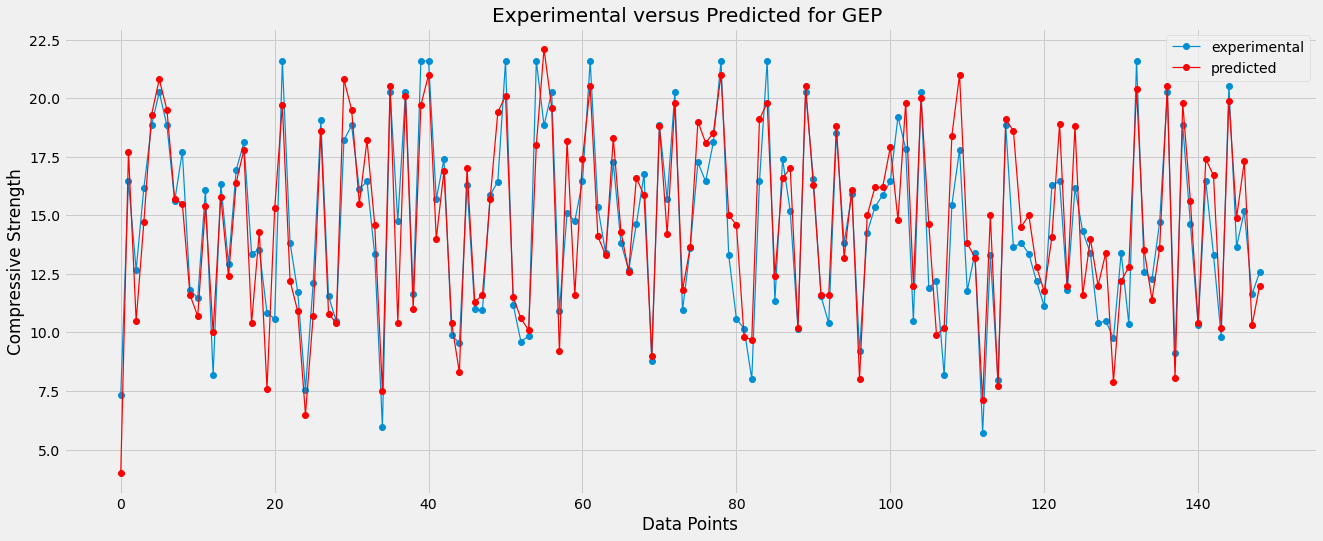

In [5]:
plt.figure(figsize=(20, 8))
plt.plot(np.arange(len(df_validation)), df_validation['Model'], marker='o', linewidth=1.2)
plt.plot(np.arange(len(df_validation)), df_validation['Target'], marker='o', linewidth=1.2, color='red')
plt.title('Experimental versus Predicted for GEP ')
plt.xlabel('Data Points')
plt.ylabel('Compressive Strength')
plt.legend(['experimental', 'predicted'])
plt.savefig('opc_gwp_cwp_experimental_predicted.jpg');

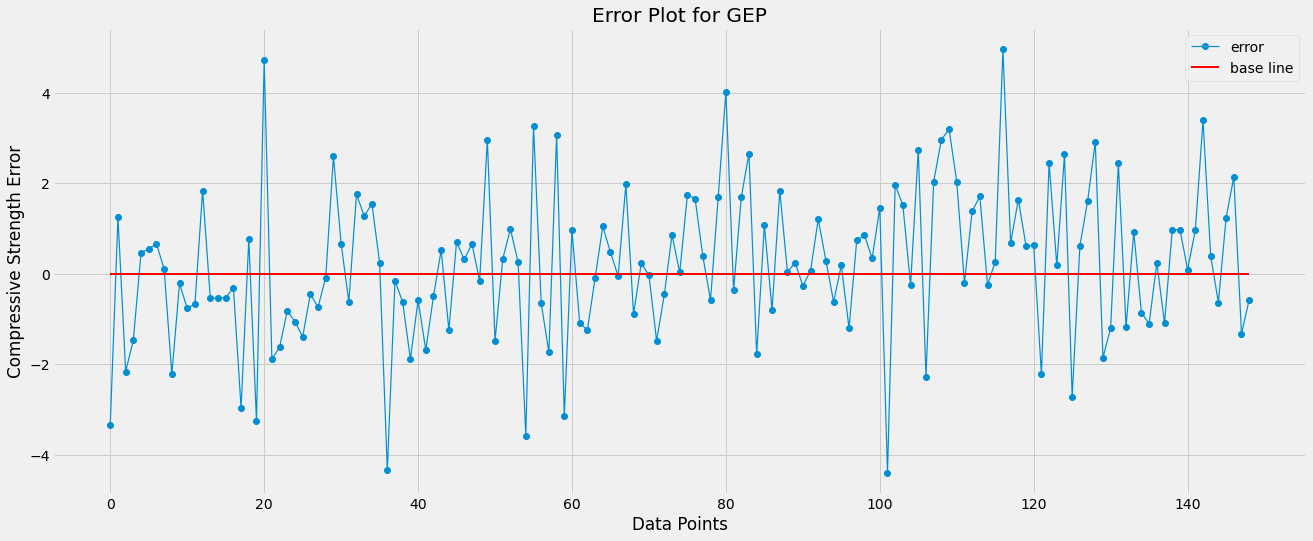

In [6]:
plt.figure(figsize=(20, 8))
plt.plot(np.arange(len(df_validation)), df_validation['Residual'], marker='o', linewidth=1.2)
plt.plot(np.zeros(len(df_validation)), color='red', linewidth=2)
plt.title('Error Plot for GEP')
plt.xlabel('Data Points')
plt.ylabel('Compressive Strength Error')
plt.legend(['error', 'base line'])
plt.savefig('opc_gwp_cwp_error_analysis.jpg');

In [ ]:
R-square score validation ----- 79.72%
correlation------------ 89.28%
MSE: 3.38
RMSE: 1.84
MAE: 1.44
RSE: 0.21

R-square score training ------- 85.34%
correlation ------- 92.38%
MSE: 2.58
RMSE: 1.61
MAE: 1.22
RSE: 0.15
    
Generation----------23763
Linking function----Addition
Function sets--- +, -, *, /, Ln, X2, 3Rt, Min2, Avg2, Atan, Tanh, NOT

Number of chromosomes----100
Head Size: 10
Number of genes: 5
Evaluation metric for fitness function: RMSE
Used variables: 7

In [ ]:
R-square score validation ----- 80.10%
correlation------------ 89.50%
MSE: 3.41
RMSE: 1.85
MAE: 1.39
RSE: 0.21

R-square score training ------- 87.10%
correlation ------- 93.32%
MSE: 2.25
RMSE: 1.50
MAE: 1.15
RSE: 0.13
    
Generation----------22852
Linking function----Addition
Function sets--- +, -, *, /, Exp, Inv, X2, 3Rt, Max2, Avg2, Atan, Tanh, NOT

Number of chromosomes----200
Head Size: 12
Number of genes: 5
Evaluation metric for fitness function: RMSE
Used variables: 7

In [29]:
genes = [3, 4, 5, 5]
Head = [8, 10, 10, 12]

MSE_validation = [5, 2.85, 3.38, 3.41]
RMSE_validation = [2.24, 1.69, 1.84, 1.85]
MAE_validation = [1.84, 1.30, 1.44, 1.39]
r_square_validation = [0.74, 0.82, 0.80, 0.80]

MSE_training = [3.19, 2.29, 2.58, 2.25]
RMSE_training = [1.79, 1.51, 1.61, 1.50]
MAE_training = [1.42, 1.21, 1.22, 1.15]
r_square_training = [0.81, 0.87, 0.85, 0.87]

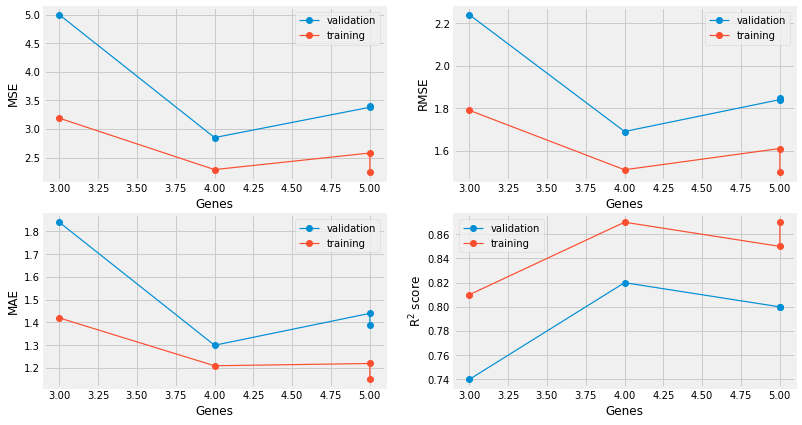

In [33]:
plt.figure(figsize=(12, 7))
plt.subplot(2, 2, 1)
plt.plot(genes, MSE_validation, marker='o', linewidth=1.2)
plt.subplot(2, 2, 1)
plt.plot(genes, MSE_training, marker='o', linewidth=1.2)
plt.ylabel('MSE')
plt.xlabel('Genes')
plt.legend(['validation', 'training'])

plt.subplot(2, 2, 2)
plt.plot(genes, RMSE_validation, marker='o', linewidth=1.2)
plt.subplot(2, 2, 2)
plt.plot(genes, RMSE_training, marker='o', linewidth=1.2)
plt.ylabel('RMSE')
plt.xlabel('Genes')
plt.legend(['validation', 'training'])

plt.subplot(2, 2, 3)
plt.plot(genes, MAE_validation, marker='o', linewidth=1.2)
plt.subplot(2, 2, 3)
plt.plot(genes, MAE_training, marker='o', linewidth=1.2)
plt.ylabel('MAE')
plt.xlabel('Genes')
plt.legend(['validation', 'training'])

plt.subplot(2, 2, 4)
plt.plot(genes, r_square_validation, marker='o', linewidth=1.2)
plt.subplot(2, 2, 4)
plt.plot(genes, r_square_training, marker='o', linewidth=1.2)
plt.ylabel('R$^2$ score')
plt.xlabel('Genes')
plt.legend(['validation', 'training'])

plt.savefig('opc_gwp_cwp_gene_parameters_variation.jpg')

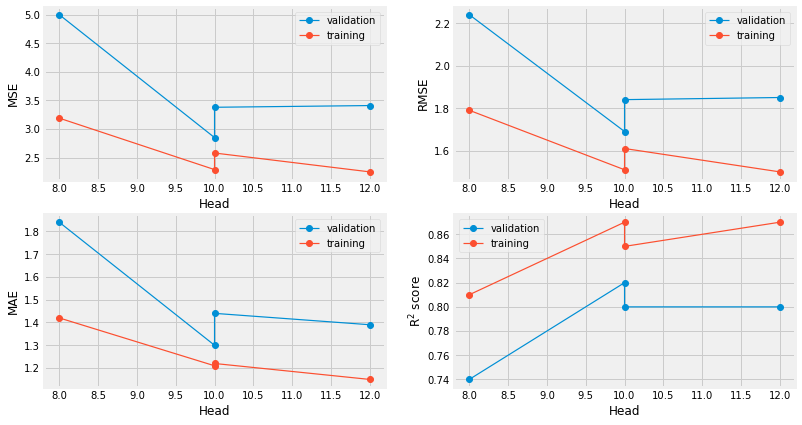

In [34]:
plt.figure(figsize=(12, 7))
plt.subplot(2, 2, 1)
plt.plot(Head, MSE_validation, marker='o', linewidth=1.2)
plt.subplot(2, 2, 1)
plt.plot(Head, MSE_training, marker='o', linewidth=1.2)
plt.ylabel('MSE')
plt.xlabel('Head')
plt.legend(['validation', 'training'])

plt.subplot(2, 2, 2)
plt.plot(Head, RMSE_validation, marker='o', linewidth=1.2)
plt.subplot(2, 2, 2)
plt.plot(Head, RMSE_training, marker='o', linewidth=1.2)
plt.ylabel('RMSE')
plt.xlabel('Head')
plt.legend(['validation', 'training'])

plt.subplot(2, 2, 3)
plt.plot(Head, MAE_validation, marker='o', linewidth=1.2)
plt.subplot(2, 2, 3)
plt.plot(Head, MAE_training, marker='o', linewidth=1.2)
plt.ylabel('MAE')
plt.xlabel('Head')
plt.legend(['validation', 'training'])

plt.subplot(2, 2, 4)
plt.plot(Head, r_square_validation, marker='o', linewidth=1.2)
plt.subplot(2, 2, 4)
plt.plot(Head, r_square_training, marker='o', linewidth=1.2)
plt.ylabel('R$^2$ score')
plt.xlabel('Head')
plt.legend(['validation', 'training'])

plt.savefig('opc_gwp_cwp_head_parameters_variation.jpg')

#### Sensitivity Analysis

###### GEP

In [17]:
from math import *

def gepModel(d):

    G1C2 = 9.66851767669671
    G1C5 = -9.64609546189764
    G2C5 = 11.5873152445561
    G2C1 = -1.52546251106662
    G2C0 = -9.70462569478645
    G3C7 = 2.32226286167442
    G4C1 = -9.35783783509171
    G4C7 = 0.124270942284873

    y = 0.0

    y = (atan((((G1C2+d[5])-d[3])-((G1C5-d[5])-d[0])))+atan(d[5]))
    y = y + gep3Rt((G2C5+(((d[6]+d[0])+G2C1)*((((G2C0+d[0])/2.0)+max(d[5],d[2]))/2.0))))
    y = y + (((gep3Rt((log(d[6])-G3C7))-(atan(d[1])/tanh(d[5])))+log(d[6]))/2.0)
    y = y + (d[5]*gep3Rt((d[1]-((((d[0]-d[3])+max(G4C7,d[1]))/2.0)*(G4C1-d[5])))))

    return y
    

def gep3Rt(x):
    if (x < 0.0):
        return -pow(-x,(1.0/3.0))
    else:
        return pow(x,(1.0/3.0))

In [18]:
def sensitivity_analysis_gep(features):
    opc = [100, 90, 80, 85, 95, 70, 75, 90, 100, 70]
    cwp = [0, 0, 5, 15, 20, 25, 30, 20, 5, 15]
    gwp = [0, 5, 10, 10, 20, 15, 30, 25, 5, 15]
    wc = [0.5, 0.6, 0.5, 0.7, 0.6, 0.5, 0.7, 0.7, 0.6, 0.6]
    age = [7, 28, 28, 56, 90, 7, 90, 56, 7, 56]
    CG = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
    sand = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
    
    features_type = [opc, gwp, cwp, sand, CG, wc, age]
    features_random_values = [x for x in features_type]
    
    col_to_values_index = dict(zip(range(len(features_random_values)), features_random_values))
    sa_gep_data = np.median(features, axis=0)
    
    preds_max_min = []
    for key, value in col_to_values_index.items():
        sa_gep_data_copy = sa_gep_data.copy()
        col_predictions = []
        for val in value:
            sa_gep_data_copy[key] = val
            pred = gepModel(sa_gep_data_copy)
            col_predictions.append(pred)
        preds_max_min.append((max(col_predictions), min(col_predictions)))
        
    ## Calculate preds differences
    diff_fn = lambda x: [x[i][0] - x[i][1] for i in range(len(x))]
    min_max_diff = diff_fn(preds_max_min)

    I_sum = sum(min_max_diff)
    col_sa_fn = lambda x, i_sum: [(diff/i_sum)*100 for diff in x]
    col_sa = col_sa_fn(min_max_diff, I_sum)
    
    #merge col_sa back with feature_names
    sa_gep_df =pd.DataFrame(data=np.array(col_sa).reshape(1, features.shape[1]), columns=features.columns.values)
    return sa_gep_df

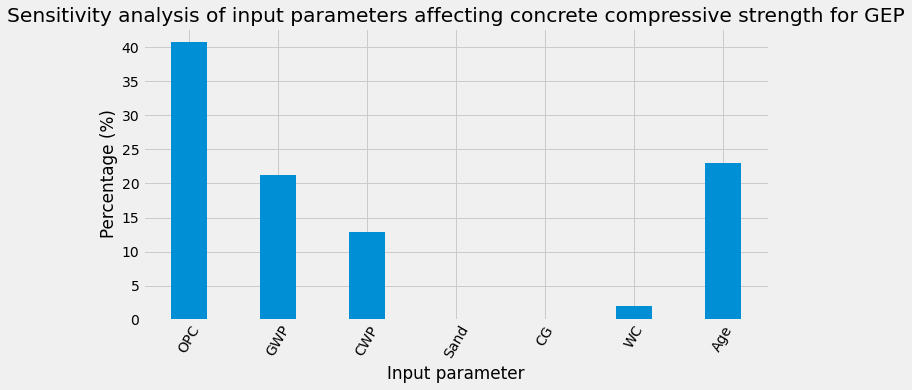

In [42]:
sa_df_gep = sensitivity_analysis_gep(df_opc_gwp_cwp.iloc[:, :-1])
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(np.array(sa_df_gep.columns), sa_df_gep.values.flatten(), width = 0.4)
plt.xlabel("Input parameter")
plt.ylabel("Percentage (%)")
plt.title("Sensitivity analysis of input parameters affecting concrete compressive strength for GEP")
plt.xticks(rotation=60)
plt.savefig('gep_sensitivity_analysis_opc_gwp_cwp.jpg');

#### DTREE

In [26]:
def sensitivity_analysis(features, model=None, scaler=False):
    opc = [100, 90, 80, 85, 95, 70, 75, 90, 100, 70]
    cwp = [0, 0, 5, 15, 20, 25, 30, 20, 5, 15]
    gwp = [0, 5, 10, 10, 20, 15, 30, 25, 5, 15]
    wc = [0.5, 0.6, 0.5, 0.7, 0.6, 0.5, 0.7, 0.7, 0.6, 0.6]
    age = [7, 28, 28, 56, 90, 7, 90, 56, 7, 56]
    
    features_type = [opc, gwp, cwp, wc, age]
    features_random_values = [x for x in features_type]
    
    col_to_values_index = dict(zip(range(len(features_random_values)), features_random_values))
    sa_data = np.median(features, axis=0)
    
    preds_max_min = []
    for key, value in col_to_values_index.items():
        sa_data_copy = sa_data.copy()
        col_predictions = []
        for val in value:
            sa_data_copy[key] = val
            if scaler == False:
                data = sa_data_copy
                pred = model.predict([data])
            else:
                data = scaler.transform(sa_data_copy.reshape(-1, features.shape[1]))
                pred = model.predict(data)
            col_predictions.append(pred)
        preds_max_min.append((max(col_predictions), min(col_predictions)))
        
    ## Calculate preds differences
    diff_fn = lambda x: [x[i][0] - x[i][1] for i in range(len(x))]
    min_max_diff = diff_fn(preds_max_min)

    I_sum = sum(min_max_diff)
    col_sa_fn = lambda x, i_sum: [(diff/i_sum)*100 for diff in x]
    col_sa = col_sa_fn(min_max_diff, I_sum)
    
    #merge col_sa back with feature_names
    sa_df =pd.DataFrame(data=np.array(col_sa).reshape(1, features.shape[1]), columns=features.columns.values)
    return sa_df

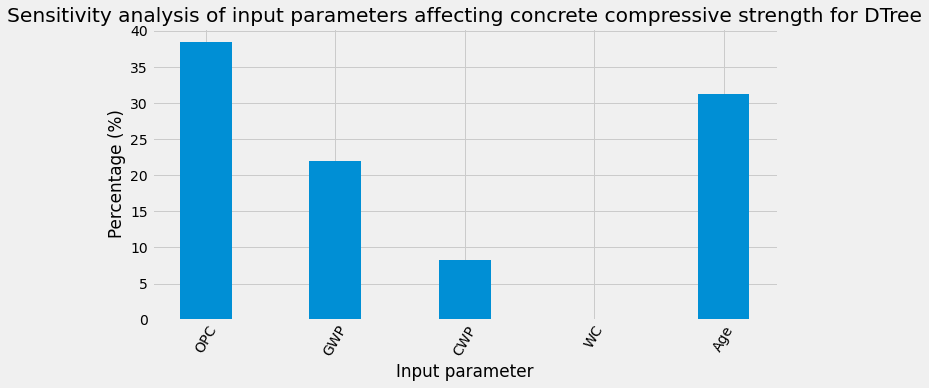

In [40]:
sa_df_dtree = sensitivity_analysis(X_train, model=dtree, scaler=False)
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(np.array(sa_df_dtree.columns), sa_df_dtree.values.flatten(), width = 0.4)
plt.xlabel("Input parameter")
plt.ylabel("Percentage (%)")
plt.title("Sensitivity analysis of input parameters affecting concrete compressive strength for DTree")
plt.xticks(rotation=60)
plt.savefig('dtree_sensitivity_analysis_opc_gwp_cwp.jpg');

#### SVC

In [34]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

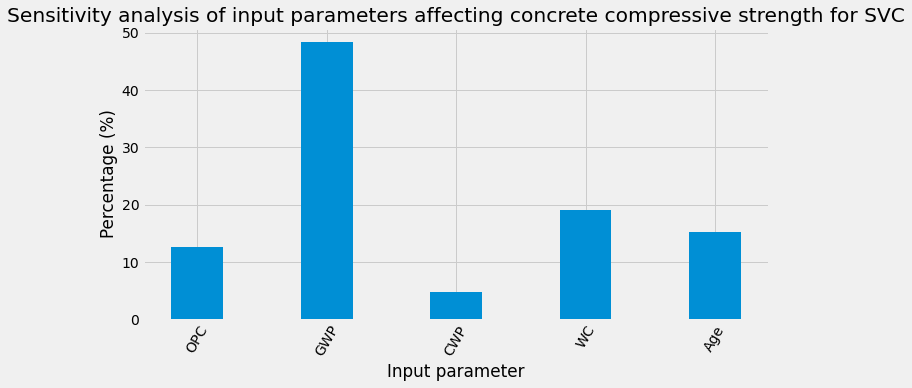

In [41]:
sa_df_svc = sensitivity_analysis(X_train, model=svr_model, scaler=scaler)
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(np.array(sa_df_svc.columns), sa_df_svc.values.flatten(), width = 0.4)
plt.xlabel("Input parameter")
plt.ylabel("Percentage (%)")
plt.title("Sensitivity analysis of input parameters affecting concrete compressive strength for SVC")
plt.xticks(rotation=60)
plt.savefig('svc_sensitivity_analysis_opc_gwp_cwp.jpg');

###### Result Summary

In [ ]:
## Original Data
1. Decision Tree ---90.79%
2. SVR -------------90.73%
3. GEP--------------82.49%

## Encoded Data
1. Decision Tree ---90.75%
2. SVR -------------91.24%

## Frequency Data
1. Decision Tree ---88.69%
2. SVR -------------83.47%

The original form of the data is similar to the encoded data and better than the frequency data